In [2]:
import pandas as pd
import os
import numpy as np
import glob
import tarfile

# 1. Load codebook and define functions

## codebook

In [30]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

In [31]:
# load codebook
# L drive is Crick Pu_SSD_0
codebook_save_folder=r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_20230201\postanalysis_vCW2_sorted'

# Load sorted codebook (allows direct matrix slicing) with cell type info
# Load codebook (then sort to allow direct matrix slicing) with cell type info

codebook_fname = os.path.join(codebook_save_folder,'MERFISH_loci_adjacent_genes_tss_more_res.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df temporailiy so matrix can be sliced by df order directly
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)

codebook_df.head()

name id chr  chr_order library  dtype  \
loci_name                                                                  
chr1_3742742_3759944  1:3742742-3759944  1   1          0   CTP11  combo   
chr1_6245958_6258969  1:6245958-6258969  2   1          1   CTP11  combo   
chr1_8740008_8759916  1:8740008-8759916  3   1          2   CTP11  combo   
chr1_9627926_9637875  1:9627926-9637875  1   1          3   CTP13  combo   
chr1_9799472_9811359  1:9799472-9811359  2   1          4   CTP13  combo   

                     adjacent_genes_0kb_tss adjacent_genes_10kb_tss  \
loci_name                                                             
chr1_3742742_3759944             intergenic              intergenic   
chr1_6245958_6258969             intergenic              intergenic   
chr1_8740008_8759916             intergenic              intergenic   
chr1_9627926_9637875          2610203C22Rik           2610203C22Rik   
chr1_9799472_9811359                 Gm6195            Gm6195; Sgk3   

                     adjacent_genes_50kb_tss  \
loci_name                                      
chr1_3742742_3759944              intergenic   
chr1_6245958_6258969   4732440D04Rik; Rb1cc1   
chr1_8740008_8759916                 Gm15452   
chr1_9627926_9637875           2610203C22Rik   
chr1_9799472_9811359            Gm6195; Sgk3   

                                               adjacent_genes_100kb_tss  \
loci_name                                                                 
chr1_3742742_3759944                                               Xkr4   
chr1_6245958_6258969                              4732440D04Rik; Rb1cc1   
chr1_8740008_8759916                                            Gm15452   
chr1_9627926_9637875         2610203C22Rik; Adhfe1; Gm6161; Mybl1; Rrs1   
chr1_9799472_9811359  1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Vc...   

                                               adjacent_genes_200kb_tss  \
loci_name                                                                 
chr1_3742742_3759944                                               Xkr4   
chr1_6245958_6258969             4732440D04Rik; Gm19026; Gm2147; Rb1cc1   
chr1_8740008_8759916                                            Gm15452   
chr1_9627926_9637875  1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...   
chr1_9799472_9811359  1700034P13Rik; 2610203C22Rik; Gm6195; Mcmdc2; ...   

                                               adjacent_genes_500kb_tss  \
loci_name                                                                 
chr1_3742742_3759944                              Gm18956; Gm7341; Xkr4   
chr1_6245958_6258969  4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...   
chr1_8740008_8759916                                            Gm15452   
chr1_9627926_9637875  1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...   
chr1_9799472_9811359  1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...   

                                              adjacent_genes_1000kb_tss  \
loci_name                                                                 
chr1_3742742_3759944  Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...   
chr1_6245958_6258969  4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...   
chr1_8740008_8759916  1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...   
chr1_9627926_9637875  1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...   
chr1_9799472_9811359  1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...   

                                              adjacent_genes_1500kb_tss  \
loci_name                                                                 
chr1_3742742_3759944  Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...   
chr1_6245958_6258969  4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...   
chr1_8740008_8759916  1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...   
chr1_9627926_9637875  1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...   
chr1_9799472_9811359  1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...   

                                     

## contact tsv folder from m3C

In [33]:
hic_main_folder = r'\\10.245.74.212\Chromatin_NAS_2\m3C_mouse_brain\isocortex'

hic_tsv_folder = os.path.join(hic_main_folder, r'download')
hic_matrix_folder = os.path.join(hic_main_folder, r'matrix')


hic_tsv_fname_list = glob.glob(hic_tsv_folder+r'\*')
print(len(hic_tsv_fname_list))
hic_tsv_fname_list[:3]

12690


['\\\\10.245.74.212\\Chromatin_NAS_2\\m3C_mouse_brain\\isocortex\\download\\CEMBA3C_10A3C_R2_P2-1-K18-A14.3C.contact.tsv.tar',
 '\\\\10.245.74.212\\Chromatin_NAS_2\\m3C_mouse_brain\\isocortex\\download\\CEMBA3C_10A3C_R2_P2-1-K18-B1.3C.contact.tsv.tar',
 '\\\\10.245.74.212\\Chromatin_NAS_2\\m3C_mouse_brain\\isocortex\\download\\CEMBA3C_10A3C_R2_P2-1-K18-B2.3C.contact.tsv.tar']

## function for each single cell count df

In [34]:
all_sorted_chr = ['chr' + str(i) for i in range(1,20)]
all_sorted_chr.append('chrX')
all_sorted_chr[:2]

['chr1', 'chr2']

### add these function to a package for mp

In [43]:
# function to convert m3C count extracted tsv to half-matrix for one chromosome
def convert_count_to_merfish_matrix_byChr (_chr_count_df, codebook_df_chr, _ext=500000):
    
    _chr_contact_dict = {}
    _query_loci_list_1 = np.array(_chr_count_df[2]) # hic loci pos 1
    _query_loci_list_2 = np.array(_chr_count_df[6]) # hic loci pos 2
    
    codebook_df_chr_loci = codebook_df_chr.index # codebook loci list
    for _loci in codebook_df_chr_loci:
        _start =int(_loci.split('_')[1])-_ext # bp to ext for both upstream and downstream
        _stop = int(_loci.split('_')[2])+_ext # bp to ext for both upstream and downstream
        # hic loci 1 in the targeted imaged codebook loci
        sel_query_loci_list_1 = (_query_loci_list_1>_start)&(_query_loci_list_1<_stop)

        _chr_contact_dict[_loci] = {}
        # hic loci 2 in the targeted imaged codebook loci_2
        for _loci_2 in codebook_df_chr_loci:
            _start_2 =int(_loci_2.split('_')[1])-_ext
            _stop_2 = int(_loci_2.split('_')[2])+_ext
            sel_query_loci_list_2 = (_query_loci_list_2>_start_2)&(_query_loci_list_2<_stop_2)
            sel_query_loci_list_pair = sel_query_loci_list_1 & sel_query_loci_list_2\
            # number of pairs that qualify 
            _chr_contact_dict[_loci][_loci_2] = np.sum(sel_query_loci_list_pair) 

    _chr_count_matrix_df = pd.DataFrame(_chr_contact_dict)
    _chr_count_matrix  = _chr_count_matrix_df.values
    
    return _chr_count_matrix
    

# batch function to convert for all chromosome selected for each single cell
def batch_convert_count_to_merfish_matrix_dict (hic_extract_df, 
                                                codebook_df, 
                                                all_sorted_chr, 
                                                _ext = 500000,
                                                num_threads = 16,
                                                parallel=False):

    # prepare mp args
    _mp_args = []
    for _chr in tqdm.tqdm(all_sorted_chr[:]):
        _chr_count_df = hic_extract_df[(hic_extract_df[1]==_chr) & (hic_extract_df[5]==_chr)] # subset cis-contact
        _chr_count_df = _chr_count_df[(_chr_count_df[0]==1)&(_chr_count_df[4]==1)] # subset contact?
        codebook_df_chr = codebook_df[codebook_df['chr']==_chr.split('chr')[1]]
        
        _mp_args.append((_chr_count_df, codebook_df_chr, _ext))
        
    import time
    _start_time = time.time()
    # init dict to save
    all_chr_contact_dict = {}
    
    # mp or sequentiall compute
    if parallel:
        import multiprocessing as mp
        print ('Multiprocessing for converting single cell hic matrix:')
        with mp.Pool(num_threads) as _mp_pool:
            _mp_results = _mp_pool.starmap(convert_count_to_merfish_matrix_byChr, 
                                           _mp_args, chunksize=1)
            _mp_pool.close()
            _mp_pool.join()
            _mp_pool.terminate()     
    else:
        print ('Looping for converting single cell hic matrix:')
        _mp_results = [convert_count_to_merfish_matrix_byChr(*_args) for _args in _mp_args]
    
    _mp_results_dict = {_chr: _chr_mtx for _chr, _chr_mtx in zip(all_sorted_chr, _mp_results)}

    print (f"Complete in {time.time()-_start_time:.3f}s.")
    return _mp_results_dict

### check if these has been added properly

In [51]:
import hic_to_merfish
importlib.reload(hic_to_merfish)

help(hic_to_merfish.batch_convert_count_to_merfish_matrix_dict)

Help on function batch_convert_count_to_merfish_matrix_dict in module hic_to_merfish:

batch_convert_count_to_merfish_matrix_dict(hic_extract_df, codebook_df, all_sorted_chr, _ext=500000, num_threads=16, parallel=False)
    # batch function to convert for all chromosome selected for each single cell



# 2. Loop to process each single cell

In [39]:
all_sorted_chr = ['chr' + str(i) for i in range(1,20)]
all_sorted_chr.append('chrX')
all_sorted_chr[:2]

['chr1', 'chr2']

## test a single cell

In [71]:
# loop
import tqdm
overwrite_save = True

import pickle
import shutil

for hic_tsv_fname in tqdm.tqdm(hic_tsv_fname_list[:1]):
    
    hic_tsv_basename = os.path.basename(hic_tsv_fname)
    hic_extract_basefolder = hic_tsv_basename.split('.tsv.tar')[0]
    hic_extract_basename = hic_tsv_basename.replace('.tsv.tar', '.tsv.gz')
    hic_matrix_basename = hic_tsv_basename.replace('.tsv.tar', '.matrix.pkl')
    
    # check if the matrix file has been generated
    if overwrite_save or not os.path.exists(os.path.join(hic_matrix_folder,
                                                          hic_matrix_basename)):
    
        # extract to gzip
        with tarfile.open(hic_tsv_fname, 'r|*') as file:
            file.extractall(hic_matrix_folder)
            file.close()

        hic_extract_fname = os.path.join(hic_matrix_folder, hic_extract_basefolder, hic_extract_basename)
        hic_extract_df = pd.read_csv(hic_extract_fname,
                                     compression='gzip', 
                                     header=None, sep="\t")
        
        hic_matrix_dict = hic_to_merfish.batch_convert_count_to_merfish_matrix_dict(hic_extract_df, 
                                                codebook_df, 
                                                all_sorted_chr, 
                                                _ext = 500000,
                                                num_threads = 16,
                                                parallel=True)
        # save converted matrix to a dict
        pickle.dump(hic_matrix_dict, open(os.path.join(hic_matrix_folder, hic_matrix_basename),'wb'))
        # remove the intermediate tsv file
        if os.path.exists(os.path.join(hic_matrix_folder, hic_extract_basefolder)):
            shutil.rmtree(os.path.join(hic_matrix_folder, hic_extract_basefolder)) 
    
    else:
        print('The single cell has been processed, skip.')
            
        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Multiprocessing for converting single cell hic matrix:


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.04s/it]

Complete in 2.384s.


<AxesSubplot: >

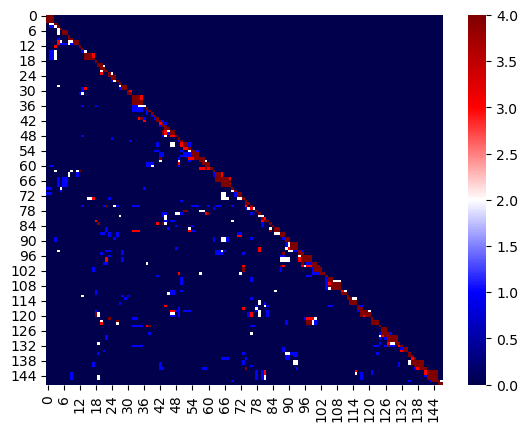

In [73]:
import seaborn as sns
import pickle
hic_matrix_dict = pickle.load(open(os.path.join(hic_matrix_folder, hic_matrix_basename),'rb'))
matrix_inspect = hic_matrix_dict['chr2']
sns.heatmap(matrix_inspect, cmap='seismic', vmax=4)

## process all cells

In [77]:
# loop
import tqdm
overwrite_save = False

import pickle
import shutil

for hic_tsv_fname in tqdm.tqdm(hic_tsv_fname_list[:]):
    
    hic_tsv_basename = os.path.basename(hic_tsv_fname)
    hic_extract_basefolder = hic_tsv_basename.split('.tsv.tar')[0]
    hic_extract_basename = hic_tsv_basename.replace('.tsv.tar', '.tsv.gz')
    hic_matrix_basename = hic_tsv_basename.replace('.tsv.tar', '.matrix.pkl')
    
    # check if the matrix file has been already generated
    if overwrite_save or not os.path.exists(os.path.join(hic_matrix_folder,
                                                          hic_matrix_basename)):
    
        # extract to gzip
        with tarfile.open(hic_tsv_fname, 'r|*') as file:
            file.extractall(hic_matrix_folder)
            file.close()

        hic_extract_fname = os.path.join(hic_matrix_folder, hic_extract_basefolder, hic_extract_basename)
        hic_extract_df = pd.read_csv(hic_extract_fname,
                                     compression='gzip', 
                                     header=None, sep="\t")
        
        hic_matrix_dict = hic_to_merfish.batch_convert_count_to_merfish_matrix_dict(hic_extract_df, 
                                                codebook_df, 
                                                all_sorted_chr, 
                                                _ext = 500000,
                                                num_threads = 20, 
                                                parallel=True)
        # save converted matrix to a dict
        pickle.dump(hic_matrix_dict, open(os.path.join(hic_matrix_folder, hic_matrix_basename),'wb'))
        # remove the intermediate tsv file
        if os.path.exists(os.path.join(hic_matrix_folder, hic_extract_basefolder)):
            shutil.rmtree(os.path.join(hic_matrix_folder, hic_extract_basefolder)) 
    
    # skip if the matrix file has been already generated
    else:
        print('The single cell has been processed, skip.')
            
        

  0%|                                                                                        | 0/12690 [00:00<?, ?it/s]

The single cell has been processed, skip.
The single cell has been processed, skip.
The single cell has been processed, skip.
The single cell has been processed, skip.
The single cell has been processed, skip.
The single cell has been processed, skip.
The single cell has been processed, skip.
The single cell has been processed, skip.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                              | 9/12690 [00:04<1:46:03,  1.99it/s]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                             | 10/12690 [00:08<3:24:00,  1.04it/s]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                             | 11/12690 [00:12<4:55:24,  1.40s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                             | 12/12690 [00:15<6:37:54,  1.88s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                             | 13/12690 [00:19<8:13:39,  2.34s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                             | 14/12690 [00:23<9:07:33,  2.59s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                             | 15/12690 [00:26<9:40:45,  2.75s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                            | 16/12690 [00:30<10:43:02,  3.04s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                            | 17/12690 [00:34<11:27:22,  3.25s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                            | 18/12690 [00:37<11:28:40,  3.26s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                            | 19/12690 [00:41<11:55:49,  3.39s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


  0%|                                                                            | 20/12690 [00:45<12:28:05,  3.54s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 21/12690 [00:48<12:23:54,  3.52s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 22/12690 [00:52<12:50:48,  3.65s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 23/12690 [00:55<11:58:12,  3.40s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 24/12690 [00:58<12:03:49,  3.43s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 25/12690 [01:03<12:53:27,  3.66s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 26/12690 [01:06<12:59:46,  3.69s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 27/12690 [01:10<12:48:54,  3.64s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 28/12690 [01:14<13:08:22,  3.74s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 29/12690 [01:17<12:27:44,  3.54s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 30/12690 [01:20<12:00:04,  3.41s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 31/12690 [01:25<13:02:24,  3.71s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 32/12690 [01:28<12:40:37,  3.61s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 33/12690 [01:32<13:22:30,  3.80s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 34/12690 [01:35<12:37:30,  3.59s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 35/12690 [01:39<12:54:14,  3.67s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 36/12690 [01:42<12:20:59,  3.51s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 37/12690 [01:46<12:07:47,  3.45s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 38/12690 [01:49<12:33:55,  3.58s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 39/12690 [01:54<13:15:07,  3.77s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 40/12690 [01:57<12:47:56,  3.64s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  0%|▏                                                                           | 41/12690 [02:01<13:13:02,  3.76s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 42/12690 [02:04<12:49:06,  3.65s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 43/12690 [02:08<12:18:24,  3.50s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 44/12690 [02:11<12:22:33,  3.52s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 45/12690 [02:15<12:23:34,  3.53s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 46/12690 [02:18<12:30:53,  3.56s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 47/12690 [02:22<12:49:31,  3.65s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 48/12690 [02:25<12:04:55,  3.44s/it]

Complete in 2.335s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 49/12690 [02:30<13:12:08,  3.76s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 50/12690 [02:33<12:44:23,  3.63s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 51/12690 [02:37<12:56:22,  3.69s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 52/12690 [02:41<13:15:43,  3.78s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 53/12690 [02:43<12:04:20,  3.44s/it]

Complete in 2.250s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 54/12690 [02:47<12:21:48,  3.52s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 55/12690 [02:51<12:47:28,  3.64s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 56/12690 [02:54<12:27:23,  3.55s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 57/12690 [02:58<12:55:23,  3.68s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 58/12690 [03:02<12:51:43,  3.67s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 59/12690 [03:06<13:11:25,  3.76s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 60/12690 [03:09<12:46:13,  3.64s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 61/12690 [03:13<12:30:21,  3.56s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  0%|▎                                                                           | 62/12690 [03:16<12:38:28,  3.60s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


  0%|▍                                                                           | 63/12690 [03:20<12:44:09,  3.63s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 64/12690 [03:24<12:58:59,  3.70s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 65/12690 [03:28<12:58:37,  3.70s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 66/12690 [03:31<12:57:20,  3.69s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 67/12690 [03:35<13:03:27,  3.72s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 68/12690 [03:39<13:35:26,  3.88s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 69/12690 [03:43<13:41:32,  3.91s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 70/12690 [03:47<13:10:03,  3.76s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 71/12690 [03:50<12:52:58,  3.68s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 72/12690 [03:54<12:50:34,  3.66s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 73/12690 [03:58<12:57:28,  3.70s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 74/12690 [04:02<13:11:50,  3.77s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 75/12690 [04:05<13:18:54,  3.80s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 76/12690 [04:09<12:47:16,  3.65s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 77/12690 [04:12<12:41:32,  3.62s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 78/12690 [04:17<13:21:26,  3.81s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 79/12690 [04:20<13:16:54,  3.79s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 80/12690 [04:24<12:54:55,  3.69s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 81/12690 [04:28<13:00:04,  3.71s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 82/12690 [04:31<12:21:31,  3.53s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


  1%|▍                                                                           | 83/12690 [04:35<12:47:39,  3.65s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 84/12690 [04:38<12:36:15,  3.60s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 85/12690 [04:41<12:23:52,  3.54s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 86/12690 [04:45<12:35:29,  3.60s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 87/12690 [04:48<11:48:18,  3.37s/it]

Complete in 2.297s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 88/12690 [04:51<11:17:09,  3.22s/it]

Complete in 2.309s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 89/12690 [04:55<11:39:07,  3.33s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 90/12690 [04:58<12:01:30,  3.44s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 91/12690 [05:02<11:57:40,  3.42s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 92/12690 [05:06<12:33:25,  3.59s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 93/12690 [05:09<12:40:38,  3.62s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 94/12690 [05:12<12:06:46,  3.46s/it]

Complete in 2.269s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 95/12690 [05:16<12:30:04,  3.57s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 96/12690 [05:20<12:58:59,  3.71s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 97/12690 [05:24<12:36:48,  3.61s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 98/12690 [05:28<12:59:14,  3.71s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                           | 99/12690 [05:31<13:09:56,  3.76s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                          | 100/12690 [05:35<12:56:36,  3.70s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                          | 101/12690 [05:39<12:57:56,  3.71s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                          | 102/12690 [05:43<13:07:32,  3.75s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                          | 103/12690 [05:46<12:58:15,  3.71s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                          | 104/12690 [05:50<12:39:24,  3.62s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


  1%|▌                                                                          | 105/12690 [05:53<12:34:01,  3.59s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 106/12690 [05:57<12:37:54,  3.61s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 107/12690 [06:00<12:28:04,  3.57s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 108/12690 [06:03<11:52:07,  3.40s/it]

Complete in 2.340s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 109/12690 [06:07<11:54:12,  3.41s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 110/12690 [06:10<11:38:49,  3.33s/it]

Complete in 2.330s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 111/12690 [06:13<11:53:06,  3.40s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 112/12690 [06:17<12:12:08,  3.49s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 113/12690 [06:21<12:14:15,  3.50s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 114/12690 [06:24<12:14:11,  3.50s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 115/12690 [06:27<11:55:21,  3.41s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 116/12690 [06:31<12:18:06,  3.52s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 117/12690 [06:35<12:16:53,  3.52s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 118/12690 [06:38<11:42:36,  3.35s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 119/12690 [06:41<12:10:53,  3.49s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 120/12690 [06:45<12:15:46,  3.51s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 121/12690 [06:48<11:41:42,  3.35s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 122/12690 [06:51<11:21:14,  3.25s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 123/12690 [06:55<12:14:42,  3.51s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 124/12690 [06:59<12:30:18,  3.58s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 125/12690 [07:02<11:44:22,  3.36s/it]

Complete in 2.276s.
Multiprocessing for converting single cell hic matrix:


  1%|▋                                                                          | 126/12690 [07:05<11:17:53,  3.24s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 127/12690 [07:08<11:45:00,  3.37s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 128/12690 [07:12<12:04:45,  3.46s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 129/12690 [07:16<12:24:35,  3.56s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 130/12690 [07:20<12:40:12,  3.63s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 131/12690 [07:24<13:17:03,  3.81s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 132/12690 [07:27<13:06:16,  3.76s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 133/12690 [07:31<13:16:54,  3.81s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 134/12690 [07:35<12:39:39,  3.63s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 135/12690 [07:39<13:07:50,  3.77s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 136/12690 [07:42<12:42:30,  3.64s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 137/12690 [07:46<12:53:37,  3.70s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 138/12690 [07:48<11:42:24,  3.36s/it]

Complete in 2.231s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 139/12690 [07:53<12:45:47,  3.66s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 140/12690 [07:57<13:00:36,  3.73s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 141/12690 [07:59<12:04:53,  3.47s/it]

Complete in 2.328s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 142/12690 [08:03<12:02:45,  3.46s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 143/12690 [08:07<12:23:24,  3.55s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 144/12690 [08:10<12:10:34,  3.49s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 145/12690 [08:13<11:41:58,  3.36s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 146/12690 [08:16<11:45:20,  3.37s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 147/12690 [08:20<12:09:12,  3.49s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  1%|▊                                                                          | 148/12690 [08:24<12:23:55,  3.56s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 149/12690 [08:28<12:30:01,  3.59s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 150/12690 [08:31<12:29:21,  3.59s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 151/12690 [08:35<12:34:53,  3.61s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 152/12690 [08:38<12:20:32,  3.54s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 153/12690 [08:42<12:54:38,  3.71s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 154/12690 [08:46<13:10:12,  3.78s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 155/12690 [08:50<12:51:53,  3.69s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 156/12690 [08:53<12:10:02,  3.49s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 157/12690 [08:56<11:42:39,  3.36s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 158/12690 [09:00<12:07:36,  3.48s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 159/12690 [09:03<12:15:53,  3.52s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 160/12690 [09:07<12:29:54,  3.59s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 161/12690 [09:11<12:24:44,  3.57s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 162/12690 [09:14<12:28:25,  3.58s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 163/12690 [09:18<12:27:39,  3.58s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 164/12690 [09:22<12:54:53,  3.71s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 165/12690 [09:25<12:26:36,  3.58s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 166/12690 [09:29<12:24:31,  3.57s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 167/12690 [09:32<12:30:25,  3.60s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 168/12690 [09:36<13:07:00,  3.77s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


  1%|▉                                                                          | 169/12690 [09:39<12:01:17,  3.46s/it]

Complete in 2.292s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 170/12690 [09:42<11:36:05,  3.34s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 171/12690 [09:45<11:10:09,  3.21s/it]

Complete in 2.310s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 172/12690 [09:49<11:22:46,  3.27s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 173/12690 [09:52<11:35:45,  3.34s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 174/12690 [09:55<11:31:54,  3.32s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 175/12690 [09:59<11:45:42,  3.38s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 176/12690 [10:02<11:46:08,  3.39s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 177/12690 [10:06<12:16:25,  3.53s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 178/12690 [10:09<12:07:24,  3.49s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 179/12690 [10:13<11:46:00,  3.39s/it]

Complete in 2.349s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 180/12690 [10:16<12:09:57,  3.50s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 181/12690 [10:19<11:42:15,  3.37s/it]

Complete in 2.332s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 182/12690 [10:23<12:02:26,  3.47s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 183/12690 [10:27<12:23:39,  3.57s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 184/12690 [10:30<12:06:47,  3.49s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 185/12690 [10:33<11:30:10,  3.31s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 186/12690 [10:37<11:48:18,  3.40s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 187/12690 [10:40<11:54:10,  3.43s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 188/12690 [10:44<12:04:58,  3.48s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 189/12690 [10:46<11:13:26,  3.23s/it]

Complete in 2.262s.
Multiprocessing for converting single cell hic matrix:


  1%|█                                                                          | 190/12690 [10:50<11:38:30,  3.35s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 191/12690 [10:54<12:37:36,  3.64s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 192/12690 [10:58<12:38:45,  3.64s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 193/12690 [11:01<12:17:49,  3.54s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 194/12690 [11:05<12:10:18,  3.51s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 195/12690 [11:08<12:03:55,  3.48s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 196/12690 [11:12<11:54:42,  3.43s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 197/12690 [11:14<11:15:11,  3.24s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 198/12690 [11:18<11:52:32,  3.42s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 199/12690 [11:21<11:44:43,  3.39s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 200/12690 [11:25<11:35:45,  3.34s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 201/12690 [11:29<12:05:34,  3.49s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 202/12690 [11:32<12:10:06,  3.51s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 203/12690 [11:35<11:51:44,  3.42s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 204/12690 [11:39<11:49:25,  3.41s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 205/12690 [11:42<12:07:17,  3.50s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 206/12690 [11:46<12:06:53,  3.49s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 207/12690 [11:49<12:03:57,  3.48s/it]

Complete in 2.311s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 208/12690 [11:53<11:48:09,  3.40s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 209/12690 [11:56<11:51:08,  3.42s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 210/12690 [12:00<12:01:09,  3.47s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


  2%|█▏                                                                         | 211/12690 [12:03<12:04:27,  3.48s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 212/12690 [12:07<12:06:33,  3.49s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 213/12690 [12:10<12:27:10,  3.59s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 214/12690 [12:14<12:09:10,  3.51s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 215/12690 [12:17<12:10:24,  3.51s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 216/12690 [12:21<12:00:14,  3.46s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 217/12690 [12:25<12:30:55,  3.61s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 218/12690 [12:28<12:32:18,  3.62s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 219/12690 [12:32<12:33:49,  3.63s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 220/12690 [12:35<12:27:21,  3.60s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 221/12690 [12:39<12:21:02,  3.57s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 222/12690 [12:42<12:19:49,  3.56s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 223/12690 [12:46<12:13:51,  3.53s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 224/12690 [12:49<11:39:36,  3.37s/it]

Complete in 2.282s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 225/12690 [12:52<11:43:41,  3.39s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 226/12690 [12:56<11:42:24,  3.38s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 227/12690 [12:59<11:56:52,  3.45s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 228/12690 [13:03<11:57:01,  3.45s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 229/12690 [13:06<11:34:45,  3.35s/it]

Complete in 2.338s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 230/12690 [13:09<11:21:36,  3.28s/it]

Complete in 2.313s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 231/12690 [13:12<11:09:49,  3.23s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


  2%|█▎                                                                         | 232/12690 [13:15<10:31:36,  3.04s/it]

Complete in 2.255s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 233/12690 [13:18<11:09:58,  3.23s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 234/12690 [13:21<11:02:16,  3.19s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 235/12690 [13:25<11:32:14,  3.33s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 236/12690 [13:29<11:46:18,  3.40s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 237/12690 [13:32<11:22:43,  3.29s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 238/12690 [13:35<11:51:21,  3.43s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 239/12690 [13:39<11:50:37,  3.42s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 240/12690 [13:42<11:35:41,  3.35s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 241/12690 [13:45<11:26:38,  3.31s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 242/12690 [13:49<11:44:06,  3.39s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 243/12690 [13:52<11:41:12,  3.38s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 244/12690 [13:56<12:01:37,  3.48s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 245/12690 [13:59<11:49:50,  3.42s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 246/12690 [14:03<11:54:55,  3.45s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 247/12690 [14:06<12:09:47,  3.52s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 248/12690 [14:10<12:27:00,  3.60s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 249/12690 [14:13<11:58:53,  3.47s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 250/12690 [14:17<11:45:51,  3.40s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 251/12690 [14:21<12:20:57,  3.57s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 252/12690 [14:24<12:34:49,  3.64s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


  2%|█▍                                                                         | 253/12690 [14:29<13:29:59,  3.91s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 254/12690 [14:32<12:47:07,  3.70s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 255/12690 [14:36<12:51:42,  3.72s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 256/12690 [14:40<13:22:51,  3.87s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 257/12690 [14:44<13:37:02,  3.94s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 258/12690 [14:48<13:30:50,  3.91s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 259/12690 [14:52<13:23:28,  3.88s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 260/12690 [14:55<13:06:57,  3.80s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 261/12690 [14:59<12:59:06,  3.76s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 262/12690 [15:02<12:26:08,  3.60s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 263/12690 [15:06<12:38:54,  3.66s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 264/12690 [15:10<12:37:00,  3.66s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 265/12690 [15:13<12:04:16,  3.50s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 266/12690 [15:16<12:03:44,  3.50s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 267/12690 [15:20<12:25:22,  3.60s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 268/12690 [15:24<12:43:22,  3.69s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 269/12690 [15:28<12:37:40,  3.66s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 270/12690 [15:32<13:02:07,  3.78s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 271/12690 [15:36<13:03:54,  3.79s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 272/12690 [15:39<12:22:34,  3.59s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 273/12690 [15:43<12:37:03,  3.66s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


  2%|█▌                                                                         | 274/12690 [15:46<12:43:35,  3.69s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 275/12690 [15:50<12:53:07,  3.74s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 276/12690 [15:54<12:47:05,  3.71s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 277/12690 [15:58<12:57:55,  3.76s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 278/12690 [16:01<12:55:55,  3.75s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 279/12690 [16:05<12:26:19,  3.61s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 280/12690 [16:07<11:31:35,  3.34s/it]

Complete in 2.280s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 281/12690 [16:11<11:56:36,  3.46s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 282/12690 [16:14<11:33:10,  3.35s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 283/12690 [16:18<11:27:16,  3.32s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 284/12690 [16:21<11:53:39,  3.45s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 285/12690 [16:25<12:05:59,  3.51s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 286/12690 [16:28<11:49:33,  3.43s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 287/12690 [16:32<12:07:27,  3.52s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 288/12690 [16:35<11:58:44,  3.48s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 289/12690 [16:39<12:34:52,  3.65s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 290/12690 [16:43<12:58:49,  3.77s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 291/12690 [16:47<12:27:13,  3.62s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 292/12690 [16:50<12:09:29,  3.53s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 293/12690 [16:54<12:10:31,  3.54s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 294/12690 [16:57<12:21:43,  3.59s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 295/12690 [17:01<12:52:57,  3.74s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


  2%|█▋                                                                         | 296/12690 [17:04<12:05:35,  3.51s/it]

Complete in 2.336s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 297/12690 [17:08<11:50:49,  3.44s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 298/12690 [17:11<12:10:50,  3.54s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 299/12690 [17:15<11:59:54,  3.49s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 300/12690 [17:18<11:46:21,  3.42s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 301/12690 [17:21<11:34:44,  3.36s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 302/12690 [17:25<11:56:12,  3.47s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 303/12690 [17:28<11:56:56,  3.47s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 304/12690 [17:32<11:37:36,  3.38s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 305/12690 [17:36<12:10:59,  3.54s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 306/12690 [17:39<12:25:28,  3.61s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 307/12690 [17:43<12:10:05,  3.54s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 308/12690 [17:46<12:11:12,  3.54s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 309/12690 [17:50<12:03:18,  3.51s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 310/12690 [17:53<12:19:37,  3.58s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 311/12690 [17:56<11:48:01,  3.43s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 312/12690 [18:00<11:50:43,  3.45s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 313/12690 [18:03<11:49:25,  3.44s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 314/12690 [18:06<11:20:12,  3.30s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 315/12690 [18:10<11:46:05,  3.42s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 316/12690 [18:13<11:45:45,  3.42s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


  2%|█▊                                                                         | 317/12690 [18:17<11:54:36,  3.47s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 318/12690 [18:20<11:42:17,  3.41s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 319/12690 [18:24<12:01:04,  3.50s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 320/12690 [18:27<11:42:47,  3.41s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 321/12690 [18:31<11:43:16,  3.41s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 322/12690 [18:34<12:10:15,  3.54s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 323/12690 [18:38<12:36:09,  3.67s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 324/12690 [18:41<11:31:10,  3.35s/it]

Complete in 2.256s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 325/12690 [18:44<11:08:46,  3.25s/it]

Complete in 2.346s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 326/12690 [18:48<11:21:00,  3.30s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 327/12690 [18:50<10:56:40,  3.19s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 328/12690 [18:54<11:17:29,  3.29s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 329/12690 [18:57<11:15:46,  3.28s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 330/12690 [19:01<11:34:12,  3.37s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 331/12690 [19:05<12:03:54,  3.51s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 332/12690 [19:08<11:41:14,  3.40s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 333/12690 [19:12<12:01:59,  3.51s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 334/12690 [19:14<11:21:21,  3.31s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 335/12690 [19:18<11:43:43,  3.42s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 336/12690 [19:21<11:07:07,  3.24s/it]

Complete in 2.278s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 337/12690 [19:25<11:41:33,  3.41s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


  3%|█▉                                                                         | 338/12690 [19:28<11:16:50,  3.29s/it]

Complete in 2.346s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 339/12690 [19:31<11:15:24,  3.28s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 340/12690 [19:34<10:51:07,  3.16s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 341/12690 [19:37<10:58:52,  3.20s/it]

Complete in 2.357s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 342/12690 [19:41<11:21:34,  3.31s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 343/12690 [19:44<11:10:35,  3.26s/it]

Complete in 2.329s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 344/12690 [19:47<10:39:12,  3.11s/it]

Complete in 2.312s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 345/12690 [19:50<10:47:02,  3.14s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 346/12690 [19:53<10:55:48,  3.19s/it]

Complete in 2.357s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 347/12690 [19:57<11:12:56,  3.27s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 348/12690 [20:00<11:36:20,  3.39s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 349/12690 [20:04<11:39:45,  3.40s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 350/12690 [20:07<11:48:20,  3.44s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 351/12690 [20:11<12:00:48,  3.51s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 352/12690 [20:14<11:30:45,  3.36s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 353/12690 [20:17<10:56:29,  3.19s/it]

Complete in 2.330s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 354/12690 [20:20<11:00:58,  3.21s/it]

Complete in 2.301s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 355/12690 [20:24<11:23:01,  3.32s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 356/12690 [20:27<11:14:48,  3.28s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 357/12690 [20:30<11:17:56,  3.30s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 358/12690 [20:33<11:21:58,  3.32s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


  3%|██                                                                         | 359/12690 [20:37<11:33:44,  3.38s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 360/12690 [20:40<11:26:32,  3.34s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 361/12690 [20:44<11:43:21,  3.42s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 362/12690 [20:47<11:41:42,  3.42s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 363/12690 [20:51<12:02:16,  3.52s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 364/12690 [20:54<12:03:43,  3.52s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 365/12690 [20:58<11:47:54,  3.45s/it]

Complete in 2.360s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 366/12690 [21:01<11:32:47,  3.37s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 367/12690 [21:04<10:57:10,  3.20s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 368/12690 [21:07<11:15:17,  3.29s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 369/12690 [21:11<11:28:32,  3.35s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 370/12690 [21:14<11:09:45,  3.26s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 371/12690 [21:17<11:33:27,  3.38s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 372/12690 [21:21<11:22:16,  3.32s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 373/12690 [21:24<11:40:29,  3.41s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 374/12690 [21:28<12:13:23,  3.57s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 375/12690 [21:32<12:06:00,  3.54s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 376/12690 [21:35<11:53:52,  3.48s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 377/12690 [21:38<11:27:22,  3.35s/it]

Complete in 2.326s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 378/12690 [21:42<11:51:42,  3.47s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 379/12690 [21:45<11:53:01,  3.48s/it]

Complete in 2.334s.
Multiprocessing for converting single cell hic matrix:


  3%|██▏                                                                        | 380/12690 [21:49<12:17:29,  3.59s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 381/12690 [21:52<11:45:43,  3.44s/it]

Complete in 2.337s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 382/12690 [21:56<11:57:06,  3.50s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 383/12690 [22:00<12:33:27,  3.67s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 384/12690 [22:03<12:09:59,  3.56s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 385/12690 [22:06<11:48:25,  3.45s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 386/12690 [22:10<11:54:01,  3.48s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 387/12690 [22:14<11:57:11,  3.50s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 388/12690 [22:17<12:03:01,  3.53s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 389/12690 [22:21<12:30:44,  3.66s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 390/12690 [22:25<12:44:59,  3.73s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 391/12690 [22:28<12:04:15,  3.53s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 392/12690 [22:31<11:36:52,  3.40s/it]

Complete in 2.315s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 393/12690 [22:35<11:45:11,  3.44s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 394/12690 [22:38<11:53:20,  3.48s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 395/12690 [22:42<12:12:32,  3.57s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 396/12690 [22:46<12:46:34,  3.74s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 397/12690 [22:50<13:00:33,  3.81s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 398/12690 [22:54<12:35:24,  3.69s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 399/12690 [22:58<13:00:01,  3.81s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 400/12690 [23:01<12:04:28,  3.54s/it]

Complete in 2.315s.
Multiprocessing for converting single cell hic matrix:


  3%|██▎                                                                        | 401/12690 [23:04<12:03:33,  3.53s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 402/12690 [23:08<11:58:16,  3.51s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 403/12690 [23:11<12:22:05,  3.62s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 404/12690 [23:15<11:58:24,  3.51s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 405/12690 [23:18<11:31:40,  3.38s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 406/12690 [23:22<12:17:02,  3.60s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 407/12690 [23:26<12:32:47,  3.68s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 408/12690 [23:29<12:11:44,  3.57s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 409/12690 [23:33<12:14:39,  3.59s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 410/12690 [23:36<11:54:11,  3.49s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 411/12690 [23:39<11:57:06,  3.50s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 412/12690 [23:44<12:36:19,  3.70s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 413/12690 [23:47<11:56:52,  3.50s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 414/12690 [23:51<12:29:46,  3.66s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 415/12690 [23:54<12:30:05,  3.67s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 416/12690 [23:57<11:50:54,  3.48s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 417/12690 [24:01<11:47:39,  3.46s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 418/12690 [24:04<11:51:01,  3.48s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 419/12690 [24:08<12:31:44,  3.68s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 420/12690 [24:13<12:54:21,  3.79s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 421/12690 [24:16<12:58:28,  3.81s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  3%|██▍                                                                        | 422/12690 [24:20<13:04:59,  3.84s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 423/12690 [24:24<13:04:54,  3.84s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 424/12690 [24:27<12:19:56,  3.62s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 425/12690 [24:31<11:59:34,  3.52s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 426/12690 [24:34<12:23:15,  3.64s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 427/12690 [24:38<12:21:25,  3.63s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 428/12690 [24:42<12:42:03,  3.73s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 429/12690 [24:45<12:14:40,  3.60s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 430/12690 [24:49<12:26:28,  3.65s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 431/12690 [24:53<12:55:49,  3.80s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 432/12690 [24:57<12:49:16,  3.77s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 433/12690 [25:01<13:09:23,  3.86s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 434/12690 [25:05<13:26:13,  3.95s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 435/12690 [25:09<13:07:13,  3.85s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 436/12690 [25:13<13:03:11,  3.83s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 437/12690 [25:17<13:14:30,  3.89s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 438/12690 [25:21<13:18:29,  3.91s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 439/12690 [25:24<12:56:46,  3.80s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 440/12690 [25:28<12:58:28,  3.81s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 441/12690 [25:33<13:53:16,  4.08s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 442/12690 [25:36<13:34:23,  3.99s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 443/12690 [25:40<13:26:01,  3.95s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  3%|██▌                                                                        | 444/12690 [25:44<13:13:22,  3.89s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 445/12690 [25:48<12:55:24,  3.80s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 446/12690 [25:52<13:06:38,  3.85s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 447/12690 [25:56<13:12:06,  3.88s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 448/12690 [26:00<13:31:00,  3.97s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 449/12690 [26:03<12:27:47,  3.67s/it]

Complete in 2.300s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 450/12690 [26:07<12:44:17,  3.75s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 451/12690 [26:11<13:07:03,  3.86s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 452/12690 [26:15<13:16:18,  3.90s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 453/12690 [26:19<13:17:31,  3.91s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 454/12690 [26:22<12:26:27,  3.66s/it]

Complete in 2.324s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 455/12690 [26:25<11:56:05,  3.51s/it]

Complete in 2.316s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 456/12690 [26:29<12:03:59,  3.55s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 457/12690 [26:32<12:17:27,  3.62s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 458/12690 [26:36<12:06:34,  3.56s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 459/12690 [26:40<12:26:05,  3.66s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 460/12690 [26:43<12:28:30,  3.67s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 461/12690 [26:47<12:38:54,  3.72s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 462/12690 [26:51<12:29:44,  3.68s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 463/12690 [26:55<12:45:23,  3.76s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 464/12690 [26:59<13:10:33,  3.88s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


  4%|██▋                                                                        | 465/12690 [27:03<12:58:44,  3.82s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 466/12690 [27:06<12:54:09,  3.80s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 467/12690 [27:10<12:46:14,  3.76s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 468/12690 [27:14<12:55:06,  3.81s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 469/12690 [27:18<13:02:04,  3.84s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 470/12690 [27:22<12:56:23,  3.81s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 471/12690 [27:26<13:06:03,  3.86s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 472/12690 [27:29<12:27:59,  3.67s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 473/12690 [27:33<12:51:04,  3.79s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 474/12690 [27:37<12:57:15,  3.82s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 475/12690 [27:41<13:08:55,  3.88s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 476/12690 [27:45<13:33:48,  4.00s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 477/12690 [27:48<12:30:17,  3.69s/it]

Complete in 2.293s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 478/12690 [27:52<12:51:16,  3.79s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 479/12690 [27:56<13:18:17,  3.92s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 480/12690 [28:00<13:16:50,  3.92s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 481/12690 [28:05<14:02:12,  4.14s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 482/12690 [28:09<14:00:57,  4.13s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 483/12690 [28:12<13:19:13,  3.93s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 484/12690 [28:16<13:10:23,  3.89s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 485/12690 [28:19<12:02:35,  3.55s/it]

Complete in 2.322s.
Multiprocessing for converting single cell hic matrix:


  4%|██▊                                                                        | 486/12690 [28:23<12:10:50,  3.59s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 487/12690 [28:27<12:39:58,  3.74s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 488/12690 [28:31<13:10:15,  3.89s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 489/12690 [28:35<13:18:36,  3.93s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 490/12690 [28:38<12:09:43,  3.59s/it]

Complete in 2.271s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 491/12690 [28:41<11:39:33,  3.44s/it]

Complete in 2.314s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 492/12690 [28:44<11:48:16,  3.48s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 493/12690 [28:49<12:26:10,  3.67s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 494/12690 [28:52<12:38:33,  3.73s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 495/12690 [28:57<13:08:31,  3.88s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 496/12690 [29:01<13:23:01,  3.95s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 497/12690 [29:05<13:16:29,  3.92s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 498/12690 [29:09<13:26:19,  3.97s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 499/12690 [29:13<13:19:23,  3.93s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 500/12690 [29:16<13:14:25,  3.91s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 501/12690 [29:21<13:35:30,  4.01s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 502/12690 [29:24<13:26:33,  3.97s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 503/12690 [29:28<12:43:06,  3.76s/it]

Complete in 2.345s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 504/12690 [29:32<13:01:16,  3.85s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 505/12690 [29:35<12:24:27,  3.67s/it]

Complete in 2.299s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 506/12690 [29:39<12:27:51,  3.68s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


  4%|██▉                                                                        | 507/12690 [29:43<12:35:06,  3.72s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 508/12690 [29:47<12:52:41,  3.81s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 509/12690 [29:51<13:03:39,  3.86s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 510/12690 [29:54<12:27:13,  3.68s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 511/12690 [29:58<12:42:02,  3.75s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 512/12690 [30:02<12:43:41,  3.76s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 513/12690 [30:05<11:57:43,  3.54s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 514/12690 [30:08<12:15:27,  3.62s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 515/12690 [30:12<12:24:07,  3.67s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 516/12690 [30:16<12:35:35,  3.72s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 517/12690 [30:20<12:59:48,  3.84s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 518/12690 [30:24<13:13:10,  3.91s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 519/12690 [30:28<12:59:28,  3.84s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 520/12690 [30:32<12:47:31,  3.78s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 521/12690 [30:35<12:29:49,  3.70s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 522/12690 [30:39<12:37:45,  3.74s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 523/12690 [30:42<12:12:54,  3.61s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 524/12690 [30:47<13:15:21,  3.92s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 525/12690 [30:51<13:01:44,  3.86s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 526/12690 [30:54<12:53:45,  3.82s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 527/12690 [30:58<13:19:18,  3.94s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


  4%|███                                                                        | 528/12690 [31:01<12:03:44,  3.57s/it]

Complete in 2.276s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 529/12690 [31:05<11:54:26,  3.52s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 530/12690 [31:08<12:09:46,  3.60s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 531/12690 [31:11<11:36:11,  3.44s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 532/12690 [31:15<11:51:16,  3.51s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 533/12690 [31:19<12:06:33,  3.59s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 534/12690 [31:23<13:00:57,  3.85s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 535/12690 [31:28<13:21:47,  3.96s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 536/12690 [31:31<13:16:57,  3.93s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 537/12690 [31:35<12:41:48,  3.76s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 538/12690 [31:38<12:37:21,  3.74s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 539/12690 [31:41<11:42:25,  3.47s/it]

Complete in 2.321s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 540/12690 [31:45<12:18:03,  3.64s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 541/12690 [31:49<12:23:38,  3.67s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 542/12690 [31:53<12:51:06,  3.81s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 543/12690 [31:57<12:50:28,  3.81s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 544/12690 [32:01<13:09:49,  3.90s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 545/12690 [32:05<13:05:49,  3.88s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 546/12690 [32:09<13:11:27,  3.91s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 547/12690 [32:12<12:47:51,  3.79s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 548/12690 [32:16<12:23:35,  3.67s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  4%|███▏                                                                       | 549/12690 [32:19<11:57:43,  3.55s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 550/12690 [32:23<12:06:00,  3.59s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 551/12690 [32:26<11:23:44,  3.38s/it]

Complete in 2.287s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 552/12690 [32:29<11:27:16,  3.40s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 553/12690 [32:32<11:20:09,  3.36s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 554/12690 [32:36<11:34:52,  3.44s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 555/12690 [32:40<11:56:45,  3.54s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 556/12690 [32:43<11:27:58,  3.40s/it]

Complete in 2.326s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 557/12690 [32:46<11:38:34,  3.45s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 558/12690 [32:50<11:59:12,  3.56s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 559/12690 [32:54<12:17:29,  3.65s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 560/12690 [32:58<12:46:46,  3.79s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 561/12690 [33:02<12:55:40,  3.84s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 562/12690 [33:06<12:53:43,  3.83s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 563/12690 [33:10<12:49:45,  3.81s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 564/12690 [33:14<12:47:34,  3.80s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 565/12690 [33:17<12:49:53,  3.81s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 566/12690 [33:21<12:20:22,  3.66s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 567/12690 [33:24<11:52:54,  3.53s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 568/12690 [33:28<12:15:26,  3.64s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 569/12690 [33:31<11:48:48,  3.51s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 570/12690 [33:35<12:27:17,  3.70s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


  4%|███▎                                                                       | 571/12690 [33:38<11:45:43,  3.49s/it]

Complete in 2.282s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 572/12690 [33:42<12:01:37,  3.57s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 573/12690 [33:46<12:08:35,  3.61s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 574/12690 [33:49<12:20:04,  3.66s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 575/12690 [33:53<12:12:05,  3.63s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 576/12690 [33:56<11:35:59,  3.45s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 577/12690 [33:59<11:10:35,  3.32s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 578/12690 [34:03<11:23:47,  3.39s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 579/12690 [34:06<11:34:12,  3.44s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 580/12690 [34:10<11:51:36,  3.53s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 581/12690 [34:13<11:46:41,  3.50s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 582/12690 [34:17<12:05:16,  3.59s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 583/12690 [34:21<12:07:09,  3.60s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 584/12690 [34:25<12:23:29,  3.68s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 585/12690 [34:28<12:13:29,  3.64s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 586/12690 [34:31<11:40:28,  3.47s/it]

Complete in 2.306s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 587/12690 [34:35<11:46:05,  3.50s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 588/12690 [34:38<11:52:25,  3.53s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 589/12690 [34:41<11:11:33,  3.33s/it]

Complete in 2.264s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 590/12690 [34:45<11:51:29,  3.53s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 591/12690 [34:49<11:57:18,  3.56s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


  5%|███▍                                                                       | 592/12690 [34:53<12:02:43,  3.58s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 593/12690 [34:56<12:03:58,  3.59s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 594/12690 [34:59<11:37:53,  3.46s/it]

Complete in 2.346s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 595/12690 [35:02<10:43:17,  3.19s/it]

Complete in 2.238s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 596/12690 [35:06<11:22:18,  3.39s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 597/12690 [35:09<11:31:59,  3.43s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 598/12690 [35:13<11:59:49,  3.57s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 599/12690 [35:17<12:13:25,  3.64s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 600/12690 [35:21<12:22:06,  3.68s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 601/12690 [35:24<11:43:31,  3.49s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 602/12690 [35:27<11:52:50,  3.54s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 603/12690 [35:31<11:46:32,  3.51s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 604/12690 [35:34<11:50:53,  3.53s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 605/12690 [35:39<12:30:06,  3.72s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 606/12690 [35:42<12:34:58,  3.75s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 607/12690 [35:46<12:13:18,  3.64s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 608/12690 [35:50<12:18:20,  3.67s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 609/12690 [35:53<11:38:56,  3.47s/it]

Complete in 2.338s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 610/12690 [35:57<12:10:13,  3.63s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 611/12690 [36:00<12:11:40,  3.63s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 612/12690 [36:04<12:14:18,  3.65s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


  5%|███▌                                                                       | 613/12690 [36:08<12:17:47,  3.67s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 614/12690 [36:11<12:19:24,  3.67s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 615/12690 [36:15<12:24:15,  3.70s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 616/12690 [36:19<12:14:27,  3.65s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 617/12690 [36:22<12:13:34,  3.65s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 618/12690 [36:25<11:52:36,  3.54s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 619/12690 [36:30<12:36:08,  3.76s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 620/12690 [36:33<12:10:46,  3.63s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 621/12690 [36:36<11:46:57,  3.51s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 622/12690 [36:41<12:43:59,  3.80s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 623/12690 [36:45<12:50:06,  3.83s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 624/12690 [36:49<12:51:09,  3.83s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 625/12690 [36:52<12:18:03,  3.67s/it]

Complete in 2.348s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 626/12690 [36:56<12:29:39,  3.73s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 627/12690 [37:00<12:47:17,  3.82s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 628/12690 [37:04<12:47:05,  3.82s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 629/12690 [37:07<12:43:58,  3.80s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 630/12690 [37:12<13:16:07,  3.96s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 631/12690 [37:16<13:13:10,  3.95s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 632/12690 [37:20<13:27:31,  4.02s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 633/12690 [37:23<12:53:56,  3.85s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


  5%|███▋                                                                       | 634/12690 [37:27<12:55:03,  3.86s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 635/12690 [37:31<12:54:11,  3.85s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 636/12690 [37:34<12:17:28,  3.67s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 637/12690 [37:38<12:13:37,  3.65s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 638/12690 [37:41<12:07:59,  3.62s/it]

Complete in 2.324s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 639/12690 [37:45<12:32:35,  3.75s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 640/12690 [37:48<11:55:33,  3.56s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 641/12690 [37:52<12:17:35,  3.67s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 642/12690 [37:56<12:23:31,  3.70s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 643/12690 [38:00<12:32:57,  3.75s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 644/12690 [38:04<12:38:55,  3.78s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 645/12690 [38:08<12:37:30,  3.77s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 646/12690 [38:13<13:43:15,  4.10s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 647/12690 [38:16<13:26:04,  4.02s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 648/12690 [38:21<13:37:37,  4.07s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 649/12690 [38:25<13:47:24,  4.12s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 650/12690 [38:28<12:45:19,  3.81s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 651/12690 [38:32<13:05:23,  3.91s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 652/12690 [38:36<13:27:15,  4.02s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 653/12690 [38:40<13:24:01,  4.01s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 654/12690 [38:44<13:26:17,  4.02s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


  5%|███▊                                                                       | 655/12690 [38:48<13:05:38,  3.92s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 656/12690 [38:51<12:37:45,  3.78s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 657/12690 [38:56<13:15:15,  3.97s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 658/12690 [39:00<13:10:54,  3.94s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 659/12690 [39:04<13:28:00,  4.03s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 660/12690 [39:08<13:52:17,  4.15s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 661/12690 [39:12<13:40:28,  4.09s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 662/12690 [39:16<13:28:38,  4.03s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 663/12690 [39:20<13:34:56,  4.07s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 664/12690 [39:24<13:35:45,  4.07s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 665/12690 [39:28<13:22:37,  4.00s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 666/12690 [39:32<13:32:51,  4.06s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 667/12690 [39:36<13:08:41,  3.94s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 668/12690 [39:40<12:54:48,  3.87s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 669/12690 [39:44<12:51:35,  3.85s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 670/12690 [39:47<12:33:54,  3.76s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 671/12690 [39:51<12:39:34,  3.79s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 672/12690 [39:55<12:34:14,  3.77s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 673/12690 [39:59<12:33:22,  3.76s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 674/12690 [40:02<12:35:29,  3.77s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 675/12690 [40:06<12:40:50,  3.80s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


  5%|███▉                                                                       | 676/12690 [40:10<12:50:08,  3.85s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 677/12690 [40:14<13:10:50,  3.95s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 678/12690 [40:19<13:34:51,  4.07s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 679/12690 [40:22<13:11:59,  3.96s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 680/12690 [40:25<12:11:36,  3.65s/it]

Complete in 2.313s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 681/12690 [40:28<11:16:03,  3.38s/it]

Complete in 2.282s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 682/12690 [40:32<11:32:53,  3.46s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 683/12690 [40:35<11:06:54,  3.33s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 684/12690 [40:38<11:28:51,  3.44s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 685/12690 [40:42<11:24:27,  3.42s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 686/12690 [40:46<11:49:54,  3.55s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 687/12690 [40:48<11:01:45,  3.31s/it]

Complete in 2.282s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 688/12690 [40:52<10:49:10,  3.25s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 689/12690 [40:55<10:51:08,  3.26s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 690/12690 [40:59<12:03:38,  3.62s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 691/12690 [41:03<12:05:02,  3.63s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 692/12690 [41:06<11:08:51,  3.34s/it]

Complete in 2.252s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 693/12690 [41:09<11:27:30,  3.44s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 694/12690 [41:13<12:06:24,  3.63s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 695/12690 [41:17<11:51:11,  3.56s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 696/12690 [41:20<11:34:03,  3.47s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


  5%|████                                                                       | 697/12690 [41:24<11:43:18,  3.52s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 698/12690 [41:28<12:22:36,  3.72s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 699/12690 [41:32<12:25:46,  3.73s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 700/12690 [41:35<12:33:24,  3.77s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 701/12690 [41:39<11:59:43,  3.60s/it]

Complete in 2.294s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 702/12690 [41:42<11:49:24,  3.55s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 703/12690 [41:46<12:01:41,  3.61s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 704/12690 [41:49<11:55:07,  3.58s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 705/12690 [41:53<12:08:48,  3.65s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 706/12690 [41:57<12:15:25,  3.68s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 707/12690 [42:01<12:13:53,  3.67s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 708/12690 [42:04<12:00:02,  3.61s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 709/12690 [42:08<12:04:49,  3.63s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 710/12690 [42:12<12:22:29,  3.72s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 711/12690 [42:15<11:35:23,  3.48s/it]

Complete in 2.297s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 712/12690 [42:18<11:20:26,  3.41s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 713/12690 [42:22<11:43:18,  3.52s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 714/12690 [42:25<11:49:54,  3.56s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 715/12690 [42:28<11:28:37,  3.45s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 716/12690 [42:32<11:30:43,  3.46s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 717/12690 [42:35<10:46:06,  3.24s/it]

Complete in 2.304s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 718/12690 [42:38<10:44:28,  3.23s/it]

Complete in 2.334s.
Multiprocessing for converting single cell hic matrix:


  6%|████▏                                                                      | 719/12690 [42:42<11:11:20,  3.36s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 720/12690 [42:45<10:53:20,  3.27s/it]

Complete in 2.340s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 721/12690 [42:49<11:33:45,  3.48s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 722/12690 [42:52<11:45:31,  3.54s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 723/12690 [42:56<11:59:08,  3.61s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 724/12690 [42:59<11:27:00,  3.44s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 725/12690 [43:02<11:17:27,  3.40s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 726/12690 [43:05<10:52:16,  3.27s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 727/12690 [43:09<11:26:58,  3.45s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 728/12690 [43:13<12:04:59,  3.64s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 729/12690 [43:17<11:47:20,  3.55s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 730/12690 [43:21<12:12:11,  3.67s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 731/12690 [43:24<11:55:21,  3.59s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 732/12690 [43:28<12:26:30,  3.75s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 733/12690 [43:32<12:28:19,  3.76s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 734/12690 [43:36<12:47:04,  3.85s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 735/12690 [43:39<11:45:42,  3.54s/it]

Complete in 2.317s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 736/12690 [43:43<12:33:43,  3.78s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 737/12690 [43:47<12:45:03,  3.84s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 738/12690 [43:51<12:41:44,  3.82s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 739/12690 [43:54<12:22:05,  3.73s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


  6%|████▎                                                                      | 740/12690 [43:58<12:38:58,  3.81s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 741/12690 [44:02<12:27:50,  3.76s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 742/12690 [44:06<12:38:29,  3.81s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 743/12690 [44:10<12:55:09,  3.89s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 744/12690 [44:14<13:07:00,  3.95s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 745/12690 [44:18<12:42:59,  3.83s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 746/12690 [44:21<12:09:58,  3.67s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 747/12690 [44:24<12:00:32,  3.62s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 748/12690 [44:28<12:05:58,  3.65s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 749/12690 [44:31<11:31:57,  3.48s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 750/12690 [44:35<12:06:01,  3.65s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 751/12690 [44:38<11:37:31,  3.51s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 752/12690 [44:43<12:17:55,  3.71s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 753/12690 [44:46<12:24:50,  3.74s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 754/12690 [44:50<12:25:39,  3.75s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 755/12690 [44:54<12:41:13,  3.83s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 756/12690 [44:57<11:57:38,  3.61s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 757/12690 [45:01<11:48:00,  3.56s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 758/12690 [45:04<11:55:46,  3.60s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 759/12690 [45:08<12:13:23,  3.69s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 760/12690 [45:12<12:14:55,  3.70s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  6%|████▍                                                                      | 761/12690 [45:16<12:05:56,  3.65s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 762/12690 [45:19<12:13:41,  3.69s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 763/12690 [45:23<11:59:14,  3.62s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 764/12690 [45:26<11:18:04,  3.41s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 765/12690 [45:30<11:49:14,  3.57s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 766/12690 [45:33<11:34:21,  3.49s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 767/12690 [45:37<11:48:56,  3.57s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 768/12690 [45:40<11:31:15,  3.48s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 769/12690 [45:43<11:18:56,  3.42s/it]

Complete in 2.360s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 770/12690 [45:46<11:05:38,  3.35s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 771/12690 [45:51<11:52:23,  3.59s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 772/12690 [45:54<12:01:28,  3.63s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 773/12690 [45:58<12:21:48,  3.73s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 774/12690 [46:01<11:39:14,  3.52s/it]

Complete in 2.314s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 775/12690 [46:05<11:47:52,  3.56s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 776/12690 [46:08<11:12:56,  3.39s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 777/12690 [46:12<11:40:08,  3.53s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 778/12690 [46:15<11:44:51,  3.55s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 779/12690 [46:19<11:39:15,  3.52s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 780/12690 [46:23<12:08:14,  3.67s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 781/12690 [46:27<12:22:02,  3.74s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  6%|████▌                                                                      | 782/12690 [46:30<11:57:39,  3.62s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 783/12690 [46:34<12:34:49,  3.80s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 784/12690 [46:38<12:30:39,  3.78s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 785/12690 [46:41<11:55:42,  3.61s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 786/12690 [46:45<11:53:18,  3.60s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 787/12690 [46:49<12:08:42,  3.67s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 788/12690 [46:53<12:23:35,  3.75s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 789/12690 [46:56<12:14:49,  3.70s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 790/12690 [47:00<12:28:33,  3.77s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 791/12690 [47:04<12:01:50,  3.64s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 792/12690 [47:07<11:38:37,  3.52s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 793/12690 [47:11<11:59:33,  3.63s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 794/12690 [47:14<11:56:03,  3.61s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 795/12690 [47:17<11:23:17,  3.45s/it]

Complete in 2.317s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 796/12690 [47:21<11:29:43,  3.48s/it]

Complete in 2.361s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 797/12690 [47:25<11:48:21,  3.57s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 798/12690 [47:28<12:03:25,  3.65s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 799/12690 [47:32<11:31:45,  3.49s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 800/12690 [47:35<11:03:43,  3.35s/it]

Complete in 2.314s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 801/12690 [47:37<10:23:57,  3.15s/it]

Complete in 2.231s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 802/12690 [47:41<10:55:15,  3.31s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  6%|████▋                                                                      | 803/12690 [47:45<11:09:41,  3.38s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 804/12690 [47:48<11:33:15,  3.50s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 805/12690 [47:52<11:44:18,  3.56s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 806/12690 [47:55<11:41:43,  3.54s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 807/12690 [47:59<11:50:25,  3.59s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 808/12690 [48:02<11:31:15,  3.49s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 809/12690 [48:07<12:06:46,  3.67s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 810/12690 [48:10<11:57:31,  3.62s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 811/12690 [48:14<11:57:48,  3.63s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 812/12690 [48:18<12:17:14,  3.72s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 813/12690 [48:21<11:50:49,  3.59s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 814/12690 [48:25<11:51:56,  3.60s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 815/12690 [48:29<12:16:04,  3.72s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 816/12690 [48:32<11:46:35,  3.57s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 817/12690 [48:35<11:42:06,  3.55s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 818/12690 [48:39<11:59:11,  3.63s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 819/12690 [48:43<12:03:15,  3.66s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 820/12690 [48:46<11:56:37,  3.62s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 821/12690 [48:50<11:54:03,  3.61s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 822/12690 [48:54<11:59:03,  3.64s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 823/12690 [48:57<11:53:41,  3.61s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


  6%|████▊                                                                      | 824/12690 [49:01<12:15:52,  3.72s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 825/12690 [49:05<12:31:37,  3.80s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 826/12690 [49:08<12:04:50,  3.67s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 827/12690 [49:12<11:43:14,  3.56s/it]

Complete in 2.337s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 828/12690 [49:16<11:59:25,  3.64s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 829/12690 [49:19<12:07:50,  3.68s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 830/12690 [49:23<12:15:58,  3.72s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 831/12690 [49:27<11:58:14,  3.63s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 832/12690 [49:30<11:30:20,  3.49s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 833/12690 [49:34<11:57:27,  3.63s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 834/12690 [49:37<11:49:02,  3.59s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 835/12690 [49:41<11:50:55,  3.60s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 836/12690 [49:45<11:59:31,  3.64s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 837/12690 [49:48<11:43:54,  3.56s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 838/12690 [49:52<11:40:15,  3.55s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 839/12690 [49:55<11:25:48,  3.47s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 840/12690 [49:58<11:05:03,  3.37s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 841/12690 [50:02<11:31:01,  3.50s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 842/12690 [50:05<11:23:05,  3.46s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 843/12690 [50:08<11:00:10,  3.34s/it]

Complete in 2.292s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 844/12690 [50:12<11:13:12,  3.41s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


  7%|████▉                                                                      | 845/12690 [50:15<11:25:44,  3.47s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 846/12690 [50:19<11:13:23,  3.41s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 847/12690 [50:22<10:52:34,  3.31s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 848/12690 [50:25<11:01:03,  3.35s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 849/12690 [50:29<11:12:43,  3.41s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 850/12690 [50:32<11:19:45,  3.44s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 851/12690 [50:36<11:25:27,  3.47s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 852/12690 [50:39<11:20:24,  3.45s/it]

Complete in 2.339s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 853/12690 [50:43<11:18:50,  3.44s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 854/12690 [50:46<11:27:03,  3.48s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 855/12690 [50:50<11:38:14,  3.54s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 856/12690 [50:53<11:09:41,  3.40s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 857/12690 [50:56<11:16:30,  3.43s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 858/12690 [51:00<11:30:03,  3.50s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 859/12690 [51:04<11:32:41,  3.51s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 860/12690 [51:07<11:11:07,  3.40s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 861/12690 [51:10<11:03:44,  3.37s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 862/12690 [51:14<11:31:18,  3.51s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 863/12690 [51:17<11:23:13,  3.47s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 864/12690 [51:20<10:53:58,  3.32s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 865/12690 [51:24<11:13:17,  3.42s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 866/12690 [51:28<11:56:17,  3.63s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


  7%|█████                                                                      | 867/12690 [51:31<11:18:32,  3.44s/it]

Complete in 2.347s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 868/12690 [51:35<11:42:30,  3.57s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 869/12690 [51:38<11:45:18,  3.58s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 870/12690 [51:42<12:05:36,  3.68s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 871/12690 [51:46<11:43:19,  3.57s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 872/12690 [51:50<11:58:22,  3.65s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 873/12690 [51:53<11:43:16,  3.57s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 874/12690 [51:57<12:08:37,  3.70s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 875/12690 [52:00<11:56:19,  3.64s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 876/12690 [52:04<12:12:20,  3.72s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 877/12690 [52:07<11:31:54,  3.51s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 878/12690 [52:11<11:34:43,  3.53s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 879/12690 [52:14<11:30:57,  3.51s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 880/12690 [52:18<12:01:51,  3.67s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 881/12690 [52:21<11:17:50,  3.44s/it]

Complete in 2.319s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 882/12690 [52:25<11:40:53,  3.56s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 883/12690 [52:29<11:40:16,  3.56s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 884/12690 [52:32<11:43:05,  3.57s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 885/12690 [52:36<11:40:54,  3.56s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 886/12690 [52:39<11:45:17,  3.58s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 887/12690 [52:43<11:43:33,  3.58s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▏                                                                     | 888/12690 [52:47<12:15:44,  3.74s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 889/12690 [52:51<12:17:22,  3.75s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 890/12690 [52:55<12:35:49,  3.84s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 891/12690 [52:59<12:42:49,  3.88s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 892/12690 [53:02<12:08:23,  3.70s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 893/12690 [53:06<11:52:19,  3.62s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 894/12690 [53:09<12:00:04,  3.66s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 895/12690 [53:13<11:39:57,  3.56s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 896/12690 [53:16<10:54:26,  3.33s/it]

Complete in 2.274s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 897/12690 [53:19<11:14:58,  3.43s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 898/12690 [53:23<11:20:12,  3.46s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 899/12690 [53:27<11:39:27,  3.56s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 900/12690 [53:30<11:09:15,  3.41s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 901/12690 [53:33<11:16:06,  3.44s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 902/12690 [53:37<11:26:43,  3.50s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 903/12690 [53:40<11:21:59,  3.47s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 904/12690 [53:44<11:26:26,  3.49s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 905/12690 [53:47<11:34:38,  3.54s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 906/12690 [53:51<11:49:51,  3.61s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 907/12690 [53:55<11:47:27,  3.60s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 908/12690 [53:59<12:02:35,  3.68s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▎                                                                     | 909/12690 [54:01<11:08:36,  3.41s/it]

Complete in 2.327s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 910/12690 [54:05<11:05:44,  3.39s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 911/12690 [54:08<11:09:23,  3.41s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 912/12690 [54:12<11:27:07,  3.50s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 913/12690 [54:15<10:50:46,  3.32s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 914/12690 [54:18<11:09:20,  3.41s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 915/12690 [54:22<11:24:09,  3.49s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 916/12690 [54:26<11:29:33,  3.51s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 917/12690 [54:29<11:39:32,  3.57s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 918/12690 [54:33<12:02:21,  3.68s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 919/12690 [54:37<12:15:39,  3.75s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 920/12690 [54:41<12:04:05,  3.69s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 921/12690 [54:44<11:47:35,  3.61s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 922/12690 [54:47<11:30:40,  3.52s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 923/12690 [54:51<11:45:40,  3.60s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 924/12690 [54:55<11:39:04,  3.56s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 925/12690 [54:58<11:42:18,  3.58s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 926/12690 [55:02<11:35:56,  3.55s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 927/12690 [55:05<11:33:52,  3.54s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 928/12690 [55:09<11:39:24,  3.57s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 929/12690 [55:13<11:38:51,  3.57s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▍                                                                     | 930/12690 [55:16<11:51:00,  3.63s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 931/12690 [55:20<12:11:02,  3.73s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 932/12690 [55:25<12:41:05,  3.88s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 933/12690 [55:28<12:31:46,  3.84s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 934/12690 [55:32<12:00:54,  3.68s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 935/12690 [55:35<11:53:54,  3.64s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 936/12690 [55:39<11:57:46,  3.66s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 937/12690 [55:42<11:47:24,  3.61s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 938/12690 [55:46<11:31:13,  3.53s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 939/12690 [55:49<11:32:21,  3.54s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 940/12690 [55:53<11:20:13,  3.47s/it]

Complete in 2.324s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 941/12690 [55:55<10:33:18,  3.23s/it]

Complete in 2.242s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 942/12690 [55:58<10:04:41,  3.09s/it]

Complete in 2.324s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 943/12690 [56:01<10:15:58,  3.15s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 944/12690 [56:04<10:11:44,  3.12s/it]

Complete in 2.332s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 945/12690 [56:08<10:34:43,  3.24s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 946/12690 [56:12<11:02:34,  3.39s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 947/12690 [56:15<10:57:06,  3.36s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 948/12690 [56:19<11:20:30,  3.48s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 949/12690 [56:21<10:37:34,  3.26s/it]

Complete in 2.283s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 950/12690 [56:25<10:37:57,  3.26s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  7%|█████▌                                                                     | 951/12690 [56:28<10:24:14,  3.19s/it]

Complete in 2.275s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 952/12690 [56:31<10:27:31,  3.21s/it]

Complete in 2.330s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 953/12690 [56:34<10:49:29,  3.32s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 954/12690 [56:38<10:46:20,  3.30s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 955/12690 [56:41<11:11:38,  3.43s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 956/12690 [56:45<11:43:44,  3.60s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 957/12690 [56:49<11:34:27,  3.55s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 958/12690 [56:53<11:56:27,  3.66s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 959/12690 [56:56<11:51:46,  3.64s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 960/12690 [56:59<11:10:39,  3.43s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 961/12690 [57:03<11:27:23,  3.52s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 962/12690 [57:07<11:54:31,  3.66s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 963/12690 [57:11<11:59:19,  3.68s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 964/12690 [57:15<12:06:15,  3.72s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 965/12690 [57:18<12:02:56,  3.70s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 966/12690 [57:22<12:08:59,  3.73s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 967/12690 [57:26<12:15:22,  3.76s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 968/12690 [57:29<11:51:27,  3.64s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 969/12690 [57:33<11:35:32,  3.56s/it]

Complete in 2.361s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 970/12690 [57:36<11:18:16,  3.47s/it]

Complete in 2.337s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 971/12690 [57:40<11:31:19,  3.54s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                     | 972/12690 [57:43<11:35:59,  3.56s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 973/12690 [57:46<10:47:59,  3.32s/it]

Complete in 2.321s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 974/12690 [57:49<10:45:56,  3.31s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 975/12690 [57:53<10:53:24,  3.35s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 976/12690 [57:56<11:08:17,  3.42s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 977/12690 [57:59<10:50:06,  3.33s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 978/12690 [58:03<10:58:56,  3.38s/it]

Complete in 2.360s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 979/12690 [58:07<11:29:06,  3.53s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 980/12690 [58:10<11:41:25,  3.59s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 981/12690 [58:14<11:48:14,  3.63s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 982/12690 [58:18<11:51:38,  3.65s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 983/12690 [58:21<11:35:00,  3.56s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 984/12690 [58:25<11:37:13,  3.57s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 985/12690 [58:29<11:55:23,  3.67s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 986/12690 [58:32<11:53:58,  3.66s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 987/12690 [58:36<11:48:53,  3.63s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 988/12690 [58:39<11:37:06,  3.57s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 989/12690 [58:43<11:28:01,  3.53s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 990/12690 [58:46<11:25:54,  3.52s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 991/12690 [58:50<11:06:50,  3.42s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 992/12690 [58:52<10:40:02,  3.28s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 993/12690 [58:56<11:22:29,  3.50s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                     | 994/12690 [58:59<10:51:30,  3.34s/it]

Complete in 2.345s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                     | 995/12690 [59:03<11:21:35,  3.50s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                     | 996/12690 [59:07<11:24:51,  3.51s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                     | 997/12690 [59:10<11:21:16,  3.50s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                     | 998/12690 [59:13<10:40:17,  3.29s/it]

Complete in 2.308s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                     | 999/12690 [59:17<11:30:46,  3.55s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1000/12690 [59:21<11:28:03,  3.53s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1001/12690 [59:24<11:03:02,  3.40s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1002/12690 [59:27<11:09:24,  3.44s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1003/12690 [59:31<11:21:14,  3.50s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1004/12690 [59:34<10:55:40,  3.37s/it]

Complete in 2.329s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1005/12690 [59:37<10:34:13,  3.26s/it]

Complete in 2.309s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1006/12690 [59:41<10:48:46,  3.33s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                    | 1007/12690 [59:44<10:57:37,  3.38s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                    | 1008/12690 [59:47<10:56:41,  3.37s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                    | 1009/12690 [59:51<11:29:35,  3.54s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                    | 1010/12690 [59:55<11:43:35,  3.61s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                    | 1011/12690 [59:59<12:03:11,  3.72s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                  | 1012/12690 [1:00:03<11:56:34,  3.68s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▋                                                                  | 1013/12690 [1:00:06<11:53:00,  3.66s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1014/12690 [1:00:10<11:45:35,  3.63s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1015/12690 [1:00:14<12:01:36,  3.71s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1016/12690 [1:00:17<11:31:54,  3.56s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1017/12690 [1:00:21<11:33:42,  3.57s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1018/12690 [1:00:24<11:39:21,  3.60s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1019/12690 [1:00:28<11:44:44,  3.62s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1020/12690 [1:00:32<11:46:26,  3.63s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1021/12690 [1:00:35<11:18:12,  3.49s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1022/12690 [1:00:38<11:31:42,  3.56s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1023/12690 [1:00:42<11:33:41,  3.57s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1024/12690 [1:00:45<10:47:40,  3.33s/it]

Complete in 2.298s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1025/12690 [1:00:49<11:09:26,  3.44s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1026/12690 [1:00:52<11:15:50,  3.48s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1027/12690 [1:00:55<10:57:06,  3.38s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1028/12690 [1:00:58<10:34:43,  3.27s/it]

Complete in 2.338s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1029/12690 [1:01:01<10:23:41,  3.21s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1030/12690 [1:01:05<10:27:56,  3.23s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1031/12690 [1:01:08<10:37:46,  3.28s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1032/12690 [1:01:11<10:43:50,  3.31s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1033/12690 [1:01:15<11:00:34,  3.40s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1034/12690 [1:01:19<11:13:59,  3.47s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▊                                                                  | 1035/12690 [1:01:22<10:49:07,  3.34s/it]

Complete in 2.315s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1036/12690 [1:01:25<10:34:34,  3.27s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1037/12690 [1:01:28<10:16:41,  3.18s/it]

Complete in 2.335s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1038/12690 [1:01:31<10:25:48,  3.22s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1039/12690 [1:01:35<10:42:51,  3.31s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1040/12690 [1:01:38<11:08:56,  3.45s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1041/12690 [1:01:42<11:31:14,  3.56s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1042/12690 [1:01:46<11:27:01,  3.54s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1043/12690 [1:01:49<11:28:12,  3.55s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1044/12690 [1:01:53<11:33:20,  3.57s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1045/12690 [1:01:57<11:41:07,  3.61s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1046/12690 [1:02:00<11:05:17,  3.43s/it]

Complete in 2.334s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1047/12690 [1:02:03<11:07:24,  3.44s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1048/12690 [1:02:07<11:18:15,  3.50s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1049/12690 [1:02:10<11:30:32,  3.56s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1050/12690 [1:02:14<11:47:16,  3.65s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1051/12690 [1:02:18<11:46:32,  3.64s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1052/12690 [1:02:22<11:55:20,  3.69s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1053/12690 [1:02:25<11:47:40,  3.65s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1054/12690 [1:02:29<11:52:53,  3.68s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1055/12690 [1:02:33<11:55:25,  3.69s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1056/12690 [1:02:36<11:30:15,  3.56s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


  8%|█████▉                                                                  | 1057/12690 [1:02:40<11:52:25,  3.67s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1058/12690 [1:02:43<11:46:10,  3.64s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1059/12690 [1:02:46<11:10:17,  3.46s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1060/12690 [1:02:50<10:56:05,  3.38s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1061/12690 [1:02:53<10:54:01,  3.37s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1062/12690 [1:02:56<10:55:33,  3.38s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1063/12690 [1:03:00<10:49:12,  3.35s/it]

Complete in 2.359s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1064/12690 [1:03:03<10:54:40,  3.38s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1065/12690 [1:03:07<11:06:53,  3.44s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1066/12690 [1:03:10<10:52:48,  3.37s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1067/12690 [1:03:13<10:35:10,  3.28s/it]

Complete in 2.315s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1068/12690 [1:03:17<10:59:23,  3.40s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1069/12690 [1:03:20<11:09:47,  3.46s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1070/12690 [1:03:23<10:47:50,  3.35s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1071/12690 [1:03:26<10:31:10,  3.26s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1072/12690 [1:03:29<10:22:57,  3.22s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1073/12690 [1:03:34<11:15:05,  3.49s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1074/12690 [1:03:37<10:44:27,  3.33s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1075/12690 [1:03:40<11:04:08,  3.43s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1076/12690 [1:03:43<10:43:11,  3.32s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1077/12690 [1:03:47<11:03:58,  3.43s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


  8%|██████                                                                  | 1078/12690 [1:03:50<10:50:41,  3.36s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


  9%|██████                                                                  | 1079/12690 [1:03:54<10:55:19,  3.39s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1080/12690 [1:03:57<11:10:23,  3.46s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1081/12690 [1:04:01<11:27:47,  3.55s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1082/12690 [1:04:05<11:31:16,  3.57s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1083/12690 [1:04:08<11:09:43,  3.46s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1084/12690 [1:04:11<11:01:14,  3.42s/it]

Complete in 2.357s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1085/12690 [1:04:14<10:17:02,  3.19s/it]

Complete in 2.236s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1086/12690 [1:04:18<10:50:44,  3.36s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1087/12690 [1:04:21<11:15:27,  3.49s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1088/12690 [1:04:25<11:35:03,  3.59s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1089/12690 [1:04:29<11:38:49,  3.61s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1090/12690 [1:04:33<11:49:25,  3.67s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1091/12690 [1:04:37<12:09:26,  3.77s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1092/12690 [1:04:40<11:37:58,  3.61s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1093/12690 [1:04:43<11:22:02,  3.53s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1094/12690 [1:04:47<11:23:45,  3.54s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1095/12690 [1:04:50<10:42:32,  3.32s/it]

Complete in 2.332s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1096/12690 [1:04:54<11:20:35,  3.52s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1097/12690 [1:04:57<10:48:02,  3.35s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1098/12690 [1:05:00<11:12:36,  3.48s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1099/12690 [1:05:03<10:46:03,  3.34s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1100/12690 [1:05:06<10:24:23,  3.23s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▏                                                                 | 1101/12690 [1:05:10<10:33:57,  3.28s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1102/12690 [1:05:13<10:55:36,  3.39s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1103/12690 [1:05:17<11:11:31,  3.48s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1104/12690 [1:05:20<10:48:50,  3.36s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1105/12690 [1:05:24<11:08:18,  3.46s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1106/12690 [1:05:28<11:29:03,  3.57s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1107/12690 [1:05:31<11:07:53,  3.46s/it]

Complete in 2.347s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1108/12690 [1:05:35<11:17:48,  3.51s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1109/12690 [1:05:38<11:13:27,  3.49s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1110/12690 [1:05:41<11:14:39,  3.50s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1111/12690 [1:05:45<11:19:21,  3.52s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1112/12690 [1:05:48<10:50:13,  3.37s/it]

Complete in 2.310s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1113/12690 [1:05:51<10:25:59,  3.24s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1114/12690 [1:05:54<10:12:18,  3.17s/it]

Complete in 2.263s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1115/12690 [1:05:58<10:31:29,  3.27s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1116/12690 [1:06:00<10:08:56,  3.16s/it]

Complete in 2.340s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1117/12690 [1:06:04<10:38:09,  3.31s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1118/12690 [1:06:07<10:38:03,  3.31s/it]

Complete in 2.348s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1119/12690 [1:06:11<11:07:44,  3.46s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1120/12690 [1:06:15<11:14:41,  3.50s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1121/12690 [1:06:18<11:08:25,  3.47s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1122/12690 [1:06:21<10:27:09,  3.25s/it]

Complete in 2.313s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▎                                                                 | 1123/12690 [1:06:24<10:38:43,  3.31s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1124/12690 [1:06:28<10:50:25,  3.37s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1125/12690 [1:06:31<10:49:17,  3.37s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1126/12690 [1:06:35<11:07:58,  3.47s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1127/12690 [1:06:39<11:19:26,  3.53s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1128/12690 [1:06:42<11:03:31,  3.44s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1129/12690 [1:06:45<10:58:08,  3.42s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1130/12690 [1:06:49<10:58:44,  3.42s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1131/12690 [1:06:52<11:09:03,  3.47s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1132/12690 [1:06:55<10:54:22,  3.40s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1133/12690 [1:06:59<11:04:06,  3.45s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1134/12690 [1:07:02<10:49:03,  3.37s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1135/12690 [1:07:05<10:33:59,  3.29s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1136/12690 [1:07:09<10:29:56,  3.27s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1137/12690 [1:07:12<10:37:01,  3.31s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1138/12690 [1:07:15<10:28:28,  3.26s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1139/12690 [1:07:19<10:37:07,  3.31s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1140/12690 [1:07:21<10:11:19,  3.18s/it]

Complete in 2.314s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1141/12690 [1:07:25<10:23:02,  3.24s/it]

Complete in 2.357s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1142/12690 [1:07:28<10:10:10,  3.17s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1143/12690 [1:07:31<10:39:38,  3.32s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1144/12690 [1:07:35<11:00:01,  3.43s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▍                                                                 | 1145/12690 [1:07:38<10:44:36,  3.35s/it]

Complete in 2.335s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1146/12690 [1:07:41<10:30:05,  3.27s/it]

Complete in 2.346s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1147/12690 [1:07:45<10:39:00,  3.32s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1148/12690 [1:07:48<10:53:06,  3.40s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1149/12690 [1:07:52<10:42:59,  3.34s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1150/12690 [1:07:55<10:51:26,  3.39s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1151/12690 [1:07:59<10:57:22,  3.42s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1152/12690 [1:08:02<11:10:36,  3.49s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1153/12690 [1:08:06<11:19:48,  3.54s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1154/12690 [1:08:09<11:10:45,  3.49s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1155/12690 [1:08:12<10:51:07,  3.39s/it]

Complete in 2.359s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1156/12690 [1:08:16<11:14:09,  3.51s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1157/12690 [1:08:19<10:55:32,  3.41s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1158/12690 [1:08:23<11:20:05,  3.54s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1159/12690 [1:08:26<10:51:29,  3.39s/it]

Complete in 2.307s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1160/12690 [1:08:30<10:55:33,  3.41s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1161/12690 [1:08:33<11:05:19,  3.46s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1162/12690 [1:08:37<11:05:54,  3.47s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1163/12690 [1:08:40<11:07:53,  3.48s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1164/12690 [1:08:44<11:17:28,  3.53s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1165/12690 [1:08:47<11:01:36,  3.44s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1166/12690 [1:08:51<11:00:52,  3.44s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▌                                                                 | 1167/12690 [1:08:54<10:57:57,  3.43s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1168/12690 [1:08:58<11:19:03,  3.54s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1169/12690 [1:09:01<11:24:18,  3.56s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1170/12690 [1:09:04<10:47:31,  3.37s/it]

Complete in 2.340s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1171/12690 [1:09:08<11:04:05,  3.46s/it]

Complete in 2.361s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1172/12690 [1:09:11<10:54:57,  3.41s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1173/12690 [1:09:15<10:52:02,  3.40s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1174/12690 [1:09:18<11:08:47,  3.48s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1175/12690 [1:09:21<10:13:48,  3.20s/it]

Complete in 2.264s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1176/12690 [1:09:25<10:57:36,  3.43s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1177/12690 [1:09:29<11:16:30,  3.53s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1178/12690 [1:09:32<11:30:45,  3.60s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1179/12690 [1:09:36<11:24:08,  3.57s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1180/12690 [1:09:39<11:20:39,  3.55s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1181/12690 [1:09:43<11:02:06,  3.45s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1182/12690 [1:09:46<11:05:56,  3.47s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1183/12690 [1:09:49<10:57:16,  3.43s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1184/12690 [1:09:53<11:10:47,  3.50s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1185/12690 [1:09:57<11:13:05,  3.51s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1186/12690 [1:10:00<11:01:55,  3.45s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1187/12690 [1:10:04<11:19:24,  3.54s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1188/12690 [1:10:08<11:49:58,  3.70s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▋                                                                 | 1189/12690 [1:10:12<11:50:06,  3.70s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1190/12690 [1:10:15<11:45:58,  3.68s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1191/12690 [1:10:19<11:33:53,  3.62s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1192/12690 [1:10:22<11:22:57,  3.56s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1193/12690 [1:10:26<11:26:54,  3.58s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1194/12690 [1:10:30<11:38:07,  3.64s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1195/12690 [1:10:33<11:30:24,  3.60s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1196/12690 [1:10:37<11:56:07,  3.74s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1197/12690 [1:10:41<11:56:34,  3.74s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1198/12690 [1:10:44<11:39:07,  3.65s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1199/12690 [1:10:48<11:15:48,  3.53s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1200/12690 [1:10:51<11:06:57,  3.48s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1201/12690 [1:10:55<11:24:33,  3.58s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1202/12690 [1:10:58<11:08:31,  3.49s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1203/12690 [1:11:02<11:22:21,  3.56s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1204/12690 [1:11:05<11:24:03,  3.57s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


  9%|██████▊                                                                 | 1205/12690 [1:11:09<11:05:24,  3.48s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▊                                                                 | 1206/12690 [1:11:12<11:23:34,  3.57s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▊                                                                 | 1207/12690 [1:11:16<11:12:39,  3.51s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▊                                                                 | 1208/12690 [1:11:19<11:07:56,  3.49s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▊                                                                 | 1209/12690 [1:11:23<10:59:57,  3.45s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▊                                                                 | 1210/12690 [1:11:26<11:00:12,  3.45s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▊                                                                 | 1211/12690 [1:11:29<11:01:45,  3.46s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1212/12690 [1:11:33<10:49:51,  3.40s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1213/12690 [1:11:36<10:56:32,  3.43s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1214/12690 [1:11:40<11:10:28,  3.51s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1215/12690 [1:11:43<11:02:28,  3.46s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1216/12690 [1:11:47<11:08:38,  3.50s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1217/12690 [1:11:50<10:51:17,  3.41s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1218/12690 [1:11:54<11:00:10,  3.45s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1219/12690 [1:11:57<11:02:52,  3.47s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1220/12690 [1:12:01<11:10:29,  3.51s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1221/12690 [1:12:04<11:03:39,  3.47s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1222/12690 [1:12:08<11:24:16,  3.58s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1223/12690 [1:12:11<11:16:16,  3.54s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1224/12690 [1:12:14<10:31:39,  3.31s/it]

Complete in 2.271s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1225/12690 [1:12:17<10:25:57,  3.28s/it]

Complete in 2.368s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1226/12690 [1:12:21<10:41:56,  3.36s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1227/12690 [1:12:24<10:44:08,  3.37s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1228/12690 [1:12:28<10:55:14,  3.43s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1229/12690 [1:12:31<10:21:21,  3.25s/it]

Complete in 2.285s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1230/12690 [1:12:34<10:37:17,  3.34s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1231/12690 [1:12:38<10:38:36,  3.34s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1232/12690 [1:12:41<10:44:41,  3.38s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 10%|██████▉                                                                 | 1233/12690 [1:12:45<11:15:29,  3.54s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1234/12690 [1:12:49<11:29:38,  3.61s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1235/12690 [1:12:52<11:18:48,  3.56s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1236/12690 [1:12:55<11:06:24,  3.49s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1237/12690 [1:12:59<11:00:43,  3.46s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1238/12690 [1:13:02<11:03:30,  3.48s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1239/12690 [1:13:05<10:37:05,  3.34s/it]

Complete in 2.315s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1240/12690 [1:13:09<10:51:33,  3.41s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1241/12690 [1:13:12<10:49:15,  3.40s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1242/12690 [1:13:15<10:16:50,  3.23s/it]

Complete in 2.281s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1243/12690 [1:13:19<10:39:31,  3.35s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1244/12690 [1:13:22<10:29:52,  3.30s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                 | 1245/12690 [1:13:25<9:58:21,  3.14s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1246/12690 [1:13:28<10:14:40,  3.22s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1247/12690 [1:13:32<10:52:11,  3.42s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1248/12690 [1:13:35<10:19:52,  3.25s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1249/12690 [1:13:38<10:27:26,  3.29s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1250/12690 [1:13:42<10:43:41,  3.38s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1251/12690 [1:13:45<10:26:37,  3.29s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1252/12690 [1:13:49<10:42:26,  3.37s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1253/12690 [1:13:52<10:59:04,  3.46s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1254/12690 [1:13:55<10:25:51,  3.28s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 10%|███████                                                                 | 1255/12690 [1:13:58<10:12:02,  3.21s/it]

Complete in 2.349s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1256/12690 [1:14:02<10:36:59,  3.34s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1257/12690 [1:14:06<11:07:47,  3.50s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1258/12690 [1:14:09<11:06:15,  3.50s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1259/12690 [1:14:13<11:06:31,  3.50s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1260/12690 [1:14:17<11:41:03,  3.68s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1261/12690 [1:14:20<11:05:38,  3.49s/it]

Complete in 2.298s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1262/12690 [1:14:23<10:48:22,  3.40s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1263/12690 [1:14:26<10:27:41,  3.30s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                 | 1264/12690 [1:14:29<9:57:47,  3.14s/it]

Complete in 2.285s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1265/12690 [1:14:32<10:25:41,  3.29s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1266/12690 [1:14:36<10:19:30,  3.25s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1267/12690 [1:14:39<10:37:41,  3.35s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1268/12690 [1:14:42<10:35:15,  3.34s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1269/12690 [1:14:46<11:00:49,  3.47s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1270/12690 [1:14:50<10:53:23,  3.43s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1271/12690 [1:14:53<10:50:16,  3.42s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1272/12690 [1:14:56<10:47:51,  3.40s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1273/12690 [1:15:00<10:54:20,  3.44s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1274/12690 [1:15:03<10:56:59,  3.45s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1275/12690 [1:15:07<11:08:02,  3.51s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1276/12690 [1:15:10<10:54:54,  3.44s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▏                                                                | 1277/12690 [1:15:14<11:06:04,  3.50s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1278/12690 [1:15:17<10:57:07,  3.45s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1279/12690 [1:15:21<11:07:00,  3.51s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1280/12690 [1:15:25<11:15:15,  3.55s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1281/12690 [1:15:28<11:01:26,  3.48s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1282/12690 [1:15:31<11:05:27,  3.50s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1283/12690 [1:15:35<11:15:18,  3.55s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1284/12690 [1:15:39<11:07:49,  3.51s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1285/12690 [1:15:42<11:19:00,  3.57s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1286/12690 [1:15:45<10:27:34,  3.30s/it]

Complete in 2.335s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1287/12690 [1:15:48<10:14:36,  3.23s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1288/12690 [1:15:51<10:11:25,  3.22s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1289/12690 [1:15:55<10:21:15,  3.27s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1290/12690 [1:15:58<10:44:15,  3.39s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1291/12690 [1:16:02<11:23:35,  3.60s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1292/12690 [1:16:06<11:10:30,  3.53s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1293/12690 [1:16:09<11:05:52,  3.51s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1294/12690 [1:16:12<10:52:52,  3.44s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1295/12690 [1:16:16<10:58:26,  3.47s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1296/12690 [1:16:20<11:11:03,  3.53s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1297/12690 [1:16:23<10:57:12,  3.46s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1298/12690 [1:16:26<10:58:03,  3.47s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▎                                                                | 1299/12690 [1:16:30<10:53:48,  3.44s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1300/12690 [1:16:33<10:49:13,  3.42s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1301/12690 [1:16:37<10:53:29,  3.44s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1302/12690 [1:16:40<11:02:07,  3.49s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1303/12690 [1:16:44<11:09:52,  3.53s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1304/12690 [1:16:47<11:09:39,  3.53s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1305/12690 [1:16:51<11:09:09,  3.53s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1306/12690 [1:16:55<11:22:08,  3.60s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1307/12690 [1:16:59<11:48:14,  3.73s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1308/12690 [1:17:03<11:59:39,  3.79s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1309/12690 [1:17:06<11:34:47,  3.66s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1310/12690 [1:17:10<11:46:28,  3.72s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1311/12690 [1:17:13<11:26:08,  3.62s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1312/12690 [1:17:17<11:47:57,  3.73s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1313/12690 [1:17:21<11:56:57,  3.78s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1314/12690 [1:17:24<11:19:15,  3.58s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1315/12690 [1:17:28<11:25:58,  3.62s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1316/12690 [1:17:32<11:39:50,  3.69s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1317/12690 [1:17:36<11:52:47,  3.76s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1318/12690 [1:17:39<11:42:59,  3.71s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1319/12690 [1:17:43<11:52:32,  3.76s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1320/12690 [1:17:47<11:51:34,  3.75s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▍                                                                | 1321/12690 [1:17:50<11:32:33,  3.66s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1322/12690 [1:17:54<11:25:33,  3.62s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1323/12690 [1:17:58<11:34:16,  3.66s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1324/12690 [1:18:01<10:59:05,  3.48s/it]

Complete in 2.330s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1325/12690 [1:18:04<10:50:27,  3.43s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1326/12690 [1:18:08<10:53:49,  3.45s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1327/12690 [1:18:11<11:18:41,  3.58s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1328/12690 [1:18:15<11:30:45,  3.65s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1329/12690 [1:18:19<11:28:54,  3.64s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1330/12690 [1:18:22<11:08:20,  3.53s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1331/12690 [1:18:26<11:36:45,  3.68s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 10%|███████▌                                                                | 1332/12690 [1:18:30<11:50:19,  3.75s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1333/12690 [1:18:34<11:31:54,  3.66s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1334/12690 [1:18:37<11:31:09,  3.65s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1335/12690 [1:18:40<11:09:30,  3.54s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1336/12690 [1:18:44<11:18:08,  3.58s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1337/12690 [1:18:48<11:07:21,  3.53s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1338/12690 [1:18:51<10:54:49,  3.46s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1339/12690 [1:18:55<11:10:47,  3.55s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1340/12690 [1:18:59<11:42:11,  3.71s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1341/12690 [1:19:02<11:19:21,  3.59s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1342/12690 [1:19:05<11:12:27,  3.56s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▌                                                                | 1343/12690 [1:19:09<11:16:17,  3.58s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1344/12690 [1:19:12<11:06:24,  3.52s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1345/12690 [1:19:16<10:53:54,  3.46s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1346/12690 [1:19:19<10:38:15,  3.38s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1347/12690 [1:19:23<10:51:46,  3.45s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1348/12690 [1:19:26<11:04:52,  3.52s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1349/12690 [1:19:29<10:23:14,  3.30s/it]

Complete in 2.340s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1350/12690 [1:19:32<10:27:19,  3.32s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1351/12690 [1:19:36<10:34:45,  3.36s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1352/12690 [1:19:39<10:34:54,  3.36s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1353/12690 [1:19:43<10:37:08,  3.37s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1354/12690 [1:19:46<10:22:44,  3.30s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1355/12690 [1:19:49<10:35:47,  3.37s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1356/12690 [1:19:53<11:03:46,  3.51s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1357/12690 [1:19:57<11:23:01,  3.62s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1358/12690 [1:20:01<11:24:42,  3.63s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1359/12690 [1:20:04<11:35:10,  3.68s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1360/12690 [1:20:08<11:29:54,  3.65s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1361/12690 [1:20:11<11:08:57,  3.54s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1362/12690 [1:20:15<11:20:39,  3.61s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1363/12690 [1:20:19<11:36:03,  3.69s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1364/12690 [1:20:22<10:54:29,  3.47s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▋                                                                | 1365/12690 [1:20:25<10:10:26,  3.23s/it]

Complete in 2.319s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1366/12690 [1:20:28<10:12:15,  3.24s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1367/12690 [1:20:31<10:25:12,  3.31s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1368/12690 [1:20:34<10:15:07,  3.26s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1369/12690 [1:20:38<10:25:55,  3.32s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1370/12690 [1:20:41<10:36:21,  3.37s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                 | 1371/12690 [1:20:44<9:59:42,  3.18s/it]

Complete in 2.324s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                 | 1372/12690 [1:20:47<9:49:27,  3.12s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1373/12690 [1:20:51<10:07:05,  3.22s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1374/12690 [1:20:54<10:19:56,  3.29s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1375/12690 [1:20:57<10:21:38,  3.30s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1376/12690 [1:21:01<10:42:16,  3.41s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1377/12690 [1:21:04<10:42:39,  3.41s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1378/12690 [1:21:08<10:36:02,  3.37s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1379/12690 [1:21:11<10:44:55,  3.42s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1380/12690 [1:21:14<10:08:34,  3.23s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1381/12690 [1:21:17<10:03:32,  3.20s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                 | 1382/12690 [1:21:20<9:57:15,  3.17s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                 | 1383/12690 [1:21:23<9:48:41,  3.12s/it]

Complete in 2.349s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                 | 1384/12690 [1:21:27<9:56:47,  3.17s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1385/12690 [1:21:30<10:10:59,  3.24s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1386/12690 [1:21:34<10:28:11,  3.33s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▊                                                                | 1387/12690 [1:21:37<10:42:28,  3.41s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1388/12690 [1:21:40<10:35:13,  3.37s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1389/12690 [1:21:44<10:26:41,  3.33s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1390/12690 [1:21:47<10:02:25,  3.20s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1391/12690 [1:21:50<10:13:44,  3.26s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1392/12690 [1:21:53<10:09:40,  3.24s/it]

Complete in 2.368s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1393/12690 [1:21:56<10:15:28,  3.27s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1394/12690 [1:22:00<10:29:44,  3.34s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1395/12690 [1:22:03<10:20:13,  3.29s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1396/12690 [1:22:06<10:02:42,  3.20s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                 | 1397/12690 [1:22:09<9:43:45,  3.10s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1398/12690 [1:22:12<10:04:43,  3.21s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1399/12690 [1:22:16<10:32:24,  3.36s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1400/12690 [1:22:19<10:05:15,  3.22s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                 | 1401/12690 [1:22:22<9:59:32,  3.19s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1402/12690 [1:22:26<10:15:24,  3.27s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                 | 1403/12690 [1:22:29<9:54:48,  3.16s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                 | 1404/12690 [1:22:31<9:38:50,  3.08s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                 | 1405/12690 [1:22:35<9:56:52,  3.17s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1406/12690 [1:22:38<10:18:52,  3.29s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1407/12690 [1:22:42<10:18:37,  3.29s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1408/12690 [1:22:45<10:20:42,  3.30s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 11%|███████▉                                                                | 1409/12690 [1:22:48<10:19:22,  3.29s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1410/12690 [1:22:52<10:24:38,  3.32s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                 | 1411/12690 [1:22:55<9:56:54,  3.18s/it]

Complete in 2.300s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1412/12690 [1:22:58<10:03:58,  3.21s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1413/12690 [1:23:01<10:01:20,  3.20s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1414/12690 [1:23:04<10:04:00,  3.21s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                                | 1415/12690 [1:23:07<9:59:22,  3.19s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1416/12690 [1:23:11<10:16:15,  3.28s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1417/12690 [1:23:14<10:17:17,  3.29s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1418/12690 [1:23:17<10:08:50,  3.24s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1419/12690 [1:23:20<10:00:40,  3.20s/it]

Complete in 2.368s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1420/12690 [1:23:24<10:00:41,  3.20s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1421/12690 [1:23:27<10:21:20,  3.31s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1422/12690 [1:23:31<10:30:21,  3.36s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1423/12690 [1:23:34<10:50:46,  3.47s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1424/12690 [1:23:38<10:34:14,  3.38s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1425/12690 [1:23:41<10:31:02,  3.36s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1426/12690 [1:23:44<10:28:51,  3.35s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1427/12690 [1:23:48<10:36:38,  3.39s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1428/12690 [1:23:51<10:31:59,  3.37s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1429/12690 [1:23:54<10:11:51,  3.26s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1430/12690 [1:23:57<10:17:35,  3.29s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1431/12690 [1:24:01<10:12:44,  3.27s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


 11%|████████                                                                | 1432/12690 [1:24:04<10:15:01,  3.28s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1433/12690 [1:24:07<10:24:41,  3.33s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1434/12690 [1:24:10<10:12:47,  3.27s/it]

Complete in 2.318s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1435/12690 [1:24:15<11:00:13,  3.52s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1436/12690 [1:24:18<11:06:52,  3.56s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1437/12690 [1:24:21<10:14:28,  3.28s/it]

Complete in 2.263s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1438/12690 [1:24:24<10:24:42,  3.33s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1439/12690 [1:24:28<10:37:12,  3.40s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1440/12690 [1:24:31<10:19:27,  3.30s/it]

Complete in 2.318s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                                | 1441/12690 [1:24:34<9:58:15,  3.19s/it]

Complete in 2.360s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1442/12690 [1:24:37<10:25:32,  3.34s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1443/12690 [1:24:41<10:29:23,  3.36s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                                | 1444/12690 [1:24:44<9:52:18,  3.16s/it]

Complete in 2.278s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                                | 1445/12690 [1:24:47<9:56:54,  3.18s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                                | 1446/12690 [1:24:50<9:49:02,  3.14s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1447/12690 [1:24:54<10:24:20,  3.33s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1448/12690 [1:24:57<10:26:44,  3.35s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1449/12690 [1:25:00<10:19:27,  3.31s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1450/12690 [1:25:04<10:39:17,  3.41s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1451/12690 [1:25:07<10:27:12,  3.35s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1452/12690 [1:25:11<11:12:30,  3.59s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1453/12690 [1:25:14<10:49:13,  3.47s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▏                                                               | 1454/12690 [1:25:18<10:46:19,  3.45s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                               | 1455/12690 [1:25:21<10:37:48,  3.41s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                               | 1456/12690 [1:25:24<10:27:39,  3.35s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                               | 1457/12690 [1:25:27<10:05:59,  3.24s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                               | 1458/12690 [1:25:31<10:20:49,  3.32s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 11%|████████▎                                                               | 1459/12690 [1:25:34<10:26:24,  3.35s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1460/12690 [1:25:38<10:26:43,  3.35s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1461/12690 [1:25:41<10:09:54,  3.26s/it]

Complete in 2.336s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1462/12690 [1:25:44<10:34:20,  3.39s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1463/12690 [1:25:48<10:48:55,  3.47s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1464/12690 [1:25:52<11:17:42,  3.62s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1465/12690 [1:25:55<11:06:17,  3.56s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1466/12690 [1:25:59<11:05:53,  3.56s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1467/12690 [1:26:02<10:51:25,  3.48s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1468/12690 [1:26:06<10:45:53,  3.45s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1469/12690 [1:26:09<10:15:06,  3.29s/it]

Complete in 2.308s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1470/12690 [1:26:12<10:28:33,  3.36s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1471/12690 [1:26:16<10:44:16,  3.45s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1472/12690 [1:26:19<10:52:55,  3.49s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1473/12690 [1:26:22<10:14:31,  3.29s/it]

Complete in 2.314s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                                | 1474/12690 [1:26:25<9:45:03,  3.13s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1475/12690 [1:26:28<10:05:23,  3.24s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▎                                                               | 1476/12690 [1:26:32<10:05:09,  3.24s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                                | 1477/12690 [1:26:34<9:43:30,  3.12s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1478/12690 [1:26:38<10:10:04,  3.26s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1479/12690 [1:26:42<10:20:46,  3.32s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1480/12690 [1:26:45<10:43:45,  3.45s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1481/12690 [1:26:49<10:59:28,  3.53s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1482/12690 [1:26:53<11:10:02,  3.59s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1483/12690 [1:26:56<10:32:32,  3.39s/it]

Complete in 2.312s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1484/12690 [1:26:59<10:07:22,  3.25s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1485/12690 [1:27:02<10:23:10,  3.34s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1486/12690 [1:27:06<10:40:33,  3.43s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1487/12690 [1:27:09<10:33:02,  3.39s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                                | 1488/12690 [1:27:12<9:57:11,  3.20s/it]

Complete in 2.318s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1489/12690 [1:27:15<10:19:14,  3.32s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1490/12690 [1:27:19<10:09:46,  3.27s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1491/12690 [1:27:22<10:07:10,  3.25s/it]

Complete in 2.360s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1492/12690 [1:27:25<10:27:58,  3.36s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1493/12690 [1:27:29<10:51:44,  3.49s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1494/12690 [1:27:32<10:34:08,  3.40s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1495/12690 [1:27:36<10:32:10,  3.39s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1496/12690 [1:27:39<10:22:25,  3.34s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                                | 1497/12690 [1:27:42<9:57:47,  3.20s/it]

Complete in 2.302s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▍                                                               | 1498/12690 [1:27:45<10:07:35,  3.26s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1499/12690 [1:27:49<10:18:10,  3.31s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1500/12690 [1:27:53<11:02:01,  3.55s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1501/12690 [1:27:56<10:40:26,  3.43s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1502/12690 [1:28:00<11:14:13,  3.62s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1503/12690 [1:28:04<11:38:37,  3.75s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1504/12690 [1:28:08<11:47:24,  3.79s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1505/12690 [1:28:11<11:26:48,  3.68s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1506/12690 [1:28:15<11:24:36,  3.67s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1507/12690 [1:28:18<11:03:32,  3.56s/it]

Complete in 2.328s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1508/12690 [1:28:22<11:05:57,  3.57s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1509/12690 [1:28:26<11:29:59,  3.70s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1510/12690 [1:28:29<10:53:45,  3.51s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1511/12690 [1:28:33<10:54:40,  3.51s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1512/12690 [1:28:36<10:53:40,  3.51s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1513/12690 [1:28:40<10:56:06,  3.52s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1514/12690 [1:28:43<10:54:42,  3.51s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1515/12690 [1:28:46<10:42:41,  3.45s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1516/12690 [1:28:50<11:12:21,  3.61s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1517/12690 [1:28:54<11:39:12,  3.75s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1518/12690 [1:28:58<11:40:16,  3.76s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1519/12690 [1:29:02<11:19:53,  3.65s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▌                                                               | 1520/12690 [1:29:05<11:05:57,  3.58s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1521/12690 [1:29:08<10:27:06,  3.37s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                                | 1522/12690 [1:29:11<9:51:06,  3.18s/it]

Complete in 2.319s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1523/12690 [1:29:15<10:40:32,  3.44s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1524/12690 [1:29:18<10:06:30,  3.26s/it]

Complete in 2.317s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1525/12690 [1:29:21<10:36:42,  3.42s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1526/12690 [1:29:25<10:25:18,  3.36s/it]

Complete in 2.348s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1527/12690 [1:29:28<10:35:31,  3.42s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1528/12690 [1:29:32<10:45:07,  3.47s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1529/12690 [1:29:36<11:14:47,  3.63s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1530/12690 [1:29:40<11:37:13,  3.75s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1531/12690 [1:29:43<11:29:29,  3.71s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1532/12690 [1:29:47<11:06:06,  3.58s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1533/12690 [1:29:50<10:28:56,  3.38s/it]

Complete in 2.318s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1534/12690 [1:29:52<10:01:45,  3.24s/it]

Complete in 2.306s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1535/12690 [1:29:56<10:31:11,  3.40s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1536/12690 [1:30:00<10:30:41,  3.39s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1537/12690 [1:30:03<10:33:10,  3.41s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1538/12690 [1:30:07<10:45:37,  3.47s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                                | 1539/12690 [1:30:09<9:59:59,  3.23s/it]

Complete in 2.269s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1540/12690 [1:30:13<10:51:51,  3.51s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1541/12690 [1:30:17<10:49:58,  3.50s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▋                                                               | 1542/12690 [1:30:20<10:37:06,  3.43s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1543/12690 [1:30:23<10:09:27,  3.28s/it]

Complete in 2.326s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1544/12690 [1:30:27<10:55:12,  3.53s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1545/12690 [1:30:31<10:53:31,  3.52s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1546/12690 [1:30:34<10:59:18,  3.55s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1547/12690 [1:30:38<11:14:47,  3.63s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1548/12690 [1:30:42<11:32:50,  3.73s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1549/12690 [1:30:46<11:24:33,  3.69s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1550/12690 [1:30:49<11:17:16,  3.65s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1551/12690 [1:30:53<11:06:53,  3.59s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1552/12690 [1:30:57<11:20:16,  3.66s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1553/12690 [1:31:00<10:42:51,  3.46s/it]

Complete in 2.335s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1554/12690 [1:31:04<11:20:26,  3.67s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1555/12690 [1:31:08<11:40:45,  3.78s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1556/12690 [1:31:12<11:46:27,  3.81s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1557/12690 [1:31:15<11:41:11,  3.78s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1558/12690 [1:31:19<11:49:26,  3.82s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1559/12690 [1:31:23<11:18:07,  3.66s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1560/12690 [1:31:26<11:06:09,  3.59s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1561/12690 [1:31:30<11:16:48,  3.65s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1562/12690 [1:31:33<11:11:08,  3.62s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1563/12690 [1:31:37<10:58:28,  3.55s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▊                                                               | 1564/12690 [1:31:40<10:58:18,  3.55s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1565/12690 [1:31:44<10:57:16,  3.54s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1566/12690 [1:31:47<11:06:50,  3.60s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1567/12690 [1:31:51<10:41:47,  3.46s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1568/12690 [1:31:54<10:35:47,  3.43s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1569/12690 [1:31:58<10:47:11,  3.49s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1570/12690 [1:32:01<10:30:23,  3.40s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1571/12690 [1:32:05<10:56:28,  3.54s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1572/12690 [1:32:08<11:03:58,  3.58s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1573/12690 [1:32:12<11:30:36,  3.73s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1574/12690 [1:32:17<11:52:49,  3.85s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1575/12690 [1:32:20<11:48:13,  3.82s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1576/12690 [1:32:24<11:21:18,  3.68s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1577/12690 [1:32:27<11:13:50,  3.64s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1578/12690 [1:32:30<10:54:34,  3.53s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1579/12690 [1:32:34<11:05:17,  3.59s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1580/12690 [1:32:38<10:59:41,  3.56s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1581/12690 [1:32:41<10:47:18,  3.50s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1582/12690 [1:32:44<10:43:01,  3.47s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1583/12690 [1:32:48<10:54:07,  3.53s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1584/12690 [1:32:52<10:54:44,  3.54s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1585/12690 [1:32:55<10:34:49,  3.43s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 12%|████████▉                                                               | 1586/12690 [1:32:59<10:54:17,  3.54s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1587/12690 [1:33:02<11:03:21,  3.58s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1588/12690 [1:33:06<10:49:48,  3.51s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1589/12690 [1:33:09<11:00:11,  3.57s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1590/12690 [1:33:13<11:26:50,  3.71s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1591/12690 [1:33:17<11:03:22,  3.59s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1592/12690 [1:33:20<10:37:50,  3.45s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1593/12690 [1:33:23<10:44:03,  3.48s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1594/12690 [1:33:27<10:23:07,  3.37s/it]

Complete in 2.304s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1595/12690 [1:33:31<11:06:58,  3.61s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1596/12690 [1:33:34<11:11:02,  3.63s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1597/12690 [1:33:38<10:56:44,  3.55s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1598/12690 [1:33:42<11:17:00,  3.66s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1599/12690 [1:33:45<10:41:28,  3.47s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1600/12690 [1:33:48<10:09:06,  3.30s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                               | 1601/12690 [1:33:51<9:50:28,  3.19s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1602/12690 [1:33:54<10:06:01,  3.28s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1603/12690 [1:33:58<10:28:43,  3.40s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1604/12690 [1:34:02<10:54:35,  3.54s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1605/12690 [1:34:05<10:25:04,  3.38s/it]

Complete in 2.304s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1606/12690 [1:34:08<10:28:03,  3.40s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1607/12690 [1:34:12<10:40:40,  3.47s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████                                                               | 1608/12690 [1:34:15<10:54:58,  3.55s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1609/12690 [1:34:19<10:39:03,  3.46s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1610/12690 [1:34:23<11:18:18,  3.67s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1611/12690 [1:34:27<11:47:52,  3.83s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1612/12690 [1:34:31<11:37:23,  3.78s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1613/12690 [1:34:35<12:03:32,  3.92s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1614/12690 [1:34:39<12:05:38,  3.93s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1615/12690 [1:34:43<12:07:22,  3.94s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1616/12690 [1:34:47<11:54:02,  3.87s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1617/12690 [1:34:50<11:22:08,  3.70s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1618/12690 [1:34:54<11:38:16,  3.78s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1619/12690 [1:34:57<11:13:38,  3.65s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1620/12690 [1:35:01<11:16:11,  3.67s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1621/12690 [1:35:05<11:30:01,  3.74s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1622/12690 [1:35:08<11:20:11,  3.69s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1623/12690 [1:35:12<11:41:39,  3.80s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1624/12690 [1:35:16<11:45:42,  3.83s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1625/12690 [1:35:20<11:45:20,  3.82s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1626/12690 [1:35:24<11:26:58,  3.73s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1627/12690 [1:35:28<11:51:06,  3.86s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1628/12690 [1:35:32<12:08:26,  3.95s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1629/12690 [1:35:36<12:16:43,  4.00s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▏                                                              | 1630/12690 [1:35:40<11:46:50,  3.83s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1631/12690 [1:35:43<11:47:42,  3.84s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1632/12690 [1:35:47<11:52:51,  3.87s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1633/12690 [1:35:51<11:48:51,  3.85s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1634/12690 [1:35:55<11:47:27,  3.84s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1635/12690 [1:35:59<11:54:08,  3.88s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1636/12690 [1:36:03<11:44:11,  3.82s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1637/12690 [1:36:06<11:33:43,  3.77s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1638/12690 [1:36:09<10:46:56,  3.51s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1639/12690 [1:36:13<10:42:59,  3.49s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1640/12690 [1:36:16<10:47:05,  3.51s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1641/12690 [1:36:20<11:20:46,  3.70s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1642/12690 [1:36:23<10:45:09,  3.50s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1643/12690 [1:36:27<10:50:19,  3.53s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1644/12690 [1:36:30<10:20:44,  3.37s/it]

Complete in 2.345s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1645/12690 [1:36:34<10:43:09,  3.49s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1646/12690 [1:36:37<10:46:31,  3.51s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1647/12690 [1:36:41<10:39:56,  3.48s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1648/12690 [1:36:44<10:37:26,  3.46s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1649/12690 [1:36:48<11:09:09,  3.64s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1650/12690 [1:36:52<11:03:58,  3.61s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1651/12690 [1:36:56<11:23:06,  3.71s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▎                                                              | 1652/12690 [1:37:00<11:55:50,  3.89s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1653/12690 [1:37:04<11:51:56,  3.87s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1654/12690 [1:37:07<11:29:25,  3.75s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1655/12690 [1:37:11<11:56:54,  3.90s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1656/12690 [1:37:16<12:06:58,  3.95s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1657/12690 [1:37:19<11:55:43,  3.89s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1658/12690 [1:37:23<11:54:58,  3.89s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1659/12690 [1:37:27<11:44:08,  3.83s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1660/12690 [1:37:31<11:52:36,  3.88s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1661/12690 [1:37:35<11:45:56,  3.84s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1662/12690 [1:37:37<10:43:30,  3.50s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1663/12690 [1:37:40<10:22:29,  3.39s/it]

Complete in 2.338s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1664/12690 [1:37:44<10:12:53,  3.34s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1665/12690 [1:37:47<10:27:03,  3.41s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1666/12690 [1:37:51<11:08:21,  3.64s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1667/12690 [1:37:56<11:34:54,  3.78s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1668/12690 [1:37:59<11:22:36,  3.72s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1669/12690 [1:38:03<11:27:14,  3.74s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1670/12690 [1:38:07<11:46:31,  3.85s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1671/12690 [1:38:11<12:05:56,  3.95s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1672/12690 [1:38:15<11:47:37,  3.85s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1673/12690 [1:38:18<11:33:37,  3.78s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▍                                                              | 1674/12690 [1:38:22<11:05:02,  3.62s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1675/12690 [1:38:26<11:21:54,  3.71s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1676/12690 [1:38:29<11:18:58,  3.70s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1677/12690 [1:38:33<11:05:08,  3.62s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1678/12690 [1:38:36<10:59:22,  3.59s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1679/12690 [1:38:40<11:01:47,  3.61s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1680/12690 [1:38:43<10:49:49,  3.54s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1681/12690 [1:38:46<10:32:34,  3.45s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1682/12690 [1:38:50<10:18:40,  3.37s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1683/12690 [1:38:53<10:25:47,  3.41s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1684/12690 [1:38:57<10:22:32,  3.39s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1685/12690 [1:39:00<10:42:11,  3.50s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1686/12690 [1:39:04<10:48:02,  3.53s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1687/12690 [1:39:08<10:59:51,  3.60s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1688/12690 [1:39:11<11:00:28,  3.60s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1689/12690 [1:39:15<11:12:23,  3.67s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1690/12690 [1:39:19<11:21:53,  3.72s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1691/12690 [1:39:22<10:59:59,  3.60s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1692/12690 [1:39:26<11:11:05,  3.66s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1693/12690 [1:39:29<11:00:09,  3.60s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1694/12690 [1:39:33<11:07:30,  3.64s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1695/12690 [1:39:37<11:03:20,  3.62s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▌                                                              | 1696/12690 [1:39:40<10:52:17,  3.56s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1697/12690 [1:39:44<10:51:39,  3.56s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1698/12690 [1:39:47<10:14:28,  3.35s/it]

Complete in 2.318s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1699/12690 [1:39:50<10:30:45,  3.44s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1700/12690 [1:39:54<10:21:31,  3.39s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1701/12690 [1:39:57<10:45:44,  3.53s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1702/12690 [1:40:01<10:37:36,  3.48s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1703/12690 [1:40:04<10:39:29,  3.49s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1704/12690 [1:40:08<10:57:27,  3.59s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1705/12690 [1:40:12<10:59:21,  3.60s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1706/12690 [1:40:16<11:09:41,  3.66s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1707/12690 [1:40:19<11:24:11,  3.74s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1708/12690 [1:40:23<11:09:37,  3.66s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1709/12690 [1:40:26<10:35:58,  3.47s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1710/12690 [1:40:29<10:11:28,  3.34s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▊                                                               | 1711/12690 [1:40:32<9:49:32,  3.22s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1712/12690 [1:40:35<10:04:26,  3.30s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 13%|█████████▋                                                              | 1713/12690 [1:40:39<10:11:08,  3.34s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▋                                                              | 1714/12690 [1:40:42<10:18:42,  3.38s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▋                                                              | 1715/12690 [1:40:46<10:37:45,  3.49s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▋                                                              | 1716/12690 [1:40:50<10:40:40,  3.50s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▋                                                              | 1717/12690 [1:40:53<10:50:24,  3.56s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▋                                                              | 1718/12690 [1:40:57<10:42:33,  3.51s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1719/12690 [1:41:00<10:45:35,  3.53s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1720/12690 [1:41:04<10:41:59,  3.51s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1721/12690 [1:41:07<10:44:55,  3.53s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1722/12690 [1:41:10<10:24:28,  3.42s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1723/12690 [1:41:14<10:29:18,  3.44s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1724/12690 [1:41:17<10:31:37,  3.46s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1725/12690 [1:41:21<10:37:50,  3.49s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1726/12690 [1:41:24<10:05:12,  3.31s/it]

Complete in 2.360s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                               | 1727/12690 [1:41:27<9:51:27,  3.24s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                               | 1728/12690 [1:41:30<9:38:34,  3.17s/it]

Complete in 2.321s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                               | 1729/12690 [1:41:33<9:48:07,  3.22s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1730/12690 [1:41:37<10:19:57,  3.39s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1731/12690 [1:41:41<10:38:10,  3.49s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1732/12690 [1:41:44<10:41:13,  3.51s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                               | 1733/12690 [1:41:47<9:56:23,  3.27s/it]

Complete in 2.294s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1734/12690 [1:41:51<10:04:48,  3.31s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1735/12690 [1:41:54<10:15:57,  3.37s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                               | 1736/12690 [1:41:57<9:58:52,  3.28s/it]

Complete in 2.345s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                               | 1737/12690 [1:42:00<9:36:20,  3.16s/it]

Complete in 2.302s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                               | 1738/12690 [1:42:04<9:56:51,  3.27s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1739/12690 [1:42:07<10:03:21,  3.31s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▊                                                              | 1740/12690 [1:42:11<10:24:35,  3.42s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1741/12690 [1:42:14<10:21:15,  3.40s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1742/12690 [1:42:17<10:04:55,  3.32s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1743/12690 [1:42:21<10:36:18,  3.49s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1744/12690 [1:42:25<10:53:24,  3.58s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1745/12690 [1:42:28<10:14:01,  3.37s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1746/12690 [1:42:32<10:56:27,  3.60s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1747/12690 [1:42:36<11:16:05,  3.71s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1748/12690 [1:42:39<10:56:07,  3.60s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1749/12690 [1:42:43<10:50:32,  3.57s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1750/12690 [1:42:46<11:10:34,  3.68s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1751/12690 [1:42:50<11:21:41,  3.74s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1752/12690 [1:42:54<11:18:11,  3.72s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1753/12690 [1:42:58<11:29:18,  3.78s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1754/12690 [1:43:03<12:21:59,  4.07s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1755/12690 [1:43:06<11:28:53,  3.78s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1756/12690 [1:43:09<10:54:58,  3.59s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1757/12690 [1:43:12<10:35:19,  3.49s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1758/12690 [1:43:16<10:27:10,  3.44s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1759/12690 [1:43:19<10:53:41,  3.59s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1760/12690 [1:43:23<10:26:28,  3.44s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1761/12690 [1:43:26<10:45:49,  3.55s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 14%|█████████▉                                                              | 1762/12690 [1:43:30<11:14:30,  3.70s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1763/12690 [1:43:34<11:19:58,  3.73s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1764/12690 [1:43:37<10:52:53,  3.59s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1765/12690 [1:43:41<10:51:47,  3.58s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1766/12690 [1:43:45<11:24:41,  3.76s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1767/12690 [1:43:49<11:04:28,  3.65s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1768/12690 [1:43:52<11:00:37,  3.63s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1769/12690 [1:43:56<11:18:26,  3.73s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1770/12690 [1:44:00<11:17:21,  3.72s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1771/12690 [1:44:03<11:10:32,  3.68s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1772/12690 [1:44:07<10:59:11,  3.62s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1773/12690 [1:44:10<10:11:47,  3.36s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1774/12690 [1:44:13<10:12:32,  3.37s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1775/12690 [1:44:17<10:40:00,  3.52s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1776/12690 [1:44:21<10:59:52,  3.63s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1777/12690 [1:44:25<11:17:43,  3.73s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1778/12690 [1:44:28<11:14:29,  3.71s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1779/12690 [1:44:33<11:46:34,  3.89s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1780/12690 [1:44:37<11:51:17,  3.91s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1781/12690 [1:44:40<11:39:11,  3.85s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1782/12690 [1:44:44<11:14:45,  3.71s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1783/12690 [1:44:48<11:16:40,  3.72s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████                                                              | 1784/12690 [1:44:51<11:14:38,  3.71s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1785/12690 [1:44:55<11:31:58,  3.81s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1786/12690 [1:44:59<11:31:40,  3.81s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1787/12690 [1:45:03<11:15:40,  3.72s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1788/12690 [1:45:06<10:47:18,  3.56s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1789/12690 [1:45:10<11:07:30,  3.67s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1790/12690 [1:45:14<11:12:50,  3.70s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1791/12690 [1:45:17<11:11:01,  3.69s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1792/12690 [1:45:21<11:05:43,  3.67s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1793/12690 [1:45:24<11:02:41,  3.65s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1794/12690 [1:45:28<10:58:02,  3.62s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1795/12690 [1:45:32<11:05:01,  3.66s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1796/12690 [1:45:35<10:52:26,  3.59s/it]

Complete in 2.361s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1797/12690 [1:45:38<10:25:11,  3.44s/it]

Complete in 2.289s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1798/12690 [1:45:42<10:59:51,  3.63s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1799/12690 [1:45:46<10:52:23,  3.59s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1800/12690 [1:45:50<11:16:07,  3.73s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1801/12690 [1:45:54<11:19:02,  3.74s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1802/12690 [1:45:58<11:29:51,  3.80s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1803/12690 [1:46:00<10:38:16,  3.52s/it]

Complete in 2.304s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1804/12690 [1:46:04<11:01:18,  3.64s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1805/12690 [1:46:08<11:04:35,  3.66s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▏                                                             | 1806/12690 [1:46:11<10:49:29,  3.58s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1807/12690 [1:46:15<10:26:44,  3.46s/it]

Complete in 2.347s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1808/12690 [1:46:18<10:09:36,  3.36s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                              | 1809/12690 [1:46:20<9:31:09,  3.15s/it]

Complete in 2.283s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                              | 1810/12690 [1:46:23<9:26:16,  3.12s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1811/12690 [1:46:27<10:04:55,  3.34s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1812/12690 [1:46:31<10:07:46,  3.35s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                              | 1813/12690 [1:46:34<9:47:36,  3.24s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1814/12690 [1:46:37<10:07:42,  3.35s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1815/12690 [1:46:41<10:31:37,  3.48s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1816/12690 [1:46:45<10:33:49,  3.50s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1817/12690 [1:46:48<10:39:46,  3.53s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1818/12690 [1:46:52<11:14:46,  3.72s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1819/12690 [1:46:56<11:32:45,  3.82s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1820/12690 [1:47:00<11:03:52,  3.66s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1821/12690 [1:47:03<10:54:48,  3.61s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1822/12690 [1:47:07<11:19:24,  3.75s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1823/12690 [1:47:11<11:31:40,  3.82s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1824/12690 [1:47:15<11:09:54,  3.70s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1825/12690 [1:47:18<10:35:47,  3.51s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1826/12690 [1:47:21<10:45:34,  3.57s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1827/12690 [1:47:26<11:52:26,  3.94s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▎                                                             | 1828/12690 [1:47:30<11:47:53,  3.91s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1829/12690 [1:47:34<11:34:05,  3.83s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1830/12690 [1:47:37<10:38:26,  3.53s/it]

Complete in 2.269s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1831/12690 [1:47:41<11:07:27,  3.69s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1832/12690 [1:47:44<10:56:17,  3.63s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1833/12690 [1:47:47<10:41:14,  3.54s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1834/12690 [1:47:51<10:11:56,  3.38s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1835/12690 [1:47:54<10:31:13,  3.49s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1836/12690 [1:47:58<10:48:53,  3.59s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1837/12690 [1:48:02<11:09:14,  3.70s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1838/12690 [1:48:06<11:04:11,  3.67s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1839/12690 [1:48:09<10:48:18,  3.58s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


 14%|██████████▍                                                             | 1840/12690 [1:48:13<10:55:42,  3.63s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1841/12690 [1:48:16<10:48:14,  3.59s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1842/12690 [1:48:20<10:55:20,  3.62s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1843/12690 [1:48:24<11:36:42,  3.85s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1844/12690 [1:48:28<11:34:51,  3.84s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1845/12690 [1:48:32<11:14:29,  3.73s/it]

Complete in 2.359s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1846/12690 [1:48:35<10:56:16,  3.63s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1847/12690 [1:48:39<11:24:08,  3.79s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1848/12690 [1:48:43<11:13:09,  3.73s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1849/12690 [1:48:47<11:15:37,  3.74s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▍                                                             | 1850/12690 [1:48:51<11:39:53,  3.87s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1851/12690 [1:48:54<11:02:20,  3.67s/it]

Complete in 2.345s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1852/12690 [1:48:57<10:43:28,  3.56s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1853/12690 [1:49:01<10:51:50,  3.61s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1854/12690 [1:49:04<10:16:18,  3.41s/it]

Complete in 2.339s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                              | 1855/12690 [1:49:07<9:41:01,  3.22s/it]

Complete in 2.284s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                              | 1856/12690 [1:49:10<9:34:07,  3.18s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1857/12690 [1:49:14<10:12:12,  3.39s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1858/12690 [1:49:17<10:20:23,  3.44s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1859/12690 [1:49:21<10:49:26,  3.60s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1860/12690 [1:49:25<11:11:58,  3.72s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1861/12690 [1:49:29<11:03:33,  3.68s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1862/12690 [1:49:33<11:29:59,  3.82s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1863/12690 [1:49:36<11:17:09,  3.75s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1864/12690 [1:49:41<11:42:36,  3.89s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1865/12690 [1:49:44<11:06:23,  3.69s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1866/12690 [1:49:48<11:17:27,  3.76s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1867/12690 [1:49:52<11:13:49,  3.74s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1868/12690 [1:49:55<11:10:59,  3.72s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1869/12690 [1:49:59<10:55:56,  3.64s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1870/12690 [1:50:02<10:36:08,  3.53s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1871/12690 [1:50:06<10:40:04,  3.55s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▌                                                             | 1872/12690 [1:50:09<10:15:26,  3.41s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1873/12690 [1:50:12<10:20:45,  3.44s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1874/12690 [1:50:16<10:24:35,  3.46s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1875/12690 [1:50:20<10:49:23,  3.60s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1876/12690 [1:50:23<10:46:31,  3.59s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1877/12690 [1:50:26<10:13:02,  3.40s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                              | 1878/12690 [1:50:29<9:36:27,  3.20s/it]

Complete in 2.311s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                              | 1879/12690 [1:50:32<9:56:04,  3.31s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                              | 1880/12690 [1:50:35<9:19:41,  3.11s/it]

Complete in 2.294s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                              | 1881/12690 [1:50:38<9:13:11,  3.07s/it]

Complete in 2.334s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                              | 1882/12690 [1:50:41<9:18:47,  3.10s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                              | 1883/12690 [1:50:45<9:46:40,  3.26s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1884/12690 [1:50:49<10:16:09,  3.42s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1885/12690 [1:50:52<10:21:20,  3.45s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1886/12690 [1:50:56<10:47:43,  3.60s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1887/12690 [1:51:00<10:49:39,  3.61s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1888/12690 [1:51:04<11:21:32,  3.79s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1889/12690 [1:51:07<11:08:25,  3.71s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1890/12690 [1:51:11<11:01:42,  3.68s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1891/12690 [1:51:15<11:27:35,  3.82s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1892/12690 [1:51:19<11:30:02,  3.83s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1893/12690 [1:51:22<10:54:04,  3.63s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▋                                                             | 1894/12690 [1:51:26<10:49:11,  3.61s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1895/12690 [1:51:29<10:31:49,  3.51s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1896/12690 [1:51:33<10:42:42,  3.57s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1897/12690 [1:51:36<10:32:43,  3.52s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1898/12690 [1:51:39<10:10:39,  3.40s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1899/12690 [1:51:43<10:17:37,  3.43s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1900/12690 [1:51:47<10:55:41,  3.65s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1901/12690 [1:51:51<11:05:26,  3.70s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1902/12690 [1:51:54<11:00:40,  3.67s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1903/12690 [1:51:58<10:36:29,  3.54s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1904/12690 [1:52:01<10:42:56,  3.58s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1905/12690 [1:52:05<10:52:07,  3.63s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1906/12690 [1:52:09<11:16:08,  3.76s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1907/12690 [1:52:12<10:39:27,  3.56s/it]

Complete in 2.327s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1908/12690 [1:52:16<10:42:04,  3.57s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1909/12690 [1:52:19<10:23:05,  3.47s/it]

Complete in 2.348s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                              | 1910/12690 [1:52:22<9:57:07,  3.32s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                              | 1911/12690 [1:52:25<9:42:16,  3.24s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1912/12690 [1:52:29<10:11:20,  3.40s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                              | 1913/12690 [1:52:32<9:52:42,  3.30s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1914/12690 [1:52:36<10:20:59,  3.46s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1915/12690 [1:52:40<10:44:04,  3.59s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▊                                                             | 1916/12690 [1:52:43<10:40:32,  3.57s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1917/12690 [1:52:47<10:55:33,  3.65s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1918/12690 [1:52:50<10:49:55,  3.62s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1919/12690 [1:52:54<10:39:43,  3.56s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1920/12690 [1:52:57<10:02:02,  3.35s/it]

Complete in 2.320s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1921/12690 [1:53:01<10:24:27,  3.48s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1922/12690 [1:53:04<10:10:31,  3.40s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1923/12690 [1:53:07<10:19:55,  3.45s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1924/12690 [1:53:11<10:41:52,  3.58s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1925/12690 [1:53:15<10:55:19,  3.65s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1926/12690 [1:53:19<10:49:58,  3.62s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1927/12690 [1:53:22<10:53:55,  3.65s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1928/12690 [1:53:25<10:23:28,  3.48s/it]

Complete in 2.310s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1929/12690 [1:53:29<10:25:35,  3.49s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1930/12690 [1:53:33<10:38:13,  3.56s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1931/12690 [1:53:36<10:37:13,  3.55s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1932/12690 [1:53:39<10:18:09,  3.45s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1933/12690 [1:53:43<10:19:48,  3.46s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1934/12690 [1:53:46<10:26:48,  3.50s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1935/12690 [1:53:50<10:30:12,  3.52s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1936/12690 [1:53:54<10:41:41,  3.58s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 15%|██████████▉                                                             | 1937/12690 [1:53:57<10:32:52,  3.53s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▏                                                             | 1938/12690 [1:54:00<9:59:01,  3.34s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▏                                                             | 1939/12690 [1:54:03<9:54:08,  3.32s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1940/12690 [1:54:07<10:11:31,  3.41s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1941/12690 [1:54:10<10:05:31,  3.38s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1942/12690 [1:54:14<10:03:19,  3.37s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1943/12690 [1:54:17<10:14:15,  3.43s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1944/12690 [1:54:21<10:20:47,  3.47s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1945/12690 [1:54:24<10:23:59,  3.48s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1946/12690 [1:54:27<10:04:42,  3.38s/it]

Complete in 2.349s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1947/12690 [1:54:32<10:46:28,  3.61s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1948/12690 [1:54:36<11:09:34,  3.74s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1949/12690 [1:54:39<11:14:53,  3.77s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1950/12690 [1:54:43<11:17:48,  3.79s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1951/12690 [1:54:46<10:36:19,  3.56s/it]

Complete in 2.329s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1952/12690 [1:54:50<10:45:29,  3.61s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1953/12690 [1:54:54<11:20:11,  3.80s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1954/12690 [1:54:57<10:38:31,  3.57s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1955/12690 [1:55:01<10:24:07,  3.49s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1956/12690 [1:55:04<10:19:43,  3.46s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1957/12690 [1:55:07<10:21:14,  3.47s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1958/12690 [1:55:11<10:21:14,  3.47s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1959/12690 [1:55:14<10:23:47,  3.49s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████                                                             | 1960/12690 [1:55:18<10:10:15,  3.41s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▏                                                            | 1961/12690 [1:55:21<10:02:39,  3.37s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▏                                                            | 1962/12690 [1:55:24<10:01:46,  3.37s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▎                                                             | 1963/12690 [1:55:27<9:51:39,  3.31s/it]

Complete in 2.361s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▎                                                             | 1964/12690 [1:55:31<9:59:33,  3.35s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▎                                                             | 1965/12690 [1:55:34<9:43:25,  3.26s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 15%|███████████▏                                                            | 1966/12690 [1:55:38<10:05:31,  3.39s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1967/12690 [1:55:41<10:06:36,  3.39s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1968/12690 [1:55:44<10:04:46,  3.38s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1969/12690 [1:55:48<10:27:49,  3.51s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1970/12690 [1:55:52<10:14:36,  3.44s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1971/12690 [1:55:55<10:16:49,  3.45s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1972/12690 [1:55:58<10:18:49,  3.46s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1973/12690 [1:56:02<10:34:55,  3.55s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                             | 1974/12690 [1:56:05<9:55:12,  3.33s/it]

Complete in 2.321s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                             | 1975/12690 [1:56:08<9:50:07,  3.30s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                             | 1976/12690 [1:56:12<9:55:26,  3.33s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1977/12690 [1:56:15<10:06:16,  3.40s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1978/12690 [1:56:19<10:05:49,  3.39s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                             | 1979/12690 [1:56:21<9:22:41,  3.15s/it]

Complete in 2.272s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                             | 1980/12690 [1:56:25<9:29:30,  3.19s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1981/12690 [1:56:28<10:05:06,  3.39s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▏                                                            | 1982/12690 [1:56:32<10:28:49,  3.52s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1983/12690 [1:56:36<11:04:55,  3.73s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1984/12690 [1:56:40<10:37:10,  3.57s/it]

Complete in 2.340s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1985/12690 [1:56:43<10:43:49,  3.61s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1986/12690 [1:56:47<10:38:24,  3.58s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1987/12690 [1:56:50<10:34:53,  3.56s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1988/12690 [1:56:54<10:26:08,  3.51s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1989/12690 [1:56:57<10:26:24,  3.51s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1990/12690 [1:57:01<10:39:41,  3.59s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1991/12690 [1:57:04<10:20:12,  3.48s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1992/12690 [1:57:08<10:30:35,  3.54s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1993/12690 [1:57:11<10:29:21,  3.53s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1994/12690 [1:57:15<10:23:35,  3.50s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1995/12690 [1:57:19<10:41:49,  3.60s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1996/12690 [1:57:22<10:20:25,  3.48s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                             | 1997/12690 [1:57:25<9:53:14,  3.33s/it]

Complete in 2.348s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1998/12690 [1:57:29<10:15:56,  3.46s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 1999/12690 [1:57:32<10:28:54,  3.53s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 2000/12690 [1:57:36<10:19:08,  3.48s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 2001/12690 [1:57:40<10:57:36,  3.69s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 2002/12690 [1:57:44<10:58:52,  3.70s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 2003/12690 [1:57:48<11:13:42,  3.78s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▎                                                            | 2004/12690 [1:57:51<11:15:21,  3.79s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2005/12690 [1:57:55<11:16:30,  3.80s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2006/12690 [1:57:59<11:21:24,  3.83s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2007/12690 [1:58:03<11:14:13,  3.79s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2008/12690 [1:58:06<10:21:42,  3.49s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2009/12690 [1:58:09<10:18:04,  3.47s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                             | 2010/12690 [1:58:12<9:56:36,  3.35s/it]

Complete in 2.319s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2011/12690 [1:58:15<10:00:33,  3.37s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2012/12690 [1:58:19<10:06:02,  3.41s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2013/12690 [1:58:23<10:29:36,  3.54s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2014/12690 [1:58:27<10:49:43,  3.65s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2015/12690 [1:58:30<10:34:59,  3.57s/it]

Complete in 2.359s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2016/12690 [1:58:34<10:27:32,  3.53s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2017/12690 [1:58:37<10:34:49,  3.57s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2018/12690 [1:58:41<10:25:17,  3.52s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2019/12690 [1:58:44<10:34:45,  3.57s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2020/12690 [1:58:48<10:47:58,  3.64s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2021/12690 [1:58:52<10:49:48,  3.65s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2022/12690 [1:58:55<10:47:52,  3.64s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2023/12690 [1:58:59<10:53:39,  3.68s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2024/12690 [1:59:03<10:36:56,  3.58s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2025/12690 [1:59:06<10:16:33,  3.47s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▍                                                            | 2026/12690 [1:59:09<10:14:57,  3.46s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2027/12690 [1:59:13<10:30:14,  3.55s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                             | 2028/12690 [1:59:16<9:58:47,  3.37s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2029/12690 [1:59:20<10:24:05,  3.51s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2030/12690 [1:59:24<10:41:18,  3.61s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2031/12690 [1:59:27<10:34:37,  3.57s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2032/12690 [1:59:31<10:42:48,  3.62s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2033/12690 [1:59:34<10:24:05,  3.51s/it]

Complete in 2.336s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2034/12690 [1:59:38<10:31:10,  3.55s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2035/12690 [1:59:41<10:23:53,  3.51s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2036/12690 [1:59:45<10:28:15,  3.54s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2037/12690 [1:59:49<10:54:54,  3.69s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2038/12690 [1:59:52<10:53:19,  3.68s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2039/12690 [1:59:56<10:26:35,  3.53s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2040/12690 [1:59:59<10:42:22,  3.62s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                             | 2041/12690 [2:00:02<9:53:33,  3.34s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2042/12690 [2:00:06<10:16:55,  3.48s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                             | 2043/12690 [2:00:09<9:47:49,  3.31s/it]

Complete in 2.271s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2044/12690 [2:00:13<10:14:53,  3.47s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2045/12690 [2:00:17<10:44:26,  3.63s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2046/12690 [2:00:20<10:52:36,  3.68s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2047/12690 [2:00:24<11:08:15,  3.77s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▌                                                            | 2048/12690 [2:00:28<10:53:59,  3.69s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2049/12690 [2:00:32<11:08:26,  3.77s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2050/12690 [2:00:35<10:39:00,  3.60s/it]

Complete in 2.334s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2051/12690 [2:00:39<10:40:50,  3.61s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2052/12690 [2:00:42<10:30:39,  3.56s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2053/12690 [2:00:46<10:30:26,  3.56s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2054/12690 [2:00:49<10:25:58,  3.53s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2055/12690 [2:00:53<10:31:08,  3.56s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2056/12690 [2:00:56<10:09:49,  3.44s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2057/12690 [2:01:00<10:18:04,  3.49s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2058/12690 [2:01:03<10:31:23,  3.56s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                             | 2059/12690 [2:01:06<9:56:30,  3.37s/it]

Complete in 2.313s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                             | 2060/12690 [2:01:09<9:34:00,  3.24s/it]

Complete in 2.335s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2061/12690 [2:01:13<10:11:22,  3.45s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                             | 2062/12690 [2:01:16<9:51:53,  3.34s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                             | 2063/12690 [2:01:20<9:50:38,  3.33s/it]

Complete in 2.359s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2064/12690 [2:01:23<10:10:24,  3.45s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2065/12690 [2:01:27<10:28:57,  3.55s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2066/12690 [2:01:31<10:48:22,  3.66s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2067/12690 [2:01:34<10:31:22,  3.57s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▉                                                             | 2068/12690 [2:01:37<9:59:41,  3.39s/it]

Complete in 2.282s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2069/12690 [2:01:41<10:24:36,  3.53s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▋                                                            | 2070/12690 [2:01:45<10:25:46,  3.54s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2071/12690 [2:01:48<10:26:23,  3.54s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2072/12690 [2:01:52<10:33:05,  3.58s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2073/12690 [2:01:56<10:43:52,  3.64s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2074/12690 [2:02:00<10:57:52,  3.72s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2075/12690 [2:02:03<10:43:54,  3.64s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2076/12690 [2:02:07<10:48:27,  3.67s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2077/12690 [2:02:10<10:13:14,  3.47s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2078/12690 [2:02:14<10:36:39,  3.60s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2079/12690 [2:02:17<10:27:51,  3.55s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2080/12690 [2:02:21<10:52:04,  3.69s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2081/12690 [2:02:24<10:24:49,  3.53s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2082/12690 [2:02:28<10:38:43,  3.61s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2083/12690 [2:02:32<10:41:29,  3.63s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2084/12690 [2:02:35<10:24:44,  3.53s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2085/12690 [2:02:39<10:33:14,  3.58s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2086/12690 [2:02:43<10:54:48,  3.71s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2087/12690 [2:02:46<10:56:10,  3.71s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2088/12690 [2:02:50<10:50:52,  3.68s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2089/12690 [2:02:53<10:34:25,  3.59s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2090/12690 [2:02:57<10:52:20,  3.69s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2091/12690 [2:03:01<11:00:17,  3.74s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▊                                                            | 2092/12690 [2:03:05<10:54:17,  3.70s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 16%|███████████▉                                                            | 2093/12690 [2:03:08<10:49:58,  3.68s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2094/12690 [2:03:12<10:16:36,  3.49s/it]

Complete in 2.347s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2095/12690 [2:03:15<10:37:34,  3.61s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2096/12690 [2:03:19<10:44:11,  3.65s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2097/12690 [2:03:23<10:49:08,  3.68s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2098/12690 [2:03:27<10:54:34,  3.71s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2099/12690 [2:03:30<10:36:33,  3.61s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2100/12690 [2:03:34<10:42:37,  3.64s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2101/12690 [2:03:38<10:49:31,  3.68s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2102/12690 [2:03:41<10:34:55,  3.60s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                             | 2103/12690 [2:03:44<9:44:59,  3.32s/it]

Complete in 2.263s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2104/12690 [2:03:47<10:05:20,  3.43s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                             | 2105/12690 [2:03:51<9:56:34,  3.38s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                             | 2106/12690 [2:03:53<9:24:35,  3.20s/it]

Complete in 2.256s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                             | 2107/12690 [2:03:57<9:24:34,  3.20s/it]

Complete in 2.304s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2108/12690 [2:04:01<10:10:06,  3.46s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2109/12690 [2:04:05<10:32:41,  3.59s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2110/12690 [2:04:08<10:33:39,  3.59s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2111/12690 [2:04:12<10:35:07,  3.60s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2112/12690 [2:04:16<10:57:28,  3.73s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2113/12690 [2:04:19<10:49:59,  3.69s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 17%|███████████▉                                                            | 2114/12690 [2:04:23<10:30:36,  3.58s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2115/12690 [2:04:26<10:38:02,  3.62s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2116/12690 [2:04:30<10:53:28,  3.71s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2117/12690 [2:04:35<11:19:39,  3.86s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2118/12690 [2:04:38<11:07:17,  3.79s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2119/12690 [2:04:42<10:46:54,  3.67s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2120/12690 [2:04:46<11:03:02,  3.76s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2121/12690 [2:04:49<10:47:40,  3.68s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2122/12690 [2:04:52<10:18:47,  3.51s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                            | 2123/12690 [2:04:55<9:36:37,  3.27s/it]

Complete in 2.263s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                            | 2124/12690 [2:04:59<9:58:20,  3.40s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2125/12690 [2:05:02<10:07:40,  3.45s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2126/12690 [2:05:06<10:12:33,  3.48s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                            | 2127/12690 [2:05:09<9:56:10,  3.39s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                            | 2128/12690 [2:05:12<9:44:01,  3.32s/it]

Complete in 2.319s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                            | 2129/12690 [2:05:15<9:29:13,  3.23s/it]

Complete in 2.328s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2130/12690 [2:05:19<10:00:54,  3.41s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2131/12690 [2:05:22<9:30:56,  3.24s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2132/12690 [2:05:25<9:42:45,  3.31s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████                                                            | 2133/12690 [2:05:29<10:08:09,  3.46s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2134/12690 [2:05:32<9:41:00,  3.30s/it]

Complete in 2.307s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2135/12690 [2:05:35<9:31:08,  3.25s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2136/12690 [2:05:39<9:53:53,  3.38s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2137/12690 [2:05:42<9:39:49,  3.30s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2138/12690 [2:05:45<9:52:41,  3.37s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2139/12690 [2:05:49<10:10:05,  3.47s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2140/12690 [2:05:53<10:32:49,  3.60s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2141/12690 [2:05:56<10:14:25,  3.49s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2142/12690 [2:06:00<10:07:08,  3.45s/it]

Complete in 2.368s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2143/12690 [2:06:03<9:41:34,  3.31s/it]

Complete in 2.303s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                            | 2144/12690 [2:06:06<9:57:25,  3.40s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2145/12690 [2:06:10<10:06:20,  3.45s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2146/12690 [2:06:13<10:15:20,  3.50s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2147/12690 [2:06:17<10:38:57,  3.64s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2148/12690 [2:06:21<10:46:04,  3.68s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2149/12690 [2:06:25<10:41:28,  3.65s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2150/12690 [2:06:28<10:08:06,  3.46s/it]

Complete in 2.324s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2151/12690 [2:06:31<10:10:52,  3.48s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2152/12690 [2:06:35<10:17:05,  3.51s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2153/12690 [2:06:38<10:19:54,  3.53s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2154/12690 [2:06:41<9:36:56,  3.29s/it]

Complete in 2.257s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2155/12690 [2:06:45<9:52:25,  3.37s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2156/12690 [2:06:48<9:31:05,  3.25s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2157/12690 [2:06:51<9:41:49,  3.31s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▏                                                           | 2158/12690 [2:06:55<10:09:42,  3.47s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2159/12690 [2:06:58<9:35:04,  3.28s/it]

Complete in 2.272s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2160/12690 [2:07:01<9:37:26,  3.29s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2161/12690 [2:07:05<9:53:30,  3.38s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2162/12690 [2:07:08<9:49:15,  3.36s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2163/12690 [2:07:12<10:10:44,  3.48s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2164/12690 [2:07:14<9:13:08,  3.15s/it]

Complete in 2.199s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2165/12690 [2:07:18<9:35:24,  3.28s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2166/12690 [2:07:21<9:52:08,  3.38s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2167/12690 [2:07:24<9:28:16,  3.24s/it]

Complete in 2.280s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2168/12690 [2:07:28<9:48:16,  3.35s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2169/12690 [2:07:31<9:57:06,  3.41s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2170/12690 [2:07:34<9:35:42,  3.28s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2171/12690 [2:07:38<9:57:39,  3.41s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                            | 2172/12690 [2:07:41<9:49:14,  3.36s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                            | 2173/12690 [2:07:44<9:37:24,  3.29s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2174/12690 [2:07:48<10:05:52,  3.46s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2175/12690 [2:07:52<10:05:09,  3.45s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2176/12690 [2:07:55<10:19:15,  3.53s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2177/12690 [2:07:59<10:12:32,  3.50s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2178/12690 [2:08:02<10:20:08,  3.54s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2179/12690 [2:08:07<10:45:59,  3.69s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▎                                                           | 2180/12690 [2:08:10<10:09:05,  3.48s/it]

Complete in 2.291s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                            | 2181/12690 [2:08:13<9:54:31,  3.39s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2182/12690 [2:08:17<10:32:23,  3.61s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                            | 2183/12690 [2:08:19<9:41:19,  3.32s/it]

Complete in 2.252s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                            | 2184/12690 [2:08:23<9:50:16,  3.37s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2185/12690 [2:08:27<10:08:29,  3.48s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                            | 2186/12690 [2:08:30<9:59:25,  3.42s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                            | 2187/12690 [2:08:33<9:59:00,  3.42s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                            | 2188/12690 [2:08:37<9:49:15,  3.37s/it]

Complete in 2.322s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2189/12690 [2:08:40<10:09:55,  3.48s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2190/12690 [2:08:44<10:08:32,  3.48s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2191/12690 [2:08:48<10:24:18,  3.57s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2192/12690 [2:08:51<10:24:50,  3.57s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2193/12690 [2:08:55<10:18:28,  3.54s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2194/12690 [2:08:58<10:14:46,  3.51s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2195/12690 [2:09:02<10:12:37,  3.50s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2196/12690 [2:09:06<10:38:42,  3.65s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2197/12690 [2:09:09<10:47:55,  3.70s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2198/12690 [2:09:13<10:49:32,  3.71s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2199/12690 [2:09:17<11:10:35,  3.84s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2200/12690 [2:09:20<10:21:17,  3.55s/it]

Complete in 2.272s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2201/12690 [2:09:24<10:29:29,  3.60s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2202/12690 [2:09:27<10:15:37,  3.52s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▍                                                           | 2203/12690 [2:09:31<10:19:31,  3.54s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2204/12690 [2:09:34<10:04:29,  3.46s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2205/12690 [2:09:38<10:02:04,  3.45s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▋                                                            | 2206/12690 [2:09:41<9:55:52,  3.41s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2207/12690 [2:09:44<10:01:30,  3.44s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▋                                                            | 2208/12690 [2:09:48<9:55:04,  3.41s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2209/12690 [2:09:51<10:08:53,  3.49s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2210/12690 [2:09:55<10:27:12,  3.59s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2211/12690 [2:09:58<10:03:37,  3.46s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2212/12690 [2:10:02<10:32:47,  3.62s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2213/12690 [2:10:06<10:38:22,  3.66s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2214/12690 [2:10:10<10:43:35,  3.69s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2215/12690 [2:10:13<10:26:39,  3.59s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▋                                                            | 2216/12690 [2:10:16<9:57:09,  3.42s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2217/12690 [2:10:20<10:05:04,  3.47s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2218/12690 [2:10:23<10:15:39,  3.53s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▌                                                           | 2219/12690 [2:10:27<10:13:31,  3.52s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 17%|████████████▊                                                            | 2220/12690 [2:10:30<9:37:43,  3.31s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                            | 2221/12690 [2:10:33<9:49:00,  3.38s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▌                                                           | 2222/12690 [2:10:37<10:16:50,  3.54s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▌                                                           | 2223/12690 [2:10:41<10:25:45,  3.59s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▌                                                           | 2224/12690 [2:10:45<10:41:39,  3.68s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▌                                                           | 2225/12690 [2:10:48<10:26:59,  3.59s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2226/12690 [2:10:52<10:57:09,  3.77s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2227/12690 [2:10:55<10:12:36,  3.51s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2228/12690 [2:10:59<10:30:54,  3.62s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2229/12690 [2:11:02<10:11:22,  3.51s/it]

Complete in 2.323s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2230/12690 [2:11:06<10:16:31,  3.54s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                            | 2231/12690 [2:11:09<9:53:08,  3.40s/it]

Complete in 2.313s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2232/12690 [2:11:13<10:34:01,  3.64s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2233/12690 [2:11:17<10:36:15,  3.65s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2234/12690 [2:11:20<10:01:00,  3.45s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2235/12690 [2:11:24<10:31:51,  3.63s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2236/12690 [2:11:28<11:08:08,  3.83s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2237/12690 [2:11:32<11:25:37,  3.94s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2238/12690 [2:11:36<10:58:10,  3.78s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2239/12690 [2:11:40<11:27:42,  3.95s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2240/12690 [2:11:45<11:45:39,  4.05s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2241/12690 [2:11:48<11:31:32,  3.97s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2242/12690 [2:11:52<11:16:33,  3.89s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2243/12690 [2:11:56<11:14:46,  3.88s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2244/12690 [2:12:00<11:42:24,  4.03s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2245/12690 [2:12:03<10:45:28,  3.71s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2246/12690 [2:12:07<11:12:51,  3.87s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▋                                                           | 2247/12690 [2:12:11<11:16:24,  3.89s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2248/12690 [2:12:16<11:33:18,  3.98s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2249/12690 [2:12:19<11:26:34,  3.95s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2250/12690 [2:12:24<11:35:14,  4.00s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2251/12690 [2:12:28<11:44:24,  4.05s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2252/12690 [2:12:32<11:52:58,  4.10s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2253/12690 [2:12:36<11:43:32,  4.04s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2254/12690 [2:12:40<11:51:13,  4.09s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2255/12690 [2:12:44<12:08:25,  4.19s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2256/12690 [2:12:49<12:07:23,  4.18s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2257/12690 [2:12:52<11:15:34,  3.89s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2258/12690 [2:12:55<11:01:26,  3.80s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2259/12690 [2:12:59<11:08:58,  3.85s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2260/12690 [2:13:04<11:30:21,  3.97s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2261/12690 [2:13:08<11:54:12,  4.11s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2262/12690 [2:13:12<11:47:54,  4.07s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2263/12690 [2:13:16<11:50:31,  4.09s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2264/12690 [2:13:21<12:10:14,  4.20s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2265/12690 [2:13:25<12:13:08,  4.22s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2266/12690 [2:13:28<11:38:55,  4.02s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2267/12690 [2:13:33<11:53:33,  4.11s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2268/12690 [2:13:37<12:13:13,  4.22s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▊                                                           | 2269/12690 [2:13:41<11:50:55,  4.09s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2270/12690 [2:13:45<11:42:51,  4.05s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2271/12690 [2:13:49<11:32:29,  3.99s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2272/12690 [2:13:53<11:31:33,  3.98s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2273/12690 [2:13:57<11:42:41,  4.05s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2274/12690 [2:14:01<11:40:15,  4.03s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2275/12690 [2:14:05<11:48:42,  4.08s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2276/12690 [2:14:09<11:36:54,  4.02s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2277/12690 [2:14:15<12:58:42,  4.49s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2278/12690 [2:14:19<12:31:17,  4.33s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2279/12690 [2:14:22<11:35:38,  4.01s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2280/12690 [2:14:26<11:40:19,  4.04s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2281/12690 [2:14:29<11:01:17,  3.81s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2282/12690 [2:14:33<11:15:16,  3.89s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2283/12690 [2:14:37<11:26:14,  3.96s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2284/12690 [2:14:42<11:29:37,  3.98s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2285/12690 [2:14:46<11:40:20,  4.04s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2286/12690 [2:14:49<11:19:29,  3.92s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2287/12690 [2:14:53<11:31:53,  3.99s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2288/12690 [2:14:58<11:47:30,  4.08s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2289/12690 [2:15:02<12:16:46,  4.25s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2290/12690 [2:15:06<11:33:59,  4.00s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 18%|████████████▉                                                           | 2291/12690 [2:15:10<11:40:48,  4.04s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2292/12690 [2:15:14<11:50:22,  4.10s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2293/12690 [2:15:19<12:01:38,  4.16s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2294/12690 [2:15:23<12:13:55,  4.24s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2295/12690 [2:15:27<11:51:30,  4.11s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2296/12690 [2:15:31<11:53:54,  4.12s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2297/12690 [2:15:35<11:50:03,  4.10s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2298/12690 [2:15:39<12:02:29,  4.17s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2299/12690 [2:15:44<12:18:46,  4.27s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2300/12690 [2:15:48<12:18:22,  4.26s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2301/12690 [2:15:52<12:06:32,  4.20s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2302/12690 [2:15:56<12:08:39,  4.21s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2303/12690 [2:16:00<12:03:15,  4.18s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2304/12690 [2:16:05<12:08:25,  4.21s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2305/12690 [2:16:09<11:52:15,  4.12s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2306/12690 [2:16:12<11:37:27,  4.03s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2307/12690 [2:16:16<11:35:11,  4.02s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2308/12690 [2:16:21<11:59:58,  4.16s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2309/12690 [2:16:25<11:55:14,  4.13s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2310/12690 [2:16:29<11:30:39,  3.99s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2311/12690 [2:16:33<11:24:43,  3.96s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2312/12690 [2:16:37<11:50:59,  4.11s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████                                                           | 2313/12690 [2:16:41<11:57:45,  4.15s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2314/12690 [2:16:45<11:51:44,  4.12s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2315/12690 [2:16:50<12:09:51,  4.22s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2316/12690 [2:16:54<12:03:52,  4.19s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2317/12690 [2:16:58<11:40:59,  4.05s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2318/12690 [2:17:02<11:57:17,  4.15s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2319/12690 [2:17:07<12:19:39,  4.28s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2320/12690 [2:17:11<12:13:48,  4.25s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2321/12690 [2:17:15<12:25:37,  4.31s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2322/12690 [2:17:20<12:32:28,  4.35s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2323/12690 [2:17:23<12:05:40,  4.20s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2324/12690 [2:17:28<12:04:21,  4.19s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2325/12690 [2:17:32<12:17:19,  4.27s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2326/12690 [2:17:36<12:05:44,  4.20s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2327/12690 [2:17:40<11:45:50,  4.09s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2328/12690 [2:17:44<11:53:24,  4.13s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2329/12690 [2:17:48<11:57:10,  4.15s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2330/12690 [2:17:53<12:08:05,  4.22s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2331/12690 [2:17:57<12:13:46,  4.25s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2332/12690 [2:18:01<12:00:01,  4.17s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2333/12690 [2:18:05<12:02:05,  4.18s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2334/12690 [2:18:09<11:53:40,  4.13s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▏                                                          | 2335/12690 [2:18:13<11:47:30,  4.10s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2336/12690 [2:18:18<12:22:30,  4.30s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2337/12690 [2:18:22<12:11:34,  4.24s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2338/12690 [2:18:26<12:09:42,  4.23s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2339/12690 [2:18:30<11:56:34,  4.15s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2340/12690 [2:18:35<11:57:14,  4.16s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2341/12690 [2:18:39<11:55:12,  4.15s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2342/12690 [2:18:42<10:53:07,  3.79s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2343/12690 [2:18:46<11:04:48,  3.86s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2344/12690 [2:18:50<11:11:37,  3.89s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2345/12690 [2:18:54<11:27:10,  3.99s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2346/12690 [2:18:58<11:26:43,  3.98s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 18%|█████████████▎                                                          | 2347/12690 [2:19:02<11:48:00,  4.11s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2348/12690 [2:19:06<11:48:59,  4.11s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2349/12690 [2:19:10<11:48:07,  4.11s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2350/12690 [2:19:14<11:47:21,  4.10s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2351/12690 [2:19:19<11:50:47,  4.12s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2352/12690 [2:19:23<12:12:48,  4.25s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2353/12690 [2:19:27<12:09:40,  4.24s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2354/12690 [2:19:31<11:48:24,  4.11s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2355/12690 [2:19:34<10:46:15,  3.75s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2356/12690 [2:19:38<11:09:49,  3.89s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▎                                                          | 2357/12690 [2:19:42<11:08:52,  3.88s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2358/12690 [2:19:46<11:11:05,  3.90s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2359/12690 [2:19:50<11:18:55,  3.94s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2360/12690 [2:19:54<11:25:27,  3.98s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2361/12690 [2:19:59<11:38:14,  4.06s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2362/12690 [2:20:03<11:51:14,  4.13s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2363/12690 [2:20:07<11:57:22,  4.17s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2364/12690 [2:20:11<11:42:47,  4.08s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2365/12690 [2:20:15<11:51:37,  4.14s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2366/12690 [2:20:18<11:05:45,  3.87s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2367/12690 [2:20:22<11:02:28,  3.85s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2368/12690 [2:20:27<11:37:29,  4.05s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2369/12690 [2:20:31<11:55:02,  4.16s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2370/12690 [2:20:36<12:04:16,  4.21s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2371/12690 [2:20:39<11:47:51,  4.12s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2372/12690 [2:20:43<10:57:48,  3.83s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2373/12690 [2:20:46<10:45:42,  3.76s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2374/12690 [2:20:50<10:53:06,  3.80s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2375/12690 [2:20:54<11:13:45,  3.92s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2376/12690 [2:20:58<11:18:28,  3.95s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2377/12690 [2:21:02<11:24:54,  3.98s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2378/12690 [2:21:07<11:37:11,  4.06s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▍                                                          | 2379/12690 [2:21:11<11:51:28,  4.14s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2380/12690 [2:21:14<11:07:04,  3.88s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2381/12690 [2:21:18<11:19:00,  3.95s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2382/12690 [2:21:22<11:22:36,  3.97s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2383/12690 [2:21:26<11:31:01,  4.02s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2384/12690 [2:21:31<11:35:37,  4.05s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2385/12690 [2:21:35<11:38:54,  4.07s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2386/12690 [2:21:39<11:36:52,  4.06s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2387/12690 [2:21:43<11:37:41,  4.06s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2388/12690 [2:21:47<11:42:52,  4.09s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2389/12690 [2:21:51<11:39:40,  4.08s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2390/12690 [2:21:54<11:02:21,  3.86s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2391/12690 [2:21:58<11:14:53,  3.93s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2392/12690 [2:22:03<11:25:04,  3.99s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2393/12690 [2:22:07<11:24:00,  3.99s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2394/12690 [2:22:11<11:21:57,  3.97s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2395/12690 [2:22:15<11:34:54,  4.05s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2396/12690 [2:22:19<11:37:46,  4.07s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2397/12690 [2:22:23<11:28:20,  4.01s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2398/12690 [2:22:27<11:39:55,  4.08s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2399/12690 [2:22:31<11:44:28,  4.11s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2400/12690 [2:22:35<11:45:00,  4.11s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▌                                                          | 2401/12690 [2:22:40<11:53:25,  4.16s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2402/12690 [2:22:43<11:26:54,  4.01s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2403/12690 [2:22:47<11:31:40,  4.03s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2404/12690 [2:22:51<11:02:07,  3.86s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2405/12690 [2:22:55<11:08:50,  3.90s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2406/12690 [2:22:58<10:43:04,  3.75s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2407/12690 [2:23:02<10:45:35,  3.77s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2408/12690 [2:23:06<11:04:12,  3.88s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2409/12690 [2:23:10<11:18:20,  3.96s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2410/12690 [2:23:17<13:21:32,  4.68s/it]

Complete in 2.963s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2411/12690 [2:23:21<12:58:03,  4.54s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2412/12690 [2:23:25<12:48:05,  4.48s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2413/12690 [2:23:28<11:44:08,  4.11s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2414/12690 [2:23:33<11:48:02,  4.13s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2415/12690 [2:23:37<11:46:15,  4.12s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2416/12690 [2:23:41<12:10:13,  4.26s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2417/12690 [2:23:45<11:51:19,  4.15s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2418/12690 [2:23:49<11:49:50,  4.15s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2419/12690 [2:23:53<11:40:46,  4.09s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2420/12690 [2:23:58<11:56:41,  4.19s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2421/12690 [2:24:02<11:47:38,  4.13s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2422/12690 [2:24:06<11:37:22,  4.08s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▋                                                          | 2423/12690 [2:24:10<11:50:14,  4.15s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2424/12690 [2:24:14<12:02:52,  4.22s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2425/12690 [2:24:18<11:52:58,  4.17s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2426/12690 [2:24:23<12:08:04,  4.26s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2427/12690 [2:24:27<11:57:44,  4.20s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2428/12690 [2:24:31<12:09:21,  4.26s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2429/12690 [2:24:36<12:06:23,  4.25s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2430/12690 [2:24:39<11:48:36,  4.14s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2431/12690 [2:24:42<10:39:42,  3.74s/it]

Complete in 2.310s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2432/12690 [2:24:46<10:56:42,  3.84s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2433/12690 [2:24:51<11:30:07,  4.04s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2434/12690 [2:24:55<11:44:03,  4.12s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2435/12690 [2:24:59<11:50:36,  4.16s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2436/12690 [2:25:04<12:03:53,  4.24s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2437/12690 [2:25:08<11:47:01,  4.14s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2438/12690 [2:25:12<11:39:29,  4.09s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2439/12690 [2:25:16<11:42:52,  4.11s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2440/12690 [2:25:20<11:52:26,  4.17s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2441/12690 [2:25:24<11:35:54,  4.07s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2442/12690 [2:25:28<11:39:03,  4.09s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2443/12690 [2:25:32<11:26:14,  4.02s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2444/12690 [2:25:36<11:34:49,  4.07s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▊                                                          | 2445/12690 [2:25:40<11:35:10,  4.07s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2446/12690 [2:25:45<11:52:39,  4.17s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2447/12690 [2:25:49<11:59:29,  4.21s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2448/12690 [2:25:53<12:06:27,  4.26s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2449/12690 [2:25:58<12:05:47,  4.25s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2450/12690 [2:26:02<12:06:02,  4.25s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2451/12690 [2:26:06<11:47:59,  4.15s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2452/12690 [2:26:10<11:46:21,  4.14s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2453/12690 [2:26:14<11:27:18,  4.03s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2454/12690 [2:26:18<11:37:25,  4.09s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2455/12690 [2:26:22<11:36:16,  4.08s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2456/12690 [2:26:26<11:27:05,  4.03s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2457/12690 [2:26:30<11:27:56,  4.03s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2458/12690 [2:26:34<11:36:45,  4.09s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2459/12690 [2:26:38<11:23:53,  4.01s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2460/12690 [2:26:42<11:31:51,  4.06s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2461/12690 [2:26:46<11:49:40,  4.16s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2462/12690 [2:26:51<11:50:18,  4.17s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2463/12690 [2:26:54<11:10:44,  3.94s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2464/12690 [2:26:58<11:34:52,  4.08s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2465/12690 [2:27:03<11:42:07,  4.12s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2466/12690 [2:27:07<11:50:09,  4.17s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 19%|█████████████▉                                                          | 2467/12690 [2:27:10<11:09:34,  3.93s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 19%|██████████████                                                          | 2468/12690 [2:27:14<11:17:37,  3.98s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 19%|██████████████                                                          | 2469/12690 [2:27:18<11:02:22,  3.89s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 19%|██████████████                                                          | 2470/12690 [2:27:22<11:11:47,  3.94s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 19%|██████████████                                                          | 2471/12690 [2:27:26<11:31:04,  4.06s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 19%|██████████████                                                          | 2472/12690 [2:27:30<11:27:36,  4.04s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 19%|██████████████                                                          | 2473/12690 [2:27:35<11:38:05,  4.10s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 19%|██████████████                                                          | 2474/12690 [2:27:39<11:50:04,  4.17s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2475/12690 [2:27:43<11:33:11,  4.07s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2476/12690 [2:27:47<11:40:28,  4.11s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2477/12690 [2:27:51<11:40:01,  4.11s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2478/12690 [2:27:55<11:25:56,  4.03s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2479/12690 [2:27:59<11:24:35,  4.02s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2480/12690 [2:28:03<11:43:49,  4.14s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2481/12690 [2:28:08<11:43:10,  4.13s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2482/12690 [2:28:12<11:45:53,  4.15s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2483/12690 [2:28:15<11:01:50,  3.89s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2484/12690 [2:28:19<11:13:46,  3.96s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2485/12690 [2:28:23<10:50:23,  3.82s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2486/12690 [2:28:27<11:03:10,  3.90s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2487/12690 [2:28:31<11:29:52,  4.06s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2488/12690 [2:28:35<11:33:21,  4.08s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████                                                          | 2489/12690 [2:28:39<11:37:22,  4.10s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2490/12690 [2:28:43<11:11:14,  3.95s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2491/12690 [2:28:48<11:41:07,  4.12s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2492/12690 [2:28:52<11:44:26,  4.14s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2493/12690 [2:28:56<11:35:37,  4.09s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2494/12690 [2:29:00<11:45:48,  4.15s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2495/12690 [2:29:04<11:51:56,  4.19s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2496/12690 [2:29:08<11:36:03,  4.10s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2497/12690 [2:29:13<11:53:42,  4.20s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2498/12690 [2:29:16<11:12:59,  3.96s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2499/12690 [2:29:21<11:45:53,  4.16s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2500/12690 [2:29:25<11:42:01,  4.13s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2501/12690 [2:29:29<11:50:18,  4.18s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2502/12690 [2:29:33<12:02:43,  4.26s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2503/12690 [2:29:38<12:24:17,  4.38s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2504/12690 [2:29:43<12:27:35,  4.40s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2505/12690 [2:29:47<12:20:46,  4.36s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2506/12690 [2:29:51<12:23:45,  4.38s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2507/12690 [2:29:56<12:38:20,  4.47s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2508/12690 [2:30:00<11:52:22,  4.20s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2509/12690 [2:30:03<11:39:15,  4.12s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2510/12690 [2:30:08<12:08:49,  4.30s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▏                                                         | 2511/12690 [2:30:12<12:09:41,  4.30s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2512/12690 [2:30:17<12:19:59,  4.36s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2513/12690 [2:30:21<12:08:10,  4.29s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2514/12690 [2:30:25<11:45:03,  4.16s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2515/12690 [2:30:29<11:39:38,  4.13s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2516/12690 [2:30:33<11:28:35,  4.06s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2517/12690 [2:30:37<11:28:31,  4.06s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2518/12690 [2:30:41<11:38:41,  4.12s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2519/12690 [2:30:46<11:49:00,  4.18s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2520/12690 [2:30:50<11:41:33,  4.14s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2521/12690 [2:30:53<11:15:55,  3.99s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2522/12690 [2:30:57<11:25:39,  4.05s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2523/12690 [2:31:02<11:30:50,  4.08s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2524/12690 [2:31:06<11:42:02,  4.14s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2525/12690 [2:31:10<11:43:51,  4.15s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2526/12690 [2:31:14<11:37:09,  4.12s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2527/12690 [2:31:18<11:42:16,  4.15s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2528/12690 [2:31:23<11:46:11,  4.17s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2529/12690 [2:31:27<11:47:00,  4.17s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2530/12690 [2:31:31<11:53:42,  4.21s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2531/12690 [2:31:35<11:47:03,  4.18s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2532/12690 [2:31:39<11:43:02,  4.15s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▎                                                         | 2533/12690 [2:31:43<11:45:35,  4.17s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2534/12690 [2:31:48<11:48:28,  4.19s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2535/12690 [2:31:52<11:32:39,  4.09s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2536/12690 [2:31:56<11:33:35,  4.10s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2537/12690 [2:32:00<11:43:33,  4.16s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2538/12690 [2:32:04<12:03:17,  4.27s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2539/12690 [2:32:09<12:04:57,  4.29s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2540/12690 [2:32:13<12:04:31,  4.28s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2541/12690 [2:32:17<11:56:54,  4.24s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2542/12690 [2:32:21<11:52:10,  4.21s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2543/12690 [2:32:25<11:42:40,  4.16s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2544/12690 [2:32:29<11:34:54,  4.11s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2545/12690 [2:32:32<10:42:17,  3.80s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2546/12690 [2:32:36<10:41:50,  3.80s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2547/12690 [2:32:40<10:38:08,  3.77s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2548/12690 [2:32:44<10:40:38,  3.79s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2549/12690 [2:32:47<10:27:58,  3.72s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2550/12690 [2:32:51<10:17:28,  3.65s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2551/12690 [2:32:55<10:36:18,  3.77s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2552/12690 [2:32:59<10:33:15,  3.75s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2553/12690 [2:33:02<10:06:28,  3.59s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2554/12690 [2:33:05<10:05:32,  3.58s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▍                                                         | 2555/12690 [2:33:09<10:25:35,  3.70s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2556/12690 [2:33:13<10:45:08,  3.82s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2557/12690 [2:33:17<10:56:46,  3.89s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2558/12690 [2:33:21<10:50:33,  3.85s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2559/12690 [2:33:24<10:19:36,  3.67s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2560/12690 [2:33:28<10:33:13,  3.75s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2561/12690 [2:33:32<10:11:30,  3.62s/it]

Complete in 2.343s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2562/12690 [2:33:35<10:09:37,  3.61s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2563/12690 [2:33:39<10:09:48,  3.61s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2564/12690 [2:33:43<10:27:33,  3.72s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2565/12690 [2:33:47<10:37:32,  3.78s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2566/12690 [2:33:51<10:33:15,  3.75s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2567/12690 [2:33:54<10:25:18,  3.71s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2568/12690 [2:33:58<10:35:53,  3.77s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2569/12690 [2:34:02<10:27:19,  3.72s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2570/12690 [2:34:06<10:33:59,  3.76s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2571/12690 [2:34:09<10:15:51,  3.65s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2572/12690 [2:34:13<10:32:14,  3.75s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2573/12690 [2:34:17<10:34:24,  3.76s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2574/12690 [2:34:20<10:36:10,  3.77s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2575/12690 [2:34:24<10:28:08,  3.73s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2576/12690 [2:34:27<10:11:31,  3.63s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▌                                                         | 2577/12690 [2:34:31<10:30:34,  3.74s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2578/12690 [2:34:35<10:07:49,  3.61s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2579/12690 [2:34:39<10:21:31,  3.69s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2580/12690 [2:34:42<10:21:37,  3.69s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2581/12690 [2:34:46<10:42:45,  3.81s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2582/12690 [2:34:51<10:56:08,  3.89s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2583/12690 [2:34:54<10:55:32,  3.89s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2584/12690 [2:34:58<10:53:46,  3.88s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2585/12690 [2:35:02<10:38:39,  3.79s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2586/12690 [2:35:06<10:40:26,  3.80s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2587/12690 [2:35:10<10:44:32,  3.83s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2588/12690 [2:35:13<10:40:38,  3.80s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2589/12690 [2:35:17<10:44:33,  3.83s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2590/12690 [2:35:21<10:39:24,  3.80s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2591/12690 [2:35:25<10:28:38,  3.73s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▉                                                          | 2592/12690 [2:35:28<9:53:26,  3.53s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▉                                                          | 2593/12690 [2:35:31<9:37:56,  3.43s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▉                                                          | 2594/12690 [2:35:34<9:46:34,  3.49s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▉                                                          | 2595/12690 [2:35:38<9:49:30,  3.50s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2596/12690 [2:35:42<10:07:23,  3.61s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▉                                                          | 2597/12690 [2:35:45<9:49:49,  3.51s/it]

Complete in 2.347s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2598/12690 [2:35:49<10:03:26,  3.59s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▋                                                         | 2599/12690 [2:35:53<10:28:16,  3.74s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▊                                                         | 2600/12690 [2:35:56<10:14:32,  3.65s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 20%|██████████████▊                                                         | 2601/12690 [2:36:00<10:29:55,  3.75s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2602/12690 [2:36:04<10:35:17,  3.78s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2603/12690 [2:36:08<10:36:43,  3.79s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2604/12690 [2:36:11<10:15:43,  3.66s/it]

Complete in 2.345s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2605/12690 [2:36:15<10:22:12,  3.70s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2606/12690 [2:36:19<10:19:50,  3.69s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                          | 2607/12690 [2:36:22<9:58:38,  3.56s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                          | 2608/12690 [2:36:25<9:40:57,  3.46s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                          | 2609/12690 [2:36:28<9:08:05,  3.26s/it]

Complete in 2.304s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                          | 2610/12690 [2:36:32<9:50:56,  3.52s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2611/12690 [2:36:36<10:26:54,  3.73s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2612/12690 [2:36:40<10:20:18,  3.69s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2613/12690 [2:36:44<10:40:29,  3.81s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2614/12690 [2:36:48<10:32:15,  3.76s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2615/12690 [2:36:52<10:43:04,  3.83s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2616/12690 [2:36:56<10:48:33,  3.86s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2617/12690 [2:37:00<10:45:38,  3.85s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2618/12690 [2:37:03<10:31:49,  3.76s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2619/12690 [2:37:07<10:56:12,  3.91s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2620/12690 [2:37:11<10:53:59,  3.90s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▊                                                         | 2621/12690 [2:37:15<11:10:15,  3.99s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2622/12690 [2:37:19<11:02:13,  3.95s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2623/12690 [2:37:24<11:28:35,  4.10s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2624/12690 [2:37:28<11:12:47,  4.01s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2625/12690 [2:37:32<11:24:52,  4.08s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2626/12690 [2:37:36<11:23:44,  4.08s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2627/12690 [2:37:40<11:41:59,  4.19s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2628/12690 [2:37:44<11:30:13,  4.12s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2629/12690 [2:37:48<11:09:24,  3.99s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2630/12690 [2:37:52<11:06:51,  3.98s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2631/12690 [2:37:56<11:12:38,  4.01s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2632/12690 [2:38:00<11:09:06,  3.99s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2633/12690 [2:38:04<10:50:09,  3.88s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2634/12690 [2:38:08<11:02:57,  3.96s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2635/12690 [2:38:12<11:17:38,  4.04s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2636/12690 [2:38:16<11:16:36,  4.04s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2637/12690 [2:38:20<11:07:39,  3.98s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2638/12690 [2:38:24<11:02:46,  3.96s/it]

Complete in 2.899s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2639/12690 [2:38:27<10:50:52,  3.89s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2640/12690 [2:38:31<10:58:12,  3.93s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2641/12690 [2:38:36<11:21:25,  4.07s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2642/12690 [2:38:40<11:10:25,  4.00s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 21%|██████████████▉                                                         | 2643/12690 [2:38:44<11:11:07,  4.01s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2644/12690 [2:38:48<11:19:11,  4.06s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2645/12690 [2:38:52<11:32:20,  4.14s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2646/12690 [2:38:56<11:16:53,  4.04s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2647/12690 [2:39:00<11:22:09,  4.08s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2648/12690 [2:39:04<11:06:34,  3.98s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2649/12690 [2:39:08<10:56:57,  3.93s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2650/12690 [2:39:12<11:05:05,  3.97s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2651/12690 [2:39:15<10:12:14,  3.66s/it]

Complete in 2.315s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2652/12690 [2:39:19<10:49:30,  3.88s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2653/12690 [2:39:23<10:43:01,  3.84s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2654/12690 [2:39:27<10:45:48,  3.86s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2655/12690 [2:39:31<11:00:38,  3.95s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2656/12690 [2:39:35<11:05:36,  3.98s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2657/12690 [2:39:39<11:05:26,  3.98s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2658/12690 [2:39:43<10:42:18,  3.84s/it]

Complete in 2.360s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2659/12690 [2:39:46<10:43:49,  3.85s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2660/12690 [2:39:51<11:00:08,  3.95s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2661/12690 [2:39:55<11:09:34,  4.01s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2662/12690 [2:39:59<11:23:31,  4.09s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2663/12690 [2:40:03<11:39:14,  4.18s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2664/12690 [2:40:08<11:55:43,  4.28s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████                                                         | 2665/12690 [2:40:11<10:43:26,  3.85s/it]

Complete in 2.291s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2666/12690 [2:40:14<10:11:59,  3.66s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                         | 2667/12690 [2:40:17<9:56:44,  3.57s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                         | 2668/12690 [2:40:21<9:39:48,  3.47s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                         | 2669/12690 [2:40:24<9:27:11,  3.40s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                         | 2670/12690 [2:40:28<9:46:52,  3.51s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2671/12690 [2:40:32<10:16:28,  3.69s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2672/12690 [2:40:35<10:10:48,  3.66s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                         | 2673/12690 [2:40:38<9:44:30,  3.50s/it]

Complete in 2.337s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                         | 2674/12690 [2:40:42<9:59:20,  3.59s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                         | 2675/12690 [2:40:45<9:28:28,  3.41s/it]

Complete in 2.349s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                         | 2676/12690 [2:40:48<9:15:26,  3.33s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                         | 2677/12690 [2:40:52<9:49:03,  3.53s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                         | 2678/12690 [2:40:56<9:49:41,  3.53s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2679/12690 [2:41:00<10:03:28,  3.62s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                         | 2680/12690 [2:41:03<9:54:14,  3.56s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2681/12690 [2:41:07<10:19:00,  3.71s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2682/12690 [2:41:11<10:39:46,  3.84s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2683/12690 [2:41:15<10:28:55,  3.77s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2684/12690 [2:41:19<10:20:24,  3.72s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2685/12690 [2:41:23<10:40:41,  3.84s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2686/12690 [2:41:26<10:31:05,  3.79s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▏                                                        | 2687/12690 [2:41:30<10:35:26,  3.81s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2688/12690 [2:41:34<10:47:38,  3.89s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2689/12690 [2:41:38<10:55:02,  3.93s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2690/12690 [2:41:42<10:44:20,  3.87s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2691/12690 [2:41:46<10:42:45,  3.86s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2692/12690 [2:41:50<11:02:06,  3.97s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2693/12690 [2:41:54<11:10:03,  4.02s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2694/12690 [2:41:58<11:17:33,  4.07s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2695/12690 [2:42:02<11:19:14,  4.08s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2696/12690 [2:42:06<10:47:42,  3.89s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2697/12690 [2:42:09<10:30:05,  3.78s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2698/12690 [2:42:13<10:40:29,  3.85s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2699/12690 [2:42:17<10:26:41,  3.76s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2700/12690 [2:42:21<10:36:13,  3.82s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2701/12690 [2:42:25<10:30:41,  3.79s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2702/12690 [2:42:29<10:50:37,  3.91s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2703/12690 [2:42:33<10:51:25,  3.91s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2704/12690 [2:42:37<10:50:51,  3.91s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2705/12690 [2:42:41<10:44:13,  3.87s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2706/12690 [2:42:44<10:43:51,  3.87s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2707/12690 [2:42:48<10:42:34,  3.86s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2708/12690 [2:42:52<10:59:40,  3.97s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▎                                                        | 2709/12690 [2:42:57<11:09:19,  4.02s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2710/12690 [2:43:00<11:03:51,  3.99s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2711/12690 [2:43:04<10:45:47,  3.88s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2712/12690 [2:43:08<10:44:29,  3.88s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2713/12690 [2:43:12<10:55:38,  3.94s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▌                                                         | 2714/12690 [2:43:15<9:57:12,  3.59s/it]

Complete in 2.302s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2715/12690 [2:43:19<10:14:45,  3.70s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2716/12690 [2:43:22<10:01:58,  3.62s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2717/12690 [2:43:26<10:21:06,  3.74s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2718/12690 [2:43:30<10:25:44,  3.76s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▋                                                         | 2719/12690 [2:43:33<9:46:41,  3.53s/it]

Complete in 2.292s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2720/12690 [2:43:37<10:06:29,  3.65s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2721/12690 [2:43:41<10:13:46,  3.69s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2722/12690 [2:43:44<10:03:01,  3.63s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2723/12690 [2:43:48<10:17:35,  3.72s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2724/12690 [2:43:52<10:36:06,  3.83s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2725/12690 [2:43:56<10:52:16,  3.93s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2726/12690 [2:44:00<10:21:59,  3.75s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2727/12690 [2:44:04<10:39:14,  3.85s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 21%|███████████████▍                                                        | 2728/12690 [2:44:08<10:45:10,  3.89s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▍                                                        | 2729/12690 [2:44:12<10:50:08,  3.92s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▍                                                        | 2730/12690 [2:44:16<11:00:20,  3.98s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▍                                                        | 2731/12690 [2:44:20<10:57:13,  3.96s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2732/12690 [2:44:23<10:18:01,  3.72s/it]

Complete in 2.317s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2733/12690 [2:44:27<10:26:45,  3.78s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2734/12690 [2:44:31<10:34:47,  3.83s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2735/12690 [2:44:35<10:47:04,  3.90s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2736/12690 [2:44:39<11:02:55,  4.00s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2737/12690 [2:44:43<11:00:57,  3.98s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2738/12690 [2:44:47<11:01:20,  3.99s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2739/12690 [2:44:50<10:26:47,  3.78s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2740/12690 [2:44:54<10:35:17,  3.83s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                         | 2741/12690 [2:44:57<9:50:18,  3.56s/it]

Complete in 2.302s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2742/12690 [2:45:01<10:02:07,  3.63s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2743/12690 [2:45:05<10:12:34,  3.70s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2744/12690 [2:45:09<10:35:21,  3.83s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2745/12690 [2:45:13<10:54:47,  3.95s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2746/12690 [2:45:17<11:02:41,  4.00s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2747/12690 [2:45:22<11:16:12,  4.08s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2748/12690 [2:45:25<10:41:30,  3.87s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2749/12690 [2:45:29<10:52:59,  3.94s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2750/12690 [2:45:33<10:56:03,  3.96s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2751/12690 [2:45:38<11:14:25,  4.07s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2752/12690 [2:45:42<11:26:10,  4.14s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▌                                                        | 2753/12690 [2:45:46<11:12:42,  4.06s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2754/12690 [2:45:50<11:14:07,  4.07s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2755/12690 [2:45:54<11:14:25,  4.07s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2756/12690 [2:45:58<10:53:31,  3.95s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2757/12690 [2:46:02<11:05:54,  4.02s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2758/12690 [2:46:05<10:30:53,  3.81s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2759/12690 [2:46:09<10:25:27,  3.78s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2760/12690 [2:46:12<10:01:40,  3.64s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2761/12690 [2:46:16<10:18:07,  3.74s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2762/12690 [2:46:20<10:45:18,  3.90s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2763/12690 [2:46:24<10:59:49,  3.99s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2764/12690 [2:46:28<10:58:48,  3.98s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2765/12690 [2:46:32<10:50:38,  3.93s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2766/12690 [2:46:36<10:29:38,  3.81s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2767/12690 [2:46:40<10:38:43,  3.86s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2768/12690 [2:46:43<10:30:15,  3.81s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2769/12690 [2:46:48<10:55:40,  3.97s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2770/12690 [2:46:52<10:58:51,  3.99s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2771/12690 [2:46:56<10:59:36,  3.99s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2772/12690 [2:46:59<10:16:24,  3.73s/it]

Complete in 2.335s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2773/12690 [2:47:03<10:15:44,  3.73s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2774/12690 [2:47:06<10:03:11,  3.65s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▋                                                        | 2775/12690 [2:47:10<10:26:19,  3.79s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2776/12690 [2:47:14<10:44:47,  3.90s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2777/12690 [2:47:18<10:08:24,  3.68s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2778/12690 [2:47:22<10:28:13,  3.80s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2779/12690 [2:47:26<10:45:23,  3.91s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2780/12690 [2:47:29<10:34:15,  3.84s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2781/12690 [2:47:34<10:48:11,  3.92s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2782/12690 [2:47:37<10:19:32,  3.75s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2783/12690 [2:47:41<10:24:09,  3.78s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2784/12690 [2:47:45<10:38:23,  3.87s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2785/12690 [2:47:49<11:00:18,  4.00s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2786/12690 [2:47:53<11:07:33,  4.04s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2787/12690 [2:47:57<10:26:29,  3.80s/it]

Complete in 2.368s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2788/12690 [2:48:00<10:05:43,  3.67s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2789/12690 [2:48:04<10:08:16,  3.69s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                         | 2790/12690 [2:48:07<9:38:01,  3.50s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                         | 2791/12690 [2:48:10<9:30:18,  3.46s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                         | 2792/12690 [2:48:13<9:20:34,  3.40s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                         | 2793/12690 [2:48:17<9:37:21,  3.50s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2794/12690 [2:48:21<10:04:44,  3.67s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2795/12690 [2:48:25<10:12:28,  3.71s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2796/12690 [2:48:29<10:04:55,  3.67s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▊                                                        | 2797/12690 [2:48:32<10:06:58,  3.68s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2798/12690 [2:48:36<10:23:10,  3.78s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2799/12690 [2:48:40<10:34:02,  3.85s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2800/12690 [2:48:44<10:31:07,  3.83s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                         | 2801/12690 [2:48:47<9:44:33,  3.55s/it]

Complete in 2.313s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2802/12690 [2:48:51<10:10:28,  3.70s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2803/12690 [2:48:55<10:24:00,  3.79s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2804/12690 [2:48:58<10:07:33,  3.69s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2805/12690 [2:49:02<10:24:00,  3.79s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▏                                                        | 2806/12690 [2:49:06<9:58:13,  3.63s/it]

Complete in 2.368s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2807/12690 [2:49:09<10:03:44,  3.67s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2808/12690 [2:49:14<10:24:57,  3.79s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2809/12690 [2:49:17<10:08:51,  3.70s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2810/12690 [2:49:21<10:23:03,  3.78s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2811/12690 [2:49:25<10:40:15,  3.89s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2812/12690 [2:49:29<10:36:12,  3.86s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2813/12690 [2:49:33<10:42:35,  3.90s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2814/12690 [2:49:37<11:06:28,  4.05s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2815/12690 [2:49:40<10:19:17,  3.76s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2816/12690 [2:49:45<10:51:52,  3.96s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2817/12690 [2:49:49<10:37:38,  3.88s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2818/12690 [2:49:52<10:41:47,  3.90s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 22%|███████████████▉                                                        | 2819/12690 [2:49:56<10:23:21,  3.79s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2820/12690 [2:50:00<10:39:42,  3.89s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2821/12690 [2:50:04<10:47:28,  3.94s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2822/12690 [2:50:08<10:55:59,  3.99s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2823/12690 [2:50:12<10:52:39,  3.97s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2824/12690 [2:50:16<10:55:07,  3.98s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2825/12690 [2:50:20<10:40:28,  3.90s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2826/12690 [2:50:24<10:48:10,  3.94s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2827/12690 [2:50:28<10:38:31,  3.88s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▎                                                        | 2828/12690 [2:50:31<9:59:30,  3.65s/it]

Complete in 2.338s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2829/12690 [2:50:35<10:13:06,  3.73s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2830/12690 [2:50:39<10:25:55,  3.81s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2831/12690 [2:50:43<10:35:27,  3.87s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2832/12690 [2:50:47<10:46:41,  3.94s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▎                                                        | 2833/12690 [2:50:50<9:47:17,  3.57s/it]

Complete in 2.258s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▎                                                        | 2834/12690 [2:50:53<9:54:58,  3.62s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▎                                                        | 2835/12690 [2:50:57<9:57:37,  3.64s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▎                                                        | 2836/12690 [2:51:01<9:58:38,  3.65s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2837/12690 [2:51:05<10:17:26,  3.76s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2838/12690 [2:51:09<10:38:20,  3.89s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2839/12690 [2:51:13<10:34:47,  3.87s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2840/12690 [2:51:17<10:33:37,  3.86s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2841/12690 [2:51:21<10:43:30,  3.92s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████                                                        | 2842/12690 [2:51:24<10:38:36,  3.89s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▏                                                       | 2843/12690 [2:51:28<10:23:50,  3.80s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▎                                                        | 2844/12690 [2:51:31<9:59:40,  3.65s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▎                                                        | 2845/12690 [2:51:35<9:51:49,  3.61s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▏                                                       | 2846/12690 [2:51:39<10:01:29,  3.67s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▏                                                       | 2847/12690 [2:51:43<10:17:02,  3.76s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▏                                                       | 2848/12690 [2:51:46<10:05:19,  3.69s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▍                                                        | 2849/12690 [2:51:49<9:45:43,  3.57s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▍                                                        | 2850/12690 [2:51:53<9:59:45,  3.66s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▍                                                        | 2851/12690 [2:51:57<9:39:57,  3.54s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▍                                                        | 2852/12690 [2:52:00<9:45:40,  3.57s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▏                                                       | 2853/12690 [2:52:04<10:12:45,  3.74s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▏                                                       | 2854/12690 [2:52:08<10:14:00,  3.75s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 22%|████████████████▍                                                        | 2855/12690 [2:52:11<9:18:59,  3.41s/it]

Complete in 2.239s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                        | 2856/12690 [2:52:14<9:27:08,  3.46s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                        | 2857/12690 [2:52:18<9:47:57,  3.59s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                        | 2858/12690 [2:52:22<9:56:47,  3.64s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▏                                                       | 2859/12690 [2:52:26<10:16:22,  3.76s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▏                                                       | 2860/12690 [2:52:30<10:37:36,  3.89s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▏                                                       | 2861/12690 [2:52:34<10:35:28,  3.88s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▏                                                       | 2862/12690 [2:52:37<10:06:43,  3.70s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▏                                                       | 2863/12690 [2:52:41<10:20:46,  3.79s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▏                                                       | 2864/12690 [2:52:45<10:19:25,  3.78s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2865/12690 [2:52:49<10:17:04,  3.77s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2866/12690 [2:52:53<10:29:44,  3.85s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2867/12690 [2:52:57<10:43:42,  3.93s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2868/12690 [2:53:00<10:09:14,  3.72s/it]

Complete in 2.368s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2869/12690 [2:53:04<10:21:53,  3.80s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2870/12690 [2:53:08<10:31:35,  3.86s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2871/12690 [2:53:12<10:44:18,  3.94s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2872/12690 [2:53:16<10:45:54,  3.95s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2873/12690 [2:53:20<10:31:36,  3.86s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2874/12690 [2:53:24<10:28:14,  3.84s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2875/12690 [2:53:28<10:52:29,  3.99s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2876/12690 [2:53:33<11:17:34,  4.14s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2877/12690 [2:53:36<10:52:46,  3.99s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2878/12690 [2:53:40<10:31:20,  3.86s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                        | 2879/12690 [2:53:43<9:39:27,  3.54s/it]

Complete in 2.271s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                        | 2880/12690 [2:53:46<9:48:40,  3.60s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2881/12690 [2:53:50<10:11:25,  3.74s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2882/12690 [2:53:54<10:31:47,  3.86s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                        | 2883/12690 [2:53:58<9:52:31,  3.63s/it]

Complete in 2.341s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▎                                                       | 2884/12690 [2:54:01<10:06:59,  3.71s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                        | 2885/12690 [2:54:04<9:22:11,  3.44s/it]

Complete in 2.283s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                        | 2886/12690 [2:54:08<9:43:27,  3.57s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                        | 2887/12690 [2:54:12<9:56:31,  3.65s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2888/12690 [2:54:16<10:09:22,  3.73s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2889/12690 [2:54:20<10:28:20,  3.85s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2890/12690 [2:54:24<10:36:07,  3.89s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2891/12690 [2:54:28<10:30:59,  3.86s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2892/12690 [2:54:32<10:29:39,  3.86s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2893/12690 [2:54:36<10:38:06,  3.91s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2894/12690 [2:54:39<10:18:59,  3.79s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2895/12690 [2:54:43<10:13:55,  3.76s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2896/12690 [2:54:47<10:23:34,  3.82s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2897/12690 [2:54:51<10:37:41,  3.91s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2898/12690 [2:54:54<10:07:05,  3.72s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                        | 2899/12690 [2:54:58<9:47:53,  3.60s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                        | 2900/12690 [2:55:01<9:35:40,  3.53s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                        | 2901/12690 [2:55:05<9:59:25,  3.67s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2902/12690 [2:55:09<10:10:26,  3.74s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2903/12690 [2:55:13<10:14:34,  3.77s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2904/12690 [2:55:16<10:03:13,  3.70s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2905/12690 [2:55:20<10:25:00,  3.83s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2906/12690 [2:55:24<10:33:21,  3.88s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2907/12690 [2:55:28<10:23:02,  3.82s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▍                                                       | 2908/12690 [2:55:32<10:27:35,  3.85s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                        | 2909/12690 [2:55:35<9:46:36,  3.60s/it]

Complete in 2.342s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                        | 2910/12690 [2:55:39<9:47:25,  3.60s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                        | 2911/12690 [2:55:41<9:00:02,  3.31s/it]

Complete in 2.223s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2912/12690 [2:55:45<9:12:02,  3.39s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2913/12690 [2:55:49<9:31:48,  3.51s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2914/12690 [2:55:52<9:31:21,  3.51s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2915/12690 [2:55:55<9:24:43,  3.47s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2916/12690 [2:55:59<9:34:55,  3.53s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2917/12690 [2:56:02<9:27:04,  3.48s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2918/12690 [2:56:06<9:21:25,  3.45s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2919/12690 [2:56:10<9:49:42,  3.62s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                       | 2920/12690 [2:56:14<10:07:25,  3.73s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                       | 2921/12690 [2:56:18<10:06:54,  3.73s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2922/12690 [2:56:21<9:31:44,  3.51s/it]

Complete in 2.330s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2923/12690 [2:56:25<9:54:07,  3.65s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2924/12690 [2:56:28<9:27:04,  3.48s/it]

Complete in 2.352s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2925/12690 [2:56:30<8:49:56,  3.26s/it]

Complete in 2.264s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2926/12690 [2:56:34<9:05:27,  3.35s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2927/12690 [2:56:38<9:52:44,  3.64s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                       | 2928/12690 [2:56:42<10:03:07,  3.71s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2929/12690 [2:56:45<9:19:14,  3.44s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▌                                                       | 2930/12690 [2:56:49<10:01:05,  3.70s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2931/12690 [2:56:53<10:15:35,  3.78s/it]

Complete in 2.857s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2932/12690 [2:56:56<9:39:51,  3.57s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                        | 2933/12690 [2:57:00<9:50:28,  3.63s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2934/12690 [2:57:03<9:27:50,  3.49s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2935/12690 [2:57:07<9:57:45,  3.68s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2936/12690 [2:57:12<10:26:15,  3.85s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2937/12690 [2:57:15<10:24:55,  3.84s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2938/12690 [2:57:19<10:13:38,  3.78s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2939/12690 [2:57:22<9:55:28,  3.66s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2940/12690 [2:57:26<9:54:08,  3.66s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2941/12690 [2:57:30<10:10:06,  3.75s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2942/12690 [2:57:34<9:57:04,  3.68s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2943/12690 [2:57:37<9:44:41,  3.60s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2944/12690 [2:57:41<9:48:01,  3.62s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2945/12690 [2:57:44<9:42:49,  3.59s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2946/12690 [2:57:48<9:38:49,  3.56s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2947/12690 [2:57:51<9:32:11,  3.52s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2948/12690 [2:57:55<9:35:38,  3.55s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2949/12690 [2:57:59<9:53:31,  3.66s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2950/12690 [2:58:03<10:22:55,  3.84s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2951/12690 [2:58:07<10:22:20,  3.83s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▋                                                       | 2952/12690 [2:58:11<10:25:26,  3.85s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2953/12690 [2:58:14<10:23:29,  3.84s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2954/12690 [2:58:18<9:45:55,  3.61s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                        | 2955/12690 [2:58:21<9:43:16,  3.59s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 23%|█████████████████                                                        | 2956/12690 [2:58:25<9:59:13,  3.69s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2957/12690 [2:58:29<10:24:45,  3.85s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 23%|█████████████████                                                        | 2958/12690 [2:58:32<9:46:20,  3.61s/it]

Complete in 2.353s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2959/12690 [2:58:37<10:17:53,  3.81s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2960/12690 [2:58:40<10:25:00,  3.85s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2961/12690 [2:58:45<10:35:09,  3.92s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2962/12690 [2:58:48<10:20:54,  3.83s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2963/12690 [2:58:52<10:18:25,  3.81s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2964/12690 [2:58:56<10:29:48,  3.89s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2965/12690 [2:59:00<10:23:51,  3.85s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2966/12690 [2:59:04<10:25:03,  3.86s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2967/12690 [2:59:09<11:23:31,  4.22s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2968/12690 [2:59:12<10:54:27,  4.04s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2969/12690 [2:59:16<10:25:01,  3.86s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2970/12690 [2:59:20<10:28:27,  3.88s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2971/12690 [2:59:25<11:41:00,  4.33s/it]

Complete in 2.866s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2972/12690 [2:59:29<11:27:37,  4.25s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2973/12690 [2:59:33<11:11:46,  4.15s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▊                                                       | 2974/12690 [2:59:38<11:36:42,  4.30s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2975/12690 [2:59:43<12:22:09,  4.58s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2976/12690 [2:59:47<11:48:21,  4.38s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2977/12690 [2:59:52<12:44:09,  4.72s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2978/12690 [2:59:58<13:28:59,  5.00s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2979/12690 [3:00:02<12:32:10,  4.65s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2980/12690 [3:00:06<11:51:22,  4.40s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2981/12690 [3:00:11<12:41:27,  4.71s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 23%|████████████████▉                                                       | 2982/12690 [3:00:17<13:26:03,  4.98s/it]

Complete in 2.830s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2983/12690 [3:00:21<12:41:48,  4.71s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2984/12690 [3:00:25<12:24:00,  4.60s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2985/12690 [3:00:30<12:41:38,  4.71s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2986/12690 [3:00:36<13:29:44,  5.01s/it]

Complete in 2.857s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2987/12690 [3:00:40<12:35:36,  4.67s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2988/12690 [3:00:44<12:00:01,  4.45s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2989/12690 [3:00:49<12:27:05,  4.62s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2990/12690 [3:00:54<12:46:48,  4.74s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2991/12690 [3:00:58<12:15:06,  4.55s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2992/12690 [3:01:02<11:48:13,  4.38s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2993/12690 [3:01:07<12:28:10,  4.63s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2994/12690 [3:01:11<12:08:45,  4.51s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2995/12690 [3:01:15<11:42:13,  4.35s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 24%|████████████████▉                                                       | 2996/12690 [3:01:19<11:33:33,  4.29s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 2997/12690 [3:01:23<11:10:41,  4.15s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 2998/12690 [3:01:26<10:04:37,  3.74s/it]

Complete in 2.320s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                       | 2999/12690 [3:01:30<9:56:42,  3.69s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3000/12690 [3:01:33<10:07:00,  3.76s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3001/12690 [3:01:37<10:07:07,  3.76s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3002/12690 [3:01:41<10:08:59,  3.77s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3003/12690 [3:01:45<10:26:17,  3.88s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3004/12690 [3:01:50<11:30:51,  4.28s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3005/12690 [3:01:55<11:34:09,  4.30s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3006/12690 [3:01:59<11:20:58,  4.22s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3007/12690 [3:02:03<11:20:21,  4.22s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3008/12690 [3:02:07<11:05:33,  4.12s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3009/12690 [3:02:11<10:54:55,  4.06s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3010/12690 [3:02:15<10:57:50,  4.08s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3011/12690 [3:02:21<12:30:01,  4.65s/it]

Complete in 2.870s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3012/12690 [3:02:24<11:34:05,  4.30s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3013/12690 [3:02:28<11:05:12,  4.12s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3014/12690 [3:02:32<10:56:45,  4.07s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3015/12690 [3:02:37<11:59:43,  4.46s/it]

Complete in 2.828s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3016/12690 [3:02:42<11:51:25,  4.41s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3017/12690 [3:02:46<11:26:29,  4.26s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████                                                       | 3018/12690 [3:02:49<11:04:10,  4.12s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3019/12690 [3:02:54<11:08:42,  4.15s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3020/12690 [3:02:57<10:23:48,  3.87s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3021/12690 [3:03:01<10:41:21,  3.98s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3022/12690 [3:03:05<10:40:05,  3.97s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3023/12690 [3:03:11<12:09:02,  4.52s/it]

Complete in 2.808s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3024/12690 [3:03:15<11:40:51,  4.35s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3025/12690 [3:03:18<10:36:00,  3.95s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3026/12690 [3:03:22<10:44:47,  4.00s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3027/12690 [3:03:25<10:16:16,  3.83s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3028/12690 [3:03:29<10:18:42,  3.84s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                       | 3029/12690 [3:03:32<9:54:02,  3.69s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                       | 3030/12690 [3:03:36<9:51:20,  3.67s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3031/12690 [3:03:40<10:13:01,  3.81s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3032/12690 [3:03:44<10:31:35,  3.92s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3033/12690 [3:03:48<10:20:29,  3.86s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3034/12690 [3:03:52<10:14:54,  3.82s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3035/12690 [3:03:56<10:23:52,  3.88s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3036/12690 [3:04:00<10:13:44,  3.81s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3037/12690 [3:04:03<10:09:29,  3.79s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3038/12690 [3:04:07<10:10:27,  3.79s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3039/12690 [3:04:11<10:22:01,  3.87s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▏                                                      | 3040/12690 [3:04:15<10:27:55,  3.90s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                       | 3041/12690 [3:04:18<9:58:51,  3.72s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3042/12690 [3:04:23<10:16:06,  3.83s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3043/12690 [3:04:27<10:29:04,  3.91s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3044/12690 [3:04:31<10:28:20,  3.91s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3045/12690 [3:04:35<10:32:14,  3.93s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3046/12690 [3:04:38<10:23:10,  3.88s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3047/12690 [3:04:42<10:24:29,  3.89s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3048/12690 [3:04:46<10:39:18,  3.98s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3049/12690 [3:04:50<10:40:01,  3.98s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3050/12690 [3:04:54<10:16:09,  3.84s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3051/12690 [3:04:57<10:06:16,  3.77s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3052/12690 [3:05:01<10:08:12,  3.79s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3053/12690 [3:05:05<10:19:57,  3.86s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3054/12690 [3:05:09<10:24:34,  3.89s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3055/12690 [3:05:13<10:32:02,  3.94s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3056/12690 [3:05:17<10:30:50,  3.93s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3057/12690 [3:05:21<10:25:41,  3.90s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3058/12690 [3:05:25<10:31:18,  3.93s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3059/12690 [3:05:29<10:46:44,  4.03s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3060/12690 [3:05:33<10:42:28,  4.00s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3061/12690 [3:05:37<10:19:22,  3.86s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▎                                                      | 3062/12690 [3:05:41<10:36:32,  3.97s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3063/12690 [3:05:45<10:57:48,  4.10s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3064/12690 [3:05:49<10:46:37,  4.03s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3065/12690 [3:05:53<10:48:00,  4.04s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3066/12690 [3:05:57<10:28:29,  3.92s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3067/12690 [3:06:01<10:31:48,  3.94s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3068/12690 [3:06:05<10:30:32,  3.93s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3069/12690 [3:06:09<10:24:27,  3.89s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3070/12690 [3:06:13<10:30:22,  3.93s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3071/12690 [3:06:17<10:44:36,  4.02s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3072/12690 [3:06:21<10:43:22,  4.01s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3073/12690 [3:06:25<10:28:32,  3.92s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3074/12690 [3:06:29<10:30:30,  3.93s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3075/12690 [3:06:33<10:28:45,  3.92s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▋                                                       | 3076/12690 [3:06:36<9:44:53,  3.65s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▋                                                       | 3077/12690 [3:06:39<9:59:39,  3.74s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3078/12690 [3:06:43<10:08:18,  3.80s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3079/12690 [3:06:47<10:08:10,  3.80s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3080/12690 [3:06:51<10:25:55,  3.91s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3081/12690 [3:06:56<10:43:38,  4.02s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3082/12690 [3:06:59<10:34:59,  3.97s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3083/12690 [3:07:03<10:31:01,  3.94s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▍                                                      | 3084/12690 [3:07:07<10:29:50,  3.93s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3085/12690 [3:07:11<10:31:07,  3.94s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3086/12690 [3:07:15<10:33:50,  3.96s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3087/12690 [3:07:19<10:29:47,  3.93s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3088/12690 [3:07:23<10:23:51,  3.90s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3089/12690 [3:07:27<10:36:48,  3.98s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3090/12690 [3:07:31<10:18:03,  3.86s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3091/12690 [3:07:35<10:28:39,  3.93s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3092/12690 [3:07:39<10:28:33,  3.93s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3093/12690 [3:07:43<10:30:58,  3.94s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3094/12690 [3:07:47<10:32:50,  3.96s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3095/12690 [3:07:51<10:49:24,  4.06s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3096/12690 [3:07:55<10:52:54,  4.08s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3097/12690 [3:07:59<10:54:51,  4.10s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3098/12690 [3:08:03<10:42:23,  4.02s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3099/12690 [3:08:07<10:39:06,  4.00s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3100/12690 [3:08:11<10:48:24,  4.06s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3101/12690 [3:08:15<10:26:11,  3.92s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3102/12690 [3:08:19<10:22:56,  3.90s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3103/12690 [3:08:23<10:50:58,  4.07s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3104/12690 [3:08:27<11:00:03,  4.13s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3105/12690 [3:08:32<11:20:44,  4.26s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▌                                                      | 3106/12690 [3:08:36<10:47:43,  4.06s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▋                                                      | 3107/12690 [3:08:40<10:49:53,  4.07s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▋                                                      | 3108/12690 [3:08:44<10:56:05,  4.11s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 24%|█████████████████▋                                                      | 3109/12690 [3:08:48<10:58:29,  4.12s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3110/12690 [3:08:52<11:03:20,  4.15s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3111/12690 [3:08:57<11:14:05,  4.22s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3112/12690 [3:09:01<11:21:37,  4.27s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3113/12690 [3:09:05<11:29:00,  4.32s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3114/12690 [3:09:09<11:03:54,  4.16s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3115/12690 [3:09:13<11:03:40,  4.16s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3116/12690 [3:09:17<11:00:02,  4.14s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3117/12690 [3:09:22<11:03:54,  4.16s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3118/12690 [3:09:26<11:21:16,  4.27s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3119/12690 [3:09:31<11:31:52,  4.34s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3120/12690 [3:09:35<11:21:11,  4.27s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3121/12690 [3:09:39<11:27:56,  4.31s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3122/12690 [3:09:44<11:28:47,  4.32s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3123/12690 [3:09:48<11:38:11,  4.38s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3124/12690 [3:09:52<11:24:44,  4.29s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3125/12690 [3:09:56<11:13:09,  4.22s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3126/12690 [3:10:00<11:02:29,  4.16s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3127/12690 [3:10:05<11:09:57,  4.20s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▋                                                      | 3128/12690 [3:10:09<11:23:13,  4.29s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3129/12690 [3:10:14<11:37:03,  4.37s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3130/12690 [3:10:18<11:27:43,  4.32s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3131/12690 [3:10:22<11:23:16,  4.29s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3132/12690 [3:10:26<11:14:44,  4.24s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3133/12690 [3:10:30<11:12:12,  4.22s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3134/12690 [3:10:34<11:08:41,  4.20s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3135/12690 [3:10:39<11:21:08,  4.28s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3136/12690 [3:10:43<11:18:28,  4.26s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3137/12690 [3:10:48<11:26:24,  4.31s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3138/12690 [3:10:51<10:50:52,  4.09s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3139/12690 [3:10:55<11:00:10,  4.15s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3140/12690 [3:10:59<10:54:42,  4.11s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3141/12690 [3:11:04<10:55:31,  4.12s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3142/12690 [3:11:08<10:52:06,  4.10s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3143/12690 [3:11:12<11:05:48,  4.18s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3144/12690 [3:11:17<11:22:13,  4.29s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3145/12690 [3:11:21<11:25:09,  4.31s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3146/12690 [3:11:27<12:44:47,  4.81s/it]

Complete in 2.841s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3147/12690 [3:11:31<12:27:17,  4.70s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3148/12690 [3:11:36<12:17:22,  4.64s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3149/12690 [3:11:40<11:54:38,  4.49s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▊                                                      | 3150/12690 [3:11:44<11:45:13,  4.44s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3151/12690 [3:11:49<11:35:50,  4.38s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3152/12690 [3:11:53<11:28:55,  4.33s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3153/12690 [3:11:57<11:12:41,  4.23s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3154/12690 [3:12:01<10:52:11,  4.10s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3155/12690 [3:12:05<10:46:43,  4.07s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3156/12690 [3:12:08<10:40:09,  4.03s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3157/12690 [3:12:13<10:40:26,  4.03s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3158/12690 [3:12:17<10:43:01,  4.05s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3159/12690 [3:12:21<10:48:09,  4.08s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3160/12690 [3:12:25<10:53:26,  4.11s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3161/12690 [3:12:29<11:03:09,  4.18s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3162/12690 [3:12:33<10:50:59,  4.10s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3163/12690 [3:12:38<11:01:44,  4.17s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3164/12690 [3:12:42<11:01:20,  4.17s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3165/12690 [3:12:46<11:15:30,  4.26s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3166/12690 [3:12:50<11:09:53,  4.22s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3167/12690 [3:12:54<10:38:58,  4.03s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3168/12690 [3:12:58<10:52:28,  4.11s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3169/12690 [3:13:03<11:08:13,  4.21s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3170/12690 [3:13:07<11:22:50,  4.30s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3171/12690 [3:13:11<11:18:00,  4.27s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 25%|█████████████████▉                                                      | 3172/12690 [3:13:15<10:57:16,  4.14s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3173/12690 [3:13:19<10:53:43,  4.12s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3174/12690 [3:13:23<10:55:07,  4.13s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3175/12690 [3:13:27<10:25:31,  3.94s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3176/12690 [3:13:31<10:45:17,  4.07s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3177/12690 [3:13:35<10:40:11,  4.04s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3178/12690 [3:13:39<10:41:30,  4.05s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3179/12690 [3:13:43<10:45:40,  4.07s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3180/12690 [3:13:48<10:58:24,  4.15s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3181/12690 [3:13:52<11:10:16,  4.23s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3182/12690 [3:13:57<11:37:45,  4.40s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3183/12690 [3:14:01<11:27:38,  4.34s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3184/12690 [3:14:06<11:35:59,  4.39s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3185/12690 [3:14:10<11:20:33,  4.30s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3186/12690 [3:14:14<11:21:11,  4.30s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3187/12690 [3:14:18<11:18:32,  4.28s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3188/12690 [3:14:23<11:24:28,  4.32s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3189/12690 [3:14:27<11:13:56,  4.26s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3190/12690 [3:14:31<10:52:39,  4.12s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3191/12690 [3:14:35<10:51:48,  4.12s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3192/12690 [3:14:39<11:06:31,  4.21s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3193/12690 [3:14:44<11:14:16,  4.26s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████                                                      | 3194/12690 [3:14:48<11:29:12,  4.35s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3195/12690 [3:14:52<11:11:18,  4.24s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3196/12690 [3:14:56<11:10:22,  4.24s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3197/12690 [3:15:01<11:22:43,  4.32s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3198/12690 [3:15:05<11:25:06,  4.33s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3199/12690 [3:15:09<11:20:00,  4.30s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3200/12690 [3:15:14<11:25:31,  4.33s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3201/12690 [3:15:17<10:35:44,  4.02s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3202/12690 [3:15:22<10:55:34,  4.15s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3203/12690 [3:15:25<10:40:05,  4.05s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3204/12690 [3:15:30<10:50:15,  4.11s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3205/12690 [3:15:33<10:37:34,  4.03s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3206/12690 [3:15:37<10:15:18,  3.89s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3207/12690 [3:15:41<10:31:37,  4.00s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3208/12690 [3:15:46<10:55:51,  4.15s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3209/12690 [3:15:50<11:13:52,  4.26s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3210/12690 [3:15:55<11:14:28,  4.27s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3211/12690 [3:15:59<11:05:46,  4.21s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3212/12690 [3:16:03<11:09:47,  4.24s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3213/12690 [3:16:07<10:57:50,  4.16s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3214/12690 [3:16:11<10:52:10,  4.13s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3215/12690 [3:16:16<11:19:06,  4.30s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▏                                                     | 3216/12690 [3:16:20<11:24:59,  4.34s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▎                                                     | 3217/12690 [3:16:24<10:49:16,  4.11s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▎                                                     | 3218/12690 [3:16:28<10:35:55,  4.03s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3219/12690 [3:16:31<9:57:54,  3.79s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3220/12690 [3:16:34<9:41:18,  3.68s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3221/12690 [3:16:38<9:23:40,  3.57s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3222/12690 [3:16:41<9:35:42,  3.65s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3223/12690 [3:16:45<9:55:39,  3.78s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3224/12690 [3:16:49<9:35:47,  3.65s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3225/12690 [3:16:53<9:38:42,  3.67s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3226/12690 [3:16:56<9:48:05,  3.73s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▎                                                     | 3227/12690 [3:17:01<10:07:01,  3.85s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3228/12690 [3:17:04<9:58:27,  3.79s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▎                                                     | 3229/12690 [3:17:08<10:05:45,  3.84s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▎                                                     | 3230/12690 [3:17:12<10:00:29,  3.81s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3231/12690 [3:17:15<9:34:04,  3.64s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3232/12690 [3:17:19<9:26:03,  3.59s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3233/12690 [3:17:22<9:11:55,  3.50s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3234/12690 [3:17:26<9:28:00,  3.60s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 25%|██████████████████▌                                                      | 3235/12690 [3:17:30<9:44:13,  3.71s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                      | 3236/12690 [3:17:34<9:58:14,  3.80s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▎                                                     | 3237/12690 [3:17:38<10:03:11,  3.83s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3238/12690 [3:17:41<9:57:23,  3.79s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3239/12690 [3:17:45<9:38:42,  3.67s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3240/12690 [3:17:49<9:56:42,  3.79s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3241/12690 [3:17:52<9:40:18,  3.68s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3242/12690 [3:17:56<9:58:43,  3.80s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▍                                                     | 3243/12690 [3:18:00<10:10:37,  3.88s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3244/12690 [3:18:04<9:46:22,  3.72s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3245/12690 [3:18:08<9:58:41,  3.80s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3246/12690 [3:18:11<9:41:59,  3.70s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3247/12690 [3:18:15<9:54:45,  3.78s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3248/12690 [3:18:19<9:52:53,  3.77s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3249/12690 [3:18:22<9:37:38,  3.67s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3250/12690 [3:18:26<9:51:00,  3.76s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3251/12690 [3:18:30<9:54:57,  3.78s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3252/12690 [3:18:34<9:51:20,  3.76s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3253/12690 [3:18:38<9:52:18,  3.77s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3254/12690 [3:18:41<9:32:27,  3.64s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3255/12690 [3:18:45<9:50:26,  3.75s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3256/12690 [3:18:48<9:28:25,  3.62s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3257/12690 [3:18:52<9:45:08,  3.72s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3258/12690 [3:18:56<9:56:20,  3.79s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▋                                                      | 3259/12690 [3:19:00<9:55:43,  3.79s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▍                                                     | 3260/12690 [3:19:04<10:04:11,  3.84s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3261/12690 [3:19:08<10:03:18,  3.84s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3262/12690 [3:19:12<10:09:01,  3.88s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3263/12690 [3:19:16<10:10:30,  3.89s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3264/12690 [3:19:20<10:19:13,  3.94s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3265/12690 [3:19:23<10:09:03,  3.88s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3266/12690 [3:19:27<10:06:51,  3.86s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3267/12690 [3:19:30<9:28:54,  3.62s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3268/12690 [3:19:34<9:43:30,  3.72s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3269/12690 [3:19:38<9:59:25,  3.82s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3270/12690 [3:19:42<9:57:14,  3.80s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3271/12690 [3:19:46<10:10:13,  3.89s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3272/12690 [3:19:50<10:20:07,  3.95s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3273/12690 [3:19:54<10:03:37,  3.85s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3274/12690 [3:19:57<9:48:34,  3.75s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3275/12690 [3:20:01<9:55:32,  3.80s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3276/12690 [3:20:05<9:47:29,  3.74s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3277/12690 [3:20:09<9:44:54,  3.73s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3278/12690 [3:20:13<9:58:22,  3.81s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▌                                                     | 3279/12690 [3:20:17<10:04:19,  3.85s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3280/12690 [3:20:20<9:36:55,  3.68s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▊                                                      | 3281/12690 [3:20:23<9:36:50,  3.68s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3282/12690 [3:20:27<9:35:26,  3.67s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3283/12690 [3:20:30<9:19:45,  3.57s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3284/12690 [3:20:34<9:18:55,  3.57s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3285/12690 [3:20:38<9:23:53,  3.60s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3286/12690 [3:20:42<9:33:45,  3.66s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3287/12690 [3:20:45<9:26:39,  3.62s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3288/12690 [3:20:49<9:42:26,  3.72s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3289/12690 [3:20:53<9:51:29,  3.78s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3290/12690 [3:20:57<9:49:26,  3.76s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3291/12690 [3:21:00<9:18:33,  3.57s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3292/12690 [3:21:04<9:29:34,  3.64s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3293/12690 [3:21:07<9:34:24,  3.67s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3294/12690 [3:21:11<9:22:54,  3.59s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3295/12690 [3:21:14<9:10:16,  3.51s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3296/12690 [3:21:18<9:20:43,  3.58s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3297/12690 [3:21:21<9:12:10,  3.53s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3298/12690 [3:21:24<9:01:12,  3.46s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3299/12690 [3:21:28<9:06:26,  3.49s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3300/12690 [3:21:32<9:18:55,  3.57s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3301/12690 [3:21:35<9:18:44,  3.57s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                      | 3302/12690 [3:21:38<8:55:48,  3.42s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3303/12690 [3:21:42<9:23:26,  3.60s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3304/12690 [3:21:46<9:38:29,  3.70s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3305/12690 [3:21:50<9:22:45,  3.60s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3306/12690 [3:21:53<9:02:07,  3.47s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3307/12690 [3:21:56<8:58:56,  3.45s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3308/12690 [3:22:00<9:24:14,  3.61s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3309/12690 [3:22:04<9:29:04,  3.64s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3310/12690 [3:22:07<9:09:51,  3.52s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3311/12690 [3:22:11<9:17:15,  3.56s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3312/12690 [3:22:15<9:24:58,  3.61s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3313/12690 [3:22:18<9:16:44,  3.56s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3314/12690 [3:22:22<9:24:52,  3.61s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3315/12690 [3:22:26<9:32:55,  3.67s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3316/12690 [3:22:29<9:42:06,  3.73s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3317/12690 [3:22:33<9:34:41,  3.68s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3318/12690 [3:22:37<9:42:44,  3.73s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3319/12690 [3:22:41<9:47:41,  3.76s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3320/12690 [3:22:44<9:36:04,  3.69s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3321/12690 [3:22:48<9:21:26,  3.60s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3322/12690 [3:22:51<9:33:42,  3.67s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3323/12690 [3:22:55<9:42:29,  3.73s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                      | 3324/12690 [3:22:59<9:42:28,  3.73s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3325/12690 [3:23:03<9:41:24,  3.72s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3326/12690 [3:23:07<9:41:11,  3.72s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3327/12690 [3:23:09<9:05:44,  3.50s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3328/12690 [3:23:13<9:06:21,  3.50s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3329/12690 [3:23:17<9:09:42,  3.52s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3330/12690 [3:23:21<9:29:55,  3.65s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3331/12690 [3:23:24<9:36:29,  3.70s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3332/12690 [3:23:28<9:33:00,  3.67s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3333/12690 [3:23:32<9:34:13,  3.68s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3334/12690 [3:23:35<9:37:27,  3.70s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3335/12690 [3:23:39<9:41:06,  3.73s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3336/12690 [3:23:43<9:38:19,  3.71s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3337/12690 [3:23:47<9:42:17,  3.74s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3338/12690 [3:23:50<9:32:25,  3.67s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3339/12690 [3:23:54<9:33:27,  3.68s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3340/12690 [3:23:57<9:13:04,  3.55s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3341/12690 [3:24:01<9:28:33,  3.65s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3342/12690 [3:24:05<9:38:06,  3.71s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▏                                                     | 3343/12690 [3:24:09<9:47:24,  3.77s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                     | 3344/12690 [3:24:13<10:17:54,  3.97s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                     | 3345/12690 [3:24:17<10:31:10,  4.05s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                     | 3346/12690 [3:24:22<10:39:18,  4.11s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                     | 3347/12690 [3:24:26<11:06:13,  4.28s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 26%|██████████████████▉                                                     | 3348/12690 [3:24:30<10:15:24,  3.95s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3349/12690 [3:24:34<10:23:59,  4.01s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████▎                                                     | 3350/12690 [3:24:37<9:45:28,  3.76s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3351/12690 [3:24:41<10:10:48,  3.92s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3352/12690 [3:24:45<10:25:08,  4.02s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3353/12690 [3:24:50<10:38:45,  4.10s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3354/12690 [3:24:54<10:49:04,  4.17s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3355/12690 [3:24:58<11:02:17,  4.26s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3356/12690 [3:25:03<10:54:16,  4.21s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3357/12690 [3:25:07<11:04:55,  4.27s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3358/12690 [3:25:11<11:02:35,  4.26s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3359/12690 [3:25:16<11:11:36,  4.32s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3360/12690 [3:25:19<10:45:35,  4.15s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3361/12690 [3:25:23<10:28:54,  4.04s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 26%|███████████████████                                                     | 3362/12690 [3:25:28<10:52:37,  4.20s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3363/12690 [3:25:32<11:08:39,  4.30s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3364/12690 [3:25:36<10:31:53,  4.07s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3365/12690 [3:25:40<10:17:58,  3.98s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3366/12690 [3:25:44<10:23:02,  4.01s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3367/12690 [3:25:48<10:32:50,  4.07s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3368/12690 [3:25:52<10:45:42,  4.16s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3369/12690 [3:25:57<10:59:40,  4.25s/it]

Complete in 2.738s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████                                                     | 3370/12690 [3:26:01<11:10:06,  4.31s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3371/12690 [3:26:06<11:21:28,  4.39s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3372/12690 [3:26:10<11:21:25,  4.39s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3373/12690 [3:26:16<12:45:45,  4.93s/it]

Complete in 2.900s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3374/12690 [3:26:20<11:42:49,  4.53s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3375/12690 [3:26:24<11:38:25,  4.50s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3376/12690 [3:26:28<11:12:43,  4.33s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3377/12690 [3:26:35<12:56:44,  5.00s/it]

Complete in 2.994s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3378/12690 [3:26:39<12:15:57,  4.74s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3379/12690 [3:26:43<11:55:00,  4.61s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3380/12690 [3:26:47<11:02:28,  4.27s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3381/12690 [3:26:51<10:47:12,  4.17s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3382/12690 [3:26:55<10:50:00,  4.19s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3383/12690 [3:27:00<11:09:07,  4.31s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3384/12690 [3:27:03<10:28:45,  4.05s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3385/12690 [3:27:07<10:46:42,  4.17s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3386/12690 [3:27:12<11:02:48,  4.27s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3387/12690 [3:27:16<11:08:35,  4.31s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3388/12690 [3:27:21<11:05:29,  4.29s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3389/12690 [3:27:24<10:24:52,  4.03s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3390/12690 [3:27:28<10:37:54,  4.12s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3391/12690 [3:27:33<10:39:15,  4.12s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▏                                                    | 3392/12690 [3:27:37<10:58:38,  4.25s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3393/12690 [3:27:41<10:58:40,  4.25s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3394/12690 [3:27:46<11:19:42,  4.39s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3395/12690 [3:27:50<10:52:11,  4.21s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3396/12690 [3:27:54<10:59:17,  4.26s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3397/12690 [3:27:58<10:47:52,  4.18s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3398/12690 [3:28:03<11:02:22,  4.28s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3399/12690 [3:28:07<10:54:21,  4.23s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3400/12690 [3:28:11<11:02:10,  4.28s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3401/12690 [3:28:15<10:52:43,  4.22s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3402/12690 [3:28:19<10:52:47,  4.22s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3403/12690 [3:28:23<10:02:18,  3.89s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3404/12690 [3:28:27<10:08:44,  3.93s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                     | 3405/12690 [3:28:30<9:26:56,  3.66s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                     | 3406/12690 [3:28:34<9:43:00,  3.77s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                     | 3407/12690 [3:28:38<9:49:02,  3.81s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3408/12690 [3:28:42<10:12:18,  3.96s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3409/12690 [3:28:46<10:12:59,  3.96s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3410/12690 [3:28:50<10:25:14,  4.04s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3411/12690 [3:28:54<10:01:10,  3.89s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3412/12690 [3:28:58<10:15:02,  3.98s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3413/12690 [3:29:02<10:13:41,  3.97s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▎                                                    | 3414/12690 [3:29:06<10:10:49,  3.95s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3415/12690 [3:29:10<10:08:48,  3.94s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3416/12690 [3:29:14<10:20:24,  4.01s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3417/12690 [3:29:18<10:33:08,  4.10s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3418/12690 [3:29:22<10:46:55,  4.19s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3419/12690 [3:29:26<10:12:23,  3.96s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3420/12690 [3:29:30<10:37:57,  4.13s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3421/12690 [3:29:35<10:37:22,  4.13s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3422/12690 [3:29:39<10:33:13,  4.10s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3423/12690 [3:29:43<10:49:53,  4.21s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3424/12690 [3:29:47<10:40:26,  4.15s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3425/12690 [3:29:52<11:02:59,  4.29s/it]

Complete in 2.774s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3426/12690 [3:29:56<11:26:34,  4.45s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3427/12690 [3:30:01<11:09:57,  4.34s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3428/12690 [3:30:05<11:00:14,  4.28s/it]

Complete in 2.803s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3429/12690 [3:30:08<10:20:11,  4.02s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3430/12690 [3:30:12<10:33:06,  4.10s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3431/12690 [3:30:17<10:40:01,  4.15s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3432/12690 [3:30:21<10:53:43,  4.24s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3433/12690 [3:30:25<10:59:47,  4.28s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3434/12690 [3:30:30<10:54:37,  4.24s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3435/12690 [3:30:34<10:41:08,  4.16s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▍                                                    | 3436/12690 [3:30:38<10:30:57,  4.09s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3437/12690 [3:30:42<10:31:07,  4.09s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3438/12690 [3:30:45<10:07:16,  3.94s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3439/12690 [3:30:50<10:31:09,  4.09s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3440/12690 [3:30:54<10:50:20,  4.22s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3441/12690 [3:30:59<10:57:47,  4.27s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3442/12690 [3:31:03<11:08:17,  4.34s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3443/12690 [3:31:07<10:31:49,  4.10s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3444/12690 [3:31:10<10:22:29,  4.04s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3445/12690 [3:31:15<10:31:25,  4.10s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3446/12690 [3:31:19<10:43:40,  4.18s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3447/12690 [3:31:23<10:33:30,  4.11s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3448/12690 [3:31:27<10:41:23,  4.16s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3449/12690 [3:31:32<11:05:20,  4.32s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3450/12690 [3:31:36<10:59:07,  4.28s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3451/12690 [3:31:40<10:32:15,  4.11s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3452/12690 [3:31:43<10:07:36,  3.95s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3453/12690 [3:31:47<10:03:10,  3.92s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                     | 3454/12690 [3:31:51<9:59:27,  3.89s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3455/12690 [3:31:56<10:20:04,  4.03s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3456/12690 [3:32:00<10:34:30,  4.12s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3457/12690 [3:32:05<11:10:05,  4.35s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▌                                                    | 3458/12690 [3:32:08<10:14:12,  3.99s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▉                                                     | 3459/12690 [3:32:11<9:53:44,  3.86s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▉                                                     | 3460/12690 [3:32:15<9:44:18,  3.80s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3461/12690 [3:32:19<10:08:28,  3.96s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▉                                                     | 3462/12690 [3:32:23<9:57:34,  3.89s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3463/12690 [3:32:29<11:32:36,  4.50s/it]

Complete in 2.930s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3464/12690 [3:32:33<11:19:26,  4.42s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3465/12690 [3:32:37<10:29:38,  4.10s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3466/12690 [3:32:40<10:13:08,  3.99s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3467/12690 [3:32:44<10:12:11,  3.98s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3468/12690 [3:32:48<10:15:21,  4.00s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3469/12690 [3:32:52<10:11:06,  3.98s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3470/12690 [3:32:56<10:08:53,  3.96s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3471/12690 [3:33:01<10:26:52,  4.08s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3472/12690 [3:33:05<10:44:24,  4.19s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3473/12690 [3:33:09<10:12:44,  3.99s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3474/12690 [3:33:13<10:22:22,  4.05s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3475/12690 [3:33:17<10:15:47,  4.01s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3476/12690 [3:33:21<10:30:56,  4.11s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 27%|████████████████████                                                     | 3477/12690 [3:33:24<9:54:35,  3.87s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3478/12690 [3:33:29<10:11:09,  3.98s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3479/12690 [3:33:33<10:33:44,  4.13s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▋                                                    | 3480/12690 [3:33:38<10:50:37,  4.24s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3481/12690 [3:33:41<10:20:33,  4.04s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3482/12690 [3:33:45<10:14:32,  4.00s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3483/12690 [3:33:49<10:04:54,  3.94s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3484/12690 [3:33:53<10:01:22,  3.92s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 27%|████████████████████                                                     | 3485/12690 [3:33:56<9:43:57,  3.81s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3486/12690 [3:34:01<10:06:31,  3.95s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3487/12690 [3:34:05<10:25:50,  4.08s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3488/12690 [3:34:09<10:25:22,  4.08s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 27%|███████████████████▊                                                    | 3489/12690 [3:34:13<10:02:48,  3.93s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3490/12690 [3:34:17<10:20:19,  4.05s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3491/12690 [3:34:21<10:34:38,  4.14s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3492/12690 [3:34:26<10:46:55,  4.22s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3493/12690 [3:34:30<11:00:39,  4.31s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3494/12690 [3:34:35<11:08:41,  4.36s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3495/12690 [3:34:39<11:09:15,  4.37s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3496/12690 [3:34:43<10:51:07,  4.25s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3497/12690 [3:34:47<10:27:22,  4.09s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3498/12690 [3:34:51<10:18:20,  4.04s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3499/12690 [3:34:54<10:02:53,  3.94s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3500/12690 [3:34:59<10:29:08,  4.11s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3501/12690 [3:35:03<10:14:19,  4.01s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▊                                                    | 3502/12690 [3:35:07<10:17:38,  4.03s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3503/12690 [3:35:11<10:18:34,  4.04s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3504/12690 [3:35:15<10:38:59,  4.17s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3505/12690 [3:35:19<10:26:03,  4.09s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3506/12690 [3:35:23<10:33:11,  4.14s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3507/12690 [3:35:28<10:32:37,  4.13s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3508/12690 [3:35:32<10:33:13,  4.14s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3509/12690 [3:35:36<10:34:54,  4.15s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3510/12690 [3:35:41<10:57:09,  4.30s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3511/12690 [3:35:45<10:59:23,  4.31s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3512/12690 [3:35:49<11:04:55,  4.35s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3513/12690 [3:35:52<10:03:20,  3.94s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3514/12690 [3:35:56<10:06:16,  3.96s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3515/12690 [3:36:01<10:23:23,  4.08s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3516/12690 [3:36:05<10:25:39,  4.09s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3517/12690 [3:36:09<10:19:02,  4.05s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3518/12690 [3:36:13<10:32:33,  4.14s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3519/12690 [3:36:17<10:38:26,  4.18s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3520/12690 [3:36:21<10:34:06,  4.15s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3521/12690 [3:36:26<10:43:53,  4.21s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3522/12690 [3:36:31<11:40:00,  4.58s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3523/12690 [3:36:36<11:35:30,  4.55s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 28%|███████████████████▉                                                    | 3524/12690 [3:36:40<11:12:13,  4.40s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3525/12690 [3:36:44<11:18:17,  4.44s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3526/12690 [3:36:49<11:08:14,  4.38s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3527/12690 [3:36:51<9:49:04,  3.86s/it]

Complete in 2.287s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3528/12690 [3:36:55<9:51:11,  3.87s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3529/12690 [3:36:59<10:06:32,  3.97s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3530/12690 [3:37:03<9:52:39,  3.88s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3531/12690 [3:37:07<9:55:00,  3.90s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3532/12690 [3:37:10<9:32:26,  3.75s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3533/12690 [3:37:14<9:48:51,  3.86s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3534/12690 [3:37:19<10:27:55,  4.11s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3535/12690 [3:37:23<10:19:18,  4.06s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3536/12690 [3:37:27<10:08:51,  3.99s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3537/12690 [3:37:30<9:19:43,  3.67s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                    | 3538/12690 [3:37:34<9:48:35,  3.86s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3539/12690 [3:37:38<10:06:04,  3.97s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3540/12690 [3:37:43<10:30:49,  4.14s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3541/12690 [3:37:47<10:41:06,  4.20s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3542/12690 [3:37:51<10:36:51,  4.18s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3543/12690 [3:37:56<10:38:50,  4.19s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3544/12690 [3:38:00<10:28:19,  4.12s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3545/12690 [3:38:04<10:48:19,  4.25s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3546/12690 [3:38:08<10:41:28,  4.21s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████                                                    | 3547/12690 [3:38:13<10:47:25,  4.25s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3548/12690 [3:38:17<10:49:30,  4.26s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3549/12690 [3:38:21<10:52:24,  4.28s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3550/12690 [3:38:24<10:05:12,  3.97s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3551/12690 [3:38:29<10:26:01,  4.11s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3552/12690 [3:38:33<10:21:40,  4.08s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3553/12690 [3:38:37<10:37:55,  4.19s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3554/12690 [3:38:41<10:28:05,  4.12s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3555/12690 [3:38:46<10:34:07,  4.17s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3556/12690 [3:38:50<10:39:03,  4.20s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3557/12690 [3:38:54<10:59:38,  4.33s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3558/12690 [3:38:58<10:41:43,  4.22s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3559/12690 [3:39:03<10:53:54,  4.30s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3560/12690 [3:39:07<10:45:12,  4.24s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3561/12690 [3:39:11<10:53:23,  4.29s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3562/12690 [3:39:16<10:49:10,  4.27s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3563/12690 [3:39:20<10:57:14,  4.32s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3564/12690 [3:39:24<10:55:27,  4.31s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3565/12690 [3:39:29<10:58:28,  4.33s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3566/12690 [3:39:32<10:28:10,  4.13s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3567/12690 [3:39:37<10:44:19,  4.24s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3568/12690 [3:39:41<10:43:58,  4.24s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▏                                                   | 3569/12690 [3:39:46<10:52:23,  4.29s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3570/12690 [3:39:50<10:55:15,  4.31s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3571/12690 [3:39:54<10:43:46,  4.24s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3572/12690 [3:39:58<10:43:08,  4.23s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3573/12690 [3:40:05<12:48:12,  5.06s/it]

Complete in 3.006s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3574/12690 [3:40:10<12:17:29,  4.85s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3575/12690 [3:40:14<11:41:24,  4.62s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3576/12690 [3:40:18<11:26:17,  4.52s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3577/12690 [3:40:22<11:09:53,  4.41s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3578/12690 [3:40:27<11:14:37,  4.44s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3579/12690 [3:40:31<11:06:36,  4.39s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3580/12690 [3:40:36<11:21:26,  4.49s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3581/12690 [3:40:39<10:52:11,  4.30s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3582/12690 [3:40:44<10:57:27,  4.33s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3583/12690 [3:40:48<10:48:31,  4.27s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3584/12690 [3:40:51<10:16:44,  4.06s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3585/12690 [3:40:56<10:16:09,  4.06s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3586/12690 [3:41:00<10:18:16,  4.07s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3587/12690 [3:41:04<10:21:51,  4.10s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▎                                                   | 3588/12690 [3:41:08<10:22:14,  4.10s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3589/12690 [3:41:12<9:59:13,  3.95s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3590/12690 [3:41:15<9:51:43,  3.90s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3591/12690 [3:41:19<9:24:10,  3.72s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3592/12690 [3:41:21<8:46:43,  3.47s/it]

Complete in 2.381s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3593/12690 [3:41:25<9:05:36,  3.60s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3594/12690 [3:41:29<9:20:19,  3.70s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3595/12690 [3:41:34<9:57:45,  3.94s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▍                                                   | 3596/12690 [3:41:38<10:07:03,  4.01s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3597/12690 [3:41:41<9:43:46,  3.85s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3598/12690 [3:41:45<9:16:38,  3.67s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3599/12690 [3:41:49<9:23:05,  3.72s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3600/12690 [3:41:52<9:25:30,  3.73s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3601/12690 [3:41:56<9:32:02,  3.78s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3602/12690 [3:42:00<9:44:13,  3.86s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3603/12690 [3:42:04<9:39:10,  3.82s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3604/12690 [3:42:08<9:40:58,  3.84s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3605/12690 [3:42:11<9:16:23,  3.67s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3606/12690 [3:42:15<9:26:26,  3.74s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▋                                                    | 3607/12690 [3:42:19<9:32:05,  3.78s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▊                                                    | 3608/12690 [3:42:23<9:46:31,  3.87s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▊                                                    | 3609/12690 [3:42:27<9:51:25,  3.91s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▍                                                   | 3610/12690 [3:42:31<10:00:22,  3.97s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▍                                                   | 3611/12690 [3:42:35<10:01:47,  3.98s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▍                                                   | 3612/12690 [3:42:39<10:11:57,  4.04s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▊                                                    | 3613/12690 [3:42:43<9:56:44,  3.94s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▌                                                   | 3614/12690 [3:42:47<10:03:10,  3.99s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▌                                                   | 3615/12690 [3:42:51<10:06:49,  4.01s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 28%|████████████████████▌                                                   | 3616/12690 [3:42:55<10:04:51,  4.00s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                    | 3617/12690 [3:42:59<9:58:37,  3.96s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3618/12690 [3:43:03<10:06:16,  4.01s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3619/12690 [3:43:07<10:05:05,  4.00s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3620/12690 [3:43:12<10:23:20,  4.12s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3621/12690 [3:43:15<10:11:45,  4.05s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                    | 3622/12690 [3:43:19<9:52:32,  3.92s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3623/12690 [3:43:23<10:00:46,  3.98s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3624/12690 [3:43:27<10:04:00,  4.00s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                    | 3625/12690 [3:43:31<9:54:14,  3.93s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3626/12690 [3:43:35<10:00:54,  3.98s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3627/12690 [3:43:39<10:00:26,  3.98s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▌                                                   | 3628/12690 [3:43:43<10:06:36,  4.02s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3629/12690 [3:43:46<9:29:25,  3.77s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3630/12690 [3:43:50<9:42:05,  3.85s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3631/12690 [3:43:54<9:38:33,  3.83s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3632/12690 [3:43:58<9:52:55,  3.93s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3633/12690 [3:44:02<9:53:47,  3.93s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3634/12690 [3:44:06<9:47:10,  3.89s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3635/12690 [3:44:10<9:39:07,  3.84s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3636/12690 [3:44:14<9:40:28,  3.85s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3637/12690 [3:44:17<9:28:45,  3.77s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3638/12690 [3:44:21<9:42:01,  3.86s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3639/12690 [3:44:25<9:49:30,  3.91s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3640/12690 [3:44:29<9:47:05,  3.89s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3641/12690 [3:44:33<9:51:14,  3.92s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▋                                                   | 3642/12690 [3:44:37<10:03:55,  4.00s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3643/12690 [3:44:41<9:55:18,  3.95s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3644/12690 [3:44:45<9:44:48,  3.88s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3645/12690 [3:44:49<9:42:30,  3.86s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3646/12690 [3:44:53<9:57:02,  3.96s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                    | 3647/12690 [3:44:57<9:51:55,  3.93s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▋                                                   | 3648/12690 [3:45:01<10:03:38,  4.01s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▋                                                   | 3649/12690 [3:45:05<10:01:15,  3.99s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▋                                                   | 3650/12690 [3:45:09<10:05:08,  4.02s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▋                                                   | 3651/12690 [3:45:13<10:24:00,  4.14s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▋                                                   | 3652/12690 [3:45:18<10:25:02,  4.15s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▋                                                   | 3653/12690 [3:45:22<10:19:02,  4.11s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3654/12690 [3:45:25<9:46:42,  3.90s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3655/12690 [3:45:29<9:31:44,  3.80s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3656/12690 [3:45:33<9:58:56,  3.98s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3657/12690 [3:45:36<9:38:09,  3.84s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3658/12690 [3:45:40<9:12:12,  3.67s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3659/12690 [3:45:43<9:16:00,  3.69s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3660/12690 [3:45:47<9:26:09,  3.76s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3661/12690 [3:45:51<9:13:58,  3.68s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3662/12690 [3:45:55<9:13:13,  3.68s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3663/12690 [3:45:59<9:28:40,  3.78s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3664/12690 [3:46:03<9:44:40,  3.89s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3665/12690 [3:46:07<9:53:36,  3.95s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                   | 3666/12690 [3:46:11<10:03:53,  4.02s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                   | 3667/12690 [3:46:15<10:18:27,  4.11s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3668/12690 [3:46:19<9:41:50,  3.87s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3669/12690 [3:46:23<9:46:43,  3.90s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3670/12690 [3:46:27<9:58:15,  3.98s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3671/12690 [3:46:31<9:47:49,  3.91s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                    | 3672/12690 [3:46:34<9:30:22,  3.79s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                   | 3673/12690 [3:46:38<9:38:27,  3.85s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                   | 3674/12690 [3:46:43<10:07:48,  4.04s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                   | 3675/12690 [3:46:47<10:34:53,  4.23s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                   | 3676/12690 [3:46:51<10:39:42,  4.26s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                   | 3677/12690 [3:46:55<10:23:29,  4.15s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▊                                                   | 3678/12690 [3:47:00<10:39:15,  4.26s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                   | 3679/12690 [3:47:03<9:58:37,  3.99s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3680/12690 [3:47:07<10:07:26,  4.05s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3681/12690 [3:47:11<10:01:49,  4.01s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3682/12690 [3:47:16<10:17:08,  4.11s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3683/12690 [3:47:20<10:21:38,  4.14s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3684/12690 [3:47:24<10:13:41,  4.09s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3685/12690 [3:47:28<10:13:18,  4.09s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3686/12690 [3:47:33<10:36:14,  4.24s/it]

Complete in 2.838s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3687/12690 [3:47:37<10:32:49,  4.22s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3688/12690 [3:47:40<10:07:58,  4.05s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3689/12690 [3:47:45<10:10:44,  4.07s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3690/12690 [3:47:49<10:35:04,  4.23s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3691/12690 [3:47:53<10:30:38,  4.20s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3692/12690 [3:47:57<10:00:38,  4.01s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3693/12690 [3:48:01<10:03:29,  4.02s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3694/12690 [3:48:05<10:20:14,  4.14s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3695/12690 [3:48:09<10:10:56,  4.08s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3696/12690 [3:48:13<10:08:24,  4.06s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3697/12690 [3:48:17<10:12:32,  4.09s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3698/12690 [3:48:22<10:22:39,  4.15s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 29%|████████████████████▉                                                   | 3699/12690 [3:48:26<10:09:57,  4.07s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▎                                                   | 3700/12690 [3:48:29<9:47:56,  3.92s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▎                                                   | 3701/12690 [3:48:33<9:55:24,  3.97s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▎                                                   | 3702/12690 [3:48:37<9:26:42,  3.78s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▎                                                   | 3703/12690 [3:48:40<8:57:07,  3.59s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▎                                                   | 3704/12690 [3:48:44<9:32:56,  3.83s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▎                                                   | 3705/12690 [3:48:48<9:45:50,  3.91s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3706/12690 [3:48:53<10:19:15,  4.14s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3707/12690 [3:48:57<10:22:31,  4.16s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3708/12690 [3:49:01<10:29:25,  4.20s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3709/12690 [3:49:05<10:20:15,  4.14s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3710/12690 [3:49:10<10:26:53,  4.19s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3711/12690 [3:49:14<10:21:09,  4.15s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3712/12690 [3:49:18<10:10:29,  4.08s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3713/12690 [3:49:22<10:06:35,  4.05s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3714/12690 [3:49:26<10:09:48,  4.08s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3715/12690 [3:49:30<10:12:13,  4.09s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3716/12690 [3:49:34<10:08:02,  4.07s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3717/12690 [3:49:38<9:49:25,  3.94s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3718/12690 [3:49:42<9:56:17,  3.99s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3719/12690 [3:49:45<9:20:14,  3.75s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3720/12690 [3:49:49<9:32:32,  3.83s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3721/12690 [3:49:53<9:47:09,  3.93s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3722/12690 [3:49:58<10:14:14,  4.11s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████                                                   | 3723/12690 [3:50:02<10:07:42,  4.07s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3724/12690 [3:50:05<9:45:45,  3.92s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3725/12690 [3:50:09<9:53:52,  3.97s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3726/12690 [3:50:13<9:48:18,  3.94s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3727/12690 [3:50:17<10:00:11,  4.02s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3728/12690 [3:50:21<10:08:17,  4.07s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3729/12690 [3:50:25<9:59:14,  4.01s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3730/12690 [3:50:30<10:11:14,  4.09s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3731/12690 [3:50:34<10:17:26,  4.14s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3732/12690 [3:50:38<9:56:09,  3.99s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▍                                                   | 3733/12690 [3:50:42<9:57:15,  4.00s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3734/12690 [3:50:46<10:09:40,  4.08s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3735/12690 [3:50:50<10:15:40,  4.13s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3736/12690 [3:50:54<10:05:10,  4.06s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3737/12690 [3:50:59<10:39:02,  4.28s/it]

Complete in 3.252s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3738/12690 [3:51:03<10:41:10,  4.30s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3739/12690 [3:51:07<10:34:09,  4.25s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3740/12690 [3:51:11<10:11:34,  4.10s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▌                                                   | 3741/12690 [3:51:14<9:37:15,  3.87s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3742/12690 [3:51:19<10:00:52,  4.03s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 29%|█████████████████████▏                                                  | 3743/12690 [3:51:23<10:15:48,  4.13s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▏                                                  | 3744/12690 [3:51:27<10:01:48,  4.04s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▏                                                  | 3745/12690 [3:51:32<10:33:12,  4.25s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3746/12690 [3:51:36<10:39:08,  4.29s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3747/12690 [3:51:40<10:44:41,  4.33s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3748/12690 [3:51:44<10:01:50,  4.04s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3749/12690 [3:51:48<10:29:43,  4.23s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▌                                                   | 3750/12690 [3:51:52<9:53:51,  3.99s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3751/12690 [3:51:56<10:15:50,  4.13s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3752/12690 [3:52:01<10:37:18,  4.28s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3753/12690 [3:52:05<10:42:30,  4.31s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3754/12690 [3:52:10<10:51:22,  4.37s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3755/12690 [3:52:14<10:39:43,  4.30s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3756/12690 [3:52:18<10:39:43,  4.30s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3757/12690 [3:52:23<10:49:29,  4.36s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3758/12690 [3:52:27<10:52:52,  4.39s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3759/12690 [3:52:31<10:40:46,  4.30s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3760/12690 [3:52:36<10:52:50,  4.39s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3761/12690 [3:52:40<10:54:59,  4.40s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3762/12690 [3:52:44<10:11:23,  4.11s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3763/12690 [3:52:48<10:15:28,  4.14s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3764/12690 [3:52:53<10:44:03,  4.33s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3765/12690 [3:52:57<10:50:28,  4.37s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3766/12690 [3:53:01<10:42:32,  4.32s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▎                                                  | 3767/12690 [3:53:06<10:42:54,  4.32s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3768/12690 [3:53:10<10:45:31,  4.34s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3769/12690 [3:53:15<11:00:43,  4.44s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3770/12690 [3:53:19<10:37:50,  4.29s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3771/12690 [3:53:23<10:42:36,  4.32s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3772/12690 [3:53:28<10:48:45,  4.36s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3773/12690 [3:53:32<10:44:47,  4.34s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3774/12690 [3:53:36<10:43:46,  4.33s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3775/12690 [3:53:40<10:20:17,  4.17s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3776/12690 [3:53:44<10:25:42,  4.21s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▍                                                  | 3777/12690 [3:53:49<10:24:46,  4.21s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▋                                                   | 3778/12690 [3:53:52<9:35:23,  3.87s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▋                                                   | 3779/12690 [3:53:55<9:28:27,  3.83s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▋                                                   | 3780/12690 [3:53:59<9:16:43,  3.75s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3781/12690 [3:54:02<9:03:13,  3.66s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3782/12690 [3:54:06<8:46:51,  3.55s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3783/12690 [3:54:09<8:58:56,  3.63s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3784/12690 [3:54:13<9:05:27,  3.67s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3785/12690 [3:54:17<9:15:09,  3.74s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3786/12690 [3:54:21<9:20:28,  3.78s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3787/12690 [3:54:24<9:05:52,  3.68s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3788/12690 [3:54:28<9:02:02,  3.65s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3789/12690 [3:54:32<9:06:01,  3.68s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3790/12690 [3:54:36<9:26:30,  3.82s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3791/12690 [3:54:40<9:34:14,  3.87s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3792/12690 [3:54:44<9:39:03,  3.90s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3793/12690 [3:54:48<9:37:09,  3.89s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3794/12690 [3:54:52<9:39:36,  3.91s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3795/12690 [3:54:56<9:41:20,  3.92s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3796/12690 [3:55:00<9:46:51,  3.96s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3797/12690 [3:55:04<9:42:56,  3.93s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3798/12690 [3:55:07<9:25:21,  3.81s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3799/12690 [3:55:11<9:24:57,  3.81s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3800/12690 [3:55:15<9:39:10,  3.91s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3801/12690 [3:55:19<9:19:36,  3.78s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                   | 3802/12690 [3:55:22<9:03:49,  3.67s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3803/12690 [3:55:25<8:34:25,  3.47s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3804/12690 [3:55:29<9:09:05,  3.71s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3805/12690 [3:55:33<9:16:39,  3.76s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3806/12690 [3:55:37<9:30:38,  3.85s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3807/12690 [3:55:41<9:43:36,  3.94s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3808/12690 [3:55:45<9:29:39,  3.85s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3809/12690 [3:55:49<9:31:08,  3.86s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3810/12690 [3:55:53<9:32:04,  3.87s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3811/12690 [3:55:57<9:30:08,  3.85s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3812/12690 [3:56:00<9:09:42,  3.72s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3813/12690 [3:56:04<9:24:57,  3.82s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3814/12690 [3:56:08<9:28:16,  3.84s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3815/12690 [3:56:12<9:43:22,  3.94s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3816/12690 [3:56:16<9:41:00,  3.93s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3817/12690 [3:56:20<9:34:00,  3.88s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3818/12690 [3:56:24<9:46:53,  3.97s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3819/12690 [3:56:28<9:51:45,  4.00s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3820/12690 [3:56:32<9:46:44,  3.97s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3821/12690 [3:56:36<9:54:43,  4.02s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3822/12690 [3:56:40<9:56:52,  4.04s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3823/12690 [3:56:44<9:48:45,  3.98s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                   | 3824/12690 [3:56:48<9:56:13,  4.03s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3825/12690 [3:56:52<9:47:58,  3.98s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3826/12690 [3:56:56<9:31:41,  3.87s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3827/12690 [3:57:00<9:40:02,  3.93s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3828/12690 [3:57:04<9:36:57,  3.91s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3829/12690 [3:57:07<9:21:58,  3.81s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3830/12690 [3:57:11<9:19:48,  3.79s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3831/12690 [3:57:15<9:47:19,  3.98s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3832/12690 [3:57:19<9:34:12,  3.89s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3833/12690 [3:57:22<9:14:24,  3.76s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3834/12690 [3:57:26<8:57:59,  3.64s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3835/12690 [3:57:30<9:09:02,  3.72s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3836/12690 [3:57:33<9:12:47,  3.75s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3837/12690 [3:57:37<9:21:49,  3.81s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3838/12690 [3:57:42<9:45:51,  3.97s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                  | 3839/12690 [3:57:46<10:00:09,  4.07s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3840/12690 [3:57:50<9:56:49,  4.05s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3841/12690 [3:57:54<9:43:07,  3.95s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3842/12690 [3:57:58<9:40:07,  3.93s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3843/12690 [3:58:02<9:38:15,  3.92s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3844/12690 [3:58:06<9:40:35,  3.94s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████                                                   | 3845/12690 [3:58:10<9:54:15,  4.03s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                  | 3846/12690 [3:58:14<10:00:37,  4.07s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                  | 3847/12690 [3:58:18<10:15:54,  4.18s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                  | 3848/12690 [3:58:22<10:12:34,  4.16s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▊                                                  | 3849/12690 [3:58:27<10:09:20,  4.14s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3850/12690 [3:58:30<9:15:40,  3.77s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3851/12690 [3:58:34<9:30:51,  3.88s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3852/12690 [3:58:38<9:40:49,  3.94s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3853/12690 [3:58:42<9:53:33,  4.03s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3854/12690 [3:58:45<9:27:31,  3.85s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3855/12690 [3:58:50<9:44:52,  3.97s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3856/12690 [3:58:54<9:57:16,  4.06s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3857/12690 [3:58:58<10:05:40,  4.11s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3858/12690 [3:59:02<10:01:54,  4.09s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3859/12690 [3:59:07<10:12:12,  4.16s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3860/12690 [3:59:11<10:14:38,  4.18s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3861/12690 [3:59:15<10:11:34,  4.16s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3862/12690 [3:59:19<9:54:09,  4.04s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3863/12690 [3:59:23<9:56:23,  4.05s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 30%|██████████████████████▏                                                  | 3864/12690 [3:59:27<9:57:06,  4.06s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3865/12690 [3:59:31<10:07:24,  4.13s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3866/12690 [3:59:35<10:05:32,  4.12s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3867/12690 [3:59:39<10:11:51,  4.16s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3868/12690 [3:59:44<10:14:09,  4.18s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3869/12690 [3:59:48<10:17:50,  4.20s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 30%|█████████████████████▉                                                  | 3870/12690 [3:59:52<10:20:08,  4.22s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 31%|█████████████████████▉                                                  | 3871/12690 [3:59:56<10:04:00,  4.11s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3872/12690 [4:00:00<9:43:15,  3.97s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3873/12690 [4:00:04<9:48:18,  4.00s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3874/12690 [4:00:08<9:42:25,  3.96s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3875/12690 [4:00:12<9:47:45,  4.00s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3876/12690 [4:00:16<9:46:45,  3.99s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3877/12690 [4:00:20<9:53:47,  4.04s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3878/12690 [4:00:24<10:02:33,  4.10s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3879/12690 [4:00:28<10:09:09,  4.15s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3880/12690 [4:00:32<10:08:03,  4.14s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3881/12690 [4:00:36<10:04:43,  4.12s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3882/12690 [4:00:41<10:16:17,  4.20s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3883/12690 [4:00:45<10:17:07,  4.20s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3884/12690 [4:00:49<10:13:14,  4.18s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3885/12690 [4:00:54<10:18:45,  4.22s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3886/12690 [4:00:57<9:38:52,  3.95s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3887/12690 [4:01:01<9:46:48,  4.00s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3888/12690 [4:01:04<9:12:17,  3.76s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▎                                                  | 3889/12690 [4:01:08<9:33:01,  3.91s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3890/12690 [4:01:13<9:41:56,  3.97s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3891/12690 [4:01:17<10:02:15,  4.11s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3892/12690 [4:01:20<9:17:50,  3.80s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3893/12690 [4:01:24<9:41:33,  3.97s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3894/12690 [4:01:28<9:35:17,  3.92s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3895/12690 [4:01:32<9:48:45,  4.02s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3896/12690 [4:01:36<9:37:33,  3.94s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3897/12690 [4:01:40<9:50:17,  4.03s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3898/12690 [4:01:45<9:56:47,  4.07s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████                                                  | 3899/12690 [4:01:49<10:09:46,  4.16s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▏                                                 | 3900/12690 [4:01:53<10:17:58,  4.22s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▏                                                 | 3901/12690 [4:01:57<10:06:09,  4.14s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3902/12690 [4:02:01<9:44:39,  3.99s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3903/12690 [4:02:04<9:24:37,  3.86s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3904/12690 [4:02:08<9:11:08,  3.76s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3905/12690 [4:02:12<9:01:56,  3.70s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3906/12690 [4:02:15<9:05:11,  3.72s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3907/12690 [4:02:19<8:47:01,  3.60s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3908/12690 [4:02:23<9:06:43,  3.74s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3909/12690 [4:02:27<9:23:41,  3.85s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3910/12690 [4:02:31<9:24:09,  3.86s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                  | 3911/12690 [4:02:35<9:25:53,  3.87s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3912/12690 [4:02:38<9:14:46,  3.79s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3913/12690 [4:02:43<9:36:43,  3.94s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3914/12690 [4:02:46<9:36:47,  3.94s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3915/12690 [4:02:50<9:37:42,  3.95s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3916/12690 [4:02:54<9:32:50,  3.92s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3917/12690 [4:02:58<9:44:21,  4.00s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3918/12690 [4:03:02<9:29:20,  3.89s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3919/12690 [4:03:06<9:41:38,  3.98s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3920/12690 [4:03:10<9:51:24,  4.05s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▏                                                 | 3921/12690 [4:03:15<10:00:15,  4.11s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3922/12690 [4:03:19<9:50:37,  4.04s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3923/12690 [4:03:23<9:48:59,  4.03s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3924/12690 [4:03:27<9:48:25,  4.03s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3925/12690 [4:03:31<9:58:57,  4.10s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3926/12690 [4:03:34<9:02:47,  3.72s/it]

Complete in 2.344s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3927/12690 [4:03:38<9:17:24,  3.82s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3928/12690 [4:03:42<9:24:02,  3.86s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3929/12690 [4:03:46<9:30:48,  3.91s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3930/12690 [4:03:50<9:36:59,  3.95s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3931/12690 [4:03:54<9:36:36,  3.95s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3932/12690 [4:03:58<9:46:17,  4.02s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▌                                                  | 3933/12690 [4:04:02<9:54:40,  4.07s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3934/12690 [4:04:06<9:38:44,  3.97s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3935/12690 [4:04:10<9:39:56,  3.97s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3936/12690 [4:04:14<9:36:48,  3.95s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3937/12690 [4:04:18<9:45:18,  4.01s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3938/12690 [4:04:22<9:38:58,  3.97s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3939/12690 [4:04:26<9:44:14,  4.01s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3940/12690 [4:04:29<8:55:15,  3.67s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3941/12690 [4:04:33<9:11:25,  3.78s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3942/12690 [4:04:37<9:19:25,  3.84s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3943/12690 [4:04:41<9:41:01,  3.99s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3944/12690 [4:04:45<9:30:32,  3.91s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3945/12690 [4:04:49<9:37:04,  3.96s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3946/12690 [4:04:53<9:49:25,  4.04s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                 | 3947/12690 [4:04:58<10:09:14,  4.18s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                 | 3948/12690 [4:05:02<10:13:05,  4.21s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▍                                                 | 3949/12690 [4:05:06<10:01:45,  4.13s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3950/12690 [4:05:09<9:31:56,  3.93s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3951/12690 [4:05:13<9:33:42,  3.94s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3952/12690 [4:05:17<9:29:27,  3.91s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3953/12690 [4:05:21<9:30:31,  3.92s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                  | 3954/12690 [4:05:25<9:48:18,  4.04s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3955/12690 [4:05:29<9:41:43,  4.00s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3956/12690 [4:05:33<9:47:27,  4.04s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3957/12690 [4:05:38<9:59:43,  4.12s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3958/12690 [4:05:41<9:08:11,  3.77s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3959/12690 [4:05:45<9:29:09,  3.91s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3960/12690 [4:05:49<9:37:34,  3.97s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3961/12690 [4:05:53<9:41:03,  3.99s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3962/12690 [4:05:57<9:29:02,  3.91s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3963/12690 [4:06:01<9:43:19,  4.01s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3964/12690 [4:06:05<9:55:48,  4.10s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3965/12690 [4:06:09<9:43:48,  4.01s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3966/12690 [4:06:13<9:39:51,  3.99s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3967/12690 [4:06:17<9:19:46,  3.85s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3968/12690 [4:06:20<8:55:07,  3.68s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3969/12690 [4:06:23<8:29:42,  3.51s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3970/12690 [4:06:27<8:45:21,  3.61s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3971/12690 [4:06:31<9:10:44,  3.79s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3972/12690 [4:06:35<9:16:42,  3.83s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3973/12690 [4:06:38<8:58:14,  3.70s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3974/12690 [4:06:42<8:57:19,  3.70s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3975/12690 [4:06:46<9:07:57,  3.77s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▊                                                  | 3976/12690 [4:06:50<9:01:17,  3.73s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3977/12690 [4:06:53<8:54:25,  3.68s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3978/12690 [4:06:57<9:06:56,  3.77s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3979/12690 [4:07:01<9:21:43,  3.87s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3980/12690 [4:07:05<9:11:52,  3.80s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3981/12690 [4:07:09<9:09:00,  3.78s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3982/12690 [4:07:12<8:54:04,  3.68s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3983/12690 [4:07:16<9:12:58,  3.81s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3984/12690 [4:07:20<9:07:49,  3.78s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3985/12690 [4:07:24<9:24:24,  3.89s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3986/12690 [4:07:28<9:19:10,  3.85s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3987/12690 [4:07:32<9:33:39,  3.95s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3988/12690 [4:07:36<9:50:23,  4.07s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▋                                                 | 3989/12690 [4:07:41<10:02:08,  4.15s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3990/12690 [4:07:44<9:41:09,  4.01s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3991/12690 [4:07:48<9:36:47,  3.98s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3992/12690 [4:07:52<9:34:08,  3.96s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3993/12690 [4:07:56<9:42:25,  4.02s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3994/12690 [4:08:00<9:33:35,  3.96s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3995/12690 [4:08:04<9:42:37,  4.02s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3996/12690 [4:08:08<9:25:46,  3.90s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 31%|██████████████████████▉                                                  | 3997/12690 [4:08:12<9:22:44,  3.88s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 32%|██████████████████████▉                                                  | 3998/12690 [4:08:16<9:17:51,  3.85s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 3999/12690 [4:08:19<8:51:20,  3.67s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4000/12690 [4:08:22<8:40:25,  3.59s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4001/12690 [4:08:26<8:59:06,  3.72s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4002/12690 [4:08:30<9:02:05,  3.74s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4003/12690 [4:08:34<9:06:20,  3.77s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4004/12690 [4:08:38<9:17:28,  3.85s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4005/12690 [4:08:42<9:09:41,  3.80s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4006/12690 [4:08:45<8:53:00,  3.68s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4007/12690 [4:08:49<9:10:04,  3.80s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4008/12690 [4:08:53<9:16:26,  3.85s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4009/12690 [4:08:57<9:11:16,  3.81s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4010/12690 [4:09:01<9:07:40,  3.79s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4011/12690 [4:09:04<9:03:29,  3.76s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4012/12690 [4:09:08<9:04:59,  3.77s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4013/12690 [4:09:12<9:17:29,  3.86s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4014/12690 [4:09:16<9:23:59,  3.90s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4015/12690 [4:09:20<9:26:30,  3.92s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4016/12690 [4:09:24<9:35:58,  3.98s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4017/12690 [4:09:28<9:25:56,  3.92s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4018/12690 [4:09:32<9:34:40,  3.98s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████                                                  | 4019/12690 [4:09:36<9:41:59,  4.03s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4020/12690 [4:09:40<9:32:17,  3.96s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4021/12690 [4:09:44<9:25:26,  3.91s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4022/12690 [4:09:48<9:32:12,  3.96s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4023/12690 [4:09:52<9:28:51,  3.94s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4024/12690 [4:09:56<9:29:30,  3.94s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4025/12690 [4:10:00<9:27:56,  3.93s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4026/12690 [4:10:04<9:30:05,  3.95s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4027/12690 [4:10:08<9:35:28,  3.99s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4028/12690 [4:10:12<9:43:44,  4.04s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4029/12690 [4:10:16<9:38:33,  4.01s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4030/12690 [4:10:19<9:14:57,  3.84s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4031/12690 [4:10:23<8:58:09,  3.73s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4032/12690 [4:10:26<8:45:58,  3.64s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4033/12690 [4:10:30<8:49:24,  3.67s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4034/12690 [4:10:34<9:10:58,  3.82s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4035/12690 [4:10:38<9:07:34,  3.80s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4036/12690 [4:10:41<8:52:44,  3.69s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4037/12690 [4:10:45<9:05:57,  3.79s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4038/12690 [4:10:49<9:24:18,  3.91s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4039/12690 [4:10:54<9:30:55,  3.96s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4040/12690 [4:10:58<9:32:12,  3.97s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                 | 4041/12690 [4:11:01<9:08:47,  3.81s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4042/12690 [4:11:05<9:20:05,  3.89s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4043/12690 [4:11:09<9:33:43,  3.98s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4044/12690 [4:11:13<9:23:35,  3.91s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4045/12690 [4:11:17<9:30:21,  3.96s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4046/12690 [4:11:21<9:43:10,  4.05s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4047/12690 [4:11:25<9:31:25,  3.97s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4048/12690 [4:11:29<9:27:57,  3.94s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4049/12690 [4:11:33<9:31:37,  3.97s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4050/12690 [4:11:37<9:41:29,  4.04s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4051/12690 [4:11:41<9:38:08,  4.02s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4052/12690 [4:11:45<9:49:54,  4.10s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4053/12690 [4:11:50<9:56:48,  4.15s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4054/12690 [4:11:54<9:40:54,  4.04s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4055/12690 [4:11:57<9:32:48,  3.98s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4056/12690 [4:12:01<9:28:09,  3.95s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4057/12690 [4:12:05<9:08:14,  3.81s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4058/12690 [4:12:08<8:58:13,  3.74s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4059/12690 [4:12:12<9:10:15,  3.83s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4060/12690 [4:12:16<9:19:41,  3.89s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4061/12690 [4:12:20<9:25:15,  3.93s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4062/12690 [4:12:24<9:23:46,  3.92s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                 | 4063/12690 [4:12:28<9:14:17,  3.86s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4064/12690 [4:12:31<8:58:39,  3.75s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4065/12690 [4:12:35<9:04:57,  3.79s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4066/12690 [4:12:39<9:14:42,  3.86s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4067/12690 [4:12:43<9:12:47,  3.85s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4068/12690 [4:12:47<9:03:06,  3.78s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4069/12690 [4:12:51<9:07:45,  3.81s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4070/12690 [4:12:55<9:46:24,  4.08s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4071/12690 [4:13:00<9:49:41,  4.11s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4072/12690 [4:13:03<9:16:16,  3.87s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4073/12690 [4:13:07<9:31:26,  3.98s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4074/12690 [4:13:12<9:56:02,  4.15s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4075/12690 [4:13:16<9:56:42,  4.16s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▏                                                | 4076/12690 [4:13:20<10:04:20,  4.21s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4077/12690 [4:13:23<9:18:51,  3.89s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4078/12690 [4:13:27<9:27:43,  3.96s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4079/12690 [4:13:30<8:44:00,  3.65s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4080/12690 [4:13:35<9:09:46,  3.83s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4081/12690 [4:13:39<9:30:09,  3.97s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4082/12690 [4:13:43<9:32:05,  3.99s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4083/12690 [4:13:47<9:39:39,  4.04s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4084/12690 [4:13:51<9:44:17,  4.07s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                 | 4085/12690 [4:13:55<9:49:56,  4.11s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4086/12690 [4:14:00<9:48:28,  4.10s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4087/12690 [4:14:04<9:47:57,  4.10s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4088/12690 [4:14:08<9:51:53,  4.13s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4089/12690 [4:14:12<9:52:37,  4.13s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4090/12690 [4:14:16<9:36:34,  4.02s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4091/12690 [4:14:20<9:40:47,  4.05s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4092/12690 [4:14:24<9:27:10,  3.96s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4093/12690 [4:14:28<9:34:49,  4.01s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4094/12690 [4:14:32<9:50:43,  4.12s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4095/12690 [4:14:36<9:29:15,  3.97s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4096/12690 [4:14:40<9:33:16,  4.00s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4097/12690 [4:14:44<9:37:28,  4.03s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4098/12690 [4:14:48<9:21:20,  3.92s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4099/12690 [4:14:52<9:33:50,  4.01s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4100/12690 [4:14:55<9:10:39,  3.85s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4101/12690 [4:15:00<9:30:07,  3.98s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4102/12690 [4:15:04<9:29:15,  3.98s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4103/12690 [4:15:08<9:42:32,  4.07s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4104/12690 [4:15:12<9:45:06,  4.09s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4105/12690 [4:15:16<9:47:39,  4.11s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▌                                                 | 4106/12690 [4:15:20<9:29:30,  3.98s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4107/12690 [4:15:24<9:47:42,  4.11s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4108/12690 [4:15:29<9:58:34,  4.18s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4109/12690 [4:15:33<9:56:27,  4.17s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4110/12690 [4:15:37<9:59:45,  4.19s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                | 4111/12690 [4:15:41<10:03:41,  4.22s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                | 4112/12690 [4:15:45<10:02:37,  4.22s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                | 4113/12690 [4:15:50<10:19:01,  4.33s/it]

Complete in 2.763s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4114/12690 [4:15:54<9:41:58,  4.07s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4115/12690 [4:15:57<9:35:06,  4.02s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4116/12690 [4:16:02<9:46:22,  4.10s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                | 4117/12690 [4:16:06<10:01:18,  4.21s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4118/12690 [4:16:10<9:58:09,  4.19s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▎                                                | 4119/12690 [4:16:15<10:04:48,  4.23s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                | 4120/12690 [4:16:19<10:17:25,  4.32s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                | 4121/12690 [4:16:24<10:20:57,  4.35s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                | 4122/12690 [4:16:28<10:12:11,  4.29s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▍                                                | 4123/12690 [4:16:32<10:06:30,  4.25s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 32%|███████████████████████▋                                                 | 4124/12690 [4:16:35<9:33:47,  4.02s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▋                                                 | 4125/12690 [4:16:40<9:48:49,  4.12s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▋                                                 | 4126/12690 [4:16:44<9:52:59,  4.15s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▍                                                | 4127/12690 [4:16:48<10:05:18,  4.24s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▍                                                | 4128/12690 [4:16:53<10:10:58,  4.28s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4129/12690 [4:16:56<9:21:31,  3.94s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4130/12690 [4:17:00<9:16:52,  3.90s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4131/12690 [4:17:04<9:26:58,  3.97s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4132/12690 [4:17:08<9:31:14,  4.00s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4133/12690 [4:17:12<9:31:05,  4.00s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4134/12690 [4:17:16<9:33:37,  4.02s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4135/12690 [4:17:20<9:32:08,  4.01s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4136/12690 [4:17:24<9:47:41,  4.12s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4137/12690 [4:17:29<9:56:52,  4.19s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4138/12690 [4:17:33<9:53:13,  4.16s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▍                                                | 4139/12690 [4:17:37<10:08:29,  4.27s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▍                                                | 4140/12690 [4:17:42<10:17:37,  4.33s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▍                                                | 4141/12690 [4:17:46<10:20:58,  4.36s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4142/12690 [4:17:51<10:19:38,  4.35s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4143/12690 [4:17:55<10:09:50,  4.28s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4144/12690 [4:17:59<10:15:02,  4.32s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4145/12690 [4:18:03<9:57:55,  4.20s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▊                                                 | 4146/12690 [4:18:07<9:53:38,  4.17s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4147/12690 [4:18:11<10:01:50,  4.23s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4148/12690 [4:18:16<10:02:41,  4.23s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4149/12690 [4:18:20<10:00:52,  4.22s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4150/12690 [4:18:24<10:12:39,  4.30s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4151/12690 [4:18:29<10:18:57,  4.35s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▌                                                | 4152/12690 [4:18:33<10:22:30,  4.37s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4153/12690 [4:18:37<9:39:54,  4.08s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4154/12690 [4:18:41<9:36:49,  4.05s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4155/12690 [4:18:45<9:35:30,  4.05s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4156/12690 [4:18:48<9:10:14,  3.87s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4157/12690 [4:18:52<9:08:22,  3.86s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4158/12690 [4:18:56<9:06:04,  3.84s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4159/12690 [4:18:59<8:54:16,  3.76s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4160/12690 [4:19:03<9:04:34,  3.83s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4161/12690 [4:19:07<8:39:42,  3.66s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4162/12690 [4:19:11<8:52:43,  3.75s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4163/12690 [4:19:14<8:58:51,  3.79s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4164/12690 [4:19:18<9:05:31,  3.84s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4165/12690 [4:19:22<9:06:45,  3.85s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4166/12690 [4:19:26<9:20:06,  3.94s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4167/12690 [4:19:31<9:25:03,  3.98s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4168/12690 [4:19:34<9:06:31,  3.85s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4169/12690 [4:19:38<9:09:31,  3.87s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4170/12690 [4:19:42<9:08:15,  3.86s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4171/12690 [4:19:46<9:17:52,  3.93s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 33%|███████████████████████▉                                                 | 4172/12690 [4:19:50<9:19:51,  3.94s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4173/12690 [4:19:54<9:26:44,  3.99s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4174/12690 [4:19:58<9:21:39,  3.96s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4175/12690 [4:20:01<9:04:24,  3.84s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4176/12690 [4:20:05<8:59:43,  3.80s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4177/12690 [4:20:09<9:01:05,  3.81s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4178/12690 [4:20:13<9:00:58,  3.81s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4179/12690 [4:20:16<8:53:15,  3.76s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4180/12690 [4:20:20<8:47:47,  3.72s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4181/12690 [4:20:24<8:52:46,  3.76s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4182/12690 [4:20:28<9:12:41,  3.90s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4183/12690 [4:20:32<9:19:05,  3.94s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4184/12690 [4:20:36<9:20:36,  3.95s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4185/12690 [4:20:40<9:23:38,  3.98s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4186/12690 [4:20:44<9:32:50,  4.04s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4187/12690 [4:20:48<9:27:55,  4.01s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4188/12690 [4:20:52<8:59:22,  3.81s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4189/12690 [4:20:56<9:08:08,  3.87s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4190/12690 [4:21:00<9:24:54,  3.99s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4191/12690 [4:21:04<9:24:34,  3.99s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4192/12690 [4:21:08<9:36:39,  4.07s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                 | 4193/12690 [4:21:12<9:33:36,  4.05s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4194/12690 [4:21:16<9:36:13,  4.07s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4195/12690 [4:21:20<9:37:44,  4.08s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4196/12690 [4:21:24<9:21:58,  3.97s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4197/12690 [4:21:28<9:36:02,  4.07s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4198/12690 [4:21:33<9:37:04,  4.08s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4199/12690 [4:21:37<9:56:03,  4.21s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4200/12690 [4:21:41<9:39:25,  4.09s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4201/12690 [4:21:45<9:26:08,  4.00s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4202/12690 [4:21:49<9:22:16,  3.97s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4203/12690 [4:21:52<8:38:43,  3.67s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4204/12690 [4:21:56<8:54:06,  3.78s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4205/12690 [4:21:59<8:59:03,  3.81s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4206/12690 [4:22:03<8:51:02,  3.76s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4207/12690 [4:22:07<9:09:18,  3.89s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4208/12690 [4:22:12<9:32:07,  4.05s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4209/12690 [4:22:16<9:29:01,  4.03s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4210/12690 [4:22:20<9:26:54,  4.01s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4211/12690 [4:22:23<9:12:00,  3.91s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4212/12690 [4:22:27<9:06:46,  3.87s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4213/12690 [4:22:31<9:21:48,  3.98s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4214/12690 [4:22:35<9:18:28,  3.95s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▏                                                | 4215/12690 [4:22:38<8:48:21,  3.74s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4216/12690 [4:22:43<9:01:45,  3.84s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4217/12690 [4:22:46<9:05:21,  3.86s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4218/12690 [4:22:50<8:47:36,  3.74s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4219/12690 [4:22:53<8:34:56,  3.65s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4220/12690 [4:22:58<9:38:51,  4.10s/it]

Complete in 2.758s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4221/12690 [4:23:03<9:38:25,  4.10s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4222/12690 [4:23:06<9:24:49,  4.00s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4223/12690 [4:23:10<9:14:56,  3.93s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4224/12690 [4:23:14<9:01:52,  3.84s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4225/12690 [4:23:17<8:53:41,  3.78s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4226/12690 [4:23:21<9:05:40,  3.87s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4227/12690 [4:23:26<9:21:04,  3.98s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4228/12690 [4:23:30<9:26:13,  4.01s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4229/12690 [4:23:34<9:20:23,  3.97s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4230/12690 [4:23:38<9:25:46,  4.01s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4231/12690 [4:23:42<9:41:29,  4.12s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4232/12690 [4:23:45<9:03:14,  3.85s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4233/12690 [4:23:50<9:15:38,  3.94s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4234/12690 [4:23:54<9:21:54,  3.99s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4235/12690 [4:23:58<9:30:15,  4.05s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4236/12690 [4:24:02<9:27:11,  4.03s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▎                                                | 4237/12690 [4:24:06<9:37:57,  4.10s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4238/12690 [4:24:10<9:36:02,  4.09s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4239/12690 [4:24:14<9:38:17,  4.11s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4240/12690 [4:24:18<9:36:04,  4.09s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4241/12690 [4:24:23<9:42:52,  4.14s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4242/12690 [4:24:27<9:46:04,  4.16s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4243/12690 [4:24:31<9:50:52,  4.20s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4244/12690 [4:24:35<9:50:36,  4.20s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                | 4245/12690 [4:24:40<10:00:45,  4.27s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                | 4246/12690 [4:24:44<10:06:36,  4.31s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                | 4247/12690 [4:24:48<10:03:32,  4.29s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                | 4248/12690 [4:24:53<10:03:16,  4.29s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████                                                | 4249/12690 [4:24:57<10:10:42,  4.34s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4250/12690 [4:25:01<9:49:56,  4.19s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 33%|████████████████████████▍                                                | 4251/12690 [4:25:05<9:56:20,  4.24s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▍                                                | 4252/12690 [4:25:09<9:44:23,  4.16s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▍                                                | 4253/12690 [4:25:14<9:52:21,  4.21s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▍                                                | 4254/12690 [4:25:18<9:52:03,  4.21s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▍                                                | 4255/12690 [4:25:22<9:48:02,  4.18s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▍                                                | 4256/12690 [4:25:26<9:40:18,  4.13s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▍                                                | 4257/12690 [4:25:30<9:38:45,  4.12s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▍                                                | 4258/12690 [4:25:34<9:43:47,  4.15s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4259/12690 [4:25:38<9:40:56,  4.13s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4260/12690 [4:25:43<9:43:21,  4.15s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▏                                               | 4261/12690 [4:25:47<10:02:12,  4.29s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4262/12690 [4:25:50<9:16:14,  3.96s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4263/12690 [4:25:55<9:31:37,  4.07s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4264/12690 [4:25:58<9:12:52,  3.94s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4265/12690 [4:26:03<9:33:19,  4.08s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4266/12690 [4:26:07<9:29:35,  4.06s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4267/12690 [4:26:11<9:29:28,  4.06s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4268/12690 [4:26:15<9:31:55,  4.07s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4269/12690 [4:26:19<9:37:34,  4.12s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4270/12690 [4:26:23<9:29:42,  4.06s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4271/12690 [4:26:27<9:17:56,  3.98s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4272/12690 [4:26:31<9:44:02,  4.16s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4273/12690 [4:26:36<9:55:57,  4.25s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4274/12690 [4:26:40<9:43:46,  4.16s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4275/12690 [4:26:44<9:42:48,  4.16s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4276/12690 [4:26:48<9:55:24,  4.25s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4277/12690 [4:26:53<9:51:31,  4.22s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4278/12690 [4:26:56<9:21:01,  4.00s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4279/12690 [4:27:00<9:07:09,  3.90s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▌                                                | 4280/12690 [4:27:04<9:02:41,  3.87s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4281/12690 [4:27:07<8:57:53,  3.84s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4282/12690 [4:27:11<8:41:56,  3.72s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4283/12690 [4:27:14<8:29:15,  3.63s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4284/12690 [4:27:18<8:50:29,  3.79s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4285/12690 [4:27:22<8:51:44,  3.80s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4286/12690 [4:27:26<8:47:30,  3.77s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4287/12690 [4:27:29<8:38:21,  3.70s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4288/12690 [4:27:33<8:51:50,  3.80s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4289/12690 [4:27:37<9:00:06,  3.86s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4290/12690 [4:27:41<8:50:22,  3.79s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4291/12690 [4:27:45<8:41:14,  3.72s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4292/12690 [4:27:49<8:59:58,  3.86s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4293/12690 [4:27:52<8:47:02,  3.77s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4294/12690 [4:27:56<8:58:27,  3.85s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4295/12690 [4:28:00<9:05:30,  3.90s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4296/12690 [4:28:05<9:15:26,  3.97s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4297/12690 [4:28:09<9:34:11,  4.10s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4298/12690 [4:28:12<9:05:23,  3.90s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4299/12690 [4:28:16<8:52:48,  3.81s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4300/12690 [4:28:20<8:56:32,  3.84s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4301/12690 [4:28:24<8:51:59,  3.80s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▋                                                | 4302/12690 [4:28:27<8:28:14,  3.64s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4303/12690 [4:28:31<8:52:23,  3.81s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4304/12690 [4:28:35<9:14:23,  3.97s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4305/12690 [4:28:40<9:23:19,  4.03s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4306/12690 [4:28:43<9:17:36,  3.99s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4307/12690 [4:28:48<9:24:50,  4.04s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4308/12690 [4:28:52<9:18:55,  4.00s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4309/12690 [4:28:56<9:38:46,  4.14s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4310/12690 [4:29:00<9:29:10,  4.08s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4311/12690 [4:29:04<9:19:00,  4.00s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4312/12690 [4:29:08<9:20:02,  4.01s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4313/12690 [4:29:12<9:21:35,  4.02s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4314/12690 [4:29:16<9:08:30,  3.93s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4315/12690 [4:29:20<9:10:26,  3.94s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4316/12690 [4:29:24<9:15:16,  3.98s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4317/12690 [4:29:28<9:32:18,  4.10s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4318/12690 [4:29:32<9:14:56,  3.98s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4319/12690 [4:29:35<9:03:05,  3.89s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4320/12690 [4:29:39<9:02:00,  3.89s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4321/12690 [4:29:43<9:16:52,  3.99s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4322/12690 [4:29:47<8:51:21,  3.81s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4323/12690 [4:29:51<8:49:15,  3.80s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▊                                                | 4324/12690 [4:29:55<9:02:33,  3.89s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4325/12690 [4:29:59<9:10:40,  3.95s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4326/12690 [4:30:02<8:31:40,  3.67s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4327/12690 [4:30:06<8:47:57,  3.79s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4328/12690 [4:30:10<8:55:07,  3.84s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4329/12690 [4:30:14<8:56:46,  3.85s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4330/12690 [4:30:18<9:09:38,  3.94s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4331/12690 [4:30:22<9:13:02,  3.97s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4332/12690 [4:30:26<9:25:42,  4.06s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4333/12690 [4:30:31<9:42:33,  4.18s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4334/12690 [4:30:35<9:34:18,  4.12s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4335/12690 [4:30:39<9:25:53,  4.06s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4336/12690 [4:30:43<9:27:45,  4.08s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4337/12690 [4:30:47<9:22:57,  4.04s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4338/12690 [4:30:50<9:11:48,  3.96s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4339/12690 [4:30:55<9:17:45,  4.01s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4340/12690 [4:30:58<9:14:25,  3.98s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4341/12690 [4:31:02<9:16:43,  4.00s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4342/12690 [4:31:06<9:14:21,  3.98s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4343/12690 [4:31:11<9:23:59,  4.05s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4344/12690 [4:31:14<9:08:36,  3.94s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 34%|████████████████████████▉                                                | 4345/12690 [4:31:18<8:40:47,  3.74s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4346/12690 [4:31:22<8:52:37,  3.83s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4347/12690 [4:31:25<8:44:53,  3.77s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4348/12690 [4:31:29<8:53:22,  3.84s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4349/12690 [4:31:33<9:00:34,  3.89s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4350/12690 [4:31:37<8:49:27,  3.81s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4351/12690 [4:31:40<8:36:34,  3.72s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4352/12690 [4:31:45<8:57:52,  3.87s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4353/12690 [4:31:49<8:58:59,  3.88s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4354/12690 [4:31:53<9:10:18,  3.96s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4355/12690 [4:31:56<8:58:36,  3.88s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4356/12690 [4:32:00<8:59:50,  3.89s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4357/12690 [4:32:04<9:04:54,  3.92s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4358/12690 [4:32:08<8:40:23,  3.75s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4359/12690 [4:32:12<8:55:55,  3.86s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4360/12690 [4:32:16<9:00:24,  3.89s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4361/12690 [4:32:20<9:15:26,  4.00s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4362/12690 [4:32:24<9:08:20,  3.95s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4363/12690 [4:32:28<9:14:56,  4.00s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4364/12690 [4:32:32<9:18:34,  4.03s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4365/12690 [4:32:36<9:29:41,  4.11s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4366/12690 [4:32:40<9:15:20,  4.00s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████                                                | 4367/12690 [4:32:44<9:05:29,  3.93s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4368/12690 [4:32:48<9:11:25,  3.98s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4369/12690 [4:32:52<9:19:55,  4.04s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4370/12690 [4:32:56<9:13:37,  3.99s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4371/12690 [4:33:00<9:02:29,  3.91s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4372/12690 [4:33:04<9:08:11,  3.95s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4373/12690 [4:33:08<9:22:02,  4.05s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4374/12690 [4:33:12<9:25:49,  4.08s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4375/12690 [4:33:16<9:00:59,  3.90s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4376/12690 [4:33:19<8:49:13,  3.82s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4377/12690 [4:33:23<8:39:51,  3.75s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 34%|█████████████████████████▏                                               | 4378/12690 [4:33:27<8:35:50,  3.72s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4379/12690 [4:33:31<8:46:59,  3.80s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4380/12690 [4:33:34<8:39:28,  3.75s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4381/12690 [4:33:38<8:45:33,  3.80s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4382/12690 [4:33:41<8:26:58,  3.66s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4383/12690 [4:33:45<8:28:33,  3.67s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4384/12690 [4:33:49<8:55:31,  3.87s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4385/12690 [4:33:54<9:07:00,  3.95s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4386/12690 [4:33:57<9:01:06,  3.91s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4387/12690 [4:34:01<9:01:50,  3.92s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4388/12690 [4:34:05<9:12:15,  3.99s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▏                                               | 4389/12690 [4:34:10<9:27:18,  4.10s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4390/12690 [4:34:13<9:06:18,  3.95s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4391/12690 [4:34:17<9:05:36,  3.94s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4392/12690 [4:34:21<9:12:24,  3.99s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4393/12690 [4:34:25<9:11:55,  3.99s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4394/12690 [4:34:29<9:11:04,  3.99s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4395/12690 [4:34:34<9:20:33,  4.05s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4396/12690 [4:34:38<9:19:11,  4.05s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4397/12690 [4:34:42<9:23:59,  4.08s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4398/12690 [4:34:46<9:23:09,  4.07s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4399/12690 [4:34:50<9:11:09,  3.99s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4400/12690 [4:34:54<9:05:02,  3.94s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4401/12690 [4:34:58<9:10:23,  3.98s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4402/12690 [4:35:02<9:07:05,  3.96s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4403/12690 [4:35:05<9:06:33,  3.96s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4404/12690 [4:35:09<8:50:19,  3.84s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4405/12690 [4:35:13<9:02:14,  3.93s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4406/12690 [4:35:17<8:59:53,  3.91s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4407/12690 [4:35:20<8:38:35,  3.76s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4408/12690 [4:35:24<8:22:51,  3.64s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4409/12690 [4:35:27<8:15:25,  3.59s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4410/12690 [4:35:31<8:05:56,  3.52s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▎                                               | 4411/12690 [4:35:34<8:17:20,  3.60s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4412/12690 [4:35:38<8:14:51,  3.59s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4413/12690 [4:35:42<8:16:35,  3.60s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4414/12690 [4:35:46<8:33:53,  3.73s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4415/12690 [4:35:49<8:28:35,  3.69s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4416/12690 [4:35:53<8:31:02,  3.71s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4417/12690 [4:35:57<8:25:10,  3.66s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4418/12690 [4:36:01<8:44:24,  3.80s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4419/12690 [4:36:05<9:04:09,  3.95s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4420/12690 [4:36:09<9:19:48,  4.06s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4421/12690 [4:36:13<9:23:42,  4.09s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4422/12690 [4:36:18<9:24:05,  4.09s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4423/12690 [4:36:22<9:30:06,  4.14s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4424/12690 [4:36:26<9:14:49,  4.03s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4425/12690 [4:36:29<9:04:01,  3.95s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4426/12690 [4:36:33<8:59:55,  3.92s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4427/12690 [4:36:38<9:19:27,  4.06s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4428/12690 [4:36:42<9:39:26,  4.21s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4429/12690 [4:36:46<9:35:43,  4.18s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4430/12690 [4:36:50<9:35:33,  4.18s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4431/12690 [4:36:55<9:38:07,  4.20s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▍                                               | 4432/12690 [4:36:59<9:28:24,  4.13s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4433/12690 [4:37:03<9:22:47,  4.09s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4434/12690 [4:37:06<9:09:23,  3.99s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4435/12690 [4:37:11<9:28:35,  4.13s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4436/12690 [4:37:15<9:35:03,  4.18s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4437/12690 [4:37:20<9:44:28,  4.25s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4438/12690 [4:37:23<9:24:38,  4.11s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4439/12690 [4:37:27<9:16:34,  4.05s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4440/12690 [4:37:31<9:09:09,  3.99s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4441/12690 [4:37:34<8:43:40,  3.81s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4442/12690 [4:37:38<8:46:32,  3.83s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4443/12690 [4:37:43<9:00:48,  3.93s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4444/12690 [4:37:46<8:57:04,  3.91s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4445/12690 [4:37:50<8:41:32,  3.80s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4446/12690 [4:37:54<8:55:18,  3.90s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4447/12690 [4:37:58<9:05:45,  3.97s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4448/12690 [4:38:02<9:17:43,  4.06s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4449/12690 [4:38:06<9:02:39,  3.95s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4450/12690 [4:38:10<9:16:56,  4.06s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4451/12690 [4:38:15<9:17:32,  4.06s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4452/12690 [4:38:19<9:44:03,  4.25s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4453/12690 [4:38:23<9:37:38,  4.21s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▌                                               | 4454/12690 [4:38:27<9:33:34,  4.18s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4455/12690 [4:38:31<8:56:25,  3.91s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4456/12690 [4:38:34<8:19:11,  3.64s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4457/12690 [4:38:38<8:29:30,  3.71s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4458/12690 [4:38:41<8:31:46,  3.73s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4459/12690 [4:38:46<8:56:48,  3.91s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4460/12690 [4:38:50<9:27:20,  4.14s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4461/12690 [4:38:55<9:27:07,  4.14s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4462/12690 [4:38:59<9:32:06,  4.17s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4463/12690 [4:39:03<9:23:45,  4.11s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4464/12690 [4:39:07<9:43:36,  4.26s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4465/12690 [4:39:11<9:38:17,  4.22s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4466/12690 [4:39:16<9:31:49,  4.17s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4467/12690 [4:39:20<9:38:37,  4.22s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4468/12690 [4:39:24<9:32:30,  4.18s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4469/12690 [4:39:28<9:22:46,  4.11s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4470/12690 [4:39:32<9:16:01,  4.06s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4471/12690 [4:39:36<9:00:41,  3.95s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4472/12690 [4:39:39<8:53:22,  3.89s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4473/12690 [4:39:43<8:47:49,  3.85s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4474/12690 [4:39:47<9:02:16,  3.96s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4475/12690 [4:39:51<9:07:12,  4.00s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▋                                               | 4476/12690 [4:39:55<9:11:21,  4.03s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4477/12690 [4:39:59<9:11:47,  4.03s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4478/12690 [4:40:03<8:59:45,  3.94s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4479/12690 [4:40:07<8:53:39,  3.90s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4480/12690 [4:40:11<9:03:14,  3.97s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4481/12690 [4:40:15<9:00:21,  3.95s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4482/12690 [4:40:19<9:00:15,  3.95s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4483/12690 [4:40:23<9:10:26,  4.02s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4484/12690 [4:40:27<9:12:17,  4.04s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4485/12690 [4:40:31<9:02:34,  3.97s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4486/12690 [4:40:35<9:10:02,  4.02s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4487/12690 [4:40:39<9:13:05,  4.05s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4488/12690 [4:40:43<9:11:56,  4.04s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4489/12690 [4:40:47<9:02:49,  3.97s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4490/12690 [4:40:51<9:07:07,  4.00s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4491/12690 [4:40:56<9:24:59,  4.13s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4492/12690 [4:41:00<9:31:02,  4.18s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4493/12690 [4:41:04<9:41:14,  4.25s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4494/12690 [4:41:08<8:55:16,  3.92s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4495/12690 [4:41:12<8:59:46,  3.95s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4496/12690 [4:41:15<8:56:56,  3.93s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▊                                               | 4497/12690 [4:41:20<9:09:25,  4.02s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▉                                               | 4498/12690 [4:41:24<9:32:10,  4.19s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▉                                               | 4499/12690 [4:41:28<9:33:50,  4.20s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▉                                               | 4500/12690 [4:41:33<9:47:39,  4.31s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▉                                               | 4501/12690 [4:41:37<9:23:33,  4.13s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▉                                               | 4502/12690 [4:41:41<9:39:56,  4.25s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▉                                               | 4503/12690 [4:41:45<9:07:43,  4.01s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 35%|█████████████████████████▉                                               | 4504/12690 [4:41:49<9:16:07,  4.08s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4505/12690 [4:41:53<9:16:52,  4.08s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4506/12690 [4:41:57<9:08:10,  4.02s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4507/12690 [4:42:01<9:23:06,  4.13s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4508/12690 [4:42:05<9:24:17,  4.14s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4509/12690 [4:42:09<9:04:25,  3.99s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4510/12690 [4:42:12<8:15:50,  3.64s/it]

Complete in 2.333s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4511/12690 [4:42:16<8:21:35,  3.68s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4512/12690 [4:42:19<8:01:33,  3.53s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4513/12690 [4:42:22<7:57:25,  3.50s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4514/12690 [4:42:26<8:03:02,  3.54s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4515/12690 [4:42:30<8:20:57,  3.68s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4516/12690 [4:42:33<8:08:05,  3.58s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4517/12690 [4:42:37<7:55:04,  3.49s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4518/12690 [4:42:41<8:13:26,  3.62s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 36%|█████████████████████████▉                                               | 4519/12690 [4:42:45<8:31:40,  3.76s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4520/12690 [4:42:48<8:26:16,  3.72s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4521/12690 [4:42:51<8:06:02,  3.57s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4522/12690 [4:42:56<8:28:41,  3.74s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4523/12690 [4:43:00<8:43:08,  3.84s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4524/12690 [4:43:04<9:00:01,  3.97s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4525/12690 [4:43:08<8:44:02,  3.85s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4526/12690 [4:43:11<8:39:00,  3.81s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4527/12690 [4:43:15<8:45:42,  3.86s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4528/12690 [4:43:19<8:50:32,  3.90s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4529/12690 [4:43:23<8:32:04,  3.76s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4530/12690 [4:43:26<8:12:53,  3.62s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4531/12690 [4:43:30<8:09:31,  3.60s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4532/12690 [4:43:33<8:14:17,  3.64s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4533/12690 [4:43:37<8:25:36,  3.72s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4534/12690 [4:43:41<8:22:45,  3.70s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4535/12690 [4:43:44<7:58:41,  3.52s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4536/12690 [4:43:48<8:19:42,  3.68s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4537/12690 [4:43:52<8:28:36,  3.74s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4538/12690 [4:43:55<8:08:18,  3.59s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4539/12690 [4:43:59<8:17:12,  3.66s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4540/12690 [4:44:03<8:19:41,  3.68s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████                                               | 4541/12690 [4:44:06<8:08:24,  3.60s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4542/12690 [4:44:10<8:32:40,  3.78s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4543/12690 [4:44:14<8:37:23,  3.81s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4544/12690 [4:44:18<8:23:15,  3.71s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4545/12690 [4:44:21<8:15:16,  3.65s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4546/12690 [4:44:24<8:00:05,  3.54s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4547/12690 [4:44:28<7:45:41,  3.43s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4548/12690 [4:44:31<7:53:06,  3.49s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4549/12690 [4:44:35<8:15:28,  3.65s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4550/12690 [4:44:39<8:30:02,  3.76s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4551/12690 [4:44:43<8:24:55,  3.72s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4552/12690 [4:44:47<8:24:02,  3.72s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4553/12690 [4:44:50<8:04:54,  3.58s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4554/12690 [4:44:54<8:21:02,  3.69s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4555/12690 [4:44:58<8:42:33,  3.85s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4556/12690 [4:45:02<8:50:19,  3.91s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4557/12690 [4:45:06<8:47:53,  3.89s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4558/12690 [4:45:10<8:48:08,  3.90s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4559/12690 [4:45:14<8:48:25,  3.90s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4560/12690 [4:45:17<8:39:08,  3.83s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4561/12690 [4:45:22<9:02:02,  4.00s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4562/12690 [4:45:26<9:00:17,  3.99s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▏                                              | 4563/12690 [4:45:29<8:49:39,  3.91s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4564/12690 [4:45:34<9:13:57,  4.09s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4565/12690 [4:45:37<8:44:21,  3.87s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4566/12690 [4:45:41<8:43:04,  3.86s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4567/12690 [4:45:45<8:34:41,  3.80s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4568/12690 [4:45:48<8:12:03,  3.63s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4569/12690 [4:45:52<8:20:37,  3.70s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4570/12690 [4:45:55<8:14:08,  3.65s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4571/12690 [4:45:59<8:17:59,  3.68s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4572/12690 [4:46:03<8:33:47,  3.80s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4573/12690 [4:46:07<8:30:41,  3.78s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4574/12690 [4:46:11<8:33:07,  3.79s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4575/12690 [4:46:15<8:34:17,  3.80s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4576/12690 [4:46:19<8:40:03,  3.85s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4577/12690 [4:46:22<8:37:17,  3.83s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4578/12690 [4:46:26<8:44:41,  3.88s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4579/12690 [4:46:30<8:40:55,  3.85s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4580/12690 [4:46:34<8:31:21,  3.78s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4581/12690 [4:46:38<8:51:46,  3.93s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4582/12690 [4:46:42<8:51:16,  3.93s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4583/12690 [4:46:46<8:43:19,  3.87s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▎                                              | 4584/12690 [4:46:50<8:57:16,  3.98s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4585/12690 [4:46:54<8:47:55,  3.91s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4586/12690 [4:46:58<8:54:17,  3.96s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4587/12690 [4:47:02<8:50:52,  3.93s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4588/12690 [4:47:06<8:51:20,  3.93s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4589/12690 [4:47:09<8:44:39,  3.89s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4590/12690 [4:47:13<8:14:48,  3.67s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4591/12690 [4:47:16<8:12:56,  3.65s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4592/12690 [4:47:20<8:27:21,  3.76s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4593/12690 [4:47:24<8:17:41,  3.69s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4594/12690 [4:47:28<8:29:50,  3.78s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4595/12690 [4:47:31<8:27:17,  3.76s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4596/12690 [4:47:35<8:37:46,  3.84s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4597/12690 [4:47:39<8:36:01,  3.83s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4598/12690 [4:47:43<8:32:23,  3.80s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4599/12690 [4:47:47<8:58:20,  3.99s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4600/12690 [4:47:51<8:46:54,  3.91s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4601/12690 [4:47:55<8:45:18,  3.90s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4602/12690 [4:47:59<9:06:24,  4.05s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4603/12690 [4:48:03<9:05:10,  4.04s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4604/12690 [4:48:06<8:26:21,  3.76s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4605/12690 [4:48:10<8:35:06,  3.82s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▍                                              | 4606/12690 [4:48:15<8:54:17,  3.97s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4607/12690 [4:48:19<8:56:32,  3.98s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4608/12690 [4:48:23<8:54:32,  3.97s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4609/12690 [4:48:27<8:46:52,  3.91s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4610/12690 [4:48:31<8:51:53,  3.95s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4611/12690 [4:48:34<8:51:38,  3.95s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4612/12690 [4:48:39<9:04:32,  4.04s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4613/12690 [4:48:43<8:56:09,  3.98s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4614/12690 [4:48:47<9:01:54,  4.03s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4615/12690 [4:48:51<9:17:44,  4.14s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4616/12690 [4:48:55<8:57:44,  4.00s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4617/12690 [4:48:59<9:04:35,  4.05s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4618/12690 [4:49:03<9:04:14,  4.05s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4619/12690 [4:49:07<9:17:00,  4.14s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4620/12690 [4:49:12<9:23:30,  4.19s/it]

Complete in 2.738s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4621/12690 [4:49:16<9:26:59,  4.22s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4622/12690 [4:49:20<9:25:50,  4.21s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4623/12690 [4:49:24<9:22:45,  4.19s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4624/12690 [4:49:28<9:07:55,  4.08s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4625/12690 [4:49:32<9:18:16,  4.15s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4626/12690 [4:49:36<9:00:48,  4.02s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4627/12690 [4:49:40<8:39:25,  3.87s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▌                                              | 4628/12690 [4:49:44<8:48:32,  3.93s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▋                                              | 4629/12690 [4:49:48<9:21:55,  4.18s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▋                                              | 4630/12690 [4:49:53<9:24:41,  4.20s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 36%|██████████████████████████▋                                              | 4631/12690 [4:49:57<9:27:05,  4.22s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4632/12690 [4:50:01<9:08:54,  4.09s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4633/12690 [4:50:05<8:58:58,  4.01s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4634/12690 [4:50:09<8:56:52,  4.00s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4635/12690 [4:50:13<9:14:15,  4.13s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4636/12690 [4:50:17<9:07:22,  4.08s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4637/12690 [4:50:21<8:56:12,  4.00s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4638/12690 [4:50:25<9:07:06,  4.08s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4639/12690 [4:50:29<8:56:51,  4.00s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4640/12690 [4:50:32<8:31:31,  3.81s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4641/12690 [4:50:36<8:39:39,  3.87s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4642/12690 [4:50:40<8:28:16,  3.79s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4643/12690 [4:50:44<8:36:19,  3.85s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4644/12690 [4:50:48<8:40:17,  3.88s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4645/12690 [4:50:51<8:06:09,  3.63s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4646/12690 [4:50:55<8:17:32,  3.71s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4647/12690 [4:50:59<8:36:21,  3.85s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4648/12690 [4:51:03<8:40:32,  3.88s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4649/12690 [4:51:07<8:57:04,  4.01s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▋                                              | 4650/12690 [4:51:11<9:04:01,  4.06s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4651/12690 [4:51:15<8:57:32,  4.01s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4652/12690 [4:51:20<9:07:28,  4.09s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4653/12690 [4:51:23<8:47:28,  3.94s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4654/12690 [4:51:27<8:49:06,  3.95s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4655/12690 [4:51:31<8:30:19,  3.81s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4656/12690 [4:51:33<7:49:21,  3.51s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4657/12690 [4:51:37<7:55:19,  3.55s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4658/12690 [4:51:40<7:28:11,  3.35s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4659/12690 [4:51:44<7:59:27,  3.58s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4660/12690 [4:51:47<7:46:18,  3.48s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4661/12690 [4:51:52<8:16:55,  3.71s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4662/12690 [4:51:56<8:31:34,  3.82s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4663/12690 [4:52:00<8:47:14,  3.94s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4664/12690 [4:52:04<8:59:06,  4.03s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4665/12690 [4:52:08<9:06:37,  4.09s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4666/12690 [4:52:12<9:01:54,  4.05s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4667/12690 [4:52:16<8:55:52,  4.01s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4668/12690 [4:52:20<8:42:57,  3.91s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4669/12690 [4:52:24<8:58:10,  4.03s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4670/12690 [4:52:28<8:59:29,  4.04s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▊                                              | 4671/12690 [4:52:32<8:51:32,  3.98s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4672/12690 [4:52:36<8:37:48,  3.87s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4673/12690 [4:52:40<8:46:58,  3.94s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4674/12690 [4:52:44<8:45:32,  3.93s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4675/12690 [4:52:48<8:45:18,  3.93s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4676/12690 [4:52:52<8:48:18,  3.96s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4677/12690 [4:52:55<8:42:12,  3.91s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4678/12690 [4:53:00<8:58:01,  4.03s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4679/12690 [4:53:04<8:59:13,  4.04s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4680/12690 [4:53:08<8:55:55,  4.01s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4681/12690 [4:53:13<9:25:30,  4.24s/it]

Complete in 2.843s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4682/12690 [4:53:17<9:22:10,  4.21s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4683/12690 [4:53:20<9:02:27,  4.06s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4684/12690 [4:53:25<9:06:58,  4.10s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4685/12690 [4:53:29<9:28:45,  4.26s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4686/12690 [4:53:34<9:54:48,  4.46s/it]

Complete in 3.646s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4687/12690 [4:53:38<9:50:27,  4.43s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4688/12690 [4:53:43<9:58:39,  4.49s/it]

Complete in 2.964s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▌                                             | 4689/12690 [4:53:48<10:28:45,  4.72s/it]

Complete in 4.189s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4690/12690 [4:53:52<9:45:20,  4.39s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4691/12690 [4:53:56<9:14:10,  4.16s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4692/12690 [4:54:00<9:17:57,  4.19s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 37%|██████████████████████████▉                                              | 4693/12690 [4:54:04<9:14:49,  4.16s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4694/12690 [4:54:08<8:59:20,  4.05s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4695/12690 [4:54:12<8:47:41,  3.96s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4696/12690 [4:54:16<8:52:27,  4.00s/it]

Complete in 2.790s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4697/12690 [4:54:20<9:01:08,  4.06s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4698/12690 [4:54:24<8:50:40,  3.98s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4699/12690 [4:54:28<8:48:08,  3.97s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4700/12690 [4:54:31<8:28:20,  3.82s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4701/12690 [4:54:35<8:29:18,  3.83s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4702/12690 [4:54:39<8:31:37,  3.84s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4703/12690 [4:54:43<8:45:21,  3.95s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4704/12690 [4:54:46<8:14:21,  3.71s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4705/12690 [4:54:50<8:22:06,  3.77s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4706/12690 [4:54:54<8:35:02,  3.87s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4707/12690 [4:54:58<8:31:31,  3.84s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4708/12690 [4:55:02<8:36:15,  3.88s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4709/12690 [4:55:06<8:39:36,  3.91s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4710/12690 [4:55:10<8:48:48,  3.98s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4711/12690 [4:55:14<8:46:02,  3.96s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4712/12690 [4:55:18<8:49:20,  3.98s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4713/12690 [4:55:22<8:46:46,  3.96s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4714/12690 [4:55:26<8:44:15,  3.94s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████                                              | 4715/12690 [4:55:30<8:39:28,  3.91s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4716/12690 [4:55:34<8:58:30,  4.05s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4717/12690 [4:55:37<8:29:51,  3.84s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4718/12690 [4:55:40<8:01:54,  3.63s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4719/12690 [4:55:44<8:03:18,  3.64s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4720/12690 [4:55:48<8:11:45,  3.70s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4721/12690 [4:55:51<8:04:28,  3.65s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4722/12690 [4:55:55<8:06:21,  3.66s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4723/12690 [4:55:58<7:53:58,  3.57s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4724/12690 [4:56:03<8:22:29,  3.78s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4725/12690 [4:56:07<8:26:39,  3.82s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4726/12690 [4:56:11<8:47:53,  3.98s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4727/12690 [4:56:14<8:06:55,  3.67s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4728/12690 [4:56:18<8:40:40,  3.92s/it]

Complete in 2.778s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4729/12690 [4:56:22<8:43:07,  3.94s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4730/12690 [4:56:27<8:50:40,  4.00s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4731/12690 [4:56:31<8:58:23,  4.06s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4732/12690 [4:56:35<8:49:42,  3.99s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4733/12690 [4:56:39<8:47:22,  3.98s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4734/12690 [4:56:43<8:52:40,  4.02s/it]

Complete in 2.812s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4735/12690 [4:56:47<8:55:23,  4.04s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4736/12690 [4:56:50<8:42:34,  3.94s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▏                                             | 4737/12690 [4:56:55<9:01:54,  4.09s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4738/12690 [4:57:00<9:27:02,  4.28s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4739/12690 [4:57:04<9:16:33,  4.20s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4740/12690 [4:57:08<9:17:35,  4.21s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4741/12690 [4:57:12<9:09:02,  4.14s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4742/12690 [4:57:16<9:15:41,  4.19s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4743/12690 [4:57:21<9:27:31,  4.28s/it]

Complete in 2.850s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4744/12690 [4:57:24<8:47:15,  3.98s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4745/12690 [4:57:28<8:51:58,  4.02s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4746/12690 [4:57:32<8:56:15,  4.05s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4747/12690 [4:57:36<9:05:40,  4.12s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4748/12690 [4:57:41<9:06:13,  4.13s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4749/12690 [4:57:45<8:59:05,  4.07s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4750/12690 [4:57:49<9:16:05,  4.20s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4751/12690 [4:57:54<9:32:16,  4.33s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4752/12690 [4:57:58<9:22:39,  4.25s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4753/12690 [4:58:01<9:00:42,  4.09s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4754/12690 [4:58:06<9:09:32,  4.15s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4755/12690 [4:58:10<9:09:42,  4.16s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4756/12690 [4:58:14<8:55:20,  4.05s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4757/12690 [4:58:18<8:56:38,  4.06s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 37%|███████████████████████████▎                                             | 4758/12690 [4:58:22<8:59:56,  4.08s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4759/12690 [4:58:26<9:01:57,  4.10s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4760/12690 [4:58:30<8:37:38,  3.92s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4761/12690 [4:58:34<8:46:46,  3.99s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4762/12690 [4:58:37<8:37:08,  3.91s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4763/12690 [4:58:41<8:24:37,  3.82s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4764/12690 [4:58:45<8:38:00,  3.92s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4765/12690 [4:58:50<8:54:57,  4.05s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4766/12690 [4:58:54<8:58:07,  4.07s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4767/12690 [4:58:58<8:49:58,  4.01s/it]

Complete in 2.739s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4768/12690 [4:59:02<8:56:45,  4.07s/it]

Complete in 2.840s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4769/12690 [4:59:05<8:42:48,  3.96s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4770/12690 [4:59:10<8:54:36,  4.05s/it]

Complete in 2.816s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4771/12690 [4:59:14<8:48:45,  4.01s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4772/12690 [4:59:18<9:05:29,  4.13s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4773/12690 [4:59:22<8:53:56,  4.05s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4774/12690 [4:59:26<8:48:24,  4.01s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4775/12690 [4:59:30<8:38:11,  3.93s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4776/12690 [4:59:33<8:33:26,  3.89s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4777/12690 [4:59:37<8:38:22,  3.93s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4778/12690 [4:59:42<8:48:56,  4.01s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4779/12690 [4:59:46<8:47:57,  4.00s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▍                                             | 4780/12690 [4:59:50<8:44:07,  3.98s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4781/12690 [4:59:53<8:31:09,  3.88s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4782/12690 [4:59:57<8:34:21,  3.90s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4783/12690 [5:00:01<8:21:05,  3.80s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4784/12690 [5:00:04<8:20:59,  3.80s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4785/12690 [5:00:08<8:14:54,  3.76s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4786/12690 [5:00:12<8:15:08,  3.76s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4787/12690 [5:00:16<8:08:51,  3.71s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4788/12690 [5:00:19<8:03:30,  3.67s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4789/12690 [5:00:23<8:12:41,  3.74s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4790/12690 [5:00:27<8:06:27,  3.69s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4791/12690 [5:00:31<8:34:04,  3.90s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4792/12690 [5:00:35<8:52:51,  4.05s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4793/12690 [5:00:39<8:45:33,  3.99s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4794/12690 [5:00:43<8:24:29,  3.83s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4795/12690 [5:00:46<8:21:12,  3.81s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4796/12690 [5:00:50<8:20:32,  3.80s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4797/12690 [5:00:55<8:45:31,  3.99s/it]

Complete in 2.823s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4798/12690 [5:00:58<8:24:01,  3.83s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4799/12690 [5:01:02<8:29:58,  3.88s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4800/12690 [5:01:06<8:41:55,  3.97s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4801/12690 [5:01:10<8:28:10,  3.86s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▌                                             | 4802/12690 [5:01:13<8:15:50,  3.77s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4803/12690 [5:01:17<7:50:48,  3.58s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4804/12690 [5:01:21<8:15:38,  3.77s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4805/12690 [5:01:25<8:39:04,  3.95s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4806/12690 [5:01:29<8:21:44,  3.82s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4807/12690 [5:01:33<8:38:02,  3.94s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4808/12690 [5:01:37<8:39:13,  3.95s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4809/12690 [5:01:41<8:30:04,  3.88s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4810/12690 [5:01:45<8:35:31,  3.93s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4811/12690 [5:01:48<8:04:24,  3.69s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4812/12690 [5:01:52<8:21:03,  3.82s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4813/12690 [5:01:56<8:47:03,  4.01s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4814/12690 [5:02:01<8:56:28,  4.09s/it]

Complete in 2.764s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4815/12690 [5:02:05<8:58:18,  4.10s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4816/12690 [5:02:09<8:49:53,  4.04s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4817/12690 [5:02:13<8:49:19,  4.03s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4818/12690 [5:02:17<8:48:57,  4.03s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4819/12690 [5:02:21<9:03:46,  4.15s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4820/12690 [5:02:26<9:14:58,  4.23s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4821/12690 [5:02:30<9:11:42,  4.21s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4822/12690 [5:02:34<9:13:30,  4.22s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▋                                             | 4823/12690 [5:02:38<9:01:48,  4.13s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4824/12690 [5:02:42<9:02:38,  4.14s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4825/12690 [5:02:46<8:51:45,  4.06s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4826/12690 [5:02:50<9:04:10,  4.15s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4827/12690 [5:02:54<9:00:58,  4.13s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4828/12690 [5:02:59<9:07:12,  4.18s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4829/12690 [5:03:03<9:06:50,  4.17s/it]

Complete in 2.819s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4830/12690 [5:03:07<9:14:02,  4.23s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4831/12690 [5:03:10<8:38:45,  3.96s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4832/12690 [5:03:14<8:20:15,  3.82s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4833/12690 [5:03:18<8:20:40,  3.82s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4834/12690 [5:03:21<7:43:03,  3.54s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4835/12690 [5:03:25<8:10:18,  3.75s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4836/12690 [5:03:29<8:11:03,  3.75s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4837/12690 [5:03:33<8:26:32,  3.87s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4838/12690 [5:03:36<8:15:47,  3.79s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4839/12690 [5:03:40<8:11:20,  3.76s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4840/12690 [5:03:44<8:17:47,  3.80s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4841/12690 [5:03:48<8:10:44,  3.75s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4842/12690 [5:03:51<7:43:53,  3.55s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4843/12690 [5:03:54<7:45:38,  3.56s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4844/12690 [5:03:58<7:32:28,  3.46s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▊                                             | 4845/12690 [5:04:00<7:08:59,  3.28s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4846/12690 [5:04:04<7:18:56,  3.36s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4847/12690 [5:04:08<7:30:32,  3.45s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4848/12690 [5:04:12<7:58:33,  3.66s/it]

Complete in 2.791s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4849/12690 [5:04:16<8:21:02,  3.83s/it]

Complete in 2.922s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4850/12690 [5:04:20<8:17:20,  3.81s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4851/12690 [5:04:23<7:46:10,  3.57s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4852/12690 [5:04:26<7:18:44,  3.36s/it]

Complete in 2.346s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4853/12690 [5:04:29<7:26:42,  3.42s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4854/12690 [5:04:33<7:30:37,  3.45s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4855/12690 [5:04:37<8:05:39,  3.72s/it]

Complete in 2.976s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4856/12690 [5:04:41<8:07:10,  3.73s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4857/12690 [5:04:45<8:09:01,  3.75s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4858/12690 [5:04:49<8:21:50,  3.84s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4859/12690 [5:04:53<8:38:33,  3.97s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4860/12690 [5:04:57<8:36:08,  3.96s/it]

Complete in 2.785s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4861/12690 [5:05:01<8:38:00,  3.97s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4862/12690 [5:05:05<8:29:59,  3.91s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4863/12690 [5:05:09<8:45:52,  4.03s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4864/12690 [5:05:13<8:33:26,  3.94s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4865/12690 [5:05:17<8:31:03,  3.92s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4866/12690 [5:05:21<8:49:02,  4.06s/it]

Complete in 2.854s.
Multiprocessing for converting single cell hic matrix:


 38%|███████████████████████████▉                                             | 4867/12690 [5:05:25<8:44:37,  4.02s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4868/12690 [5:05:29<8:37:41,  3.97s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4869/12690 [5:05:32<8:17:25,  3.82s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4870/12690 [5:05:36<8:23:33,  3.86s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4871/12690 [5:05:40<8:40:04,  3.99s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4872/12690 [5:05:44<8:07:28,  3.74s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4873/12690 [5:05:47<8:04:22,  3.72s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4874/12690 [5:05:51<8:12:55,  3.78s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4875/12690 [5:05:56<8:43:02,  4.02s/it]

Complete in 2.810s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4876/12690 [5:06:00<8:46:14,  4.04s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4877/12690 [5:06:04<8:50:07,  4.07s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4878/12690 [5:06:08<8:30:07,  3.92s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4879/12690 [5:06:11<8:26:35,  3.89s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4880/12690 [5:06:15<8:21:51,  3.86s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4881/12690 [5:06:19<8:17:31,  3.82s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4882/12690 [5:06:23<8:23:29,  3.87s/it]

Complete in 2.769s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4883/12690 [5:06:27<8:35:07,  3.96s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4884/12690 [5:06:31<8:18:46,  3.83s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 38%|████████████████████████████                                             | 4885/12690 [5:06:35<8:37:44,  3.98s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████                                             | 4886/12690 [5:06:39<8:28:20,  3.91s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████                                             | 4887/12690 [5:06:42<7:54:35,  3.65s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████                                             | 4888/12690 [5:06:46<8:16:13,  3.82s/it]

Complete in 2.807s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████                                             | 4889/12690 [5:06:49<7:37:39,  3.52s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4890/12690 [5:06:53<8:08:18,  3.76s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4891/12690 [5:06:57<8:15:20,  3.81s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4892/12690 [5:07:01<8:09:19,  3.77s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4893/12690 [5:07:04<7:48:14,  3.60s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4894/12690 [5:07:07<7:37:02,  3.52s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4895/12690 [5:07:11<7:57:00,  3.67s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4896/12690 [5:07:15<8:12:52,  3.79s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4897/12690 [5:07:20<8:29:58,  3.93s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4898/12690 [5:07:23<8:24:27,  3.88s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4899/12690 [5:07:27<8:24:36,  3.89s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4900/12690 [5:07:31<8:14:10,  3.81s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4901/12690 [5:07:34<8:02:26,  3.72s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4902/12690 [5:07:38<7:58:34,  3.69s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4903/12690 [5:07:42<8:17:21,  3.83s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4904/12690 [5:07:46<8:19:40,  3.85s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4905/12690 [5:07:50<8:21:16,  3.86s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4906/12690 [5:07:54<8:21:12,  3.86s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4907/12690 [5:07:58<8:37:51,  3.99s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4908/12690 [5:08:01<8:10:51,  3.78s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4909/12690 [5:08:04<7:40:05,  3.55s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▏                                            | 4910/12690 [5:08:08<7:50:21,  3.63s/it]

Complete in 2.857s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4911/12690 [5:08:12<7:54:17,  3.66s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4912/12690 [5:08:15<7:52:44,  3.65s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4913/12690 [5:08:19<7:45:34,  3.59s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4914/12690 [5:08:22<7:34:40,  3.51s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4915/12690 [5:08:26<7:36:24,  3.52s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4916/12690 [5:08:29<7:26:36,  3.45s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4917/12690 [5:08:33<7:34:00,  3.50s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4918/12690 [5:08:36<7:30:52,  3.48s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4919/12690 [5:08:39<7:22:12,  3.41s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4920/12690 [5:08:43<7:20:27,  3.40s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4921/12690 [5:08:46<7:24:10,  3.43s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4922/12690 [5:08:50<7:28:51,  3.47s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4923/12690 [5:08:53<7:31:28,  3.49s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4924/12690 [5:08:58<8:08:40,  3.78s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4925/12690 [5:09:01<8:00:44,  3.71s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4926/12690 [5:09:05<7:54:11,  3.66s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4927/12690 [5:09:09<8:01:54,  3.72s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4928/12690 [5:09:12<7:53:30,  3.66s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4929/12690 [5:09:15<7:19:54,  3.40s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4930/12690 [5:09:19<7:33:05,  3.50s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4931/12690 [5:09:22<7:35:22,  3.52s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▎                                            | 4932/12690 [5:09:26<7:30:54,  3.49s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4933/12690 [5:09:29<7:25:52,  3.45s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4934/12690 [5:09:33<7:37:41,  3.54s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4935/12690 [5:09:37<7:38:33,  3.55s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4936/12690 [5:09:40<7:30:11,  3.48s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4937/12690 [5:09:43<7:25:36,  3.45s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4938/12690 [5:09:46<7:15:59,  3.37s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4939/12690 [5:09:50<7:20:15,  3.41s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4940/12690 [5:09:54<7:29:10,  3.48s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4941/12690 [5:09:57<7:22:50,  3.43s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4942/12690 [5:10:00<7:17:56,  3.39s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4943/12690 [5:10:04<7:18:39,  3.40s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4944/12690 [5:10:07<7:14:22,  3.36s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4945/12690 [5:10:11<7:26:52,  3.46s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4946/12690 [5:10:14<7:21:59,  3.42s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4947/12690 [5:10:17<7:20:30,  3.41s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4948/12690 [5:10:21<7:26:28,  3.46s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4949/12690 [5:10:24<7:23:53,  3.44s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4950/12690 [5:10:27<7:16:21,  3.38s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4951/12690 [5:10:31<7:25:35,  3.45s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4952/12690 [5:10:35<7:47:21,  3.62s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4953/12690 [5:10:39<7:57:13,  3.70s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▍                                            | 4954/12690 [5:10:42<7:23:28,  3.44s/it]

Complete in 2.340s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4955/12690 [5:10:45<7:24:34,  3.45s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4956/12690 [5:10:49<7:32:06,  3.51s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4957/12690 [5:10:52<7:18:29,  3.40s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4958/12690 [5:10:56<7:27:31,  3.47s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4959/12690 [5:10:59<7:30:40,  3.50s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4960/12690 [5:11:03<7:40:12,  3.57s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4961/12690 [5:11:06<7:35:07,  3.53s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4962/12690 [5:11:10<7:33:11,  3.52s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4963/12690 [5:11:13<7:27:19,  3.47s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4964/12690 [5:11:17<7:23:49,  3.45s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4965/12690 [5:11:20<7:22:58,  3.44s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4966/12690 [5:11:24<7:25:01,  3.46s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4967/12690 [5:11:27<7:34:34,  3.53s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4968/12690 [5:11:31<7:39:48,  3.57s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4969/12690 [5:11:34<7:31:36,  3.51s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4970/12690 [5:11:38<7:28:02,  3.48s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4971/12690 [5:11:41<7:30:56,  3.51s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4972/12690 [5:11:45<7:38:44,  3.57s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4973/12690 [5:11:49<7:52:01,  3.67s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4974/12690 [5:11:52<7:44:24,  3.61s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4975/12690 [5:11:56<7:22:44,  3.44s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▌                                            | 4976/12690 [5:11:59<7:32:40,  3.52s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4977/12690 [5:12:03<7:58:40,  3.72s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4978/12690 [5:12:07<8:10:45,  3.82s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4979/12690 [5:12:11<7:58:26,  3.72s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4980/12690 [5:12:15<8:06:55,  3.79s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4981/12690 [5:12:19<8:30:51,  3.98s/it]

Complete in 2.899s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4982/12690 [5:12:23<8:29:45,  3.97s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4983/12690 [5:12:27<8:37:24,  4.03s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4984/12690 [5:12:31<8:29:34,  3.97s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4985/12690 [5:12:35<8:27:25,  3.95s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4986/12690 [5:12:39<8:21:40,  3.91s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4987/12690 [5:12:42<7:44:36,  3.62s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4988/12690 [5:12:46<8:08:53,  3.81s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4989/12690 [5:12:50<7:55:28,  3.70s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4990/12690 [5:12:53<7:50:45,  3.67s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4991/12690 [5:12:57<7:57:34,  3.72s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4992/12690 [5:13:01<8:22:04,  3.91s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4993/12690 [5:13:06<8:34:47,  4.01s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4994/12690 [5:13:10<8:35:32,  4.02s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4995/12690 [5:13:13<7:49:35,  3.66s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4996/12690 [5:13:17<8:14:06,  3.85s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▋                                            | 4997/12690 [5:13:21<8:40:12,  4.06s/it]

Complete in 2.905s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 4998/12690 [5:13:25<8:39:17,  4.05s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 4999/12690 [5:13:30<9:10:30,  4.29s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5000/12690 [5:13:34<8:57:59,  4.20s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5001/12690 [5:13:38<8:54:26,  4.17s/it]

Complete in 2.838s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5002/12690 [5:13:42<8:44:03,  4.09s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5003/12690 [5:13:46<8:43:03,  4.08s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5004/12690 [5:13:50<8:46:26,  4.11s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5005/12690 [5:13:54<8:28:20,  3.97s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5006/12690 [5:13:58<8:22:45,  3.93s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5007/12690 [5:14:01<8:01:47,  3.76s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5008/12690 [5:14:05<8:13:03,  3.85s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5009/12690 [5:14:09<8:19:04,  3.90s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5010/12690 [5:14:14<8:38:44,  4.05s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5011/12690 [5:14:18<8:48:31,  4.13s/it]

Complete in 2.764s.
Multiprocessing for converting single cell hic matrix:


 39%|████████████████████████████▊                                            | 5012/12690 [5:14:22<8:50:58,  4.15s/it]

Complete in 2.815s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▊                                            | 5013/12690 [5:14:26<8:43:53,  4.09s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▊                                            | 5014/12690 [5:14:30<8:27:51,  3.97s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▊                                            | 5015/12690 [5:14:34<8:45:59,  4.11s/it]

Complete in 2.867s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▊                                            | 5016/12690 [5:14:39<9:02:38,  4.24s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▊                                            | 5017/12690 [5:14:43<9:00:44,  4.23s/it]

Complete in 2.738s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▊                                            | 5018/12690 [5:14:48<9:06:53,  4.28s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▊                                            | 5019/12690 [5:14:50<8:14:00,  3.86s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5020/12690 [5:14:54<8:13:40,  3.86s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5021/12690 [5:14:58<8:00:27,  3.76s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5022/12690 [5:15:02<8:04:06,  3.79s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5023/12690 [5:15:05<8:02:03,  3.77s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5024/12690 [5:15:09<8:14:24,  3.87s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5025/12690 [5:15:13<8:13:51,  3.87s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5026/12690 [5:15:17<8:23:38,  3.94s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5027/12690 [5:15:21<8:15:55,  3.88s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5028/12690 [5:15:25<8:21:09,  3.92s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5029/12690 [5:15:29<8:25:12,  3.96s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5030/12690 [5:15:33<8:22:53,  3.94s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5031/12690 [5:15:37<8:28:22,  3.98s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5032/12690 [5:15:41<8:20:11,  3.92s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5033/12690 [5:15:45<8:29:54,  4.00s/it]

Complete in 2.772s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5034/12690 [5:15:49<8:27:23,  3.98s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5035/12690 [5:15:53<8:32:15,  4.02s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5036/12690 [5:15:56<7:59:44,  3.76s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5037/12690 [5:16:00<7:40:04,  3.61s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5038/12690 [5:16:03<7:35:55,  3.57s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5039/12690 [5:16:07<7:29:27,  3.52s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5040/12690 [5:16:10<7:38:12,  3.59s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 40%|████████████████████████████▉                                            | 5041/12690 [5:16:14<7:23:37,  3.48s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5042/12690 [5:16:17<7:37:00,  3.59s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5043/12690 [5:16:21<7:30:56,  3.54s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5044/12690 [5:16:24<7:36:13,  3.58s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5045/12690 [5:16:28<7:46:22,  3.66s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5046/12690 [5:16:32<7:32:12,  3.55s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5047/12690 [5:16:35<7:35:09,  3.57s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5048/12690 [5:16:39<7:49:00,  3.68s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5049/12690 [5:16:43<7:43:58,  3.64s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5050/12690 [5:16:46<7:33:20,  3.56s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5051/12690 [5:16:50<7:34:36,  3.57s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5052/12690 [5:16:53<7:42:22,  3.63s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5053/12690 [5:16:57<7:49:12,  3.69s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5054/12690 [5:17:01<7:36:55,  3.59s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5055/12690 [5:17:04<7:35:51,  3.58s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5056/12690 [5:17:08<7:37:33,  3.60s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5057/12690 [5:17:11<7:32:08,  3.55s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5058/12690 [5:17:15<7:45:35,  3.66s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5059/12690 [5:17:18<7:24:17,  3.49s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5060/12690 [5:17:22<7:24:36,  3.50s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5061/12690 [5:17:26<7:34:00,  3.57s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████                                            | 5062/12690 [5:17:29<7:42:58,  3.64s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5063/12690 [5:17:33<7:26:15,  3.51s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5064/12690 [5:17:36<7:34:17,  3.57s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5065/12690 [5:17:40<7:30:57,  3.55s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5066/12690 [5:17:43<7:24:54,  3.50s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5067/12690 [5:17:46<7:11:00,  3.39s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5068/12690 [5:17:50<7:35:43,  3.59s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5069/12690 [5:17:54<7:23:50,  3.49s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5070/12690 [5:17:57<7:24:27,  3.50s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5071/12690 [5:18:01<7:22:08,  3.48s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5072/12690 [5:18:04<7:29:14,  3.54s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5073/12690 [5:18:08<7:28:51,  3.54s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5074/12690 [5:18:12<7:40:23,  3.63s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5075/12690 [5:18:15<7:29:35,  3.54s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5076/12690 [5:18:19<7:32:37,  3.57s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5077/12690 [5:18:22<7:31:10,  3.56s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5078/12690 [5:18:25<7:20:08,  3.47s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5079/12690 [5:18:29<7:10:18,  3.39s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5080/12690 [5:18:32<7:15:47,  3.44s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5081/12690 [5:18:35<7:12:07,  3.41s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5082/12690 [5:18:39<7:35:11,  3.59s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5083/12690 [5:18:42<7:13:16,  3.42s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▏                                           | 5084/12690 [5:18:46<7:24:23,  3.51s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5085/12690 [5:18:50<7:18:32,  3.46s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5086/12690 [5:18:53<7:27:39,  3.53s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5087/12690 [5:18:57<7:25:58,  3.52s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5088/12690 [5:19:00<7:25:26,  3.52s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5089/12690 [5:19:04<7:26:09,  3.52s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5090/12690 [5:19:07<7:29:01,  3.54s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5091/12690 [5:19:11<7:25:40,  3.52s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5092/12690 [5:19:15<7:31:09,  3.56s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5093/12690 [5:19:18<7:31:54,  3.57s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5094/12690 [5:19:21<7:24:26,  3.51s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5095/12690 [5:19:25<7:28:16,  3.54s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5096/12690 [5:19:29<7:25:01,  3.52s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5097/12690 [5:19:32<7:34:49,  3.59s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5098/12690 [5:19:36<7:42:26,  3.65s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5099/12690 [5:19:39<7:20:07,  3.48s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5100/12690 [5:19:43<7:47:45,  3.70s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5101/12690 [5:19:47<7:46:46,  3.69s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5102/12690 [5:19:50<7:33:38,  3.59s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5103/12690 [5:19:54<7:43:39,  3.67s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5104/12690 [5:19:58<7:38:46,  3.63s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5105/12690 [5:20:02<7:47:32,  3.70s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▎                                           | 5106/12690 [5:20:05<7:47:03,  3.70s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5107/12690 [5:20:09<7:51:09,  3.73s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5108/12690 [5:20:13<7:55:42,  3.76s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5109/12690 [5:20:17<7:54:57,  3.76s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5110/12690 [5:20:21<7:54:55,  3.76s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5111/12690 [5:20:24<7:59:48,  3.80s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5112/12690 [5:20:28<7:58:23,  3.79s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5113/12690 [5:20:32<7:58:02,  3.79s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5114/12690 [5:20:35<7:39:32,  3.64s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5115/12690 [5:20:39<7:49:03,  3.72s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5116/12690 [5:20:42<7:31:05,  3.57s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5117/12690 [5:20:47<7:52:40,  3.75s/it]

Complete in 2.839s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5118/12690 [5:20:50<7:53:16,  3.75s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5119/12690 [5:20:54<7:59:24,  3.80s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5120/12690 [5:20:58<7:45:24,  3.69s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5121/12690 [5:21:01<7:40:19,  3.65s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5122/12690 [5:21:04<7:14:19,  3.44s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5123/12690 [5:21:08<7:22:42,  3.51s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5124/12690 [5:21:12<7:38:52,  3.64s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5125/12690 [5:21:15<7:28:58,  3.56s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5126/12690 [5:21:19<7:29:49,  3.57s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5127/12690 [5:21:23<7:42:53,  3.67s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▍                                           | 5128/12690 [5:21:26<7:37:01,  3.63s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5129/12690 [5:21:29<7:21:44,  3.51s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5130/12690 [5:21:33<7:39:51,  3.65s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5131/12690 [5:21:37<7:34:16,  3.61s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5132/12690 [5:21:41<7:45:03,  3.69s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5133/12690 [5:21:45<7:47:27,  3.71s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5134/12690 [5:21:48<7:49:47,  3.73s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5135/12690 [5:21:52<8:03:52,  3.84s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5136/12690 [5:21:56<8:10:07,  3.89s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5137/12690 [5:22:00<7:59:24,  3.81s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5138/12690 [5:22:03<7:37:17,  3.63s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 40%|█████████████████████████████▌                                           | 5139/12690 [5:22:07<7:37:56,  3.64s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5140/12690 [5:22:10<7:32:18,  3.59s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5141/12690 [5:22:14<7:34:41,  3.61s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5142/12690 [5:22:18<8:06:21,  3.87s/it]

Complete in 2.807s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5143/12690 [5:22:22<8:00:40,  3.82s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5144/12690 [5:22:26<7:55:41,  3.78s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5145/12690 [5:22:30<7:53:12,  3.76s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5146/12690 [5:22:33<7:54:48,  3.78s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5147/12690 [5:22:37<8:04:38,  3.86s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5148/12690 [5:22:41<7:51:04,  3.75s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▌                                           | 5149/12690 [5:22:45<7:54:44,  3.78s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5150/12690 [5:22:49<7:57:52,  3.80s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5151/12690 [5:22:52<7:28:34,  3.57s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5152/12690 [5:22:55<7:35:31,  3.63s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5153/12690 [5:22:59<7:33:24,  3.61s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5154/12690 [5:23:03<7:45:59,  3.71s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5155/12690 [5:23:06<7:38:19,  3.65s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5156/12690 [5:23:10<7:46:45,  3.72s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5157/12690 [5:23:14<7:41:28,  3.68s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5158/12690 [5:23:17<7:36:12,  3.63s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5159/12690 [5:23:22<8:02:46,  3.85s/it]

Complete in 2.935s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5160/12690 [5:23:26<8:09:12,  3.90s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5161/12690 [5:23:30<8:06:01,  3.87s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5162/12690 [5:23:33<7:42:34,  3.69s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5163/12690 [5:23:37<7:39:20,  3.66s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5164/12690 [5:23:39<7:13:27,  3.46s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5165/12690 [5:23:43<7:19:34,  3.50s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5166/12690 [5:23:47<7:17:54,  3.49s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5167/12690 [5:23:50<7:00:50,  3.36s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5168/12690 [5:23:53<6:53:43,  3.30s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5169/12690 [5:23:56<6:52:22,  3.29s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5170/12690 [5:24:00<6:59:40,  3.35s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▋                                           | 5171/12690 [5:24:03<6:49:38,  3.27s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5172/12690 [5:24:06<7:01:38,  3.37s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5173/12690 [5:24:10<7:14:10,  3.47s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5174/12690 [5:24:13<7:04:02,  3.39s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5175/12690 [5:24:16<7:04:11,  3.39s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5176/12690 [5:24:19<6:43:54,  3.23s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5177/12690 [5:24:23<6:56:20,  3.32s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5178/12690 [5:24:26<6:50:19,  3.28s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5179/12690 [5:24:29<6:49:13,  3.27s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5180/12690 [5:24:33<6:58:34,  3.34s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5181/12690 [5:24:37<7:15:39,  3.48s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5182/12690 [5:24:39<6:49:49,  3.28s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5183/12690 [5:24:42<6:39:09,  3.19s/it]

Complete in 2.328s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5184/12690 [5:24:46<6:48:19,  3.26s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5185/12690 [5:24:49<7:00:08,  3.36s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5186/12690 [5:24:53<6:56:42,  3.33s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5187/12690 [5:24:56<7:03:59,  3.39s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5188/12690 [5:25:00<7:02:20,  3.38s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5189/12690 [5:25:03<7:20:19,  3.52s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5190/12690 [5:25:07<7:22:01,  3.54s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5191/12690 [5:25:11<7:23:53,  3.55s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5192/12690 [5:25:14<7:15:15,  3.48s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▊                                           | 5193/12690 [5:25:17<7:17:55,  3.50s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5194/12690 [5:25:20<6:59:12,  3.36s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5195/12690 [5:25:24<7:03:39,  3.39s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5196/12690 [5:25:28<7:12:05,  3.46s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5197/12690 [5:25:31<7:08:37,  3.43s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5198/12690 [5:25:34<7:09:37,  3.44s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5199/12690 [5:25:38<7:05:57,  3.41s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5200/12690 [5:25:42<7:22:20,  3.54s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5201/12690 [5:25:45<7:22:26,  3.54s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5202/12690 [5:25:49<7:18:15,  3.51s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5203/12690 [5:25:52<7:22:13,  3.54s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5204/12690 [5:25:56<7:20:14,  3.53s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5205/12690 [5:25:59<7:12:58,  3.47s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5206/12690 [5:26:02<7:10:51,  3.45s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5207/12690 [5:26:06<7:15:00,  3.49s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5208/12690 [5:26:09<6:55:24,  3.33s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5209/12690 [5:26:12<6:41:28,  3.22s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5210/12690 [5:26:15<6:44:42,  3.25s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5211/12690 [5:26:19<6:48:00,  3.27s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5212/12690 [5:26:22<7:01:18,  3.38s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5213/12690 [5:26:26<7:04:12,  3.40s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5214/12690 [5:26:29<7:02:35,  3.39s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 41%|█████████████████████████████▉                                           | 5215/12690 [5:26:33<7:10:17,  3.45s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5216/12690 [5:26:36<7:11:56,  3.47s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5217/12690 [5:26:40<7:18:02,  3.52s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5218/12690 [5:26:43<7:25:29,  3.58s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5219/12690 [5:26:47<7:19:15,  3.53s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5220/12690 [5:26:50<7:20:44,  3.54s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5221/12690 [5:26:54<7:14:55,  3.49s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5222/12690 [5:26:57<6:58:49,  3.36s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5223/12690 [5:27:00<6:47:20,  3.27s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5224/12690 [5:27:04<7:08:45,  3.45s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5225/12690 [5:27:08<7:24:49,  3.58s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5226/12690 [5:27:12<7:43:36,  3.73s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5227/12690 [5:27:15<7:33:02,  3.64s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5228/12690 [5:27:19<7:44:24,  3.73s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5229/12690 [5:27:22<7:14:31,  3.49s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5230/12690 [5:27:26<7:34:05,  3.65s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5231/12690 [5:27:30<7:31:58,  3.64s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5232/12690 [5:27:34<7:48:16,  3.77s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5233/12690 [5:27:38<7:58:33,  3.85s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5234/12690 [5:27:42<8:18:38,  4.01s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5235/12690 [5:27:46<8:12:26,  3.96s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████                                           | 5236/12690 [5:27:50<8:04:49,  3.90s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5237/12690 [5:27:54<7:59:34,  3.86s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5238/12690 [5:27:58<8:09:49,  3.94s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5239/12690 [5:28:02<8:15:05,  3.99s/it]

Complete in 2.763s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5240/12690 [5:28:06<8:13:13,  3.97s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5241/12690 [5:28:10<8:12:57,  3.97s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5242/12690 [5:28:14<8:15:00,  3.99s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5243/12690 [5:28:17<7:54:09,  3.82s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5244/12690 [5:28:21<7:55:52,  3.83s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5245/12690 [5:28:25<8:04:18,  3.90s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5246/12690 [5:28:29<7:56:48,  3.84s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5247/12690 [5:28:33<7:58:21,  3.86s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5248/12690 [5:28:37<8:04:50,  3.91s/it]

Complete in 2.739s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5249/12690 [5:28:41<8:20:18,  4.03s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5250/12690 [5:28:45<8:15:15,  3.99s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5251/12690 [5:28:49<8:15:32,  4.00s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5252/12690 [5:28:53<8:21:11,  4.04s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5253/12690 [5:28:57<8:26:06,  4.08s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5254/12690 [5:29:02<8:35:10,  4.16s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5255/12690 [5:29:06<8:39:24,  4.19s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5256/12690 [5:29:10<8:42:16,  4.22s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5257/12690 [5:29:14<8:17:53,  4.02s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▏                                          | 5258/12690 [5:29:18<8:26:32,  4.09s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5259/12690 [5:29:22<8:31:09,  4.13s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5260/12690 [5:29:27<8:53:38,  4.31s/it]

Complete in 2.863s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5261/12690 [5:29:31<8:39:04,  4.19s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5262/12690 [5:29:35<8:32:17,  4.14s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5263/12690 [5:29:39<8:23:27,  4.07s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5264/12690 [5:29:43<8:25:44,  4.09s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5265/12690 [5:29:47<8:24:13,  4.07s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 41%|██████████████████████████████▎                                          | 5266/12690 [5:29:50<7:44:30,  3.75s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5267/12690 [5:29:54<8:03:27,  3.91s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5268/12690 [5:29:58<8:06:47,  3.94s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5269/12690 [5:30:02<8:13:47,  3.99s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5270/12690 [5:30:07<8:39:03,  4.20s/it]

Complete in 3.160s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5271/12690 [5:30:12<9:17:28,  4.51s/it]

Complete in 3.808s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5272/12690 [5:30:16<8:43:57,  4.24s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5273/12690 [5:30:20<8:35:53,  4.17s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5274/12690 [5:30:23<8:05:49,  3.93s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5275/12690 [5:30:28<8:18:33,  4.03s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5276/12690 [5:30:31<7:58:33,  3.87s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5277/12690 [5:30:35<8:07:22,  3.94s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5278/12690 [5:30:39<8:02:21,  3.90s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5279/12690 [5:30:43<8:10:11,  3.97s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▎                                          | 5280/12690 [5:30:47<8:09:25,  3.96s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5281/12690 [5:30:51<8:24:19,  4.08s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5282/12690 [5:30:56<8:37:35,  4.19s/it]

Complete in 2.781s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5283/12690 [5:31:00<8:28:05,  4.12s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5284/12690 [5:31:04<8:24:41,  4.09s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5285/12690 [5:31:07<7:38:11,  3.71s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5286/12690 [5:31:10<7:22:01,  3.58s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5287/12690 [5:31:14<7:46:09,  3.78s/it]

Complete in 2.908s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5288/12690 [5:31:18<7:43:24,  3.76s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5289/12690 [5:31:21<7:12:56,  3.51s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5290/12690 [5:31:25<7:28:49,  3.64s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5291/12690 [5:31:28<7:32:05,  3.67s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5292/12690 [5:31:32<7:18:21,  3.56s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5293/12690 [5:31:35<7:06:50,  3.46s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5294/12690 [5:31:39<7:22:40,  3.59s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5295/12690 [5:31:43<7:28:43,  3.64s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5296/12690 [5:31:47<7:39:26,  3.73s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5297/12690 [5:31:51<8:01:02,  3.90s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5298/12690 [5:31:54<7:44:43,  3.77s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5299/12690 [5:31:58<7:49:28,  3.81s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5300/12690 [5:32:02<7:54:16,  3.85s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▍                                          | 5301/12690 [5:32:06<7:46:47,  3.79s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5302/12690 [5:32:10<7:48:55,  3.81s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5303/12690 [5:32:13<7:48:40,  3.81s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5304/12690 [5:32:17<7:51:00,  3.83s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5305/12690 [5:32:21<7:35:39,  3.70s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5306/12690 [5:32:25<7:46:46,  3.79s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5307/12690 [5:32:28<7:28:14,  3.64s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5308/12690 [5:32:32<7:22:58,  3.60s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5309/12690 [5:32:36<7:37:27,  3.72s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5310/12690 [5:32:40<7:48:08,  3.81s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5311/12690 [5:32:43<7:51:35,  3.83s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5312/12690 [5:32:47<7:53:29,  3.85s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5313/12690 [5:32:51<7:40:36,  3.75s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5314/12690 [5:32:55<7:52:09,  3.84s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5315/12690 [5:32:59<7:59:09,  3.90s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5316/12690 [5:33:03<7:57:43,  3.89s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5317/12690 [5:33:07<8:08:16,  3.97s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5318/12690 [5:33:11<8:08:49,  3.98s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5319/12690 [5:33:15<8:21:29,  4.08s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5320/12690 [5:33:19<8:15:16,  4.03s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5321/12690 [5:33:23<8:02:35,  3.93s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5322/12690 [5:33:26<7:45:53,  3.79s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▌                                          | 5323/12690 [5:33:30<7:55:50,  3.88s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5324/12690 [5:33:34<8:00:30,  3.91s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5325/12690 [5:33:38<7:57:23,  3.89s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5326/12690 [5:33:42<7:42:31,  3.77s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5327/12690 [5:33:46<7:41:57,  3.76s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5328/12690 [5:33:49<7:43:07,  3.77s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5329/12690 [5:33:53<7:47:04,  3.81s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5330/12690 [5:33:57<7:46:19,  3.80s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5331/12690 [5:34:01<7:59:41,  3.91s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5332/12690 [5:34:05<7:56:10,  3.88s/it]

Complete in 2.328s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5333/12690 [5:34:09<7:58:02,  3.90s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5334/12690 [5:34:13<8:02:54,  3.94s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5335/12690 [5:34:17<8:12:09,  4.01s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5336/12690 [5:34:20<7:42:16,  3.77s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5337/12690 [5:34:24<7:49:20,  3.83s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5338/12690 [5:34:28<7:44:21,  3.79s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5339/12690 [5:34:32<7:48:55,  3.83s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5340/12690 [5:34:36<7:56:52,  3.89s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5341/12690 [5:34:40<7:46:09,  3.81s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5342/12690 [5:34:43<7:45:56,  3.80s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5343/12690 [5:34:46<7:11:18,  3.52s/it]

Complete in 2.387s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5344/12690 [5:34:50<7:24:42,  3.63s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▋                                          | 5345/12690 [5:34:54<7:39:36,  3.75s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5346/12690 [5:34:58<7:44:40,  3.80s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5347/12690 [5:35:02<7:45:08,  3.80s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5348/12690 [5:35:06<7:44:41,  3.80s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5349/12690 [5:35:09<7:43:07,  3.79s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5350/12690 [5:35:12<7:07:36,  3.50s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5351/12690 [5:35:16<7:13:21,  3.54s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5352/12690 [5:35:19<7:04:01,  3.47s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5353/12690 [5:35:23<7:23:29,  3.63s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5354/12690 [5:35:27<7:30:54,  3.69s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5355/12690 [5:35:31<7:43:08,  3.79s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5356/12690 [5:35:35<7:41:36,  3.78s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5357/12690 [5:35:39<7:40:25,  3.77s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5358/12690 [5:35:42<7:27:49,  3.66s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5359/12690 [5:35:45<7:14:08,  3.55s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5360/12690 [5:35:49<7:30:51,  3.69s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5361/12690 [5:35:53<7:32:26,  3.70s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5362/12690 [5:35:57<7:48:04,  3.83s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5363/12690 [5:36:01<7:43:42,  3.80s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5364/12690 [5:36:04<7:15:05,  3.56s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5365/12690 [5:36:08<7:43:05,  3.79s/it]

Complete in 2.834s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5366/12690 [5:36:12<7:50:19,  3.85s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▊                                          | 5367/12690 [5:36:16<8:06:50,  3.99s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5368/12690 [5:36:20<8:06:41,  3.99s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5369/12690 [5:36:25<8:13:42,  4.05s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5370/12690 [5:36:28<7:59:35,  3.93s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5371/12690 [5:36:32<7:46:33,  3.82s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5372/12690 [5:36:35<7:17:58,  3.59s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5373/12690 [5:36:39<7:41:11,  3.78s/it]

Complete in 2.822s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5374/12690 [5:36:43<7:46:23,  3.82s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5375/12690 [5:36:47<7:50:48,  3.86s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5376/12690 [5:36:52<8:44:03,  4.30s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5377/12690 [5:36:56<8:36:35,  4.24s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5378/12690 [5:37:01<8:29:35,  4.18s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5379/12690 [5:37:05<8:25:35,  4.15s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5380/12690 [5:37:09<8:26:48,  4.16s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5381/12690 [5:37:13<8:31:01,  4.19s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5382/12690 [5:37:17<8:28:29,  4.17s/it]

Complete in 2.824s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5383/12690 [5:37:22<8:36:52,  4.24s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5384/12690 [5:37:25<8:05:46,  3.99s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5385/12690 [5:37:29<8:15:04,  4.07s/it]

Complete in 2.842s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5386/12690 [5:37:33<8:05:14,  3.99s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5387/12690 [5:37:37<8:05:05,  3.99s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 42%|██████████████████████████████▉                                          | 5388/12690 [5:37:40<7:32:28,  3.72s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 42%|███████████████████████████████                                          | 5389/12690 [5:37:44<7:38:51,  3.77s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 42%|███████████████████████████████                                          | 5390/12690 [5:37:48<7:55:40,  3.91s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 42%|███████████████████████████████                                          | 5391/12690 [5:37:53<8:12:12,  4.05s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 42%|███████████████████████████████                                          | 5392/12690 [5:37:57<8:16:03,  4.08s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 42%|███████████████████████████████                                          | 5393/12690 [5:38:02<8:43:03,  4.30s/it]

Complete in 2.896s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5394/12690 [5:38:07<9:28:05,  4.67s/it]

Complete in 3.879s.
Multiprocessing for converting single cell hic matrix:


 43%|██████████████████████████████▌                                         | 5395/12690 [5:38:13<10:07:22,  5.00s/it]

Complete in 4.058s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5396/12690 [5:38:17<9:46:04,  4.82s/it]

Complete in 3.666s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5397/12690 [5:38:21<9:12:07,  4.54s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5398/12690 [5:38:25<8:28:40,  4.19s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5399/12690 [5:38:28<8:19:04,  4.11s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5400/12690 [5:38:32<8:07:20,  4.01s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5401/12690 [5:38:36<8:13:02,  4.06s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5402/12690 [5:38:39<7:37:04,  3.76s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5403/12690 [5:38:43<7:36:37,  3.76s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5404/12690 [5:38:47<7:39:42,  3.79s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5405/12690 [5:38:51<7:48:52,  3.86s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5406/12690 [5:38:55<7:54:11,  3.91s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5407/12690 [5:38:59<7:56:30,  3.93s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5408/12690 [5:39:03<8:00:54,  3.96s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5409/12690 [5:39:07<8:00:30,  3.96s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████                                          | 5410/12690 [5:39:11<7:40:39,  3.80s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5411/12690 [5:39:14<7:37:16,  3.77s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5412/12690 [5:39:17<7:12:20,  3.56s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5413/12690 [5:39:21<7:17:41,  3.61s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5414/12690 [5:39:25<7:14:23,  3.58s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5415/12690 [5:39:28<7:09:24,  3.54s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5416/12690 [5:39:31<7:01:47,  3.48s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5417/12690 [5:39:35<7:06:51,  3.52s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5418/12690 [5:39:38<6:59:44,  3.46s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5419/12690 [5:39:42<7:15:27,  3.59s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5420/12690 [5:39:46<7:07:03,  3.52s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5421/12690 [5:39:49<7:07:42,  3.53s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5422/12690 [5:39:53<7:06:04,  3.52s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5423/12690 [5:39:56<7:11:42,  3.56s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5424/12690 [5:40:00<7:11:23,  3.56s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5425/12690 [5:40:03<7:11:49,  3.57s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5426/12690 [5:40:07<7:11:09,  3.56s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5427/12690 [5:40:10<7:01:04,  3.48s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5428/12690 [5:40:14<7:14:57,  3.59s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5429/12690 [5:40:17<7:04:56,  3.51s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5430/12690 [5:40:21<7:12:08,  3.57s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5431/12690 [5:40:25<7:13:47,  3.59s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▏                                         | 5432/12690 [5:40:28<7:16:03,  3.60s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5433/12690 [5:40:32<7:23:42,  3.67s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5434/12690 [5:40:36<7:20:12,  3.64s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5435/12690 [5:40:39<7:15:25,  3.60s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5436/12690 [5:40:43<7:19:43,  3.64s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5437/12690 [5:40:47<7:18:05,  3.62s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5438/12690 [5:40:50<7:18:17,  3.63s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5439/12690 [5:40:54<7:26:47,  3.70s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5440/12690 [5:40:58<7:34:00,  3.76s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5441/12690 [5:41:02<7:55:11,  3.93s/it]

Complete in 2.843s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5442/12690 [5:41:06<7:33:06,  3.75s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5443/12690 [5:41:09<7:35:22,  3.77s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5444/12690 [5:41:13<7:21:42,  3.66s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5445/12690 [5:41:16<7:17:05,  3.62s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5446/12690 [5:41:20<7:15:47,  3.61s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5447/12690 [5:41:24<7:13:43,  3.59s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5448/12690 [5:41:27<7:08:23,  3.55s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5449/12690 [5:41:31<7:10:27,  3.57s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5450/12690 [5:41:34<7:07:22,  3.54s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5451/12690 [5:41:38<7:08:34,  3.55s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5452/12690 [5:41:41<7:16:28,  3.62s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5453/12690 [5:41:45<7:20:28,  3.65s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▎                                         | 5454/12690 [5:41:49<7:18:31,  3.64s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5455/12690 [5:41:52<7:12:02,  3.58s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5456/12690 [5:41:56<7:03:17,  3.51s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5457/12690 [5:42:00<7:21:28,  3.66s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5458/12690 [5:42:03<7:19:58,  3.65s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5459/12690 [5:42:07<7:17:57,  3.63s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5460/12690 [5:42:10<6:47:51,  3.38s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5461/12690 [5:42:13<7:01:03,  3.49s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5462/12690 [5:42:17<6:56:05,  3.45s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5463/12690 [5:42:20<7:02:55,  3.51s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5464/12690 [5:42:24<7:13:47,  3.60s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5465/12690 [5:42:28<7:29:33,  3.73s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5466/12690 [5:42:32<7:15:20,  3.62s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5467/12690 [5:42:35<7:23:15,  3.68s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5468/12690 [5:42:39<7:14:11,  3.61s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5469/12690 [5:42:43<7:19:58,  3.66s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5470/12690 [5:42:46<7:16:01,  3.62s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5471/12690 [5:42:49<7:04:04,  3.52s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5472/12690 [5:42:53<6:52:04,  3.43s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5473/12690 [5:42:56<7:01:43,  3.51s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5474/12690 [5:43:00<6:54:27,  3.45s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▍                                         | 5475/12690 [5:43:03<7:09:22,  3.57s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5476/12690 [5:43:07<7:26:28,  3.71s/it]

Complete in 2.822s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5477/12690 [5:43:11<7:26:35,  3.71s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5478/12690 [5:43:14<7:07:03,  3.55s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5479/12690 [5:43:18<7:04:40,  3.53s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5480/12690 [5:43:22<7:14:00,  3.61s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5481/12690 [5:43:25<7:19:23,  3.66s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5482/12690 [5:43:29<7:02:51,  3.52s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5483/12690 [5:43:32<7:09:45,  3.58s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5484/12690 [5:43:36<7:01:58,  3.51s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5485/12690 [5:43:39<7:03:30,  3.53s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5486/12690 [5:43:43<7:05:07,  3.54s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5487/12690 [5:43:47<7:13:13,  3.61s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5488/12690 [5:43:50<7:08:55,  3.57s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5489/12690 [5:43:53<6:49:03,  3.41s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5490/12690 [5:43:57<7:11:22,  3.59s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5491/12690 [5:44:00<7:01:07,  3.51s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5492/12690 [5:44:05<7:52:21,  3.94s/it]

Complete in 3.658s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5493/12690 [5:44:09<7:44:03,  3.87s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5494/12690 [5:44:13<7:42:56,  3.86s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5495/12690 [5:44:17<7:39:19,  3.83s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5496/12690 [5:44:21<8:05:36,  4.05s/it]

Complete in 2.987s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▌                                         | 5497/12690 [5:44:25<7:44:47,  3.88s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5498/12690 [5:44:28<7:36:24,  3.81s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5499/12690 [5:44:33<7:51:23,  3.93s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5500/12690 [5:44:37<7:56:07,  3.97s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5501/12690 [5:44:40<7:37:31,  3.82s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5502/12690 [5:44:44<7:32:42,  3.78s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5503/12690 [5:44:47<7:12:33,  3.61s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5504/12690 [5:44:51<7:13:35,  3.62s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5505/12690 [5:44:54<7:14:04,  3.62s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5506/12690 [5:44:58<7:25:04,  3.72s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5507/12690 [5:45:02<7:26:35,  3.73s/it]

Complete in 2.735s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5508/12690 [5:45:05<7:16:47,  3.65s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5509/12690 [5:45:09<7:10:02,  3.59s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5510/12690 [5:45:13<7:24:38,  3.72s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5511/12690 [5:45:16<7:10:36,  3.60s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5512/12690 [5:45:20<7:23:15,  3.71s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5513/12690 [5:45:24<7:18:48,  3.67s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5514/12690 [5:45:28<7:20:49,  3.69s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5515/12690 [5:45:31<6:59:23,  3.51s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5516/12690 [5:45:34<6:56:33,  3.48s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5517/12690 [5:45:38<7:13:13,  3.62s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5518/12690 [5:45:41<6:59:11,  3.51s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▋                                         | 5519/12690 [5:45:45<7:04:38,  3.55s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 43%|███████████████████████████████▊                                         | 5520/12690 [5:45:48<6:56:45,  3.49s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5521/12690 [5:45:52<7:04:52,  3.56s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5522/12690 [5:45:56<7:11:08,  3.61s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5523/12690 [5:45:59<7:07:58,  3.58s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5524/12690 [5:46:03<7:01:41,  3.53s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5525/12690 [5:46:06<6:58:07,  3.50s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5526/12690 [5:46:10<7:07:40,  3.58s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5527/12690 [5:46:13<7:03:50,  3.55s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5528/12690 [5:46:17<7:10:25,  3.61s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5529/12690 [5:46:21<7:07:48,  3.58s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5530/12690 [5:46:24<7:03:27,  3.55s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5531/12690 [5:46:28<7:15:32,  3.65s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5532/12690 [5:46:31<6:54:56,  3.48s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5533/12690 [5:46:34<6:54:33,  3.48s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5534/12690 [5:46:38<7:06:53,  3.58s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5535/12690 [5:46:41<6:41:35,  3.37s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5536/12690 [5:46:45<7:01:36,  3.54s/it]

Complete in 2.796s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5537/12690 [5:46:49<7:15:16,  3.65s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5538/12690 [5:46:53<7:21:25,  3.70s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5539/12690 [5:46:56<7:01:10,  3.53s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5540/12690 [5:46:59<6:45:06,  3.40s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▊                                         | 5541/12690 [5:47:02<6:21:10,  3.20s/it]

Complete in 2.281s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5542/12690 [5:47:05<6:23:02,  3.22s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5543/12690 [5:47:08<6:24:51,  3.23s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5544/12690 [5:47:11<6:08:09,  3.09s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5545/12690 [5:47:14<5:56:50,  3.00s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5546/12690 [5:47:17<6:00:27,  3.03s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5547/12690 [5:47:20<6:03:10,  3.05s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5548/12690 [5:47:23<5:55:06,  2.98s/it]

Complete in 2.351s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5549/12690 [5:47:26<5:52:08,  2.96s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5550/12690 [5:47:29<6:00:42,  3.03s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5551/12690 [5:47:32<5:58:24,  3.01s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5552/12690 [5:47:35<5:54:56,  2.98s/it]

Complete in 2.359s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5553/12690 [5:47:38<5:55:40,  2.99s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5554/12690 [5:47:41<5:55:39,  2.99s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5555/12690 [5:47:44<5:55:59,  2.99s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5556/12690 [5:47:47<5:58:58,  3.02s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5557/12690 [5:47:50<5:57:21,  3.01s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5558/12690 [5:47:53<5:59:15,  3.02s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5559/12690 [5:47:56<6:04:57,  3.07s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5560/12690 [5:47:59<6:09:51,  3.11s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5561/12690 [5:48:02<6:05:34,  3.08s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


 44%|███████████████████████████████▉                                         | 5562/12690 [5:48:06<6:09:13,  3.11s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5563/12690 [5:48:09<6:15:31,  3.16s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5564/12690 [5:48:12<6:07:14,  3.09s/it]

Complete in 2.357s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5565/12690 [5:48:15<6:11:50,  3.13s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5566/12690 [5:48:18<6:18:25,  3.19s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5567/12690 [5:48:22<6:27:09,  3.26s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5568/12690 [5:48:25<6:28:46,  3.28s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5569/12690 [5:48:28<6:19:38,  3.20s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5570/12690 [5:48:31<6:19:18,  3.20s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5571/12690 [5:48:34<6:09:23,  3.11s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5572/12690 [5:48:37<5:59:04,  3.03s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5573/12690 [5:48:40<5:56:46,  3.01s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5574/12690 [5:48:43<5:52:41,  2.97s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5575/12690 [5:48:46<6:00:43,  3.04s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5576/12690 [5:48:49<6:01:14,  3.05s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5577/12690 [5:48:52<6:02:51,  3.06s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5578/12690 [5:48:55<6:07:45,  3.10s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5579/12690 [5:48:58<6:04:58,  3.08s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5580/12690 [5:49:02<6:08:58,  3.11s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5581/12690 [5:49:05<6:23:37,  3.24s/it]

Complete in 2.772s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5582/12690 [5:49:08<6:16:45,  3.18s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5583/12690 [5:49:11<6:16:06,  3.18s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████                                         | 5584/12690 [5:49:14<6:08:01,  3.11s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5585/12690 [5:49:17<5:58:53,  3.03s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5586/12690 [5:49:20<5:52:31,  2.98s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5587/12690 [5:49:23<5:54:21,  2.99s/it]

Complete in 2.380s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5588/12690 [5:49:26<5:53:44,  2.99s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5589/12690 [5:49:29<6:04:34,  3.08s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5590/12690 [5:49:32<6:04:42,  3.08s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5591/12690 [5:49:35<6:02:44,  3.07s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5592/12690 [5:49:38<5:55:56,  3.01s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5593/12690 [5:49:41<5:53:21,  2.99s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5594/12690 [5:49:44<5:58:12,  3.03s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5595/12690 [5:49:47<6:01:18,  3.06s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5596/12690 [5:49:50<5:57:46,  3.03s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5597/12690 [5:49:53<5:57:39,  3.03s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5598/12690 [5:49:57<5:58:38,  3.03s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5599/12690 [5:50:00<5:57:36,  3.03s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5600/12690 [5:50:03<6:06:23,  3.10s/it]

Complete in 2.844s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5601/12690 [5:50:07<6:52:59,  3.50s/it]

Complete in 3.713s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5602/12690 [5:50:11<7:03:43,  3.59s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5603/12690 [5:50:15<7:10:47,  3.65s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5604/12690 [5:50:19<7:12:56,  3.67s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5605/12690 [5:50:22<6:59:10,  3.55s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▏                                        | 5606/12690 [5:50:26<7:12:43,  3.67s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5607/12690 [5:50:30<7:18:54,  3.72s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5608/12690 [5:50:33<6:56:26,  3.53s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5609/12690 [5:50:36<6:56:52,  3.53s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5610/12690 [5:50:40<6:58:11,  3.54s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5611/12690 [5:50:43<6:50:07,  3.48s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5612/12690 [5:50:47<6:52:57,  3.50s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5613/12690 [5:50:50<6:47:28,  3.45s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5614/12690 [5:50:54<6:58:49,  3.55s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5615/12690 [5:50:58<7:12:16,  3.67s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5616/12690 [5:51:01<7:02:36,  3.58s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5617/12690 [5:51:04<6:49:24,  3.47s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5618/12690 [5:51:08<6:43:45,  3.43s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5619/12690 [5:51:11<6:59:00,  3.56s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5620/12690 [5:51:15<6:47:25,  3.46s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5621/12690 [5:51:18<6:54:43,  3.52s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5622/12690 [5:51:22<7:08:18,  3.64s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5623/12690 [5:51:26<7:18:50,  3.73s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5624/12690 [5:51:30<7:20:18,  3.74s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5625/12690 [5:51:33<7:03:36,  3.60s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5626/12690 [5:51:37<7:11:07,  3.66s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▎                                        | 5627/12690 [5:51:41<7:28:50,  3.81s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5628/12690 [5:51:45<7:24:46,  3.78s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5629/12690 [5:51:48<7:14:56,  3.70s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5630/12690 [5:51:52<7:15:24,  3.70s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5631/12690 [5:51:56<7:26:45,  3.80s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5632/12690 [5:52:00<7:18:56,  3.73s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5633/12690 [5:52:03<7:13:20,  3.68s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5634/12690 [5:52:07<6:56:22,  3.54s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5635/12690 [5:52:10<6:55:34,  3.53s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5636/12690 [5:52:14<7:04:42,  3.61s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5637/12690 [5:52:18<7:07:08,  3.63s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5638/12690 [5:52:21<7:02:56,  3.60s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5639/12690 [5:52:25<7:09:22,  3.65s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5640/12690 [5:52:28<7:05:10,  3.62s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5641/12690 [5:52:31<6:39:34,  3.40s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5642/12690 [5:52:35<6:57:37,  3.56s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5643/12690 [5:52:38<6:40:31,  3.41s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5644/12690 [5:52:42<6:54:46,  3.53s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5645/12690 [5:52:46<6:51:28,  3.50s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5646/12690 [5:52:49<6:58:03,  3.56s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 44%|████████████████████████████████▍                                        | 5647/12690 [5:52:53<7:14:22,  3.70s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▍                                        | 5648/12690 [5:52:56<6:49:04,  3.49s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▍                                        | 5649/12690 [5:53:00<6:58:25,  3.57s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5650/12690 [5:53:03<6:57:09,  3.56s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5651/12690 [5:53:08<7:15:55,  3.72s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5652/12690 [5:53:11<7:08:45,  3.66s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5653/12690 [5:53:15<7:27:58,  3.82s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5654/12690 [5:53:19<7:23:26,  3.78s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5655/12690 [5:53:23<7:15:52,  3.72s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5656/12690 [5:53:26<7:08:53,  3.66s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5657/12690 [5:53:30<7:02:17,  3.60s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5658/12690 [5:53:33<6:56:58,  3.56s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5659/12690 [5:53:36<6:53:01,  3.52s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5660/12690 [5:53:40<7:03:04,  3.61s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5661/12690 [5:53:44<7:15:16,  3.72s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5662/12690 [5:53:48<7:00:45,  3.59s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5663/12690 [5:53:51<6:55:07,  3.54s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5664/12690 [5:53:54<6:44:05,  3.45s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5665/12690 [5:53:58<6:48:39,  3.49s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5666/12690 [5:54:02<6:58:44,  3.58s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5667/12690 [5:54:05<7:02:49,  3.61s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5668/12690 [5:54:09<6:57:41,  3.57s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5669/12690 [5:54:12<6:51:16,  3.51s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5670/12690 [5:54:16<6:54:59,  3.55s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▌                                        | 5671/12690 [5:54:19<6:47:03,  3.48s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5672/12690 [5:54:22<6:44:02,  3.45s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5673/12690 [5:54:26<6:53:03,  3.53s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5674/12690 [5:54:30<6:54:53,  3.55s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5675/12690 [5:54:33<6:56:42,  3.56s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5676/12690 [5:54:37<6:48:54,  3.50s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5677/12690 [5:54:40<6:44:38,  3.46s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5678/12690 [5:54:44<6:52:25,  3.53s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5679/12690 [5:54:47<6:51:28,  3.52s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5680/12690 [5:54:51<6:45:50,  3.47s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5681/12690 [5:54:54<6:50:07,  3.51s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5682/12690 [5:54:58<6:43:13,  3.45s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5683/12690 [5:55:01<6:51:06,  3.52s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5684/12690 [5:55:05<6:47:12,  3.49s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5685/12690 [5:55:08<6:47:15,  3.49s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5686/12690 [5:55:12<6:57:51,  3.58s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5687/12690 [5:55:15<6:45:01,  3.47s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5688/12690 [5:55:19<6:47:59,  3.50s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5689/12690 [5:55:22<6:39:56,  3.43s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5690/12690 [5:55:26<6:55:24,  3.56s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5691/12690 [5:55:29<6:56:11,  3.57s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5692/12690 [5:55:33<6:49:49,  3.51s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▋                                        | 5693/12690 [5:55:36<6:44:56,  3.47s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5694/12690 [5:55:40<6:51:03,  3.53s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5695/12690 [5:55:43<6:50:49,  3.52s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5696/12690 [5:55:46<6:26:11,  3.31s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5697/12690 [5:55:50<6:29:00,  3.34s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5698/12690 [5:55:53<6:40:44,  3.44s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5699/12690 [5:55:56<6:33:41,  3.38s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5700/12690 [5:56:00<6:46:31,  3.49s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5701/12690 [5:56:04<6:41:54,  3.45s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5702/12690 [5:56:07<6:55:49,  3.57s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5703/12690 [5:56:11<7:02:52,  3.63s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5704/12690 [5:56:15<7:02:35,  3.63s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5705/12690 [5:56:18<6:57:34,  3.59s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5706/12690 [5:56:22<7:03:17,  3.64s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5707/12690 [5:56:26<7:07:48,  3.68s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5708/12690 [5:56:29<7:03:17,  3.64s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5709/12690 [5:56:34<7:20:29,  3.79s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5710/12690 [5:56:37<7:15:37,  3.74s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5711/12690 [5:56:41<7:10:25,  3.70s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5712/12690 [5:56:44<7:03:37,  3.64s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5713/12690 [5:56:48<7:00:25,  3.62s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▊                                        | 5714/12690 [5:56:51<6:49:34,  3.52s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5715/12690 [5:56:55<6:59:13,  3.61s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5716/12690 [5:56:58<6:51:09,  3.54s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5717/12690 [5:57:02<7:06:25,  3.67s/it]

Complete in 2.772s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5718/12690 [5:57:06<7:00:14,  3.62s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5719/12690 [5:57:10<7:04:35,  3.65s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5720/12690 [5:57:13<6:53:47,  3.56s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5721/12690 [5:57:16<6:46:11,  3.50s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5722/12690 [5:57:20<6:51:05,  3.54s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5723/12690 [5:57:23<6:45:21,  3.49s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5724/12690 [5:57:26<6:33:10,  3.39s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5725/12690 [5:57:30<6:29:40,  3.36s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5726/12690 [5:57:32<6:09:19,  3.18s/it]

Complete in 2.366s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5727/12690 [5:57:36<6:07:28,  3.17s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5728/12690 [5:57:39<6:25:30,  3.32s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5729/12690 [5:57:42<6:13:13,  3.22s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5730/12690 [5:57:46<6:43:02,  3.47s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5731/12690 [5:57:50<6:42:50,  3.47s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5732/12690 [5:57:53<6:38:27,  3.44s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5733/12690 [5:57:57<6:39:58,  3.45s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5734/12690 [5:58:01<6:56:41,  3.59s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5735/12690 [5:58:04<7:06:44,  3.68s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 45%|████████████████████████████████▉                                        | 5736/12690 [5:58:08<6:58:45,  3.61s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5737/12690 [5:58:11<6:55:38,  3.59s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5738/12690 [5:58:16<7:14:27,  3.75s/it]

Complete in 2.803s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5739/12690 [5:58:19<7:14:14,  3.75s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5740/12690 [5:58:23<7:27:04,  3.86s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5741/12690 [5:58:27<7:17:40,  3.78s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5742/12690 [5:58:30<7:09:06,  3.71s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5743/12690 [5:58:35<7:21:13,  3.81s/it]

Complete in 2.872s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5744/12690 [5:58:38<6:51:52,  3.56s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5745/12690 [5:58:41<6:59:30,  3.62s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5746/12690 [5:58:45<7:09:14,  3.71s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5747/12690 [5:58:48<6:54:21,  3.58s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5748/12690 [5:58:52<7:00:50,  3.64s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5749/12690 [5:58:56<7:11:11,  3.73s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5750/12690 [5:59:00<7:21:44,  3.82s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5751/12690 [5:59:04<7:31:05,  3.90s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5752/12690 [5:59:07<6:58:09,  3.62s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5753/12690 [5:59:11<6:49:02,  3.54s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5754/12690 [5:59:14<6:54:24,  3.58s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5755/12690 [5:59:18<6:54:48,  3.59s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5756/12690 [5:59:23<7:47:45,  4.05s/it]

Complete in 2.776s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5757/12690 [5:59:27<7:57:40,  4.13s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████                                        | 5758/12690 [5:59:31<7:45:38,  4.03s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5759/12690 [5:59:35<7:29:20,  3.89s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5760/12690 [5:59:39<7:35:24,  3.94s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5761/12690 [5:59:43<7:37:07,  3.96s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5762/12690 [5:59:46<7:25:35,  3.86s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5763/12690 [5:59:50<7:12:21,  3.75s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5764/12690 [5:59:53<7:01:49,  3.65s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5765/12690 [5:59:57<7:16:04,  3.78s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5766/12690 [6:00:01<7:23:00,  3.84s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5767/12690 [6:00:06<7:47:19,  4.05s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5768/12690 [6:00:10<8:02:34,  4.18s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5769/12690 [6:00:14<7:55:27,  4.12s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5770/12690 [6:00:18<7:47:12,  4.05s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5771/12690 [6:00:22<7:50:25,  4.08s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5772/12690 [6:00:27<7:58:22,  4.15s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 45%|█████████████████████████████████▏                                       | 5773/12690 [6:00:31<7:44:59,  4.03s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▏                                       | 5774/12690 [6:00:34<7:41:28,  4.00s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▏                                       | 5775/12690 [6:00:38<7:39:35,  3.99s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▏                                       | 5776/12690 [6:00:43<7:49:47,  4.08s/it]

Complete in 2.885s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▏                                       | 5777/12690 [6:00:46<7:28:13,  3.89s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▏                                       | 5778/12690 [6:00:50<7:26:22,  3.87s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▏                                       | 5779/12690 [6:00:53<7:13:32,  3.76s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▏                                       | 5780/12690 [6:00:57<7:03:43,  3.68s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5781/12690 [6:01:01<7:03:31,  3.68s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5782/12690 [6:01:04<6:49:07,  3.55s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5783/12690 [6:01:08<6:54:53,  3.60s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5784/12690 [6:01:10<6:26:41,  3.36s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5785/12690 [6:01:14<6:42:50,  3.50s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5786/12690 [6:01:18<6:43:19,  3.51s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5787/12690 [6:01:22<6:54:51,  3.61s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5788/12690 [6:01:25<7:00:52,  3.66s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5789/12690 [6:01:29<6:59:11,  3.64s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5790/12690 [6:01:33<6:58:22,  3.64s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5791/12690 [6:01:36<6:36:37,  3.45s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5792/12690 [6:01:39<6:28:07,  3.38s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5793/12690 [6:01:42<6:34:23,  3.43s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5794/12690 [6:01:46<6:36:21,  3.45s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5795/12690 [6:01:49<6:38:59,  3.47s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5796/12690 [6:01:53<6:35:14,  3.44s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5797/12690 [6:01:56<6:39:57,  3.48s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5798/12690 [6:02:00<6:40:02,  3.48s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5799/12690 [6:02:03<6:38:00,  3.47s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5800/12690 [6:02:07<6:34:54,  3.44s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▎                                       | 5801/12690 [6:02:10<6:48:37,  3.56s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5802/12690 [6:02:14<6:41:51,  3.50s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5803/12690 [6:02:18<6:49:10,  3.56s/it]

Complete in 2.749s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5804/12690 [6:02:21<6:31:45,  3.41s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5805/12690 [6:02:24<6:35:02,  3.44s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5806/12690 [6:02:28<6:37:58,  3.47s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5807/12690 [6:02:31<6:49:01,  3.57s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5808/12690 [6:02:35<6:40:14,  3.49s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5809/12690 [6:02:38<6:43:24,  3.52s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5810/12690 [6:02:42<6:37:18,  3.46s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5811/12690 [6:02:45<6:41:10,  3.50s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5812/12690 [6:02:48<6:29:11,  3.40s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5813/12690 [6:02:51<6:17:13,  3.29s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5814/12690 [6:02:55<6:19:33,  3.31s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5815/12690 [6:02:58<6:29:21,  3.40s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5816/12690 [6:03:02<6:30:28,  3.41s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5817/12690 [6:03:05<6:35:10,  3.45s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5818/12690 [6:03:09<6:29:13,  3.40s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5819/12690 [6:03:12<6:41:23,  3.51s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5820/12690 [6:03:16<6:43:45,  3.53s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5821/12690 [6:03:20<6:50:22,  3.58s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5822/12690 [6:03:23<6:35:34,  3.46s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▍                                       | 5823/12690 [6:03:27<6:44:10,  3.53s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5824/12690 [6:03:30<6:43:26,  3.53s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5825/12690 [6:03:34<6:53:41,  3.62s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5826/12690 [6:03:37<6:46:31,  3.55s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5827/12690 [6:03:41<6:41:12,  3.51s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5828/12690 [6:03:44<6:45:55,  3.55s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5829/12690 [6:03:48<6:45:31,  3.55s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5830/12690 [6:03:51<6:43:58,  3.53s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5831/12690 [6:03:55<6:48:20,  3.57s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5832/12690 [6:03:58<6:42:53,  3.52s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5833/12690 [6:04:02<6:40:32,  3.50s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5834/12690 [6:04:06<6:42:26,  3.52s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5835/12690 [6:04:09<6:37:53,  3.48s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5836/12690 [6:04:13<6:43:14,  3.53s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5837/12690 [6:04:16<6:47:49,  3.57s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5838/12690 [6:04:19<6:18:08,  3.31s/it]

Complete in 2.320s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5839/12690 [6:04:23<6:27:25,  3.39s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5840/12690 [6:04:26<6:20:56,  3.34s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5841/12690 [6:04:29<6:27:58,  3.40s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5842/12690 [6:04:33<6:30:03,  3.42s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5843/12690 [6:04:36<6:12:32,  3.26s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5844/12690 [6:04:39<6:11:46,  3.26s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▌                                       | 5845/12690 [6:04:42<6:24:09,  3.37s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5846/12690 [6:04:46<6:19:49,  3.33s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5847/12690 [6:04:49<6:11:10,  3.25s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5848/12690 [6:04:53<6:28:10,  3.40s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5849/12690 [6:04:56<6:27:30,  3.40s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5850/12690 [6:04:59<6:26:46,  3.39s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5851/12690 [6:05:03<6:19:45,  3.33s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5852/12690 [6:05:06<6:23:02,  3.36s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5853/12690 [6:05:09<6:29:17,  3.42s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5854/12690 [6:05:13<6:31:48,  3.44s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5855/12690 [6:05:17<6:42:44,  3.54s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5856/12690 [6:05:20<6:39:25,  3.51s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5857/12690 [6:05:23<6:31:21,  3.44s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5858/12690 [6:05:28<6:55:44,  3.65s/it]

Complete in 2.762s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5859/12690 [6:05:32<7:09:10,  3.77s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5860/12690 [6:05:36<7:19:50,  3.86s/it]

Complete in 2.826s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5861/12690 [6:05:39<6:57:52,  3.67s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5862/12690 [6:05:43<7:00:53,  3.70s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5863/12690 [6:05:46<6:48:50,  3.59s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5864/12690 [6:05:50<6:53:46,  3.64s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5865/12690 [6:05:53<6:51:55,  3.62s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▋                                       | 5866/12690 [6:05:58<7:13:13,  3.81s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5867/12690 [6:06:02<7:24:53,  3.91s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5868/12690 [6:06:05<7:12:47,  3.81s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5869/12690 [6:06:09<7:11:21,  3.79s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5870/12690 [6:06:13<7:05:12,  3.74s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5871/12690 [6:06:17<7:19:27,  3.87s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5872/12690 [6:06:21<7:20:38,  3.88s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5873/12690 [6:06:25<7:24:41,  3.91s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5874/12690 [6:06:29<7:19:14,  3.87s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5875/12690 [6:06:33<7:25:30,  3.92s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5876/12690 [6:06:37<7:27:56,  3.94s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5877/12690 [6:06:41<7:39:21,  4.05s/it]

Complete in 2.922s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5878/12690 [6:06:45<7:29:09,  3.96s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5879/12690 [6:06:48<6:54:38,  3.65s/it]

Complete in 2.378s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5880/12690 [6:06:52<7:07:30,  3.77s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5881/12690 [6:06:56<7:17:14,  3.85s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5882/12690 [6:06:59<7:13:39,  3.82s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5883/12690 [6:07:03<7:12:38,  3.81s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5884/12690 [6:07:07<7:14:28,  3.83s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5885/12690 [6:07:12<7:39:43,  4.05s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5886/12690 [6:07:16<7:43:01,  4.08s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5887/12690 [6:07:19<7:12:39,  3.82s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▊                                       | 5888/12690 [6:07:23<7:14:53,  3.84s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5889/12690 [6:07:27<7:14:50,  3.84s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5890/12690 [6:07:30<7:00:45,  3.71s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5891/12690 [6:07:34<7:10:50,  3.80s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5892/12690 [6:07:38<6:57:32,  3.69s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5893/12690 [6:07:41<7:02:56,  3.73s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5894/12690 [6:07:45<6:45:43,  3.58s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5895/12690 [6:07:49<7:03:38,  3.74s/it]

Complete in 2.803s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5896/12690 [6:07:53<7:05:57,  3.76s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5897/12690 [6:07:56<7:10:45,  3.80s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5898/12690 [6:08:01<7:31:30,  3.99s/it]

Complete in 2.914s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5899/12690 [6:08:05<7:25:59,  3.94s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 46%|█████████████████████████████████▉                                       | 5900/12690 [6:08:09<7:31:06,  3.99s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5901/12690 [6:08:13<7:23:35,  3.92s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5902/12690 [6:08:17<7:32:01,  4.00s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5903/12690 [6:08:21<7:37:52,  4.05s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5904/12690 [6:08:25<7:24:56,  3.93s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5905/12690 [6:08:28<7:14:47,  3.84s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5906/12690 [6:08:32<7:18:16,  3.88s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5907/12690 [6:08:36<7:25:52,  3.94s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5908/12690 [6:08:40<7:15:51,  3.86s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5909/12690 [6:08:44<7:08:02,  3.79s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 47%|█████████████████████████████████▉                                       | 5910/12690 [6:08:48<7:19:34,  3.89s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5911/12690 [6:08:52<7:24:15,  3.93s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5912/12690 [6:08:55<6:54:21,  3.67s/it]

Complete in 2.393s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5913/12690 [6:08:58<6:54:24,  3.67s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5914/12690 [6:09:02<6:44:22,  3.58s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5915/12690 [6:09:06<6:48:48,  3.62s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5916/12690 [6:09:10<7:08:35,  3.80s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5917/12690 [6:09:14<7:12:09,  3.83s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5918/12690 [6:09:17<6:56:40,  3.69s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5919/12690 [6:09:21<6:51:23,  3.65s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5920/12690 [6:09:24<6:37:20,  3.52s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5921/12690 [6:09:27<6:24:42,  3.41s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5922/12690 [6:09:30<6:14:02,  3.32s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5923/12690 [6:09:34<6:21:09,  3.38s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5924/12690 [6:09:37<6:16:57,  3.34s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5925/12690 [6:09:40<6:07:35,  3.26s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5926/12690 [6:09:43<6:19:21,  3.37s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5927/12690 [6:09:47<6:18:51,  3.36s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5928/12690 [6:09:50<6:17:43,  3.35s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5929/12690 [6:09:54<6:25:41,  3.42s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5930/12690 [6:09:57<6:20:51,  3.38s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5931/12690 [6:10:01<6:31:41,  3.48s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████                                       | 5932/12690 [6:10:04<6:28:16,  3.45s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5933/12690 [6:10:07<6:22:40,  3.40s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5934/12690 [6:10:11<6:20:24,  3.38s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5935/12690 [6:10:15<6:35:33,  3.51s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5936/12690 [6:10:17<6:15:58,  3.34s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5937/12690 [6:10:21<6:09:19,  3.28s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5938/12690 [6:10:24<6:12:29,  3.31s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5939/12690 [6:10:28<6:19:45,  3.38s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5940/12690 [6:10:31<6:15:51,  3.34s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5941/12690 [6:10:34<6:17:56,  3.36s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5942/12690 [6:10:38<6:19:16,  3.37s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5943/12690 [6:10:41<6:28:11,  3.45s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5944/12690 [6:10:45<6:24:51,  3.42s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5945/12690 [6:10:48<6:21:36,  3.39s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5946/12690 [6:10:51<6:15:36,  3.34s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5947/12690 [6:10:55<6:34:21,  3.51s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5948/12690 [6:10:59<6:38:55,  3.55s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5949/12690 [6:11:02<6:33:08,  3.50s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5950/12690 [6:11:06<6:35:33,  3.52s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5951/12690 [6:11:09<6:30:01,  3.47s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5952/12690 [6:11:12<6:23:46,  3.42s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▏                                      | 5953/12690 [6:11:16<6:19:28,  3.38s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5954/12690 [6:11:19<6:14:05,  3.33s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5955/12690 [6:11:22<6:13:43,  3.33s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5956/12690 [6:11:26<6:18:24,  3.37s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5957/12690 [6:11:29<6:12:07,  3.32s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5958/12690 [6:11:32<6:25:04,  3.43s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5959/12690 [6:11:36<6:30:57,  3.48s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5960/12690 [6:11:40<6:29:35,  3.47s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5961/12690 [6:11:43<6:20:39,  3.39s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5962/12690 [6:11:47<6:53:10,  3.68s/it]

Complete in 3.017s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5963/12690 [6:11:51<6:49:12,  3.65s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5964/12690 [6:11:54<6:41:05,  3.58s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5965/12690 [6:11:58<6:44:34,  3.61s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5966/12690 [6:12:01<6:32:39,  3.50s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5967/12690 [6:12:04<6:15:49,  3.35s/it]

Complete in 2.365s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5968/12690 [6:12:07<6:10:21,  3.31s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5969/12690 [6:12:11<6:19:17,  3.39s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5970/12690 [6:12:14<6:16:46,  3.36s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5971/12690 [6:12:18<6:23:19,  3.42s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5972/12690 [6:12:21<6:10:09,  3.31s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5973/12690 [6:12:24<6:10:54,  3.31s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5974/12690 [6:12:28<6:32:47,  3.51s/it]

Complete in 2.896s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▎                                      | 5975/12690 [6:12:31<6:11:13,  3.32s/it]

Complete in 2.358s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5976/12690 [6:12:35<6:22:21,  3.42s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5977/12690 [6:12:38<6:16:34,  3.37s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5978/12690 [6:12:41<6:16:38,  3.37s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5979/12690 [6:12:45<6:31:09,  3.50s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5980/12690 [6:12:48<6:17:05,  3.37s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5981/12690 [6:12:51<6:01:30,  3.23s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5982/12690 [6:12:54<6:01:44,  3.24s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5983/12690 [6:12:58<6:19:12,  3.39s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5984/12690 [6:13:02<6:34:51,  3.53s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5985/12690 [6:13:06<6:50:53,  3.68s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5986/12690 [6:13:10<6:58:48,  3.75s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5987/12690 [6:13:13<6:53:11,  3.70s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5988/12690 [6:13:17<7:06:45,  3.82s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5989/12690 [6:13:21<6:49:11,  3.66s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5990/12690 [6:13:25<7:08:51,  3.84s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5991/12690 [6:13:29<7:03:51,  3.80s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5992/12690 [6:13:33<7:11:21,  3.86s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5993/12690 [6:13:36<7:05:04,  3.81s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5994/12690 [6:13:40<7:09:53,  3.85s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5995/12690 [6:13:44<7:21:04,  3.95s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5996/12690 [6:13:48<7:20:12,  3.95s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▍                                      | 5997/12690 [6:13:52<7:20:07,  3.95s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 5998/12690 [6:13:56<7:09:32,  3.85s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 5999/12690 [6:14:00<7:18:22,  3.93s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6000/12690 [6:14:04<7:17:42,  3.93s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6001/12690 [6:14:07<6:49:51,  3.68s/it]

Complete in 2.359s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6002/12690 [6:14:11<6:52:25,  3.70s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6003/12690 [6:14:15<6:58:05,  3.75s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6004/12690 [6:14:19<7:08:15,  3.84s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6005/12690 [6:14:23<7:12:21,  3.88s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6006/12690 [6:14:26<7:04:10,  3.81s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6007/12690 [6:14:30<7:06:08,  3.83s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6008/12690 [6:14:34<7:11:42,  3.88s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6009/12690 [6:14:38<7:03:47,  3.81s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6010/12690 [6:14:42<7:07:52,  3.84s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6011/12690 [6:14:46<7:20:21,  3.96s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6012/12690 [6:14:51<7:57:07,  4.29s/it]

Complete in 3.017s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6013/12690 [6:14:55<7:52:06,  4.24s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6014/12690 [6:14:59<7:37:54,  4.12s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6015/12690 [6:15:03<7:18:52,  3.94s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6016/12690 [6:15:07<7:25:53,  4.01s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6017/12690 [6:15:11<7:25:11,  4.00s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6018/12690 [6:15:15<7:34:58,  4.09s/it]

Complete in 2.906s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▌                                      | 6019/12690 [6:15:19<7:28:59,  4.04s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6020/12690 [6:15:23<7:25:22,  4.01s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6021/12690 [6:15:27<7:23:47,  3.99s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6022/12690 [6:15:31<7:14:36,  3.91s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6023/12690 [6:15:34<6:46:12,  3.66s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6024/12690 [6:15:37<6:37:52,  3.58s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6025/12690 [6:15:41<6:46:48,  3.66s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6026/12690 [6:15:45<7:04:54,  3.83s/it]

Complete in 2.938s.
Multiprocessing for converting single cell hic matrix:


 47%|██████████████████████████████████▋                                      | 6027/12690 [6:15:49<7:18:23,  3.95s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6028/12690 [6:15:53<7:18:29,  3.95s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6029/12690 [6:15:57<7:21:47,  3.98s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6030/12690 [6:16:01<7:18:30,  3.95s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6031/12690 [6:16:06<7:32:31,  4.08s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6032/12690 [6:16:10<7:42:31,  4.17s/it]

Complete in 2.852s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6033/12690 [6:16:14<7:29:18,  4.05s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6034/12690 [6:16:18<7:27:44,  4.04s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6035/12690 [6:16:22<7:39:05,  4.14s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6036/12690 [6:16:26<7:28:25,  4.04s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6037/12690 [6:16:30<7:23:23,  4.00s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6038/12690 [6:16:34<7:21:23,  3.98s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6039/12690 [6:16:38<7:16:57,  3.94s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▋                                      | 6040/12690 [6:16:41<7:12:39,  3.90s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6041/12690 [6:16:45<6:59:40,  3.79s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6042/12690 [6:16:49<7:08:19,  3.87s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6043/12690 [6:16:53<7:18:26,  3.96s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6044/12690 [6:16:56<6:51:31,  3.72s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6045/12690 [6:17:00<6:34:56,  3.57s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6046/12690 [6:17:03<6:31:36,  3.54s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6047/12690 [6:17:06<6:09:22,  3.34s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6048/12690 [6:17:09<6:11:11,  3.35s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6049/12690 [6:17:13<6:16:08,  3.40s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6050/12690 [6:17:16<6:07:44,  3.32s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6051/12690 [6:17:19<6:05:00,  3.30s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6052/12690 [6:17:22<6:00:58,  3.26s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6053/12690 [6:17:25<5:41:08,  3.08s/it]

Complete in 2.321s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6054/12690 [6:17:28<5:40:50,  3.08s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6055/12690 [6:17:32<5:55:25,  3.21s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6056/12690 [6:17:35<5:56:25,  3.22s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6057/12690 [6:17:38<6:00:10,  3.26s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6058/12690 [6:17:42<6:10:12,  3.35s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6059/12690 [6:17:45<6:08:48,  3.34s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6060/12690 [6:17:49<6:15:06,  3.39s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6061/12690 [6:17:52<6:18:38,  3.43s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▊                                      | 6062/12690 [6:17:55<6:13:18,  3.38s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6063/12690 [6:17:59<6:17:39,  3.42s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6064/12690 [6:18:02<6:22:20,  3.46s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6065/12690 [6:18:06<6:18:57,  3.43s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6066/12690 [6:18:09<6:23:27,  3.47s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6067/12690 [6:18:13<6:19:00,  3.43s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6068/12690 [6:18:16<6:12:34,  3.38s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6069/12690 [6:18:20<6:41:54,  3.64s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6070/12690 [6:18:24<6:37:35,  3.60s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6071/12690 [6:18:27<6:35:17,  3.58s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6072/12690 [6:18:31<6:28:59,  3.53s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6073/12690 [6:18:34<6:23:38,  3.48s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6074/12690 [6:18:37<6:19:50,  3.44s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6075/12690 [6:18:41<6:28:09,  3.52s/it]

Complete in 2.870s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6076/12690 [6:18:45<6:28:28,  3.52s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6077/12690 [6:18:48<6:32:20,  3.56s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6078/12690 [6:18:51<6:13:54,  3.39s/it]

Complete in 2.391s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6079/12690 [6:18:54<6:04:34,  3.31s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6080/12690 [6:18:58<6:11:09,  3.37s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6081/12690 [6:19:01<6:13:16,  3.39s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6082/12690 [6:19:05<6:14:06,  3.40s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6083/12690 [6:19:08<6:08:15,  3.34s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 48%|██████████████████████████████████▉                                      | 6084/12690 [6:19:11<6:10:58,  3.37s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6085/12690 [6:19:15<6:14:29,  3.40s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6086/12690 [6:19:18<6:12:20,  3.38s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6087/12690 [6:19:22<6:18:51,  3.44s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6088/12690 [6:19:25<6:16:33,  3.42s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6089/12690 [6:19:29<6:23:14,  3.48s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6090/12690 [6:19:32<6:24:41,  3.50s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6091/12690 [6:19:36<6:29:59,  3.55s/it]

Complete in 2.758s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6092/12690 [6:19:39<6:22:27,  3.48s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6093/12690 [6:19:42<6:10:09,  3.37s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6094/12690 [6:19:45<5:58:00,  3.26s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6095/12690 [6:19:49<6:02:19,  3.30s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6096/12690 [6:19:52<6:07:22,  3.34s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6097/12690 [6:19:56<6:24:50,  3.50s/it]

Complete in 2.860s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6098/12690 [6:20:00<6:31:56,  3.57s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6099/12690 [6:20:03<6:29:59,  3.55s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6100/12690 [6:20:06<6:08:33,  3.36s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6101/12690 [6:20:10<6:07:21,  3.35s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6102/12690 [6:20:13<6:09:10,  3.36s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6103/12690 [6:20:17<6:15:24,  3.42s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6104/12690 [6:20:20<6:12:16,  3.39s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████                                      | 6105/12690 [6:20:23<6:10:24,  3.38s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6106/12690 [6:20:27<6:07:30,  3.35s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6107/12690 [6:20:30<6:10:55,  3.38s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6108/12690 [6:20:33<6:11:37,  3.39s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6109/12690 [6:20:36<6:02:44,  3.31s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6110/12690 [6:20:40<6:05:16,  3.33s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6111/12690 [6:20:44<6:18:15,  3.45s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6112/12690 [6:20:47<6:14:34,  3.42s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6113/12690 [6:20:50<6:15:03,  3.42s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6114/12690 [6:20:54<6:17:55,  3.45s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6115/12690 [6:20:58<6:24:48,  3.51s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6116/12690 [6:21:01<6:19:45,  3.47s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6117/12690 [6:21:04<6:13:22,  3.41s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6118/12690 [6:21:08<6:30:52,  3.57s/it]

Complete in 2.791s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6119/12690 [6:21:12<6:34:51,  3.61s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6120/12690 [6:21:15<6:34:41,  3.60s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6121/12690 [6:21:19<6:37:14,  3.63s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6122/12690 [6:21:22<6:16:30,  3.44s/it]

Complete in 2.357s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6123/12690 [6:21:25<6:12:45,  3.41s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6124/12690 [6:21:28<5:55:15,  3.25s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6125/12690 [6:21:32<6:07:42,  3.36s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6126/12690 [6:21:35<6:02:18,  3.31s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▏                                     | 6127/12690 [6:21:39<6:06:39,  3.35s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6128/12690 [6:21:42<6:09:30,  3.38s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6129/12690 [6:21:46<6:15:47,  3.44s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6130/12690 [6:21:49<6:13:23,  3.42s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6131/12690 [6:21:53<6:20:25,  3.48s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6132/12690 [6:21:56<6:18:49,  3.47s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6133/12690 [6:21:59<6:16:51,  3.45s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6134/12690 [6:22:03<6:23:22,  3.51s/it]

Complete in 2.735s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6135/12690 [6:22:07<6:53:12,  3.78s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6136/12690 [6:22:11<6:50:45,  3.76s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6137/12690 [6:22:15<6:50:35,  3.76s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6138/12690 [6:22:18<6:35:40,  3.62s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6139/12690 [6:22:22<6:35:52,  3.63s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6140/12690 [6:22:26<6:36:48,  3.63s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6141/12690 [6:22:29<6:36:23,  3.63s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6142/12690 [6:22:33<6:41:56,  3.68s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6143/12690 [6:22:36<6:23:42,  3.52s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6144/12690 [6:22:40<6:31:10,  3.59s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6145/12690 [6:22:44<6:33:40,  3.61s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6146/12690 [6:22:47<6:31:57,  3.59s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6147/12690 [6:22:51<6:41:33,  3.68s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6148/12690 [6:22:55<6:38:36,  3.66s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▎                                     | 6149/12690 [6:22:58<6:34:03,  3.61s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▍                                     | 6150/12690 [6:23:02<6:40:29,  3.67s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▍                                     | 6151/12690 [6:23:06<6:39:58,  3.67s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▍                                     | 6152/12690 [6:23:09<6:40:28,  3.68s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▍                                     | 6153/12690 [6:23:13<6:39:10,  3.66s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 48%|███████████████████████████████████▍                                     | 6154/12690 [6:23:17<6:38:07,  3.65s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6155/12690 [6:23:20<6:32:59,  3.61s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6156/12690 [6:23:24<6:29:26,  3.58s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6157/12690 [6:23:27<6:26:36,  3.55s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6158/12690 [6:23:31<6:28:02,  3.56s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6159/12690 [6:23:34<6:27:31,  3.56s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6160/12690 [6:23:38<6:32:15,  3.60s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6161/12690 [6:23:41<6:26:36,  3.55s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6162/12690 [6:23:45<6:30:26,  3.59s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6163/12690 [6:23:49<6:30:31,  3.59s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6164/12690 [6:23:52<6:29:15,  3.58s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6165/12690 [6:23:55<6:20:15,  3.50s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6166/12690 [6:23:59<6:23:52,  3.53s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6167/12690 [6:24:03<6:23:54,  3.53s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6168/12690 [6:24:06<6:27:05,  3.56s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6169/12690 [6:24:09<6:09:30,  3.40s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6170/12690 [6:24:13<6:31:05,  3.60s/it]

Complete in 2.830s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▍                                     | 6171/12690 [6:24:17<6:39:41,  3.68s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6172/12690 [6:24:20<6:25:15,  3.55s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6173/12690 [6:24:24<6:11:50,  3.42s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6174/12690 [6:24:27<6:24:26,  3.54s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6175/12690 [6:24:31<6:31:10,  3.60s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6176/12690 [6:24:35<6:27:54,  3.57s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6177/12690 [6:24:37<6:00:55,  3.33s/it]

Complete in 2.372s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6178/12690 [6:24:41<6:21:22,  3.51s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6179/12690 [6:24:45<6:28:31,  3.58s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6180/12690 [6:24:49<6:31:08,  3.60s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6181/12690 [6:24:52<6:21:20,  3.52s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6182/12690 [6:24:56<6:28:09,  3.58s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6183/12690 [6:24:59<6:34:41,  3.64s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6184/12690 [6:25:03<6:30:57,  3.61s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6185/12690 [6:25:07<6:29:28,  3.59s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6186/12690 [6:25:10<6:35:54,  3.65s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6187/12690 [6:25:14<6:45:17,  3.74s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6188/12690 [6:25:18<6:44:23,  3.73s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6189/12690 [6:25:22<6:36:51,  3.66s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6190/12690 [6:25:25<6:39:44,  3.69s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6191/12690 [6:25:29<6:47:18,  3.76s/it]

Complete in 2.738s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▌                                     | 6192/12690 [6:25:33<6:51:00,  3.80s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6193/12690 [6:25:37<6:42:31,  3.72s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6194/12690 [6:25:40<6:38:22,  3.68s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6195/12690 [6:25:44<6:42:26,  3.72s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6196/12690 [6:25:47<6:26:56,  3.58s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6197/12690 [6:25:51<6:34:12,  3.64s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6198/12690 [6:25:55<6:34:34,  3.65s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6199/12690 [6:25:59<6:45:32,  3.75s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6200/12690 [6:26:02<6:46:33,  3.76s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6201/12690 [6:26:06<6:38:38,  3.69s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6202/12690 [6:26:10<6:38:35,  3.69s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6203/12690 [6:26:13<6:38:48,  3.69s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6204/12690 [6:26:17<6:37:18,  3.68s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6205/12690 [6:26:21<6:39:20,  3.69s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6206/12690 [6:26:24<6:30:12,  3.61s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6207/12690 [6:26:28<6:46:08,  3.76s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6208/12690 [6:26:32<6:43:53,  3.74s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6209/12690 [6:26:36<6:44:48,  3.75s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6210/12690 [6:26:39<6:32:17,  3.63s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6211/12690 [6:26:43<6:29:54,  3.61s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6212/12690 [6:26:46<6:33:19,  3.64s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6213/12690 [6:26:50<6:38:19,  3.69s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▋                                     | 6214/12690 [6:26:54<6:31:56,  3.63s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6215/12690 [6:26:58<6:48:50,  3.79s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6216/12690 [6:27:01<6:36:13,  3.67s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6217/12690 [6:27:05<6:52:05,  3.82s/it]

Complete in 2.853s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6218/12690 [6:27:08<6:25:18,  3.57s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6219/12690 [6:27:12<6:37:20,  3.68s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6220/12690 [6:27:16<6:39:38,  3.71s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6221/12690 [6:27:20<6:34:53,  3.66s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6222/12690 [6:27:23<6:36:07,  3.67s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6223/12690 [6:27:27<6:48:00,  3.79s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6224/12690 [6:27:31<6:54:59,  3.85s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6225/12690 [6:27:36<7:12:06,  4.01s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6226/12690 [6:27:40<7:03:44,  3.93s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6227/12690 [6:27:43<7:04:20,  3.94s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6228/12690 [6:27:47<6:57:34,  3.88s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6229/12690 [6:27:51<6:55:11,  3.86s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6230/12690 [6:27:55<6:51:06,  3.82s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6231/12690 [6:27:58<6:42:53,  3.74s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6232/12690 [6:28:02<6:42:12,  3.74s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6233/12690 [6:28:06<6:35:16,  3.67s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6234/12690 [6:28:09<6:31:06,  3.63s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6235/12690 [6:28:13<6:33:16,  3.66s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▊                                     | 6236/12690 [6:28:17<6:44:27,  3.76s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6237/12690 [6:28:20<6:31:17,  3.64s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6238/12690 [6:28:24<6:38:03,  3.70s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6239/12690 [6:28:28<6:38:31,  3.71s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6240/12690 [6:28:31<6:24:52,  3.58s/it]

Complete in 2.390s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6241/12690 [6:28:34<6:16:41,  3.50s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6242/12690 [6:28:38<6:22:15,  3.56s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6243/12690 [6:28:42<6:19:31,  3.53s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6244/12690 [6:28:45<6:30:44,  3.64s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6245/12690 [6:28:49<6:37:28,  3.70s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6246/12690 [6:28:53<6:44:08,  3.76s/it]

Complete in 2.771s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6247/12690 [6:28:57<6:50:42,  3.82s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6248/12690 [6:29:01<6:49:59,  3.82s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6249/12690 [6:29:05<6:43:58,  3.76s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6250/12690 [6:29:08<6:27:44,  3.61s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6251/12690 [6:29:12<6:46:39,  3.79s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6252/12690 [6:29:15<6:36:06,  3.69s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6253/12690 [6:29:19<6:36:57,  3.70s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6254/12690 [6:29:23<6:32:56,  3.66s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6255/12690 [6:29:27<6:42:47,  3.76s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6256/12690 [6:29:30<6:41:03,  3.74s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6257/12690 [6:29:34<6:47:59,  3.81s/it]

Complete in 2.778s.
Multiprocessing for converting single cell hic matrix:


 49%|███████████████████████████████████▉                                     | 6258/12690 [6:29:38<6:52:17,  3.85s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6259/12690 [6:29:42<6:59:37,  3.91s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6260/12690 [6:29:47<7:04:31,  3.96s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6261/12690 [6:29:50<6:57:08,  3.89s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6262/12690 [6:29:54<6:46:11,  3.79s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6263/12690 [6:29:58<6:45:05,  3.78s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6264/12690 [6:30:02<7:04:08,  3.96s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6265/12690 [6:30:06<7:16:57,  4.08s/it]

Complete in 2.887s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6266/12690 [6:30:10<7:00:51,  3.93s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6267/12690 [6:30:13<6:40:14,  3.74s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6268/12690 [6:30:17<6:37:43,  3.72s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6269/12690 [6:30:21<6:51:23,  3.84s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6270/12690 [6:30:25<6:44:44,  3.78s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6271/12690 [6:30:28<6:46:22,  3.80s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6272/12690 [6:30:32<6:50:49,  3.84s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6273/12690 [6:30:36<6:40:16,  3.74s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6274/12690 [6:30:39<6:32:14,  3.67s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6275/12690 [6:30:42<6:00:46,  3.37s/it]

Complete in 2.312s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6276/12690 [6:30:46<6:15:28,  3.51s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6277/12690 [6:30:50<6:31:24,  3.66s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6278/12690 [6:30:53<6:24:13,  3.60s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████                                     | 6279/12690 [6:30:57<6:21:02,  3.57s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████▏                                    | 6280/12690 [6:31:01<6:33:18,  3.68s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 49%|████████████████████████████████████▏                                    | 6281/12690 [6:31:05<6:43:04,  3.77s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6282/12690 [6:31:09<6:47:22,  3.81s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6283/12690 [6:31:13<6:50:23,  3.84s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6284/12690 [6:31:16<6:46:17,  3.81s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6285/12690 [6:31:20<6:45:32,  3.80s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6286/12690 [6:31:24<6:52:38,  3.87s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6287/12690 [6:31:28<6:49:58,  3.84s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6288/12690 [6:31:32<6:44:52,  3.79s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6289/12690 [6:31:36<6:48:50,  3.83s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6290/12690 [6:31:40<6:53:16,  3.87s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6291/12690 [6:31:43<6:39:00,  3.74s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6292/12690 [6:31:47<6:39:30,  3.75s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6293/12690 [6:31:51<6:42:50,  3.78s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6294/12690 [6:31:55<6:48:49,  3.84s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6295/12690 [6:31:59<6:57:37,  3.92s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6296/12690 [6:32:02<6:52:09,  3.87s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6297/12690 [6:32:06<6:52:06,  3.87s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6298/12690 [6:32:10<6:39:24,  3.75s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6299/12690 [6:32:13<6:31:43,  3.68s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6300/12690 [6:32:17<6:19:18,  3.56s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▏                                    | 6301/12690 [6:32:20<6:08:53,  3.46s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6302/12690 [6:32:23<6:17:15,  3.54s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6303/12690 [6:32:26<5:58:02,  3.36s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6304/12690 [6:32:30<5:48:39,  3.28s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6305/12690 [6:32:33<5:49:48,  3.29s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6306/12690 [6:32:37<6:07:34,  3.45s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6307/12690 [6:32:40<5:56:11,  3.35s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6308/12690 [6:32:43<5:42:18,  3.22s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6309/12690 [6:32:46<5:57:44,  3.36s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6310/12690 [6:32:50<6:00:14,  3.39s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6311/12690 [6:32:53<5:59:16,  3.38s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6312/12690 [6:32:57<6:00:07,  3.39s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6313/12690 [6:33:01<6:23:21,  3.61s/it]

Complete in 2.901s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6314/12690 [6:33:04<6:05:28,  3.44s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6315/12690 [6:33:07<6:01:45,  3.40s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6316/12690 [6:33:10<5:59:52,  3.39s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6317/12690 [6:33:14<6:01:48,  3.41s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6318/12690 [6:33:17<6:07:04,  3.46s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6319/12690 [6:33:21<6:08:41,  3.47s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6320/12690 [6:33:25<6:14:44,  3.53s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6321/12690 [6:33:28<6:19:59,  3.58s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6322/12690 [6:33:32<6:09:50,  3.48s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▎                                    | 6323/12690 [6:33:35<6:13:56,  3.52s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6324/12690 [6:33:38<6:00:30,  3.40s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6325/12690 [6:33:42<6:08:55,  3.48s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6326/12690 [6:33:45<6:10:07,  3.49s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6327/12690 [6:33:50<6:30:38,  3.68s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6328/12690 [6:33:53<6:33:57,  3.72s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6329/12690 [6:33:57<6:28:03,  3.66s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6330/12690 [6:34:01<6:25:16,  3.63s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6331/12690 [6:34:04<6:12:49,  3.52s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6332/12690 [6:34:07<6:05:33,  3.45s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6333/12690 [6:34:11<6:16:50,  3.56s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6334/12690 [6:34:15<6:31:34,  3.70s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6335/12690 [6:34:18<6:25:20,  3.64s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6336/12690 [6:34:22<6:18:50,  3.58s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6337/12690 [6:34:26<6:25:54,  3.64s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6338/12690 [6:34:29<6:19:20,  3.58s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6339/12690 [6:34:32<6:09:43,  3.49s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6340/12690 [6:34:36<6:12:36,  3.52s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6341/12690 [6:34:40<6:14:12,  3.54s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6342/12690 [6:34:43<6:19:44,  3.59s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6343/12690 [6:34:47<6:19:22,  3.59s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▍                                    | 6344/12690 [6:34:50<6:07:44,  3.48s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6345/12690 [6:34:53<6:05:48,  3.46s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6346/12690 [6:34:57<5:53:32,  3.34s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6347/12690 [6:35:00<6:11:12,  3.51s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6348/12690 [6:35:04<6:03:39,  3.44s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6349/12690 [6:35:07<6:10:07,  3.50s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6350/12690 [6:35:11<6:13:51,  3.54s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6351/12690 [6:35:15<6:14:30,  3.54s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6352/12690 [6:35:18<6:17:32,  3.57s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6353/12690 [6:35:22<6:18:06,  3.58s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6354/12690 [6:35:26<6:26:21,  3.66s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6355/12690 [6:35:29<6:17:37,  3.58s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6356/12690 [6:35:33<6:17:02,  3.57s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6357/12690 [6:35:36<6:14:12,  3.55s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6358/12690 [6:35:39<6:11:29,  3.52s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6359/12690 [6:35:43<6:05:52,  3.47s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6360/12690 [6:35:46<6:01:03,  3.42s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6361/12690 [6:35:50<6:02:49,  3.44s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6362/12690 [6:35:54<6:24:49,  3.65s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6363/12690 [6:35:58<6:31:47,  3.72s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6364/12690 [6:36:01<6:13:46,  3.55s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6365/12690 [6:36:05<6:21:58,  3.62s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▌                                    | 6366/12690 [6:36:09<6:38:11,  3.78s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6367/12690 [6:36:13<6:42:25,  3.82s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6368/12690 [6:36:17<6:46:17,  3.86s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6369/12690 [6:36:21<6:54:49,  3.94s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6370/12690 [6:36:25<7:09:22,  4.08s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6371/12690 [6:36:29<7:16:18,  4.14s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6372/12690 [6:36:33<7:07:16,  4.06s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6373/12690 [6:36:38<7:19:53,  4.18s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6374/12690 [6:36:42<7:25:18,  4.23s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6375/12690 [6:36:46<7:27:28,  4.25s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6376/12690 [6:36:51<7:39:01,  4.36s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6377/12690 [6:36:56<7:48:16,  4.45s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6378/12690 [6:37:00<7:45:48,  4.43s/it]

Complete in 2.985s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6379/12690 [6:37:05<7:53:12,  4.50s/it]

Complete in 2.811s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6380/12690 [6:37:09<7:54:17,  4.51s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6381/12690 [6:37:14<7:56:43,  4.53s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6382/12690 [6:37:19<8:05:34,  4.62s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6383/12690 [6:37:23<7:58:19,  4.55s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6384/12690 [6:37:28<8:05:51,  4.62s/it]

Complete in 2.878s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6385/12690 [6:37:31<7:17:19,  4.16s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6386/12690 [6:37:35<7:12:33,  4.12s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6387/12690 [6:37:39<7:06:47,  4.06s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▋                                    | 6388/12690 [6:37:44<7:29:06,  4.28s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6389/12690 [6:37:48<7:46:58,  4.45s/it]

Complete in 2.735s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6390/12690 [6:37:53<7:44:15,  4.42s/it]

Complete in 2.817s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6391/12690 [6:37:57<7:48:23,  4.46s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6392/12690 [6:38:02<7:48:16,  4.46s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6393/12690 [6:38:06<7:52:45,  4.50s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6394/12690 [6:38:09<7:01:50,  4.02s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6395/12690 [6:38:14<7:14:23,  4.14s/it]

Complete in 2.789s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6396/12690 [6:38:18<7:14:24,  4.14s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6397/12690 [6:38:23<7:34:55,  4.34s/it]

Complete in 2.789s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6398/12690 [6:38:27<7:32:23,  4.31s/it]

Complete in 2.869s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6399/12690 [6:38:31<7:38:02,  4.37s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6400/12690 [6:38:35<7:20:18,  4.20s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6401/12690 [6:38:40<7:28:44,  4.28s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6402/12690 [6:38:44<7:20:38,  4.20s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6403/12690 [6:38:47<6:46:34,  3.88s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6404/12690 [6:38:51<6:54:27,  3.96s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6405/12690 [6:38:55<6:53:11,  3.94s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6406/12690 [6:38:59<7:08:20,  4.09s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6407/12690 [6:39:04<7:16:20,  4.17s/it]

Complete in 2.771s.
Multiprocessing for converting single cell hic matrix:


 50%|████████████████████████████████████▊                                    | 6408/12690 [6:39:08<7:13:33,  4.14s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▊                                    | 6409/12690 [6:39:12<7:07:51,  4.09s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▊                                    | 6410/12690 [6:39:16<7:07:30,  4.08s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6411/12690 [6:39:20<7:01:29,  4.03s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6412/12690 [6:39:24<6:59:09,  4.01s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6413/12690 [6:39:28<7:14:09,  4.15s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6414/12690 [6:39:32<7:02:39,  4.04s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6415/12690 [6:39:36<7:03:31,  4.05s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6416/12690 [6:39:40<7:14:39,  4.16s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6417/12690 [6:39:45<7:32:13,  4.33s/it]

Complete in 3.006s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6418/12690 [6:39:49<7:22:08,  4.23s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6419/12690 [6:39:53<7:15:16,  4.16s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6420/12690 [6:39:57<6:57:27,  3.99s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6421/12690 [6:40:00<6:44:34,  3.87s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6422/12690 [6:40:04<6:41:42,  3.85s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6423/12690 [6:40:08<6:40:35,  3.84s/it]

Complete in 2.817s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6424/12690 [6:40:11<6:27:50,  3.71s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6425/12690 [6:40:15<6:28:48,  3.72s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6426/12690 [6:40:19<6:25:49,  3.70s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6427/12690 [6:40:22<6:24:42,  3.69s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6428/12690 [6:40:26<6:34:34,  3.78s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6429/12690 [6:40:30<6:28:06,  3.72s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6430/12690 [6:40:34<6:41:19,  3.85s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 51%|████████████████████████████████████▉                                    | 6431/12690 [6:40:37<6:25:40,  3.70s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6432/12690 [6:40:41<6:20:02,  3.64s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6433/12690 [6:40:45<6:31:59,  3.76s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6434/12690 [6:40:49<6:45:02,  3.88s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6435/12690 [6:40:53<6:41:28,  3.85s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6436/12690 [6:40:57<6:36:36,  3.80s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6437/12690 [6:41:00<6:31:36,  3.76s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6438/12690 [6:41:04<6:35:56,  3.80s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6439/12690 [6:41:07<6:11:47,  3.57s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6440/12690 [6:41:11<6:24:11,  3.69s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6441/12690 [6:41:15<6:24:26,  3.69s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6442/12690 [6:41:19<6:33:56,  3.78s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6443/12690 [6:41:23<6:41:46,  3.86s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6444/12690 [6:41:27<6:42:15,  3.86s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6445/12690 [6:41:31<6:42:36,  3.87s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6446/12690 [6:41:35<6:54:03,  3.98s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6447/12690 [6:41:39<7:07:34,  4.11s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6448/12690 [6:41:44<7:22:28,  4.25s/it]

Complete in 2.833s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6449/12690 [6:41:48<7:22:36,  4.26s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6450/12690 [6:41:52<7:04:06,  4.08s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6451/12690 [6:41:56<7:08:29,  4.12s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6452/12690 [6:42:00<6:59:39,  4.04s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████                                    | 6453/12690 [6:42:03<6:39:35,  3.84s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6454/12690 [6:42:07<6:49:17,  3.94s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6455/12690 [6:42:11<6:42:26,  3.87s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6456/12690 [6:42:15<6:50:01,  3.95s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6457/12690 [6:42:19<6:51:01,  3.96s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6458/12690 [6:42:23<6:53:44,  3.98s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6459/12690 [6:42:27<6:50:04,  3.95s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6460/12690 [6:42:31<6:55:19,  4.00s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6461/12690 [6:42:35<6:55:20,  4.00s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6462/12690 [6:42:39<6:36:52,  3.82s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6463/12690 [6:42:43<6:45:13,  3.90s/it]

Complete in 2.749s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6464/12690 [6:42:47<6:50:39,  3.96s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6465/12690 [6:42:51<6:46:51,  3.92s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6466/12690 [6:42:54<6:39:36,  3.85s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6467/12690 [6:42:58<6:37:33,  3.83s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6468/12690 [6:43:02<6:41:09,  3.87s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6469/12690 [6:43:06<6:31:17,  3.77s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6470/12690 [6:43:10<6:48:58,  3.95s/it]

Complete in 2.864s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6471/12690 [6:43:14<6:51:42,  3.97s/it]

Complete in 2.897s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6472/12690 [6:43:18<6:50:27,  3.96s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6473/12690 [6:43:22<6:44:47,  3.91s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6474/12690 [6:43:25<6:36:14,  3.82s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▏                                   | 6475/12690 [6:43:29<6:39:08,  3.85s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6476/12690 [6:43:33<6:38:59,  3.85s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6477/12690 [6:43:37<6:37:34,  3.84s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6478/12690 [6:43:41<6:36:54,  3.83s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6479/12690 [6:43:45<6:45:36,  3.92s/it]

Complete in 2.778s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6480/12690 [6:43:49<6:43:03,  3.89s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6481/12690 [6:43:53<6:42:45,  3.89s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6482/12690 [6:43:56<6:36:11,  3.83s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6483/12690 [6:44:00<6:34:10,  3.81s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6484/12690 [6:44:04<6:33:00,  3.80s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6485/12690 [6:44:08<6:33:18,  3.80s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6486/12690 [6:44:11<6:12:07,  3.60s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6487/12690 [6:44:14<5:52:34,  3.41s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6488/12690 [6:44:18<6:14:38,  3.62s/it]

Complete in 2.785s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6489/12690 [6:44:22<6:23:33,  3.71s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6490/12690 [6:44:26<6:42:17,  3.89s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6491/12690 [6:44:30<6:46:05,  3.93s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6492/12690 [6:44:34<6:44:33,  3.92s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6493/12690 [6:44:38<6:50:15,  3.97s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6494/12690 [6:44:42<6:57:06,  4.04s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6495/12690 [6:44:47<7:15:17,  4.22s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6496/12690 [6:44:52<7:26:18,  4.32s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▎                                   | 6497/12690 [6:44:56<7:26:30,  4.33s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6498/12690 [6:45:00<7:25:53,  4.32s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6499/12690 [6:45:04<7:13:40,  4.20s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6500/12690 [6:45:08<7:12:06,  4.19s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6501/12690 [6:45:13<7:17:40,  4.24s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6502/12690 [6:45:17<7:06:07,  4.13s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6503/12690 [6:45:21<7:12:39,  4.20s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6504/12690 [6:45:25<7:09:53,  4.17s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6505/12690 [6:45:29<7:10:40,  4.18s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6506/12690 [6:45:34<7:22:03,  4.29s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6507/12690 [6:45:39<7:39:36,  4.46s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6508/12690 [6:45:43<7:43:33,  4.50s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6509/12690 [6:45:48<7:39:28,  4.46s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6510/12690 [6:45:52<7:35:12,  4.42s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6511/12690 [6:45:56<7:23:46,  4.31s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6512/12690 [6:46:00<7:21:50,  4.29s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6513/12690 [6:46:05<7:30:02,  4.37s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6514/12690 [6:46:09<7:32:02,  4.39s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6515/12690 [6:46:14<7:29:59,  4.37s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6516/12690 [6:46:18<7:34:37,  4.42s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6517/12690 [6:46:23<7:36:36,  4.44s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▍                                   | 6518/12690 [6:46:27<7:29:35,  4.37s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6519/12690 [6:46:31<7:34:59,  4.42s/it]

Complete in 2.946s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6520/12690 [6:46:35<7:22:51,  4.31s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6521/12690 [6:46:39<7:16:38,  4.25s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6522/12690 [6:46:44<7:22:46,  4.31s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6523/12690 [6:46:48<7:23:53,  4.32s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6524/12690 [6:46:52<7:13:04,  4.21s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6525/12690 [6:46:57<7:17:38,  4.26s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6526/12690 [6:47:00<7:03:21,  4.12s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6527/12690 [6:47:05<7:11:06,  4.20s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6528/12690 [6:47:09<7:14:07,  4.23s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6529/12690 [6:47:13<7:08:23,  4.17s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6530/12690 [6:47:17<7:02:30,  4.12s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6531/12690 [6:47:21<6:58:24,  4.08s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6532/12690 [6:47:25<6:53:48,  4.03s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6533/12690 [6:47:29<7:02:07,  4.11s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6534/12690 [6:47:33<6:48:39,  3.98s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 51%|█████████████████████████████████████▌                                   | 6535/12690 [6:47:37<6:55:43,  4.05s/it]

Complete in 2.811s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▌                                   | 6536/12690 [6:47:41<6:42:59,  3.93s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▌                                   | 6537/12690 [6:47:45<6:54:02,  4.04s/it]

Complete in 2.774s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▌                                   | 6538/12690 [6:47:49<7:02:49,  4.12s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▌                                   | 6539/12690 [6:47:53<6:56:36,  4.06s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▌                                   | 6540/12690 [6:47:58<7:00:03,  4.10s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6541/12690 [6:48:01<6:52:12,  4.02s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6542/12690 [6:48:04<6:21:58,  3.73s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6543/12690 [6:48:08<6:30:21,  3.81s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6544/12690 [6:48:13<6:58:33,  4.09s/it]

Complete in 2.887s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6545/12690 [6:48:17<6:53:53,  4.04s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6546/12690 [6:48:21<6:55:44,  4.06s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6547/12690 [6:48:25<6:48:30,  3.99s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6548/12690 [6:48:29<6:52:18,  4.03s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6549/12690 [6:48:33<6:40:44,  3.92s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6550/12690 [6:48:36<6:28:53,  3.80s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6551/12690 [6:48:40<6:32:23,  3.84s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6552/12690 [6:48:44<6:33:49,  3.85s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6553/12690 [6:48:48<6:39:35,  3.91s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6554/12690 [6:48:52<6:35:41,  3.87s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6555/12690 [6:48:55<6:21:45,  3.73s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6556/12690 [6:48:59<6:21:39,  3.73s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6557/12690 [6:49:03<6:33:52,  3.85s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6558/12690 [6:49:08<6:52:56,  4.04s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6559/12690 [6:49:12<7:02:02,  4.13s/it]

Complete in 2.759s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6560/12690 [6:49:16<7:03:47,  4.15s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6561/12690 [6:49:21<7:13:12,  4.24s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▋                                   | 6562/12690 [6:49:25<7:16:36,  4.27s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6563/12690 [6:49:29<7:18:39,  4.30s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6564/12690 [6:49:34<7:30:31,  4.41s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6565/12690 [6:49:38<7:19:26,  4.30s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6566/12690 [6:49:42<7:09:19,  4.21s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6567/12690 [6:49:46<7:06:08,  4.18s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6568/12690 [6:49:50<7:02:29,  4.14s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6569/12690 [6:49:55<7:12:07,  4.24s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6570/12690 [6:49:59<7:15:02,  4.27s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6571/12690 [6:50:03<7:09:54,  4.22s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6572/12690 [6:50:07<6:58:07,  4.10s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6573/12690 [6:50:11<7:00:47,  4.13s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6574/12690 [6:50:16<7:07:33,  4.19s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6575/12690 [6:50:19<6:56:28,  4.09s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6576/12690 [6:50:24<7:19:09,  4.31s/it]

Complete in 2.837s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6577/12690 [6:50:28<7:09:59,  4.22s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6578/12690 [6:50:33<7:13:04,  4.25s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6579/12690 [6:50:37<7:29:38,  4.41s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6580/12690 [6:50:41<7:21:01,  4.33s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6581/12690 [6:50:45<7:00:58,  4.13s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6582/12690 [6:50:49<6:55:59,  4.09s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6583/12690 [6:50:53<7:00:21,  4.13s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▊                                   | 6584/12690 [6:50:57<7:00:06,  4.13s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6585/12690 [6:51:01<6:52:35,  4.05s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6586/12690 [6:51:06<6:59:02,  4.12s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6587/12690 [6:51:09<6:40:30,  3.94s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6588/12690 [6:51:14<6:57:43,  4.11s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6589/12690 [6:51:18<6:59:03,  4.12s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6590/12690 [6:51:21<6:25:58,  3.80s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6591/12690 [6:51:24<6:09:26,  3.63s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6592/12690 [6:51:28<6:23:48,  3.78s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6593/12690 [6:51:33<6:40:37,  3.94s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6594/12690 [6:51:37<6:46:29,  4.00s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6595/12690 [6:51:40<6:27:01,  3.81s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6596/12690 [6:51:44<6:34:32,  3.88s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6597/12690 [6:51:49<6:53:18,  4.07s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6598/12690 [6:51:52<6:39:05,  3.93s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6599/12690 [6:51:56<6:45:19,  3.99s/it]

Complete in 2.839s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6600/12690 [6:52:00<6:39:47,  3.94s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6601/12690 [6:52:05<6:54:14,  4.08s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6602/12690 [6:52:08<6:41:14,  3.95s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6603/12690 [6:52:12<6:42:45,  3.97s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6604/12690 [6:52:16<6:39:22,  3.94s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 52%|█████████████████████████████████████▉                                   | 6605/12690 [6:52:20<6:51:25,  4.06s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6606/12690 [6:52:24<6:24:56,  3.80s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6607/12690 [6:52:28<6:27:33,  3.82s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6608/12690 [6:52:31<6:29:46,  3.85s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6609/12690 [6:52:36<6:43:56,  3.99s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6610/12690 [6:52:40<6:49:37,  4.04s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6611/12690 [6:52:44<6:46:56,  4.02s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6612/12690 [6:52:48<6:36:39,  3.92s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6613/12690 [6:52:51<6:35:15,  3.90s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6614/12690 [6:52:56<6:46:48,  4.02s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6615/12690 [6:52:59<6:29:52,  3.85s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6616/12690 [6:53:03<6:39:06,  3.94s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6617/12690 [6:53:08<6:47:19,  4.02s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6618/12690 [6:53:11<6:45:31,  4.01s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6619/12690 [6:53:15<6:44:34,  4.00s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6620/12690 [6:53:19<6:25:33,  3.81s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6621/12690 [6:53:23<6:46:47,  4.02s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6622/12690 [6:53:27<6:49:25,  4.05s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6623/12690 [6:53:32<6:57:04,  4.12s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6624/12690 [6:53:36<7:10:19,  4.26s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6625/12690 [6:53:41<7:14:39,  4.30s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6626/12690 [6:53:45<7:20:09,  4.36s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████                                   | 6627/12690 [6:53:49<6:48:50,  4.05s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6628/12690 [6:53:52<6:32:48,  3.89s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6629/12690 [6:53:56<6:48:26,  4.04s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6630/12690 [6:54:01<7:17:06,  4.33s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6631/12690 [6:54:06<7:21:33,  4.37s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6632/12690 [6:54:11<7:33:47,  4.49s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6633/12690 [6:54:15<7:14:57,  4.31s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6634/12690 [6:54:20<7:52:23,  4.68s/it]

Complete in 2.863s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6635/12690 [6:54:24<7:41:39,  4.57s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6636/12690 [6:54:29<7:39:54,  4.56s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6637/12690 [6:54:33<7:31:04,  4.47s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6638/12690 [6:54:38<7:29:15,  4.45s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6639/12690 [6:54:42<7:38:34,  4.55s/it]

Complete in 2.851s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6640/12690 [6:54:47<7:26:53,  4.43s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6641/12690 [6:54:51<7:38:10,  4.54s/it]

Complete in 2.850s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6642/12690 [6:54:56<7:41:26,  4.58s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6643/12690 [6:55:01<7:46:54,  4.63s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6644/12690 [6:55:05<7:31:22,  4.48s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6645/12690 [6:55:09<7:17:07,  4.34s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6646/12690 [6:55:13<7:15:48,  4.33s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6647/12690 [6:55:18<7:23:01,  4.40s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6648/12690 [6:55:21<6:49:25,  4.07s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▏                                  | 6649/12690 [6:55:25<6:50:41,  4.08s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6650/12690 [6:55:30<6:58:59,  4.16s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6651/12690 [6:55:33<6:50:13,  4.08s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6652/12690 [6:55:37<6:43:30,  4.01s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6653/12690 [6:55:41<6:43:41,  4.01s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6654/12690 [6:55:45<6:45:54,  4.03s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6655/12690 [6:55:50<6:56:30,  4.14s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6656/12690 [6:55:54<6:46:47,  4.04s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6657/12690 [6:55:58<6:49:28,  4.07s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6658/12690 [6:56:02<6:54:53,  4.13s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6659/12690 [6:56:06<6:48:52,  4.07s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6660/12690 [6:56:09<6:28:28,  3.87s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6661/12690 [6:56:14<6:48:27,  4.06s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 52%|██████████████████████████████████████▎                                  | 6662/12690 [6:56:18<7:03:24,  4.21s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6663/12690 [6:56:22<6:58:11,  4.16s/it]

Complete in 2.791s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6664/12690 [6:56:27<7:08:35,  4.27s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6665/12690 [6:56:31<7:12:06,  4.30s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6666/12690 [6:56:35<6:54:39,  4.13s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6667/12690 [6:56:39<6:58:00,  4.16s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6668/12690 [6:56:44<7:08:39,  4.27s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6669/12690 [6:56:47<6:49:31,  4.08s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▎                                  | 6670/12690 [6:56:52<6:56:46,  4.15s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6671/12690 [6:56:56<6:43:23,  4.02s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6672/12690 [6:56:59<6:37:37,  3.96s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6673/12690 [6:57:03<6:34:52,  3.94s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6674/12690 [6:57:08<6:56:37,  4.16s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6675/12690 [6:57:11<6:31:26,  3.90s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6676/12690 [6:57:15<6:42:00,  4.01s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6677/12690 [6:57:19<6:21:22,  3.81s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6678/12690 [6:57:22<6:15:58,  3.75s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6679/12690 [6:57:27<6:26:45,  3.86s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6680/12690 [6:57:30<6:22:12,  3.82s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6681/12690 [6:57:34<6:33:08,  3.93s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6682/12690 [6:57:38<6:19:23,  3.79s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6683/12690 [6:57:42<6:16:02,  3.76s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6684/12690 [6:57:45<6:17:07,  3.77s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6685/12690 [6:57:50<6:33:17,  3.93s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6686/12690 [6:57:54<6:38:24,  3.98s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6687/12690 [6:57:58<6:37:10,  3.97s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6688/12690 [6:58:02<6:44:09,  4.04s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6689/12690 [6:58:06<6:57:37,  4.18s/it]

Complete in 2.803s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6690/12690 [6:58:10<6:52:22,  4.12s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6691/12690 [6:58:14<6:30:38,  3.91s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▍                                  | 6692/12690 [6:58:18<6:35:17,  3.95s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6693/12690 [6:58:23<7:01:38,  4.22s/it]

Complete in 2.964s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6694/12690 [6:58:26<6:24:29,  3.85s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6695/12690 [6:58:29<6:20:38,  3.81s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6696/12690 [6:58:34<6:30:05,  3.90s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6697/12690 [6:58:38<6:41:44,  4.02s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6698/12690 [6:58:43<7:01:24,  4.22s/it]

Complete in 2.828s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6699/12690 [6:58:46<6:52:46,  4.13s/it]

Complete in 3.017s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6700/12690 [6:58:51<7:06:54,  4.28s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6701/12690 [6:58:55<7:09:01,  4.30s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6702/12690 [6:58:59<6:54:01,  4.15s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6703/12690 [6:59:03<6:49:06,  4.10s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6704/12690 [6:59:08<7:03:57,  4.25s/it]

Complete in 2.992s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6705/12690 [6:59:12<7:03:56,  4.25s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6706/12690 [6:59:17<7:13:21,  4.35s/it]

Complete in 2.854s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6707/12690 [6:59:21<7:04:36,  4.26s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6708/12690 [6:59:25<7:03:12,  4.24s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6709/12690 [6:59:29<7:03:18,  4.25s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6710/12690 [6:59:33<6:52:00,  4.13s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6711/12690 [6:59:37<6:33:14,  3.95s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6712/12690 [6:59:41<6:46:09,  4.08s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6713/12690 [6:59:45<6:35:56,  3.97s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▌                                  | 6714/12690 [6:59:49<6:33:14,  3.95s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6715/12690 [6:59:52<6:31:53,  3.94s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6716/12690 [6:59:57<6:55:21,  4.17s/it]

Complete in 3.129s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6717/12690 [7:00:01<6:57:21,  4.19s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6718/12690 [7:00:05<6:38:16,  4.00s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6719/12690 [7:00:08<6:20:36,  3.82s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6720/12690 [7:00:13<6:34:25,  3.96s/it]

Complete in 2.830s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6721/12690 [7:00:17<6:32:44,  3.95s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6722/12690 [7:00:21<6:38:34,  4.01s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6723/12690 [7:00:24<6:28:03,  3.90s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6724/12690 [7:00:28<6:33:45,  3.96s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6725/12690 [7:00:33<6:39:25,  4.02s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6726/12690 [7:00:36<6:17:02,  3.79s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6727/12690 [7:00:40<6:26:17,  3.89s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6728/12690 [7:00:44<6:22:59,  3.85s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6729/12690 [7:00:47<6:18:53,  3.81s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6730/12690 [7:00:51<6:22:11,  3.85s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6731/12690 [7:00:55<6:13:03,  3.76s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6732/12690 [7:00:59<6:11:56,  3.75s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6733/12690 [7:01:03<6:20:45,  3.84s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6734/12690 [7:01:06<5:56:52,  3.60s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6735/12690 [7:01:10<6:02:23,  3.65s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▋                                  | 6736/12690 [7:01:14<6:14:53,  3.78s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6737/12690 [7:01:17<6:16:26,  3.79s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6738/12690 [7:01:21<6:00:59,  3.64s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6739/12690 [7:01:25<6:09:01,  3.72s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6740/12690 [7:01:29<6:19:32,  3.83s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6741/12690 [7:01:32<6:10:07,  3.73s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6742/12690 [7:01:36<6:21:47,  3.85s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6743/12690 [7:01:40<6:07:33,  3.71s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6744/12690 [7:01:44<6:11:50,  3.75s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6745/12690 [7:01:48<6:26:45,  3.90s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6746/12690 [7:01:52<6:34:57,  3.99s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6747/12690 [7:01:56<6:20:48,  3.84s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6748/12690 [7:02:00<6:40:48,  4.05s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6749/12690 [7:02:04<6:41:22,  4.05s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6750/12690 [7:02:09<6:52:51,  4.17s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6751/12690 [7:02:12<6:41:22,  4.05s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6752/12690 [7:02:17<6:47:59,  4.12s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6753/12690 [7:02:21<7:00:38,  4.25s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6754/12690 [7:02:26<7:13:05,  4.38s/it]

Complete in 2.940s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6755/12690 [7:02:30<6:52:41,  4.17s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6756/12690 [7:02:34<7:03:25,  4.28s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▊                                  | 6757/12690 [7:02:38<6:52:01,  4.17s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6758/12690 [7:02:42<6:53:42,  4.18s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6759/12690 [7:02:46<6:30:02,  3.95s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6760/12690 [7:02:50<6:44:45,  4.10s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6761/12690 [7:02:54<6:45:56,  4.11s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6762/12690 [7:02:58<6:40:57,  4.06s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6763/12690 [7:03:02<6:41:15,  4.06s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6764/12690 [7:03:06<6:36:24,  4.01s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6765/12690 [7:03:10<6:37:40,  4.03s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6766/12690 [7:03:14<6:29:22,  3.94s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6767/12690 [7:03:19<7:04:33,  4.30s/it]

Complete in 3.101s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6768/12690 [7:03:25<7:43:29,  4.70s/it]

Complete in 4.038s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6769/12690 [7:03:30<8:14:36,  5.01s/it]

Complete in 4.051s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6770/12690 [7:03:35<7:56:37,  4.83s/it]

Complete in 2.889s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6771/12690 [7:03:39<7:31:43,  4.58s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6772/12690 [7:03:42<6:53:26,  4.19s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6773/12690 [7:03:47<7:08:01,  4.34s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6774/12690 [7:03:51<6:54:43,  4.21s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6775/12690 [7:03:55<6:59:47,  4.26s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6776/12690 [7:03:59<6:58:07,  4.24s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6777/12690 [7:04:04<7:14:21,  4.41s/it]

Complete in 3.035s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6778/12690 [7:04:08<7:10:43,  4.37s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 53%|██████████████████████████████████████▉                                  | 6779/12690 [7:04:12<6:57:40,  4.24s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6780/12690 [7:04:16<6:52:18,  4.19s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6781/12690 [7:04:21<6:55:26,  4.22s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6782/12690 [7:04:24<6:35:04,  4.01s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6783/12690 [7:04:28<6:38:21,  4.05s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6784/12690 [7:04:32<6:14:18,  3.80s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6785/12690 [7:04:35<6:07:48,  3.74s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6786/12690 [7:04:39<6:09:54,  3.76s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6787/12690 [7:04:43<6:18:57,  3.85s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6788/12690 [7:04:47<6:22:14,  3.89s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 53%|███████████████████████████████████████                                  | 6789/12690 [7:04:51<6:32:09,  3.99s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6790/12690 [7:04:55<6:33:24,  4.00s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6791/12690 [7:04:59<6:32:45,  3.99s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6792/12690 [7:05:03<6:35:02,  4.02s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6793/12690 [7:05:07<6:31:08,  3.98s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6794/12690 [7:05:11<6:31:29,  3.98s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6795/12690 [7:05:15<6:29:12,  3.96s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6796/12690 [7:05:19<6:27:24,  3.94s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6797/12690 [7:05:23<6:19:01,  3.86s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6798/12690 [7:05:26<6:10:59,  3.78s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6799/12690 [7:05:30<6:24:56,  3.92s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6800/12690 [7:05:34<6:21:43,  3.89s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████                                  | 6801/12690 [7:05:38<6:14:09,  3.81s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6802/12690 [7:05:42<6:12:11,  3.79s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6803/12690 [7:05:46<6:21:22,  3.89s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6804/12690 [7:05:50<6:29:54,  3.97s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6805/12690 [7:05:54<6:24:59,  3.93s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6806/12690 [7:05:58<6:30:08,  3.98s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6807/12690 [7:06:02<6:30:50,  3.99s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6808/12690 [7:06:06<6:31:19,  3.99s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6809/12690 [7:06:10<6:35:19,  4.03s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6810/12690 [7:06:14<6:35:57,  4.04s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6811/12690 [7:06:18<6:27:49,  3.96s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6812/12690 [7:06:22<6:26:04,  3.94s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6813/12690 [7:06:26<6:27:09,  3.95s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6814/12690 [7:06:30<6:29:48,  3.98s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6815/12690 [7:06:33<6:12:26,  3.80s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6816/12690 [7:06:37<6:28:16,  3.97s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6817/12690 [7:06:42<6:35:47,  4.04s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6818/12690 [7:06:45<6:27:42,  3.96s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6819/12690 [7:06:49<6:26:49,  3.95s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6820/12690 [7:06:54<6:36:37,  4.05s/it]

Complete in 2.762s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6821/12690 [7:06:58<6:32:36,  4.01s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6822/12690 [7:07:02<6:36:55,  4.06s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▏                                 | 6823/12690 [7:07:06<6:44:22,  4.14s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6824/12690 [7:07:10<6:39:40,  4.09s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6825/12690 [7:07:14<6:38:49,  4.08s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6826/12690 [7:07:18<6:24:09,  3.93s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6827/12690 [7:07:22<6:30:59,  4.00s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6828/12690 [7:07:26<6:30:28,  4.00s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6829/12690 [7:07:30<6:25:24,  3.95s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6830/12690 [7:07:34<6:28:05,  3.97s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6831/12690 [7:07:38<6:36:48,  4.06s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6832/12690 [7:07:42<6:33:36,  4.03s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6833/12690 [7:07:46<6:33:07,  4.03s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6834/12690 [7:07:50<6:26:46,  3.96s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6835/12690 [7:07:54<6:35:59,  4.06s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6836/12690 [7:07:58<6:35:01,  4.05s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6837/12690 [7:08:02<6:42:35,  4.13s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6838/12690 [7:08:07<6:48:32,  4.19s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6839/12690 [7:08:10<6:31:32,  4.02s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6840/12690 [7:08:14<6:27:23,  3.97s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6841/12690 [7:08:19<6:57:34,  4.28s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6842/12690 [7:08:23<6:42:29,  4.13s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6843/12690 [7:08:27<6:31:45,  4.02s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▎                                 | 6844/12690 [7:08:31<6:32:11,  4.03s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6845/12690 [7:08:35<6:32:29,  4.03s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6846/12690 [7:08:38<6:19:01,  3.89s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6847/12690 [7:08:42<6:13:20,  3.83s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6848/12690 [7:08:46<6:14:54,  3.85s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6849/12690 [7:08:50<6:08:46,  3.79s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6850/12690 [7:08:54<6:15:54,  3.86s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6851/12690 [7:08:57<6:12:30,  3.83s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6852/12690 [7:09:01<6:10:44,  3.81s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6853/12690 [7:09:05<6:17:29,  3.88s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6854/12690 [7:09:09<6:26:46,  3.98s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6855/12690 [7:09:13<6:26:22,  3.97s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6856/12690 [7:09:17<6:11:57,  3.83s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6857/12690 [7:09:21<6:13:29,  3.84s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6858/12690 [7:09:25<6:27:14,  3.98s/it]

Complete in 2.904s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6859/12690 [7:09:29<6:24:12,  3.95s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6860/12690 [7:09:33<6:26:28,  3.98s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6861/12690 [7:09:37<6:22:59,  3.94s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6862/12690 [7:09:41<6:27:45,  3.99s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6863/12690 [7:09:45<6:33:33,  4.05s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6864/12690 [7:09:49<6:34:23,  4.06s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6865/12690 [7:09:53<6:33:31,  4.05s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▍                                 | 6866/12690 [7:09:57<6:33:21,  4.05s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6867/12690 [7:10:01<6:19:47,  3.91s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6868/12690 [7:10:05<6:21:08,  3.93s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6869/12690 [7:10:09<6:26:35,  3.98s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6870/12690 [7:10:13<6:24:12,  3.96s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6871/12690 [7:10:17<6:32:43,  4.05s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6872/12690 [7:10:21<6:37:06,  4.10s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6873/12690 [7:10:26<6:52:19,  4.25s/it]

Complete in 2.843s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6874/12690 [7:10:30<6:51:13,  4.24s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6875/12690 [7:10:34<6:51:37,  4.25s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6876/12690 [7:10:39<6:59:16,  4.33s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6877/12690 [7:10:43<6:53:35,  4.27s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6878/12690 [7:10:47<6:48:34,  4.22s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6879/12690 [7:10:52<7:03:26,  4.37s/it]

Complete in 2.816s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6880/12690 [7:10:56<6:59:16,  4.33s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6881/12690 [7:11:01<7:00:01,  4.34s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6882/12690 [7:11:05<7:01:53,  4.36s/it]

Complete in 2.790s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6883/12690 [7:11:09<7:00:36,  4.35s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6884/12690 [7:11:13<6:47:20,  4.21s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6885/12690 [7:11:17<6:38:35,  4.12s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6886/12690 [7:11:21<6:36:06,  4.09s/it]

Complete in 2.837s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6887/12690 [7:11:25<6:26:14,  3.99s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▌                                 | 6888/12690 [7:11:29<6:26:36,  4.00s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6889/12690 [7:11:33<6:40:43,  4.14s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6890/12690 [7:11:38<6:44:15,  4.18s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6891/12690 [7:11:42<6:50:54,  4.25s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6892/12690 [7:11:46<6:50:47,  4.25s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6893/12690 [7:11:50<6:28:56,  4.03s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6894/12690 [7:11:54<6:37:56,  4.12s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6895/12690 [7:11:58<6:42:36,  4.17s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6896/12690 [7:12:02<6:20:48,  3.94s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6897/12690 [7:12:06<6:32:00,  4.06s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6898/12690 [7:12:10<6:26:09,  4.00s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6899/12690 [7:12:14<6:28:19,  4.02s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6900/12690 [7:12:18<6:30:56,  4.05s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6901/12690 [7:12:22<6:29:27,  4.04s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6902/12690 [7:12:26<6:21:05,  3.95s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6903/12690 [7:12:30<6:27:07,  4.01s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6904/12690 [7:12:34<6:26:43,  4.01s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6905/12690 [7:12:38<6:23:31,  3.98s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6906/12690 [7:12:42<6:20:57,  3.95s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6907/12690 [7:12:46<6:31:47,  4.06s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6908/12690 [7:12:50<6:27:53,  4.03s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▋                                 | 6909/12690 [7:12:54<6:28:28,  4.03s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▊                                 | 6910/12690 [7:12:58<6:12:21,  3.87s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▊                                 | 6911/12690 [7:13:01<5:59:40,  3.73s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▊                                 | 6912/12690 [7:13:05<5:57:21,  3.71s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▊                                 | 6913/12690 [7:13:09<6:15:13,  3.90s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▊                                 | 6914/12690 [7:13:13<6:28:58,  4.04s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▊                                 | 6915/12690 [7:13:17<6:19:53,  3.95s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 54%|███████████████████████████████████████▊                                 | 6916/12690 [7:13:22<6:30:50,  4.06s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6917/12690 [7:13:25<6:19:32,  3.94s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6918/12690 [7:13:30<6:32:07,  4.08s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6919/12690 [7:13:33<6:21:16,  3.96s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6920/12690 [7:13:37<6:22:47,  3.98s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6921/12690 [7:13:41<6:16:36,  3.92s/it]

Complete in 2.738s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6922/12690 [7:13:45<6:10:30,  3.85s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6923/12690 [7:13:49<6:09:59,  3.85s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6924/12690 [7:13:52<6:06:25,  3.81s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6925/12690 [7:13:56<6:06:27,  3.81s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6926/12690 [7:14:00<6:14:12,  3.90s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6927/12690 [7:14:04<6:10:11,  3.85s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6928/12690 [7:14:07<5:52:42,  3.67s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6929/12690 [7:14:11<5:59:37,  3.75s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6930/12690 [7:14:15<6:02:41,  3.78s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▊                                 | 6931/12690 [7:14:19<6:17:43,  3.94s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6932/12690 [7:14:24<6:42:01,  4.19s/it]

Complete in 2.832s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6933/12690 [7:14:28<6:36:53,  4.14s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6934/12690 [7:14:32<6:39:20,  4.16s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6935/12690 [7:14:37<6:47:34,  4.25s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6936/12690 [7:14:41<6:44:59,  4.22s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6937/12690 [7:14:45<6:51:24,  4.29s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6938/12690 [7:14:49<6:44:51,  4.22s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6939/12690 [7:14:54<6:56:52,  4.35s/it]

Complete in 2.818s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6940/12690 [7:14:58<6:43:48,  4.21s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6941/12690 [7:15:02<6:51:19,  4.29s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6942/12690 [7:15:07<6:52:12,  4.30s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6943/12690 [7:15:11<6:56:53,  4.35s/it]

Complete in 2.889s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6944/12690 [7:15:15<6:40:15,  4.18s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6945/12690 [7:15:19<6:37:09,  4.15s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6946/12690 [7:15:23<6:36:47,  4.14s/it]

Complete in 2.824s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6947/12690 [7:15:27<6:34:26,  4.12s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6948/12690 [7:15:31<6:25:34,  4.03s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6949/12690 [7:15:35<6:27:59,  4.06s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6950/12690 [7:15:39<6:32:07,  4.10s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6951/12690 [7:15:44<6:33:42,  4.12s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6952/12690 [7:15:48<6:48:15,  4.27s/it]

Complete in 2.881s.
Multiprocessing for converting single cell hic matrix:


 55%|███████████████████████████████████████▉                                 | 6953/12690 [7:15:52<6:43:50,  4.22s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6954/12690 [7:15:57<7:07:32,  4.47s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6955/12690 [7:16:02<7:04:20,  4.44s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6956/12690 [7:16:06<7:03:53,  4.44s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6957/12690 [7:16:10<6:50:26,  4.30s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6958/12690 [7:16:15<6:52:59,  4.32s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6959/12690 [7:16:18<6:32:52,  4.11s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6960/12690 [7:16:23<6:42:38,  4.22s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6961/12690 [7:16:27<6:35:18,  4.14s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6962/12690 [7:16:31<6:50:28,  4.30s/it]

Complete in 2.859s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6963/12690 [7:16:34<6:11:11,  3.89s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6964/12690 [7:16:38<6:16:03,  3.94s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6965/12690 [7:16:42<6:13:25,  3.91s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6966/12690 [7:16:46<6:17:59,  3.96s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6967/12690 [7:16:50<6:15:27,  3.94s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6968/12690 [7:16:54<6:20:38,  3.99s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6969/12690 [7:16:59<6:35:24,  4.15s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6970/12690 [7:17:03<6:31:15,  4.10s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6971/12690 [7:17:07<6:28:12,  4.07s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6972/12690 [7:17:10<6:02:11,  3.80s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6973/12690 [7:17:14<6:17:05,  3.96s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6974/12690 [7:17:18<6:16:15,  3.95s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████                                 | 6975/12690 [7:17:22<6:18:57,  3.98s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6976/12690 [7:17:27<6:31:40,  4.11s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6977/12690 [7:17:31<6:26:31,  4.06s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6978/12690 [7:17:34<6:17:19,  3.96s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6979/12690 [7:17:38<6:17:00,  3.96s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6980/12690 [7:17:42<6:22:29,  4.02s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6981/12690 [7:17:46<6:18:11,  3.97s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6982/12690 [7:17:51<6:25:59,  4.06s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6983/12690 [7:17:55<6:26:36,  4.06s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6984/12690 [7:17:59<6:29:36,  4.10s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6985/12690 [7:18:03<6:20:14,  4.00s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6986/12690 [7:18:06<6:19:05,  3.99s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6987/12690 [7:18:10<6:11:32,  3.91s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6988/12690 [7:18:13<5:46:17,  3.64s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6989/12690 [7:18:17<6:00:05,  3.79s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6990/12690 [7:18:21<6:05:06,  3.84s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6991/12690 [7:18:25<5:57:43,  3.77s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6992/12690 [7:18:29<6:11:17,  3.91s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6993/12690 [7:18:33<6:12:23,  3.92s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6994/12690 [7:18:37<6:01:17,  3.81s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6995/12690 [7:18:40<5:52:40,  3.72s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▏                                | 6996/12690 [7:18:43<5:32:10,  3.50s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 6997/12690 [7:18:48<5:57:01,  3.76s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 6998/12690 [7:18:52<6:12:46,  3.93s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 6999/12690 [7:18:55<6:01:59,  3.82s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7000/12690 [7:19:00<6:14:41,  3.95s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7001/12690 [7:19:04<6:20:43,  4.02s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7002/12690 [7:19:08<6:25:18,  4.06s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7003/12690 [7:19:12<6:29:27,  4.11s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7004/12690 [7:19:16<6:09:51,  3.90s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7005/12690 [7:19:20<6:12:15,  3.93s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7006/12690 [7:19:24<6:15:54,  3.97s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7007/12690 [7:19:28<6:14:59,  3.96s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7008/12690 [7:19:32<6:27:41,  4.09s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7009/12690 [7:19:36<6:36:01,  4.18s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7010/12690 [7:19:40<6:29:57,  4.12s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7011/12690 [7:19:45<6:35:37,  4.18s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7012/12690 [7:19:49<6:38:22,  4.21s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7013/12690 [7:19:53<6:39:43,  4.22s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7014/12690 [7:19:57<6:39:19,  4.22s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7015/12690 [7:20:02<6:44:28,  4.28s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7016/12690 [7:20:06<6:48:24,  4.32s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7017/12690 [7:20:10<6:43:36,  4.27s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▎                                | 7018/12690 [7:20:15<6:41:27,  4.25s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7019/12690 [7:20:19<6:43:46,  4.27s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7020/12690 [7:20:23<6:34:39,  4.18s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7021/12690 [7:20:27<6:21:42,  4.04s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7022/12690 [7:20:31<6:39:24,  4.23s/it]

Complete in 2.858s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7023/12690 [7:20:35<6:37:26,  4.21s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7024/12690 [7:20:40<6:37:38,  4.21s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7025/12690 [7:20:44<6:46:22,  4.30s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7026/12690 [7:20:48<6:44:38,  4.29s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7027/12690 [7:20:53<6:38:38,  4.22s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7028/12690 [7:20:56<6:23:16,  4.06s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7029/12690 [7:21:01<6:39:08,  4.23s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7030/12690 [7:21:04<6:20:10,  4.03s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7031/12690 [7:21:08<6:19:22,  4.02s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7032/12690 [7:21:13<6:30:50,  4.14s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7033/12690 [7:21:17<6:22:17,  4.05s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7034/12690 [7:21:21<6:25:31,  4.09s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7035/12690 [7:21:25<6:39:28,  4.24s/it]

Complete in 2.877s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7036/12690 [7:21:30<6:39:34,  4.24s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7037/12690 [7:21:34<6:34:34,  4.19s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7038/12690 [7:21:38<6:23:36,  4.07s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7039/12690 [7:21:41<6:16:22,  4.00s/it]

Complete in 2.771s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▍                                | 7040/12690 [7:21:45<6:17:21,  4.01s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▌                                | 7041/12690 [7:21:49<6:17:27,  4.01s/it]

Complete in 2.808s.
Multiprocessing for converting single cell hic matrix:


 55%|████████████████████████████████████████▌                                | 7042/12690 [7:21:53<6:15:20,  3.99s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7043/12690 [7:21:57<6:11:31,  3.95s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7044/12690 [7:22:01<6:20:04,  4.04s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7045/12690 [7:22:05<6:15:36,  3.99s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7046/12690 [7:22:08<5:43:47,  3.65s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7047/12690 [7:22:12<5:51:11,  3.73s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7048/12690 [7:22:16<5:46:27,  3.68s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7049/12690 [7:22:20<5:52:16,  3.75s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7050/12690 [7:22:23<5:56:09,  3.79s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7051/12690 [7:22:27<5:53:50,  3.76s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7052/12690 [7:22:31<6:03:24,  3.87s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7053/12690 [7:22:34<5:43:44,  3.66s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7054/12690 [7:22:38<5:37:30,  3.59s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7055/12690 [7:22:42<5:37:31,  3.59s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7056/12690 [7:22:46<5:49:44,  3.72s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7057/12690 [7:22:50<5:59:23,  3.83s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7058/12690 [7:22:53<5:34:05,  3.56s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7059/12690 [7:22:56<5:29:16,  3.51s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7060/12690 [7:23:00<5:35:24,  3.57s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7061/12690 [7:23:04<5:48:45,  3.72s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▌                                | 7062/12690 [7:23:08<5:54:37,  3.78s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7063/12690 [7:23:11<5:52:41,  3.76s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7064/12690 [7:23:15<6:00:43,  3.85s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7065/12690 [7:23:20<6:10:23,  3.95s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7066/12690 [7:23:23<6:07:16,  3.92s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7067/12690 [7:23:26<5:42:14,  3.65s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7068/12690 [7:23:30<5:41:53,  3.65s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7069/12690 [7:23:34<5:42:28,  3.66s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7070/12690 [7:23:37<5:38:28,  3.61s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7071/12690 [7:23:41<5:40:56,  3.64s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7072/12690 [7:23:45<5:38:31,  3.62s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7073/12690 [7:23:48<5:42:19,  3.66s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7074/12690 [7:23:53<5:58:36,  3.83s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7075/12690 [7:23:56<5:44:59,  3.69s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7076/12690 [7:24:00<5:42:54,  3.66s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7077/12690 [7:24:03<5:48:05,  3.72s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7078/12690 [7:24:07<5:44:30,  3.68s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7079/12690 [7:24:11<5:42:58,  3.67s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7080/12690 [7:24:14<5:41:50,  3.66s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7081/12690 [7:24:18<5:41:59,  3.66s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7082/12690 [7:24:22<5:55:43,  3.81s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▋                                | 7083/12690 [7:24:26<5:54:06,  3.79s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7084/12690 [7:24:30<5:55:48,  3.81s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7085/12690 [7:24:33<5:56:00,  3.81s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7086/12690 [7:24:37<5:59:47,  3.85s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7087/12690 [7:24:41<5:45:38,  3.70s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7088/12690 [7:24:44<5:20:11,  3.43s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7089/12690 [7:24:48<5:37:12,  3.61s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7090/12690 [7:24:52<5:46:14,  3.71s/it]

Complete in 2.796s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7091/12690 [7:24:55<5:52:11,  3.77s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7092/12690 [7:24:59<5:52:12,  3.78s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7093/12690 [7:25:03<5:48:16,  3.73s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7094/12690 [7:25:07<5:50:04,  3.75s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7095/12690 [7:25:11<5:53:24,  3.79s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7096/12690 [7:25:15<5:59:17,  3.85s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7097/12690 [7:25:22<7:27:34,  4.80s/it]

Complete in 3.103s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7098/12690 [7:25:26<7:08:40,  4.60s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7099/12690 [7:25:29<6:45:02,  4.35s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7100/12690 [7:25:33<6:18:00,  4.06s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7101/12690 [7:25:36<5:50:58,  3.77s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7102/12690 [7:25:39<5:38:52,  3.64s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7103/12690 [7:25:43<5:29:45,  3.54s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7104/12690 [7:25:46<5:39:46,  3.65s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▊                                | 7105/12690 [7:25:50<5:45:29,  3.71s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7106/12690 [7:25:54<5:41:00,  3.66s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7107/12690 [7:25:57<5:35:12,  3.60s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7108/12690 [7:26:01<5:48:35,  3.75s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7109/12690 [7:26:05<5:53:30,  3.80s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7110/12690 [7:26:09<5:49:23,  3.76s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7111/12690 [7:26:12<5:36:40,  3.62s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7112/12690 [7:26:16<5:32:25,  3.58s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7113/12690 [7:26:19<5:33:02,  3.58s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7114/12690 [7:26:22<5:17:36,  3.42s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7115/12690 [7:26:26<5:12:37,  3.36s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7116/12690 [7:26:29<5:02:36,  3.26s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7117/12690 [7:26:32<5:10:26,  3.34s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7118/12690 [7:26:36<5:12:51,  3.37s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7119/12690 [7:26:39<5:19:48,  3.44s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7120/12690 [7:26:43<5:20:50,  3.46s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7121/12690 [7:26:46<5:26:28,  3.52s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7122/12690 [7:26:50<5:36:24,  3.63s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7123/12690 [7:26:54<5:33:02,  3.59s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7124/12690 [7:26:57<5:36:07,  3.62s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7125/12690 [7:27:01<5:28:36,  3.54s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7126/12690 [7:27:04<5:29:08,  3.55s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 56%|████████████████████████████████████████▉                                | 7127/12690 [7:27:08<5:32:13,  3.58s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7128/12690 [7:27:11<5:26:11,  3.52s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7129/12690 [7:27:15<5:38:24,  3.65s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7130/12690 [7:27:20<5:51:19,  3.79s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7131/12690 [7:27:23<5:34:37,  3.61s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7132/12690 [7:27:26<5:37:33,  3.64s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7133/12690 [7:27:30<5:47:44,  3.75s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7134/12690 [7:27:34<5:43:12,  3.71s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7135/12690 [7:27:38<5:39:16,  3.66s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7136/12690 [7:27:41<5:41:18,  3.69s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7137/12690 [7:27:45<5:29:27,  3.56s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7138/12690 [7:27:49<5:47:07,  3.75s/it]

Complete in 2.886s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7139/12690 [7:27:53<5:50:15,  3.79s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7140/12690 [7:27:56<5:36:53,  3.64s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7141/12690 [7:27:59<5:33:29,  3.61s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7142/12690 [7:28:03<5:41:12,  3.69s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7143/12690 [7:28:07<5:36:14,  3.64s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7144/12690 [7:28:11<5:41:39,  3.70s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7145/12690 [7:28:14<5:37:19,  3.65s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7146/12690 [7:28:18<5:28:42,  3.56s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7147/12690 [7:28:21<5:37:37,  3.65s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████                                | 7148/12690 [7:28:25<5:34:49,  3.63s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7149/12690 [7:28:29<5:37:20,  3.65s/it]

Complete in 2.828s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7150/12690 [7:28:33<5:40:15,  3.69s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7151/12690 [7:28:36<5:24:08,  3.51s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7152/12690 [7:28:39<5:32:24,  3.60s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7153/12690 [7:28:43<5:24:40,  3.52s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7154/12690 [7:28:46<5:30:00,  3.58s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7155/12690 [7:28:50<5:34:00,  3.62s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7156/12690 [7:28:54<5:34:23,  3.63s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7157/12690 [7:28:57<5:35:19,  3.64s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7158/12690 [7:29:01<5:19:12,  3.46s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7159/12690 [7:29:04<5:22:11,  3.50s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7160/12690 [7:29:07<5:12:44,  3.39s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7161/12690 [7:29:11<5:17:43,  3.45s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7162/12690 [7:29:15<5:35:24,  3.64s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7163/12690 [7:29:19<5:41:25,  3.71s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7164/12690 [7:29:23<5:57:41,  3.88s/it]

Complete in 3.027s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7165/12690 [7:29:28<6:38:13,  4.32s/it]

Complete in 4.043s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7166/12690 [7:29:33<6:30:49,  4.25s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7167/12690 [7:29:37<6:28:48,  4.22s/it]

Complete in 2.776s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7168/12690 [7:29:41<6:22:44,  4.16s/it]

Complete in 2.758s.
Multiprocessing for converting single cell hic matrix:


 56%|█████████████████████████████████████████▏                               | 7169/12690 [7:29:45<6:18:56,  4.12s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▏                               | 7170/12690 [7:29:49<6:16:10,  4.09s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7171/12690 [7:29:52<6:05:57,  3.98s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7172/12690 [7:29:56<5:59:24,  3.91s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7173/12690 [7:30:00<5:46:40,  3.77s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7174/12690 [7:30:03<5:32:22,  3.62s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7175/12690 [7:30:06<5:22:27,  3.51s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7176/12690 [7:30:10<5:23:37,  3.52s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7177/12690 [7:30:13<5:21:20,  3.50s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7178/12690 [7:30:17<5:24:09,  3.53s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7179/12690 [7:30:20<5:13:54,  3.42s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7180/12690 [7:30:23<5:06:25,  3.34s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7181/12690 [7:30:27<5:15:01,  3.43s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7182/12690 [7:30:31<5:25:53,  3.55s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7183/12690 [7:30:34<5:15:20,  3.44s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7184/12690 [7:30:37<5:07:55,  3.36s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7185/12690 [7:30:40<4:55:27,  3.22s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7186/12690 [7:30:43<4:53:25,  3.20s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7187/12690 [7:30:46<4:54:12,  3.21s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7188/12690 [7:30:50<5:00:53,  3.28s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7189/12690 [7:30:53<5:06:59,  3.35s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7190/12690 [7:30:57<5:08:34,  3.37s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7191/12690 [7:31:00<5:01:51,  3.29s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▎                               | 7192/12690 [7:31:03<5:03:53,  3.32s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7193/12690 [7:31:07<5:10:11,  3.39s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7194/12690 [7:31:10<5:13:03,  3.42s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7195/12690 [7:31:14<5:23:50,  3.54s/it]

Complete in 2.822s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7196/12690 [7:31:17<5:18:25,  3.48s/it]

Complete in 2.411s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7197/12690 [7:31:21<5:19:14,  3.49s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7198/12690 [7:31:24<5:17:33,  3.47s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7199/12690 [7:31:28<5:21:26,  3.51s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7200/12690 [7:31:31<5:14:04,  3.43s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7201/12690 [7:31:34<5:10:30,  3.39s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7202/12690 [7:31:38<5:13:39,  3.43s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7203/12690 [7:31:41<5:13:46,  3.43s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7204/12690 [7:31:44<5:07:16,  3.36s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7205/12690 [7:31:48<5:01:59,  3.30s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7206/12690 [7:31:52<5:18:48,  3.49s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7207/12690 [7:31:55<5:12:10,  3.42s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7208/12690 [7:31:58<5:07:55,  3.37s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7209/12690 [7:32:01<5:09:34,  3.39s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7210/12690 [7:32:04<4:46:47,  3.14s/it]

Complete in 2.331s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7211/12690 [7:32:08<5:00:51,  3.29s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7212/12690 [7:32:11<5:00:27,  3.29s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7213/12690 [7:32:14<5:05:23,  3.35s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▍                               | 7214/12690 [7:32:18<4:59:01,  3.28s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7215/12690 [7:32:21<5:05:04,  3.34s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7216/12690 [7:32:25<5:09:45,  3.40s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7217/12690 [7:32:28<5:14:00,  3.44s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7218/12690 [7:32:31<4:58:16,  3.27s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7219/12690 [7:32:34<4:53:55,  3.22s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7220/12690 [7:32:38<5:01:37,  3.31s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7221/12690 [7:32:41<5:08:00,  3.38s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7222/12690 [7:32:45<5:13:27,  3.44s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7223/12690 [7:32:48<5:13:23,  3.44s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7224/12690 [7:32:52<5:15:42,  3.47s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7225/12690 [7:32:55<5:12:03,  3.43s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7226/12690 [7:32:58<5:11:32,  3.42s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7227/12690 [7:33:02<5:08:50,  3.39s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7228/12690 [7:33:05<5:07:39,  3.38s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7229/12690 [7:33:08<4:53:39,  3.23s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7230/12690 [7:33:12<5:02:30,  3.32s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7231/12690 [7:33:15<4:55:24,  3.25s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7232/12690 [7:33:18<5:03:17,  3.33s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7233/12690 [7:33:22<5:16:06,  3.48s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7234/12690 [7:33:26<5:23:49,  3.56s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▌                               | 7235/12690 [7:33:29<5:09:00,  3.40s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7236/12690 [7:33:32<4:53:42,  3.23s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7237/12690 [7:33:35<4:53:39,  3.23s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7238/12690 [7:33:38<4:53:53,  3.23s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7239/12690 [7:33:41<4:35:20,  3.03s/it]

Complete in 2.275s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7240/12690 [7:33:44<4:40:10,  3.08s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7241/12690 [7:33:47<4:40:35,  3.09s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7242/12690 [7:33:50<4:46:50,  3.16s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7243/12690 [7:33:54<4:53:42,  3.24s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7244/12690 [7:33:57<4:47:41,  3.17s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7245/12690 [7:34:00<4:46:37,  3.16s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7246/12690 [7:34:03<4:53:47,  3.24s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7247/12690 [7:34:06<4:46:49,  3.16s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7248/12690 [7:34:10<4:51:36,  3.22s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7249/12690 [7:34:13<4:57:32,  3.28s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7250/12690 [7:34:16<4:55:56,  3.26s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7251/12690 [7:34:19<4:52:35,  3.23s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7252/12690 [7:34:22<4:47:49,  3.18s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7253/12690 [7:34:26<4:50:42,  3.21s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7254/12690 [7:34:29<4:50:36,  3.21s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7255/12690 [7:34:32<5:00:48,  3.32s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7256/12690 [7:34:36<5:00:27,  3.32s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▋                               | 7257/12690 [7:34:39<4:58:12,  3.29s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7258/12690 [7:34:43<5:03:59,  3.36s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7259/12690 [7:34:46<5:03:10,  3.35s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7260/12690 [7:34:49<5:02:42,  3.34s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7261/12690 [7:34:52<4:52:46,  3.24s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7262/12690 [7:34:56<4:59:03,  3.31s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7263/12690 [7:34:59<4:53:24,  3.24s/it]

Complete in 2.420s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7264/12690 [7:35:02<4:51:26,  3.22s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7265/12690 [7:35:05<4:53:51,  3.25s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7266/12690 [7:35:08<4:44:47,  3.15s/it]

Complete in 2.369s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7267/12690 [7:35:11<4:44:43,  3.15s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7268/12690 [7:35:15<5:06:08,  3.39s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7269/12690 [7:35:19<5:12:03,  3.45s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7270/12690 [7:35:22<5:10:59,  3.44s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7271/12690 [7:35:25<5:04:02,  3.37s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7272/12690 [7:35:29<5:02:08,  3.35s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7273/12690 [7:35:32<5:01:34,  3.34s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7274/12690 [7:35:35<4:58:24,  3.31s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7275/12690 [7:35:39<4:56:33,  3.29s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7276/12690 [7:35:42<4:48:59,  3.20s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7277/12690 [7:35:45<4:51:34,  3.23s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7278/12690 [7:35:48<4:49:06,  3.21s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▊                               | 7279/12690 [7:35:51<4:56:22,  3.29s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7280/12690 [7:35:55<5:03:02,  3.36s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7281/12690 [7:35:58<4:57:13,  3.30s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7282/12690 [7:36:01<4:45:52,  3.17s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7283/12690 [7:36:05<4:54:22,  3.27s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7284/12690 [7:36:08<4:56:35,  3.29s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7285/12690 [7:36:11<4:56:01,  3.29s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7286/12690 [7:36:14<4:53:50,  3.26s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7287/12690 [7:36:18<5:00:14,  3.33s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7288/12690 [7:36:21<4:45:40,  3.17s/it]

Complete in 2.388s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7289/12690 [7:36:24<4:49:51,  3.22s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7290/12690 [7:36:27<4:41:48,  3.13s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7291/12690 [7:36:30<4:48:15,  3.20s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7292/12690 [7:36:34<4:57:53,  3.31s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7293/12690 [7:36:37<4:57:53,  3.31s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7294/12690 [7:36:40<4:51:46,  3.24s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7295/12690 [7:36:44<4:54:50,  3.28s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 57%|█████████████████████████████████████████▉                               | 7296/12690 [7:36:47<4:52:58,  3.26s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 58%|█████████████████████████████████████████▉                               | 7297/12690 [7:36:50<4:53:09,  3.26s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 58%|█████████████████████████████████████████▉                               | 7298/12690 [7:36:53<4:49:29,  3.22s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 58%|█████████████████████████████████████████▉                               | 7299/12690 [7:36:56<4:48:52,  3.22s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 58%|█████████████████████████████████████████▉                               | 7300/12690 [7:37:00<4:56:50,  3.30s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 58%|█████████████████████████████████████████▉                               | 7301/12690 [7:37:03<4:47:18,  3.20s/it]

Complete in 2.363s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7302/12690 [7:37:06<4:46:06,  3.19s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7303/12690 [7:37:09<4:48:53,  3.22s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7304/12690 [7:37:13<4:47:40,  3.20s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7305/12690 [7:37:16<4:54:26,  3.28s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7306/12690 [7:37:20<5:07:33,  3.43s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7307/12690 [7:37:23<5:00:25,  3.35s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7308/12690 [7:37:26<5:00:53,  3.35s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7309/12690 [7:37:30<5:08:07,  3.44s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7310/12690 [7:37:33<5:11:17,  3.47s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7311/12690 [7:37:37<5:19:22,  3.56s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7312/12690 [7:37:41<5:18:07,  3.55s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7313/12690 [7:37:44<5:14:25,  3.51s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7314/12690 [7:37:48<5:16:18,  3.53s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7315/12690 [7:37:52<5:22:33,  3.60s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7316/12690 [7:37:55<5:17:49,  3.55s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7317/12690 [7:37:59<5:18:50,  3.56s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7318/12690 [7:38:02<5:19:22,  3.57s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7319/12690 [7:38:06<5:16:44,  3.54s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7320/12690 [7:38:09<5:16:41,  3.54s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7321/12690 [7:38:13<5:29:11,  3.68s/it]

Complete in 2.799s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████                               | 7322/12690 [7:38:17<5:27:10,  3.66s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7323/12690 [7:38:20<5:18:14,  3.56s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7324/12690 [7:38:24<5:27:17,  3.66s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7325/12690 [7:38:27<5:19:19,  3.57s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7326/12690 [7:38:31<5:24:04,  3.62s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7327/12690 [7:38:34<5:12:02,  3.49s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7328/12690 [7:38:38<5:19:14,  3.57s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7329/12690 [7:38:42<5:17:27,  3.55s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7330/12690 [7:38:45<5:15:31,  3.53s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7331/12690 [7:38:49<5:17:22,  3.55s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7332/12690 [7:38:52<5:13:01,  3.51s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7333/12690 [7:38:55<5:11:14,  3.49s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7334/12690 [7:38:59<5:09:44,  3.47s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7335/12690 [7:39:02<4:59:00,  3.35s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7336/12690 [7:39:05<4:59:45,  3.36s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7337/12690 [7:39:09<5:06:51,  3.44s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7338/12690 [7:39:13<5:10:21,  3.48s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7339/12690 [7:39:16<5:06:47,  3.44s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7340/12690 [7:39:19<5:06:20,  3.44s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7341/12690 [7:39:23<5:10:21,  3.48s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7342/12690 [7:39:27<5:15:21,  3.54s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7343/12690 [7:39:30<5:18:34,  3.57s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▏                              | 7344/12690 [7:39:34<5:24:03,  3.64s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7345/12690 [7:39:37<5:15:29,  3.54s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7346/12690 [7:39:41<5:23:03,  3.63s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7347/12690 [7:39:45<5:23:35,  3.63s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7348/12690 [7:39:48<5:24:19,  3.64s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7349/12690 [7:39:52<5:22:40,  3.62s/it]

Complete in 2.492s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7350/12690 [7:39:56<5:20:58,  3.61s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7351/12690 [7:39:59<5:03:50,  3.41s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7352/12690 [7:40:02<4:58:48,  3.36s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7353/12690 [7:40:05<4:54:40,  3.31s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7354/12690 [7:40:08<4:57:52,  3.35s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7355/12690 [7:40:12<5:11:35,  3.50s/it]

Complete in 2.848s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7356/12690 [7:40:16<5:19:11,  3.59s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7357/12690 [7:40:20<5:23:40,  3.64s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7358/12690 [7:40:23<5:23:17,  3.64s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7359/12690 [7:40:27<5:12:53,  3.52s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7360/12690 [7:40:30<5:09:56,  3.49s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7361/12690 [7:40:34<5:06:39,  3.45s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7362/12690 [7:40:37<4:55:03,  3.32s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7363/12690 [7:40:40<5:03:19,  3.42s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7364/12690 [7:40:44<5:10:49,  3.50s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7365/12690 [7:40:47<5:11:20,  3.51s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▎                              | 7366/12690 [7:40:51<5:20:30,  3.61s/it]

Complete in 2.809s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7367/12690 [7:40:55<5:12:43,  3.53s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7368/12690 [7:40:58<5:21:40,  3.63s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7369/12690 [7:41:02<5:22:26,  3.64s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7370/12690 [7:41:05<5:15:39,  3.56s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7371/12690 [7:41:09<5:16:45,  3.57s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7372/12690 [7:41:13<5:37:00,  3.80s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7373/12690 [7:41:17<5:33:33,  3.76s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7374/12690 [7:41:21<5:36:59,  3.80s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7375/12690 [7:41:24<5:27:04,  3.69s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7376/12690 [7:41:28<5:33:42,  3.77s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7377/12690 [7:41:32<5:41:23,  3.86s/it]

Complete in 2.883s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7378/12690 [7:41:36<5:45:57,  3.91s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7379/12690 [7:41:40<5:46:06,  3.91s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7380/12690 [7:41:44<5:48:31,  3.94s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7381/12690 [7:41:48<5:42:01,  3.87s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7382/12690 [7:41:52<5:36:57,  3.81s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7383/12690 [7:41:55<5:22:27,  3.65s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7384/12690 [7:41:59<5:27:48,  3.71s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7385/12690 [7:42:03<5:30:35,  3.74s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7386/12690 [7:42:07<5:36:41,  3.81s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7387/12690 [7:42:10<5:30:35,  3.74s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▍                              | 7388/12690 [7:42:14<5:38:06,  3.83s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7389/12690 [7:42:18<5:45:43,  3.91s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7390/12690 [7:42:23<5:52:31,  3.99s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7391/12690 [7:42:26<5:50:13,  3.97s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7392/12690 [7:42:31<5:53:33,  4.00s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7393/12690 [7:42:34<5:44:11,  3.90s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7394/12690 [7:42:38<5:50:13,  3.97s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7395/12690 [7:42:42<5:36:19,  3.81s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7396/12690 [7:42:46<5:46:00,  3.92s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7397/12690 [7:42:50<5:48:12,  3.95s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7398/12690 [7:42:54<5:54:09,  4.02s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7399/12690 [7:42:58<5:44:28,  3.91s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7400/12690 [7:43:01<5:31:51,  3.76s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7401/12690 [7:43:05<5:31:44,  3.76s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7402/12690 [7:43:09<5:32:32,  3.77s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7403/12690 [7:43:13<5:32:33,  3.77s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7404/12690 [7:43:17<5:38:46,  3.85s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7405/12690 [7:43:20<5:33:09,  3.78s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7406/12690 [7:43:24<5:46:07,  3.93s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7407/12690 [7:43:27<5:20:44,  3.64s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7408/12690 [7:43:31<5:11:46,  3.54s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▌                              | 7409/12690 [7:43:35<5:25:47,  3.70s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7410/12690 [7:43:39<5:39:53,  3.86s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7411/12690 [7:43:43<5:41:05,  3.88s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7412/12690 [7:43:47<5:34:49,  3.81s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7413/12690 [7:43:51<5:41:24,  3.88s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7414/12690 [7:43:55<5:40:41,  3.87s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7415/12690 [7:43:58<5:42:25,  3.89s/it]

Complete in 2.749s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7416/12690 [7:44:02<5:44:51,  3.92s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7417/12690 [7:44:06<5:45:43,  3.93s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7418/12690 [7:44:10<5:44:23,  3.92s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7419/12690 [7:44:14<5:37:24,  3.84s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7420/12690 [7:44:18<5:31:34,  3.78s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7421/12690 [7:44:21<5:33:52,  3.80s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7422/12690 [7:44:25<5:26:47,  3.72s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 58%|██████████████████████████████████████████▋                              | 7423/12690 [7:44:29<5:30:27,  3.76s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7424/12690 [7:44:32<5:26:02,  3.71s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7425/12690 [7:44:36<5:29:51,  3.76s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7426/12690 [7:44:41<5:46:48,  3.95s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7427/12690 [7:44:44<5:32:45,  3.79s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7428/12690 [7:44:48<5:37:25,  3.85s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7429/12690 [7:44:52<5:40:37,  3.88s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7430/12690 [7:44:56<5:42:57,  3.91s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▋                              | 7431/12690 [7:44:59<5:26:43,  3.73s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7432/12690 [7:45:03<5:23:20,  3.69s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7433/12690 [7:45:06<5:16:43,  3.61s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7434/12690 [7:45:10<5:04:01,  3.47s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7435/12690 [7:45:13<4:58:17,  3.41s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7436/12690 [7:45:16<5:02:21,  3.45s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7437/12690 [7:45:19<4:50:10,  3.31s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7438/12690 [7:45:23<4:46:25,  3.27s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7439/12690 [7:45:26<4:52:09,  3.34s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7440/12690 [7:45:29<4:52:20,  3.34s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7441/12690 [7:45:32<4:46:40,  3.28s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7442/12690 [7:45:36<4:50:03,  3.32s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7443/12690 [7:45:39<4:54:58,  3.37s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7444/12690 [7:45:42<4:45:28,  3.27s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7445/12690 [7:45:46<4:49:14,  3.31s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7446/12690 [7:45:49<4:48:37,  3.30s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7447/12690 [7:45:52<4:45:36,  3.27s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7448/12690 [7:45:55<4:38:53,  3.19s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7449/12690 [7:45:59<4:42:57,  3.24s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7450/12690 [7:46:02<4:40:38,  3.21s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7451/12690 [7:46:05<4:47:06,  3.29s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7452/12690 [7:46:09<4:53:40,  3.36s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▊                              | 7453/12690 [7:46:12<4:50:20,  3.33s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7454/12690 [7:46:16<4:54:41,  3.38s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7455/12690 [7:46:19<4:59:26,  3.43s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7456/12690 [7:46:22<4:56:01,  3.39s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7457/12690 [7:46:26<4:52:36,  3.35s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7458/12690 [7:46:29<4:47:51,  3.30s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7459/12690 [7:46:32<4:56:18,  3.40s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7460/12690 [7:46:36<4:53:22,  3.37s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7461/12690 [7:46:39<4:57:40,  3.42s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7462/12690 [7:46:43<4:55:18,  3.39s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7463/12690 [7:46:46<4:54:38,  3.38s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7464/12690 [7:46:49<4:57:37,  3.42s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7465/12690 [7:46:52<4:41:00,  3.23s/it]

Complete in 2.316s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7466/12690 [7:46:56<4:47:06,  3.30s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7467/12690 [7:46:59<4:46:02,  3.29s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7468/12690 [7:47:02<4:48:37,  3.32s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7469/12690 [7:47:06<4:51:09,  3.35s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7470/12690 [7:47:09<4:54:23,  3.38s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7471/12690 [7:47:13<5:00:17,  3.45s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7472/12690 [7:47:17<5:10:17,  3.57s/it]

Complete in 2.812s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7473/12690 [7:47:20<5:06:27,  3.52s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 59%|██████████████████████████████████████████▉                              | 7474/12690 [7:47:24<5:02:45,  3.48s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7475/12690 [7:47:27<4:58:51,  3.44s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7476/12690 [7:47:30<5:01:19,  3.47s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7477/12690 [7:47:34<4:53:25,  3.38s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7478/12690 [7:47:37<4:49:58,  3.34s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7479/12690 [7:47:40<4:37:18,  3.19s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7480/12690 [7:47:43<4:34:07,  3.16s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7481/12690 [7:47:46<4:36:46,  3.19s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7482/12690 [7:47:50<4:51:56,  3.36s/it]

Complete in 2.807s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7483/12690 [7:47:53<4:59:53,  3.46s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7484/12690 [7:47:57<4:56:32,  3.42s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7485/12690 [7:48:00<4:47:01,  3.31s/it]

Complete in 2.403s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7486/12690 [7:48:03<4:40:40,  3.24s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7487/12690 [7:48:07<4:54:12,  3.39s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7488/12690 [7:48:10<4:51:34,  3.36s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7489/12690 [7:48:13<4:50:04,  3.35s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7490/12690 [7:48:17<4:53:40,  3.39s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7491/12690 [7:48:20<4:52:10,  3.37s/it]

Complete in 2.346s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7492/12690 [7:48:23<4:46:13,  3.30s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7493/12690 [7:48:27<4:54:49,  3.40s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7494/12690 [7:48:30<4:55:55,  3.42s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7495/12690 [7:48:34<5:08:26,  3.56s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████                              | 7496/12690 [7:48:38<5:10:49,  3.59s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7497/12690 [7:48:42<5:14:09,  3.63s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7498/12690 [7:48:46<5:28:16,  3.79s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7499/12690 [7:48:50<5:38:16,  3.91s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7500/12690 [7:48:53<5:18:39,  3.68s/it]

Complete in 2.451s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7501/12690 [7:48:57<5:13:44,  3.63s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7502/12690 [7:49:01<5:23:20,  3.74s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7503/12690 [7:49:05<5:32:42,  3.85s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7504/12690 [7:49:09<5:36:05,  3.89s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7505/12690 [7:49:13<5:37:45,  3.91s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7506/12690 [7:49:16<5:20:07,  3.71s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7507/12690 [7:49:20<5:37:32,  3.91s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7508/12690 [7:49:25<5:52:32,  4.08s/it]

Complete in 2.835s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7509/12690 [7:49:29<6:03:01,  4.20s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7510/12690 [7:49:34<6:12:16,  4.31s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7511/12690 [7:49:38<6:00:21,  4.17s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7512/12690 [7:49:41<5:41:24,  3.96s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7513/12690 [7:49:46<6:07:39,  4.26s/it]

Complete in 3.033s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7514/12690 [7:49:51<6:26:38,  4.48s/it]

Complete in 3.024s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7515/12690 [7:49:55<6:09:42,  4.29s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7516/12690 [7:49:59<6:00:31,  4.18s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7517/12690 [7:50:03<5:55:40,  4.13s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▏                             | 7518/12690 [7:50:07<5:51:30,  4.08s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7519/12690 [7:50:11<5:50:46,  4.07s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7520/12690 [7:50:15<5:57:19,  4.15s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7521/12690 [7:50:19<5:40:47,  3.96s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7522/12690 [7:50:23<5:58:45,  4.17s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7523/12690 [7:50:27<5:55:03,  4.12s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7524/12690 [7:50:32<6:02:12,  4.21s/it]

Complete in 2.837s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7525/12690 [7:50:35<5:43:23,  3.99s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7526/12690 [7:50:39<5:28:57,  3.82s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7527/12690 [7:50:43<5:46:44,  4.03s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7528/12690 [7:50:48<6:00:07,  4.19s/it]

Complete in 2.800s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7529/12690 [7:50:52<5:55:34,  4.13s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7530/12690 [7:50:56<5:56:33,  4.15s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7531/12690 [7:51:00<5:55:41,  4.14s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7532/12690 [7:51:04<6:03:49,  4.23s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7533/12690 [7:51:09<6:08:16,  4.28s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7534/12690 [7:51:12<5:40:04,  3.96s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7535/12690 [7:51:16<5:34:48,  3.90s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7536/12690 [7:51:20<5:38:26,  3.94s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7537/12690 [7:51:24<5:45:02,  4.02s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7538/12690 [7:51:28<5:46:44,  4.04s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7539/12690 [7:51:32<5:34:11,  3.89s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▎                             | 7540/12690 [7:51:36<5:36:42,  3.92s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7541/12690 [7:51:40<5:50:59,  4.09s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7542/12690 [7:51:44<5:32:15,  3.87s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7543/12690 [7:51:48<5:43:48,  4.01s/it]

Complete in 2.799s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7544/12690 [7:51:52<5:36:02,  3.92s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7545/12690 [7:51:56<5:45:39,  4.03s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7546/12690 [7:52:01<6:00:55,  4.21s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7547/12690 [7:52:05<6:06:01,  4.27s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7548/12690 [7:52:09<6:13:46,  4.36s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7549/12690 [7:52:13<5:56:43,  4.16s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 59%|███████████████████████████████████████████▍                             | 7550/12690 [7:52:17<5:40:42,  3.98s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7551/12690 [7:52:21<5:48:30,  4.07s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7552/12690 [7:52:25<5:57:07,  4.17s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7553/12690 [7:52:29<5:49:21,  4.08s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7554/12690 [7:52:33<5:43:59,  4.02s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7555/12690 [7:52:37<5:35:07,  3.92s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7556/12690 [7:52:41<5:29:09,  3.85s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7557/12690 [7:52:44<5:16:16,  3.70s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7558/12690 [7:52:48<5:19:53,  3.74s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7559/12690 [7:52:52<5:29:37,  3.85s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7560/12690 [7:52:55<5:22:03,  3.77s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▍                             | 7561/12690 [7:52:58<4:57:21,  3.48s/it]

Complete in 2.384s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7562/12690 [7:53:01<4:48:40,  3.38s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7563/12690 [7:53:05<4:56:07,  3.47s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7564/12690 [7:53:09<5:01:13,  3.53s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7565/12690 [7:53:12<4:59:26,  3.51s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7566/12690 [7:53:15<4:41:27,  3.30s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7567/12690 [7:53:19<4:51:52,  3.42s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7568/12690 [7:53:22<4:52:40,  3.43s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7569/12690 [7:53:26<5:05:04,  3.57s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7570/12690 [7:53:29<4:49:41,  3.39s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7571/12690 [7:53:33<4:59:11,  3.51s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7572/12690 [7:53:36<5:04:04,  3.56s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7573/12690 [7:53:40<5:03:11,  3.56s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7574/12690 [7:53:44<5:09:19,  3.63s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7575/12690 [7:53:48<5:17:49,  3.73s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7576/12690 [7:53:52<5:24:12,  3.80s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7577/12690 [7:53:55<5:11:58,  3.66s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7578/12690 [7:53:59<5:17:26,  3.73s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7579/12690 [7:54:03<5:21:38,  3.78s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7580/12690 [7:54:06<5:13:11,  3.68s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7581/12690 [7:54:10<5:10:23,  3.65s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7582/12690 [7:54:14<5:23:02,  3.79s/it]

Complete in 2.796s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▌                             | 7583/12690 [7:54:18<5:27:58,  3.85s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7584/12690 [7:54:22<5:32:38,  3.91s/it]

Complete in 2.813s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7585/12690 [7:54:25<5:12:01,  3.67s/it]

Complete in 2.354s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7586/12690 [7:54:29<5:22:25,  3.79s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7587/12690 [7:54:33<5:31:35,  3.90s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7588/12690 [7:54:37<5:18:17,  3.74s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7589/12690 [7:54:40<5:08:35,  3.63s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7590/12690 [7:54:45<5:30:41,  3.89s/it]

Complete in 3.014s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7591/12690 [7:54:48<5:23:06,  3.80s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7592/12690 [7:54:52<5:27:06,  3.85s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7593/12690 [7:54:56<5:26:46,  3.85s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7594/12690 [7:55:00<5:21:18,  3.78s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7595/12690 [7:55:04<5:41:02,  4.02s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7596/12690 [7:55:08<5:45:36,  4.07s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7597/12690 [7:55:12<5:39:12,  4.00s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7598/12690 [7:55:16<5:33:44,  3.93s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7599/12690 [7:55:20<5:32:45,  3.92s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7600/12690 [7:55:24<5:39:49,  4.01s/it]

Complete in 2.834s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7601/12690 [7:55:28<5:30:49,  3.90s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7602/12690 [7:55:31<5:25:00,  3.83s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7603/12690 [7:55:35<5:24:04,  3.82s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7604/12690 [7:55:38<5:08:03,  3.63s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▋                             | 7605/12690 [7:55:42<5:07:42,  3.63s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7606/12690 [7:55:46<5:07:27,  3.63s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7607/12690 [7:55:50<5:18:13,  3.76s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7608/12690 [7:55:54<5:19:34,  3.77s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7609/12690 [7:55:57<5:19:39,  3.77s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7610/12690 [7:56:01<5:14:27,  3.71s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7611/12690 [7:56:05<5:13:11,  3.70s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7612/12690 [7:56:08<5:17:57,  3.76s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7613/12690 [7:56:12<5:16:58,  3.75s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7614/12690 [7:56:16<5:22:52,  3.82s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7615/12690 [7:56:20<5:25:12,  3.84s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7616/12690 [7:56:24<5:29:12,  3.89s/it]

Complete in 2.796s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7617/12690 [7:56:28<5:34:27,  3.96s/it]

Complete in 2.843s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7618/12690 [7:56:32<5:30:42,  3.91s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7619/12690 [7:56:36<5:22:45,  3.82s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7620/12690 [7:56:39<5:17:54,  3.76s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7621/12690 [7:56:43<5:14:36,  3.72s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7622/12690 [7:56:47<5:18:55,  3.78s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7623/12690 [7:56:50<4:59:05,  3.54s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7624/12690 [7:56:53<5:03:27,  3.59s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7625/12690 [7:56:57<5:00:05,  3.55s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7626/12690 [7:57:00<4:59:45,  3.55s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▊                             | 7627/12690 [7:57:04<4:59:55,  3.55s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7628/12690 [7:57:08<5:14:50,  3.73s/it]

Complete in 2.849s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7629/12690 [7:57:13<5:31:39,  3.93s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7630/12690 [7:57:16<5:25:01,  3.85s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7631/12690 [7:57:20<5:30:15,  3.92s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7632/12690 [7:57:24<5:30:46,  3.92s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7633/12690 [7:57:27<5:07:03,  3.64s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7634/12690 [7:57:31<5:19:22,  3.79s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7635/12690 [7:57:35<5:21:47,  3.82s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7636/12690 [7:57:39<5:25:59,  3.87s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7637/12690 [7:57:43<5:25:04,  3.86s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7638/12690 [7:57:47<5:29:54,  3.92s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7639/12690 [7:57:51<5:29:37,  3.92s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7640/12690 [7:57:55<5:30:20,  3.92s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7641/12690 [7:57:58<5:05:52,  3.63s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7642/12690 [7:58:02<5:19:23,  3.80s/it]

Complete in 2.799s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7643/12690 [7:58:06<5:22:37,  3.84s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7644/12690 [7:58:10<5:26:32,  3.88s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7645/12690 [7:58:15<5:55:43,  4.23s/it]

Complete in 2.862s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7646/12690 [7:58:19<5:49:01,  4.15s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7647/12690 [7:58:23<5:53:05,  4.20s/it]

Complete in 2.955s.
Multiprocessing for converting single cell hic matrix:


 60%|███████████████████████████████████████████▉                             | 7648/12690 [7:58:27<5:47:09,  4.13s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7649/12690 [7:58:31<5:45:00,  4.11s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7650/12690 [7:58:35<5:37:57,  4.02s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7651/12690 [7:58:39<5:32:30,  3.96s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7652/12690 [7:58:43<5:36:43,  4.01s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7653/12690 [7:58:46<5:18:15,  3.79s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7654/12690 [7:58:50<5:14:49,  3.75s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7655/12690 [7:58:54<5:21:49,  3.84s/it]

Complete in 2.764s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7656/12690 [7:58:57<4:59:41,  3.57s/it]

Complete in 2.422s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7657/12690 [7:59:01<5:18:06,  3.79s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7658/12690 [7:59:05<5:20:44,  3.82s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7659/12690 [7:59:09<5:22:20,  3.84s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7660/12690 [7:59:13<5:23:32,  3.86s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7661/12690 [7:59:17<5:29:30,  3.93s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7662/12690 [7:59:21<5:34:56,  4.00s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7663/12690 [7:59:25<5:35:00,  4.00s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7664/12690 [7:59:30<5:47:17,  4.15s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7665/12690 [7:59:33<5:24:15,  3.87s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7666/12690 [7:59:37<5:32:24,  3.97s/it]

Complete in 2.811s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7667/12690 [7:59:41<5:31:18,  3.96s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7668/12690 [7:59:45<5:34:05,  3.99s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7669/12690 [7:59:49<5:36:35,  4.02s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████                             | 7670/12690 [7:59:53<5:35:07,  4.01s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████▏                            | 7671/12690 [7:59:57<5:25:34,  3.89s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████▏                            | 7672/12690 [8:00:01<5:30:45,  3.95s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████▏                            | 7673/12690 [8:00:05<5:33:04,  3.98s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████▏                            | 7674/12690 [8:00:09<5:41:18,  4.08s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████▏                            | 7675/12690 [8:00:13<5:35:59,  4.02s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████▏                            | 7676/12690 [8:00:17<5:32:53,  3.98s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 60%|████████████████████████████████████████████▏                            | 7677/12690 [8:00:21<5:32:57,  3.99s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7678/12690 [8:00:25<5:36:03,  4.02s/it]

Complete in 2.837s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7679/12690 [8:00:29<5:30:04,  3.95s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7680/12690 [8:00:33<5:29:24,  3.94s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7681/12690 [8:00:37<5:20:41,  3.84s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7682/12690 [8:00:40<5:14:43,  3.77s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7683/12690 [8:00:44<5:05:36,  3.66s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7684/12690 [8:00:48<5:13:09,  3.75s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7685/12690 [8:00:51<4:55:30,  3.54s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7686/12690 [8:00:55<5:08:27,  3.70s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7687/12690 [8:00:59<5:13:30,  3.76s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7688/12690 [8:01:02<5:08:22,  3.70s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7689/12690 [8:01:06<5:17:38,  3.81s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7690/12690 [8:01:10<5:21:14,  3.85s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7691/12690 [8:01:13<5:06:55,  3.68s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▏                            | 7692/12690 [8:01:17<5:08:26,  3.70s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7693/12690 [8:01:21<5:11:08,  3.74s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7694/12690 [8:01:25<5:09:32,  3.72s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7695/12690 [8:01:28<5:11:47,  3.75s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7696/12690 [8:01:32<5:16:18,  3.80s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7697/12690 [8:01:36<5:13:21,  3.77s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7698/12690 [8:01:40<5:21:43,  3.87s/it]

Complete in 2.735s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7699/12690 [8:01:44<5:27:58,  3.94s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7700/12690 [8:01:48<5:33:16,  4.01s/it]

Complete in 2.921s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7701/12690 [8:01:52<5:25:09,  3.91s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7702/12690 [8:01:56<5:26:19,  3.93s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7703/12690 [8:02:00<5:19:15,  3.84s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7704/12690 [8:02:03<5:13:29,  3.77s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7705/12690 [8:02:07<5:15:26,  3.80s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7706/12690 [8:02:12<5:27:18,  3.94s/it]

Complete in 2.905s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7707/12690 [8:02:15<5:19:21,  3.85s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7708/12690 [8:02:19<5:23:22,  3.89s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7709/12690 [8:02:23<5:12:21,  3.76s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7710/12690 [8:02:26<4:59:13,  3.61s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7711/12690 [8:02:30<5:02:56,  3.65s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7712/12690 [8:02:33<5:02:06,  3.64s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▎                            | 7713/12690 [8:02:37<5:14:56,  3.80s/it]

Complete in 2.825s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7714/12690 [8:02:41<5:18:51,  3.84s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7715/12690 [8:02:45<5:16:10,  3.81s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7716/12690 [8:02:49<5:16:30,  3.82s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7717/12690 [8:02:52<5:10:29,  3.75s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7718/12690 [8:02:56<5:15:51,  3.81s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7719/12690 [8:03:00<5:09:05,  3.73s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7720/12690 [8:03:04<5:11:54,  3.77s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7721/12690 [8:03:08<5:10:49,  3.75s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7722/12690 [8:03:11<5:09:20,  3.74s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7723/12690 [8:03:15<5:05:19,  3.69s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7724/12690 [8:03:19<5:09:00,  3.73s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7725/12690 [8:03:22<5:11:27,  3.76s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7726/12690 [8:03:26<5:09:24,  3.74s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7727/12690 [8:03:29<4:51:33,  3.52s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7728/12690 [8:03:33<4:47:50,  3.48s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7729/12690 [8:03:36<4:50:19,  3.51s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7730/12690 [8:03:40<4:56:11,  3.58s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7731/12690 [8:03:43<4:53:31,  3.55s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7732/12690 [8:03:48<5:08:58,  3.74s/it]

Complete in 2.945s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7733/12690 [8:03:51<5:11:22,  3.77s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7734/12690 [8:03:55<5:12:20,  3.78s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▍                            | 7735/12690 [8:03:59<5:05:18,  3.70s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7736/12690 [8:04:02<5:02:14,  3.66s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7737/12690 [8:04:06<5:01:44,  3.66s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7738/12690 [8:04:10<5:00:52,  3.65s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7739/12690 [8:04:13<5:02:44,  3.67s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7740/12690 [8:04:17<5:04:24,  3.69s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7741/12690 [8:04:21<5:03:21,  3.68s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7742/12690 [8:04:24<5:02:58,  3.67s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7743/12690 [8:04:27<4:44:34,  3.45s/it]

Complete in 2.406s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7744/12690 [8:04:32<5:09:03,  3.75s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7745/12690 [8:04:36<5:21:29,  3.90s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7746/12690 [8:04:39<5:10:42,  3.77s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7747/12690 [8:04:44<5:31:09,  4.02s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7748/12690 [8:04:48<5:34:50,  4.07s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7749/12690 [8:04:51<5:09:38,  3.76s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7750/12690 [8:04:56<5:31:06,  4.02s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7751/12690 [8:04:59<5:10:34,  3.77s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7752/12690 [8:05:04<5:27:42,  3.98s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7753/12690 [8:05:08<5:45:06,  4.19s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7754/12690 [8:05:13<5:52:36,  4.29s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7755/12690 [8:05:16<5:32:59,  4.05s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7756/12690 [8:05:21<5:49:48,  4.25s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▌                            | 7757/12690 [8:05:25<5:53:46,  4.30s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7758/12690 [8:05:30<5:59:23,  4.37s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7759/12690 [8:05:34<5:42:05,  4.16s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7760/12690 [8:05:38<5:39:56,  4.14s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7761/12690 [8:05:42<5:55:41,  4.33s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7762/12690 [8:05:47<6:01:57,  4.41s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7763/12690 [8:05:52<6:03:34,  4.43s/it]

Complete in 2.825s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7764/12690 [8:05:57<6:18:45,  4.61s/it]

Complete in 2.935s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7765/12690 [8:06:01<6:10:24,  4.51s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7766/12690 [8:06:06<6:14:36,  4.56s/it]

Complete in 2.865s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7767/12690 [8:06:10<6:20:57,  4.64s/it]

Complete in 2.833s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7768/12690 [8:06:15<6:14:25,  4.56s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7769/12690 [8:06:20<6:20:04,  4.63s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7770/12690 [8:06:24<6:25:59,  4.71s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7771/12690 [8:06:29<6:21:32,  4.65s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7772/12690 [8:06:34<6:25:14,  4.70s/it]

Complete in 2.971s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7773/12690 [8:06:37<5:58:43,  4.38s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7774/12690 [8:06:42<6:09:19,  4.51s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7775/12690 [8:06:47<6:12:22,  4.55s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7776/12690 [8:06:50<5:51:05,  4.29s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7777/12690 [8:06:55<5:53:40,  4.32s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7778/12690 [8:07:00<6:03:37,  4.44s/it]

Complete in 2.849s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▋                            | 7779/12690 [8:07:04<5:56:50,  4.36s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7780/12690 [8:07:08<6:01:19,  4.42s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7781/12690 [8:07:13<6:01:44,  4.42s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7782/12690 [8:07:17<5:55:34,  4.35s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7783/12690 [8:07:21<5:37:43,  4.13s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7784/12690 [8:07:25<5:40:43,  4.17s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7785/12690 [8:07:29<5:50:35,  4.29s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7786/12690 [8:07:35<6:19:49,  4.65s/it]

Complete in 2.847s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7787/12690 [8:07:39<6:16:19,  4.61s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7788/12690 [8:07:44<6:09:58,  4.53s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7789/12690 [8:07:48<6:07:35,  4.50s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7790/12690 [8:07:53<6:04:43,  4.47s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7791/12690 [8:07:57<6:15:27,  4.60s/it]

Complete in 2.855s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7792/12690 [8:08:02<6:09:07,  4.52s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7793/12690 [8:08:06<6:01:46,  4.43s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7794/12690 [8:08:11<6:04:28,  4.47s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7795/12690 [8:08:15<6:00:50,  4.42s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7796/12690 [8:08:19<5:52:08,  4.32s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7797/12690 [8:08:24<5:58:20,  4.39s/it]

Complete in 2.841s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7798/12690 [8:08:28<6:03:32,  4.46s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7799/12690 [8:08:33<6:04:01,  4.47s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▊                            | 7800/12690 [8:08:37<6:04:31,  4.47s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▉                            | 7801/12690 [8:08:41<5:57:18,  4.39s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▉                            | 7802/12690 [8:08:46<6:07:59,  4.52s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▉                            | 7803/12690 [8:08:51<6:10:54,  4.55s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 61%|████████████████████████████████████████████▉                            | 7804/12690 [8:08:55<6:15:00,  4.61s/it]

Complete in 2.816s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7805/12690 [8:09:00<6:01:34,  4.44s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7806/12690 [8:09:04<6:08:47,  4.53s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7807/12690 [8:09:08<5:45:16,  4.24s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7808/12690 [8:09:11<5:16:42,  3.89s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7809/12690 [8:09:15<5:09:33,  3.81s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7810/12690 [8:09:18<5:07:13,  3.78s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7811/12690 [8:09:21<4:51:19,  3.58s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7812/12690 [8:09:25<4:50:48,  3.58s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7813/12690 [8:09:29<4:52:20,  3.60s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7814/12690 [8:09:32<4:36:18,  3.40s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7815/12690 [8:09:35<4:36:26,  3.40s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7816/12690 [8:09:39<4:41:06,  3.46s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7817/12690 [8:09:42<4:44:52,  3.51s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7818/12690 [8:09:46<4:55:58,  3.65s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7819/12690 [8:09:49<4:47:59,  3.55s/it]

Complete in 2.376s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7820/12690 [8:09:53<4:42:50,  3.48s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7821/12690 [8:09:56<4:36:24,  3.41s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 62%|████████████████████████████████████████████▉                            | 7822/12690 [8:09:59<4:24:36,  3.26s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7823/12690 [8:10:02<4:29:43,  3.33s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7824/12690 [8:10:06<4:39:18,  3.44s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7825/12690 [8:10:09<4:31:21,  3.35s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7826/12690 [8:10:12<4:26:59,  3.29s/it]

Complete in 2.434s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7827/12690 [8:10:16<4:28:20,  3.31s/it]

Complete in 2.448s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7828/12690 [8:10:20<4:47:21,  3.55s/it]

Complete in 2.958s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7829/12690 [8:10:24<4:54:18,  3.63s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7830/12690 [8:10:28<4:59:55,  3.70s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7831/12690 [8:10:31<4:50:09,  3.58s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7832/12690 [8:10:34<4:50:08,  3.58s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7833/12690 [8:10:38<4:43:34,  3.50s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7834/12690 [8:10:41<4:47:36,  3.55s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7835/12690 [8:10:45<4:39:30,  3.45s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7836/12690 [8:10:48<4:45:01,  3.52s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7837/12690 [8:10:52<4:44:48,  3.52s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7838/12690 [8:10:55<4:46:49,  3.55s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7839/12690 [8:10:59<4:41:38,  3.48s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7840/12690 [8:11:02<4:46:48,  3.55s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7841/12690 [8:11:06<4:44:13,  3.52s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7842/12690 [8:11:09<4:39:58,  3.47s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7843/12690 [8:11:13<4:43:52,  3.51s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████                            | 7844/12690 [8:11:17<4:47:54,  3.56s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7845/12690 [8:11:21<4:59:09,  3.70s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7846/12690 [8:11:24<4:51:29,  3.61s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7847/12690 [8:11:28<4:49:28,  3.59s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7848/12690 [8:11:31<4:50:11,  3.60s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7849/12690 [8:11:35<4:47:35,  3.56s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7850/12690 [8:11:38<4:45:54,  3.54s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7851/12690 [8:11:42<4:44:08,  3.52s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7852/12690 [8:11:45<4:47:09,  3.56s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7853/12690 [8:11:49<4:47:30,  3.57s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7854/12690 [8:11:53<4:52:42,  3.63s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7855/12690 [8:11:56<4:47:27,  3.57s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7856/12690 [8:11:59<4:38:37,  3.46s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7857/12690 [8:12:03<4:35:29,  3.42s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7858/12690 [8:12:06<4:38:36,  3.46s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7859/12690 [8:12:10<4:41:03,  3.49s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7860/12690 [8:12:13<4:39:20,  3.47s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7861/12690 [8:12:17<4:44:56,  3.54s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7862/12690 [8:12:21<4:48:51,  3.59s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7863/12690 [8:12:24<4:50:04,  3.61s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7864/12690 [8:12:28<4:44:58,  3.54s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7865/12690 [8:12:32<5:00:06,  3.73s/it]

Complete in 2.795s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▏                           | 7866/12690 [8:12:36<5:01:41,  3.75s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7867/12690 [8:12:39<4:44:05,  3.53s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7868/12690 [8:12:42<4:45:12,  3.55s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7869/12690 [8:12:45<4:28:42,  3.34s/it]

Complete in 2.367s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7870/12690 [8:12:48<4:29:33,  3.36s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7871/12690 [8:12:52<4:27:06,  3.33s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7872/12690 [8:12:55<4:33:39,  3.41s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7873/12690 [8:12:59<4:39:15,  3.48s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7874/12690 [8:13:03<4:50:10,  3.62s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7875/12690 [8:13:07<4:58:38,  3.72s/it]

Complete in 2.837s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7876/12690 [8:13:10<4:52:50,  3.65s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7877/12690 [8:13:14<4:53:15,  3.66s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7878/12690 [8:13:18<5:00:45,  3.75s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7879/12690 [8:13:21<4:45:16,  3.56s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7880/12690 [8:13:25<4:44:33,  3.55s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7881/12690 [8:13:28<4:46:39,  3.58s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7882/12690 [8:13:32<4:53:07,  3.66s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7883/12690 [8:13:35<4:47:20,  3.59s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7884/12690 [8:13:39<4:39:02,  3.48s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7885/12690 [8:13:42<4:43:38,  3.54s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7886/12690 [8:13:46<4:52:50,  3.66s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▎                           | 7887/12690 [8:13:50<4:44:34,  3.55s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7888/12690 [8:13:53<4:37:47,  3.47s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7889/12690 [8:13:57<4:46:52,  3.59s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7890/12690 [8:14:01<4:59:28,  3.74s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7891/12690 [8:14:04<4:49:47,  3.62s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7892/12690 [8:14:08<4:50:35,  3.63s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7893/12690 [8:14:12<4:58:36,  3.73s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7894/12690 [8:14:16<5:04:25,  3.81s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7895/12690 [8:14:20<5:05:15,  3.82s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7896/12690 [8:14:23<5:04:13,  3.81s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7897/12690 [8:14:27<5:00:00,  3.76s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7898/12690 [8:14:31<4:54:16,  3.68s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7899/12690 [8:14:34<4:47:06,  3.60s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7900/12690 [8:14:38<4:49:54,  3.63s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7901/12690 [8:14:42<4:58:33,  3.74s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7902/12690 [8:14:46<5:03:40,  3.81s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7903/12690 [8:14:50<5:07:12,  3.85s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7904/12690 [8:14:53<5:00:57,  3.77s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7905/12690 [8:14:56<4:49:11,  3.63s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7906/12690 [8:15:00<4:54:32,  3.69s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7907/12690 [8:15:04<4:52:53,  3.67s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7908/12690 [8:15:07<4:47:21,  3.61s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▍                           | 7909/12690 [8:15:11<4:38:03,  3.49s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7910/12690 [8:15:15<4:54:58,  3.70s/it]

Complete in 2.839s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7911/12690 [8:15:19<5:02:16,  3.80s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7912/12690 [8:15:22<4:51:31,  3.66s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7913/12690 [8:15:26<4:44:15,  3.57s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7914/12690 [8:15:29<4:29:40,  3.39s/it]

Complete in 2.413s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7915/12690 [8:15:32<4:38:35,  3.50s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7916/12690 [8:15:36<4:39:29,  3.51s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7917/12690 [8:15:40<4:47:34,  3.62s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7918/12690 [8:15:44<4:59:08,  3.76s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7919/12690 [8:15:48<5:00:22,  3.78s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7920/12690 [8:15:51<4:59:41,  3.77s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7921/12690 [8:15:55<4:57:02,  3.74s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7922/12690 [8:15:59<4:56:14,  3.73s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7923/12690 [8:16:02<4:52:15,  3.68s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7924/12690 [8:16:05<4:41:02,  3.54s/it]

Complete in 2.362s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7925/12690 [8:16:09<4:40:44,  3.54s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7926/12690 [8:16:13<4:43:33,  3.57s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7927/12690 [8:16:17<4:54:28,  3.71s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7928/12690 [8:16:21<4:57:22,  3.75s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7929/12690 [8:16:24<4:51:01,  3.67s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7930/12690 [8:16:28<4:51:00,  3.67s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 62%|█████████████████████████████████████████████▌                           | 7931/12690 [8:16:31<4:43:30,  3.57s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7932/12690 [8:16:35<4:49:57,  3.66s/it]

Complete in 2.791s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7933/12690 [8:16:38<4:36:52,  3.49s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7934/12690 [8:16:41<4:28:53,  3.39s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7935/12690 [8:16:44<4:15:34,  3.23s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7936/12690 [8:16:48<4:28:50,  3.39s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7937/12690 [8:16:51<4:30:18,  3.41s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7938/12690 [8:16:55<4:32:09,  3.44s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7939/12690 [8:16:58<4:26:25,  3.36s/it]

Complete in 2.425s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7940/12690 [8:17:02<4:32:09,  3.44s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7941/12690 [8:17:05<4:24:28,  3.34s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7942/12690 [8:17:08<4:23:41,  3.33s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7943/12690 [8:17:12<4:34:11,  3.47s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7944/12690 [8:17:15<4:34:31,  3.47s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7945/12690 [8:17:18<4:14:43,  3.22s/it]

Complete in 2.348s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7946/12690 [8:17:21<4:15:47,  3.24s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7947/12690 [8:17:24<4:18:16,  3.27s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7948/12690 [8:17:28<4:19:18,  3.28s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7949/12690 [8:17:31<4:15:03,  3.23s/it]

Complete in 2.392s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7950/12690 [8:17:35<4:26:57,  3.38s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7951/12690 [8:17:38<4:29:34,  3.41s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▋                           | 7952/12690 [8:17:42<4:30:26,  3.42s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7953/12690 [8:17:45<4:32:53,  3.46s/it]

Complete in 2.455s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7954/12690 [8:17:49<4:38:47,  3.53s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7955/12690 [8:17:53<4:46:08,  3.63s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7956/12690 [8:17:56<4:35:40,  3.49s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7957/12690 [8:18:00<4:40:26,  3.56s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7958/12690 [8:18:03<4:33:08,  3.46s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7959/12690 [8:18:06<4:20:27,  3.30s/it]

Complete in 2.421s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7960/12690 [8:18:09<4:26:49,  3.38s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7961/12690 [8:18:13<4:32:12,  3.45s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7962/12690 [8:18:17<4:41:12,  3.57s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7963/12690 [8:18:20<4:35:15,  3.49s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7964/12690 [8:18:24<4:35:48,  3.50s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7965/12690 [8:18:27<4:37:48,  3.53s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7966/12690 [8:18:31<4:38:43,  3.54s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7967/12690 [8:18:34<4:33:17,  3.47s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7968/12690 [8:18:38<4:33:54,  3.48s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7969/12690 [8:18:41<4:39:01,  3.55s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7970/12690 [8:18:45<4:35:18,  3.50s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7971/12690 [8:18:48<4:36:11,  3.51s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7972/12690 [8:18:52<4:35:40,  3.51s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7973/12690 [8:18:55<4:36:23,  3.52s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▊                           | 7974/12690 [8:18:58<4:26:56,  3.40s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7975/12690 [8:19:02<4:34:11,  3.49s/it]

Complete in 2.812s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7976/12690 [8:19:05<4:14:26,  3.24s/it]

Complete in 2.328s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7977/12690 [8:19:08<4:19:24,  3.30s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7978/12690 [8:19:12<4:34:38,  3.50s/it]

Complete in 2.880s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7979/12690 [8:19:16<4:40:05,  3.57s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7980/12690 [8:19:19<4:39:05,  3.56s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7981/12690 [8:19:23<4:37:09,  3.53s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7982/12690 [8:19:26<4:37:25,  3.54s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7983/12690 [8:19:30<4:35:23,  3.51s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7984/12690 [8:19:33<4:27:35,  3.41s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7985/12690 [8:19:37<4:32:10,  3.47s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7986/12690 [8:19:40<4:35:06,  3.51s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7987/12690 [8:19:44<4:32:45,  3.48s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7988/12690 [8:19:47<4:29:45,  3.44s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7989/12690 [8:19:50<4:21:32,  3.34s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7990/12690 [8:19:54<4:28:27,  3.43s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7991/12690 [8:19:57<4:26:26,  3.40s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7992/12690 [8:20:01<4:34:09,  3.50s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7993/12690 [8:20:04<4:19:38,  3.32s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7994/12690 [8:20:07<4:22:54,  3.36s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7995/12690 [8:20:11<4:28:56,  3.44s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 63%|█████████████████████████████████████████████▉                           | 7996/12690 [8:20:14<4:23:55,  3.37s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 7997/12690 [8:20:17<4:24:51,  3.39s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 7998/12690 [8:20:21<4:25:03,  3.39s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 7999/12690 [8:20:24<4:26:25,  3.41s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8000/12690 [8:20:27<4:18:21,  3.31s/it]

Complete in 2.408s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8001/12690 [8:20:30<4:09:03,  3.19s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8002/12690 [8:20:34<4:16:15,  3.28s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8003/12690 [8:20:37<4:26:48,  3.42s/it]

Complete in 2.514s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8004/12690 [8:20:40<4:17:08,  3.29s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8005/12690 [8:20:44<4:18:32,  3.31s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8006/12690 [8:20:47<4:21:48,  3.35s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8007/12690 [8:20:51<4:32:04,  3.49s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8008/12690 [8:20:55<4:39:19,  3.58s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8009/12690 [8:20:58<4:37:05,  3.55s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8010/12690 [8:21:02<4:35:10,  3.53s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8011/12690 [8:21:05<4:36:14,  3.54s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8012/12690 [8:21:08<4:21:57,  3.36s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8013/12690 [8:21:12<4:31:58,  3.49s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8014/12690 [8:21:16<4:40:19,  3.60s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8015/12690 [8:21:20<4:45:55,  3.67s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8016/12690 [8:21:23<4:41:27,  3.61s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8017/12690 [8:21:27<4:39:50,  3.59s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████                           | 8018/12690 [8:21:30<4:37:43,  3.57s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8019/12690 [8:21:34<4:40:20,  3.60s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8020/12690 [8:21:37<4:23:50,  3.39s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8021/12690 [8:21:41<4:37:50,  3.57s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8022/12690 [8:21:44<4:37:17,  3.56s/it]

Complete in 2.484s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8023/12690 [8:21:48<4:39:11,  3.59s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8024/12690 [8:21:53<5:00:23,  3.86s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8025/12690 [8:21:56<4:52:38,  3.76s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8026/12690 [8:22:00<4:56:59,  3.82s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8027/12690 [8:22:04<4:56:02,  3.81s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8028/12690 [8:22:07<4:51:28,  3.75s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8029/12690 [8:22:11<4:36:03,  3.55s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8030/12690 [8:22:14<4:31:36,  3.50s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8031/12690 [8:22:17<4:29:01,  3.46s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8032/12690 [8:22:20<4:20:32,  3.36s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8033/12690 [8:22:24<4:27:32,  3.45s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8034/12690 [8:22:28<4:30:44,  3.49s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8035/12690 [8:22:31<4:38:44,  3.59s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8036/12690 [8:22:35<4:39:17,  3.60s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8037/12690 [8:22:39<4:42:25,  3.64s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8038/12690 [8:22:42<4:39:47,  3.61s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▏                          | 8039/12690 [8:22:46<4:41:16,  3.63s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8040/12690 [8:22:50<4:48:53,  3.73s/it]

Complete in 2.759s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8041/12690 [8:22:54<4:55:13,  3.81s/it]

Complete in 2.828s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8042/12690 [8:22:58<4:59:22,  3.86s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8043/12690 [8:23:01<4:40:29,  3.62s/it]

Complete in 2.447s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8044/12690 [8:23:04<4:31:20,  3.50s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8045/12690 [8:23:07<4:21:29,  3.38s/it]

Complete in 2.396s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8046/12690 [8:23:11<4:24:03,  3.41s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8047/12690 [8:23:15<4:33:31,  3.53s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8048/12690 [8:23:18<4:37:55,  3.59s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8049/12690 [8:23:21<4:21:38,  3.38s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8050/12690 [8:23:25<4:27:28,  3.46s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8051/12690 [8:23:29<4:30:06,  3.49s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8052/12690 [8:23:32<4:29:14,  3.48s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8053/12690 [8:23:35<4:21:33,  3.38s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8054/12690 [8:23:38<4:20:33,  3.37s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8055/12690 [8:23:42<4:21:34,  3.39s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8056/12690 [8:23:46<4:27:11,  3.46s/it]

Complete in 2.535s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8057/12690 [8:23:49<4:28:15,  3.47s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 63%|██████████████████████████████████████████████▎                          | 8058/12690 [8:23:53<4:28:46,  3.48s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▎                          | 8059/12690 [8:23:57<4:40:31,  3.63s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▎                          | 8060/12690 [8:24:00<4:38:49,  3.61s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▎                          | 8061/12690 [8:24:04<4:43:11,  3.67s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8062/12690 [8:24:07<4:29:25,  3.49s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8063/12690 [8:24:11<4:38:47,  3.62s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8064/12690 [8:24:15<4:41:20,  3.65s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8065/12690 [8:24:19<4:48:09,  3.74s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8066/12690 [8:24:23<5:01:22,  3.91s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8067/12690 [8:24:26<4:54:34,  3.82s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8068/12690 [8:24:30<4:49:00,  3.75s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8069/12690 [8:24:34<4:56:26,  3.85s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8070/12690 [8:24:38<4:59:38,  3.89s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8071/12690 [8:24:42<4:59:59,  3.90s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8072/12690 [8:24:46<4:57:12,  3.86s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8073/12690 [8:24:49<4:49:47,  3.77s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8074/12690 [8:24:53<4:53:30,  3.82s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8075/12690 [8:24:58<5:08:21,  4.01s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8076/12690 [8:25:02<5:12:52,  4.07s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8077/12690 [8:25:06<5:12:06,  4.06s/it]

Complete in 2.739s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8078/12690 [8:25:10<5:04:20,  3.96s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8079/12690 [8:25:14<5:09:24,  4.03s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8080/12690 [8:25:17<4:48:29,  3.75s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8081/12690 [8:25:20<4:33:11,  3.56s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8082/12690 [8:25:24<4:40:25,  3.65s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▍                          | 8083/12690 [8:25:28<4:48:46,  3.76s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8084/12690 [8:25:32<4:54:57,  3.84s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8085/12690 [8:25:36<4:57:29,  3.88s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8086/12690 [8:25:40<4:50:39,  3.79s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8087/12690 [8:25:43<4:53:09,  3.82s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8088/12690 [8:25:48<4:58:11,  3.89s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8089/12690 [8:25:51<4:55:31,  3.85s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8090/12690 [8:25:55<4:56:11,  3.86s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8091/12690 [8:25:59<5:01:07,  3.93s/it]

Complete in 2.800s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8092/12690 [8:26:02<4:38:37,  3.64s/it]

Complete in 2.383s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8093/12690 [8:26:06<4:51:25,  3.80s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8094/12690 [8:26:10<4:57:05,  3.88s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8095/12690 [8:26:14<4:50:37,  3.79s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8096/12690 [8:26:18<4:46:53,  3.75s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8097/12690 [8:26:22<4:52:51,  3.83s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8098/12690 [8:26:25<4:47:17,  3.75s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8099/12690 [8:26:29<4:51:56,  3.82s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8100/12690 [8:26:33<4:54:03,  3.84s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8101/12690 [8:26:38<5:07:31,  4.02s/it]

Complete in 2.772s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8102/12690 [8:26:42<5:06:24,  4.01s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8103/12690 [8:26:46<5:08:01,  4.03s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8104/12690 [8:26:49<4:58:33,  3.91s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▌                          | 8105/12690 [8:26:54<5:08:20,  4.04s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8106/12690 [8:26:57<4:50:16,  3.80s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8107/12690 [8:27:01<4:51:10,  3.81s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8108/12690 [8:27:04<4:47:41,  3.77s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8109/12690 [8:27:08<4:46:21,  3.75s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8110/12690 [8:27:12<4:43:59,  3.72s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8111/12690 [8:27:16<4:47:14,  3.76s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8112/12690 [8:27:19<4:47:38,  3.77s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8113/12690 [8:27:24<4:58:03,  3.91s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8114/12690 [8:27:27<4:56:05,  3.88s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8115/12690 [8:27:31<4:53:56,  3.85s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8116/12690 [8:27:35<4:56:39,  3.89s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8117/12690 [8:27:38<4:37:16,  3.64s/it]

Complete in 2.431s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8118/12690 [8:27:42<4:40:03,  3.68s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8119/12690 [8:27:46<4:40:24,  3.68s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8120/12690 [8:27:49<4:37:40,  3.65s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8121/12690 [8:27:53<4:32:38,  3.58s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8122/12690 [8:27:57<4:39:58,  3.68s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8123/12690 [8:28:01<5:01:31,  3.96s/it]

Complete in 2.770s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8124/12690 [8:28:04<4:37:05,  3.64s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8125/12690 [8:28:08<4:45:31,  3.75s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▋                          | 8126/12690 [8:28:13<5:01:41,  3.97s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8127/12690 [8:28:16<4:56:57,  3.90s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8128/12690 [8:28:20<5:00:54,  3.96s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8129/12690 [8:28:24<4:54:31,  3.87s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8130/12690 [8:28:28<4:59:32,  3.94s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8131/12690 [8:28:32<5:03:23,  3.99s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8132/12690 [8:28:36<4:58:40,  3.93s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8133/12690 [8:28:39<4:36:24,  3.64s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8134/12690 [8:28:43<4:51:55,  3.84s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8135/12690 [8:28:47<4:45:50,  3.77s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8136/12690 [8:28:51<4:42:55,  3.73s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8137/12690 [8:28:54<4:42:18,  3.72s/it]

Complete in 2.759s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8138/12690 [8:28:58<4:30:44,  3.57s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8139/12690 [8:29:03<5:07:20,  4.05s/it]

Complete in 3.141s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8140/12690 [8:29:07<5:07:28,  4.05s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8141/12690 [8:29:11<5:03:13,  4.00s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8142/12690 [8:29:15<5:07:46,  4.06s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8143/12690 [8:29:19<4:58:42,  3.94s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8144/12690 [8:29:22<4:51:53,  3.85s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8145/12690 [8:29:26<5:01:18,  3.98s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8146/12690 [8:29:31<5:13:23,  4.14s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8147/12690 [8:29:35<5:17:48,  4.20s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▊                          | 8148/12690 [8:29:39<5:07:30,  4.06s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8149/12690 [8:29:43<4:56:47,  3.92s/it]

Complete in 2.470s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8150/12690 [8:29:47<5:00:07,  3.97s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8151/12690 [8:29:51<5:10:27,  4.10s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8152/12690 [8:29:56<5:19:30,  4.22s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8153/12690 [8:29:59<5:06:04,  4.05s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8154/12690 [8:30:02<4:45:48,  3.78s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8155/12690 [8:30:06<4:35:49,  3.65s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8156/12690 [8:30:10<4:49:18,  3.83s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8157/12690 [8:30:14<4:49:29,  3.83s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8158/12690 [8:30:18<5:05:06,  4.04s/it]

Complete in 2.832s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8159/12690 [8:30:23<5:09:55,  4.10s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8160/12690 [8:30:26<4:57:37,  3.94s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8161/12690 [8:30:29<4:41:26,  3.73s/it]

Complete in 2.430s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8162/12690 [8:30:33<4:49:26,  3.84s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8163/12690 [8:30:37<4:51:39,  3.87s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8164/12690 [8:30:41<4:46:02,  3.79s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8165/12690 [8:30:45<4:55:07,  3.91s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8166/12690 [8:30:49<4:58:01,  3.95s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8167/12690 [8:30:54<5:04:12,  4.04s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8168/12690 [8:30:57<4:56:26,  3.93s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8169/12690 [8:31:01<4:58:15,  3.96s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 64%|██████████████████████████████████████████████▉                          | 8170/12690 [8:31:05<5:00:41,  3.99s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8171/12690 [8:31:09<5:00:32,  3.99s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8172/12690 [8:31:13<5:02:19,  4.01s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8173/12690 [8:31:17<5:04:08,  4.04s/it]

Complete in 2.853s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8174/12690 [8:31:22<5:11:30,  4.14s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8175/12690 [8:31:25<4:57:38,  3.96s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8176/12690 [8:31:29<4:58:54,  3.97s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8177/12690 [8:31:34<5:07:29,  4.09s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8178/12690 [8:31:38<5:05:07,  4.06s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8179/12690 [8:31:42<5:04:09,  4.05s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8180/12690 [8:31:46<5:03:44,  4.04s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8181/12690 [8:31:50<5:07:00,  4.09s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8182/12690 [8:31:54<5:03:25,  4.04s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8183/12690 [8:31:58<5:02:01,  4.02s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8184/12690 [8:32:02<5:01:33,  4.02s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 64%|███████████████████████████████████████████████                          | 8185/12690 [8:32:05<4:47:34,  3.83s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████                          | 8186/12690 [8:32:09<4:37:21,  3.69s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████                          | 8187/12690 [8:32:12<4:21:50,  3.49s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████                          | 8188/12690 [8:32:15<4:10:17,  3.34s/it]

Complete in 2.385s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████                          | 8189/12690 [8:32:18<4:05:57,  3.28s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████                          | 8190/12690 [8:32:22<4:16:44,  3.42s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████                          | 8191/12690 [8:32:25<4:10:00,  3.33s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████                          | 8192/12690 [8:32:27<3:54:52,  3.13s/it]

Complete in 2.337s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8193/12690 [8:32:31<4:03:01,  3.24s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8194/12690 [8:32:34<4:10:33,  3.34s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8195/12690 [8:32:38<4:06:12,  3.29s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8196/12690 [8:32:41<4:00:47,  3.21s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8197/12690 [8:32:44<4:08:34,  3.32s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8198/12690 [8:32:48<4:13:32,  3.39s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8199/12690 [8:32:51<4:06:45,  3.30s/it]

Complete in 2.436s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8200/12690 [8:32:54<3:56:28,  3.16s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8201/12690 [8:32:57<4:09:54,  3.34s/it]

Complete in 2.789s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8202/12690 [8:33:01<4:15:00,  3.41s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8203/12690 [8:33:04<4:14:27,  3.40s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8204/12690 [8:33:08<4:12:09,  3.37s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8205/12690 [8:33:11<4:11:21,  3.36s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8206/12690 [8:33:14<4:12:43,  3.38s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8207/12690 [8:33:18<4:10:16,  3.35s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8208/12690 [8:33:22<4:22:10,  3.51s/it]

Complete in 2.834s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8209/12690 [8:33:25<4:29:44,  3.61s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8210/12690 [8:33:29<4:17:50,  3.45s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8211/12690 [8:33:32<4:07:36,  3.32s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8212/12690 [8:33:35<4:04:28,  3.28s/it]

Complete in 2.427s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▏                         | 8213/12690 [8:33:38<4:01:29,  3.24s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8214/12690 [8:33:41<4:06:24,  3.30s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8215/12690 [8:33:45<4:10:41,  3.36s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8216/12690 [8:33:48<4:08:17,  3.33s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8217/12690 [8:33:52<4:15:07,  3.42s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8218/12690 [8:33:55<4:18:30,  3.47s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8219/12690 [8:33:58<4:06:28,  3.31s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8220/12690 [8:34:02<4:09:08,  3.34s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8221/12690 [8:34:05<4:19:18,  3.48s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8222/12690 [8:34:09<4:14:00,  3.41s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8223/12690 [8:34:12<4:14:10,  3.41s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8224/12690 [8:34:16<4:15:37,  3.43s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8225/12690 [8:34:19<4:22:22,  3.53s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8226/12690 [8:34:23<4:17:11,  3.46s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8227/12690 [8:34:26<4:10:41,  3.37s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8228/12690 [8:34:29<4:17:40,  3.46s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8229/12690 [8:34:33<4:26:17,  3.58s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8230/12690 [8:34:37<4:22:27,  3.53s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8231/12690 [8:34:40<4:25:01,  3.57s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8232/12690 [8:34:43<4:12:40,  3.40s/it]

Complete in 2.404s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8233/12690 [8:34:46<4:03:07,  3.27s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8234/12690 [8:34:49<3:56:53,  3.19s/it]

Complete in 2.379s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▎                         | 8235/12690 [8:34:52<3:52:37,  3.13s/it]

Complete in 2.382s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8236/12690 [8:34:56<3:54:08,  3.15s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8237/12690 [8:34:59<4:03:46,  3.28s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8238/12690 [8:35:03<4:06:37,  3.32s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8239/12690 [8:35:06<4:01:10,  3.25s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8240/12690 [8:35:09<4:10:33,  3.38s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8241/12690 [8:35:13<4:06:20,  3.32s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8242/12690 [8:35:16<4:15:29,  3.45s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8243/12690 [8:35:19<4:05:46,  3.32s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8244/12690 [8:35:22<3:59:13,  3.23s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8245/12690 [8:35:26<4:01:07,  3.25s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8246/12690 [8:35:29<3:57:46,  3.21s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8247/12690 [8:35:32<3:51:29,  3.13s/it]

Complete in 2.375s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8248/12690 [8:35:35<3:50:41,  3.12s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8249/12690 [8:35:38<4:02:48,  3.28s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8250/12690 [8:35:41<3:55:57,  3.19s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8251/12690 [8:35:45<3:55:12,  3.18s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8252/12690 [8:35:49<4:14:12,  3.44s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8253/12690 [8:35:52<4:22:16,  3.55s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8254/12690 [8:35:56<4:35:04,  3.72s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8255/12690 [8:36:00<4:29:08,  3.64s/it]

Complete in 2.489s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8256/12690 [8:36:03<4:13:50,  3.43s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▍                         | 8257/12690 [8:36:07<4:18:21,  3.50s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8258/12690 [8:36:10<4:20:15,  3.52s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8259/12690 [8:36:14<4:36:38,  3.75s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8260/12690 [8:36:18<4:30:22,  3.66s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8261/12690 [8:36:21<4:16:18,  3.47s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8262/12690 [8:36:25<4:24:15,  3.58s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8263/12690 [8:36:28<4:26:46,  3.62s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8264/12690 [8:36:32<4:29:33,  3.65s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8265/12690 [8:36:36<4:31:22,  3.68s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8266/12690 [8:36:39<4:17:08,  3.49s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8267/12690 [8:36:43<4:37:26,  3.76s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8268/12690 [8:36:47<4:35:41,  3.74s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8269/12690 [8:36:51<4:34:46,  3.73s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8270/12690 [8:36:55<4:38:52,  3.79s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8271/12690 [8:36:59<4:49:40,  3.93s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8272/12690 [8:37:03<4:43:49,  3.85s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8273/12690 [8:37:06<4:37:20,  3.77s/it]

Complete in 2.457s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8274/12690 [8:37:10<4:41:25,  3.82s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8275/12690 [8:37:14<4:39:42,  3.80s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8276/12690 [8:37:18<4:44:26,  3.87s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8277/12690 [8:37:22<4:45:00,  3.88s/it]

Complete in 2.845s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▌                         | 8278/12690 [8:37:25<4:40:21,  3.81s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8279/12690 [8:37:30<4:49:00,  3.93s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8280/12690 [8:37:34<4:51:41,  3.97s/it]

Complete in 2.809s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8281/12690 [8:37:38<4:48:35,  3.93s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8282/12690 [8:37:41<4:38:05,  3.79s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8283/12690 [8:37:46<4:56:27,  4.04s/it]

Complete in 2.808s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8284/12690 [8:37:49<4:33:45,  3.73s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8285/12690 [8:37:53<4:45:37,  3.89s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8286/12690 [8:37:57<4:45:29,  3.89s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8287/12690 [8:38:00<4:26:34,  3.63s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8288/12690 [8:38:04<4:35:47,  3.76s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8289/12690 [8:38:07<4:25:19,  3.62s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8290/12690 [8:38:11<4:27:13,  3.64s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8291/12690 [8:38:14<4:11:59,  3.44s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8292/12690 [8:38:18<4:19:12,  3.54s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8293/12690 [8:38:22<4:29:43,  3.68s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8294/12690 [8:38:25<4:16:39,  3.50s/it]

Complete in 2.453s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8295/12690 [8:38:29<4:28:12,  3.66s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8296/12690 [8:38:33<4:33:16,  3.73s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8297/12690 [8:38:36<4:18:09,  3.53s/it]

Complete in 2.398s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8298/12690 [8:38:40<4:33:22,  3.73s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8299/12690 [8:38:44<4:31:55,  3.72s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▋                         | 8300/12690 [8:38:47<4:36:12,  3.77s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8301/12690 [8:38:52<4:44:07,  3.88s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8302/12690 [8:38:56<4:45:50,  3.91s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8303/12690 [8:39:00<4:48:03,  3.94s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8304/12690 [8:39:04<4:50:32,  3.97s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8305/12690 [8:39:08<4:56:54,  4.06s/it]

Complete in 2.915s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8306/12690 [8:39:12<4:48:04,  3.94s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8307/12690 [8:39:15<4:38:23,  3.81s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8308/12690 [8:39:18<4:18:26,  3.54s/it]

Complete in 2.386s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8309/12690 [8:39:22<4:33:49,  3.75s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8310/12690 [8:39:25<4:16:49,  3.52s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 65%|███████████████████████████████████████████████▊                         | 8311/12690 [8:39:29<4:25:19,  3.64s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8312/12690 [8:39:33<4:20:00,  3.56s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8313/12690 [8:39:36<4:19:27,  3.56s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8314/12690 [8:39:40<4:22:06,  3.59s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8315/12690 [8:39:43<4:17:46,  3.54s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8316/12690 [8:39:47<4:19:05,  3.55s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8317/12690 [8:39:50<4:14:27,  3.49s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8318/12690 [8:39:54<4:16:06,  3.51s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8319/12690 [8:39:57<4:12:39,  3.47s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8320/12690 [8:40:01<4:18:05,  3.54s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8321/12690 [8:40:04<4:18:27,  3.55s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▊                         | 8322/12690 [8:40:08<4:18:35,  3.55s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8323/12690 [8:40:12<4:23:25,  3.62s/it]

Complete in 2.494s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8324/12690 [8:40:15<4:14:27,  3.50s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8325/12690 [8:40:18<4:17:42,  3.54s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8326/12690 [8:40:22<4:22:10,  3.60s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8327/12690 [8:40:26<4:15:20,  3.51s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8328/12690 [8:40:29<4:15:46,  3.52s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8329/12690 [8:40:33<4:22:38,  3.61s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8330/12690 [8:40:37<4:27:07,  3.68s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8331/12690 [8:40:40<4:19:21,  3.57s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8332/12690 [8:40:44<4:21:46,  3.60s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8333/12690 [8:40:47<4:17:33,  3.55s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8334/12690 [8:40:51<4:26:33,  3.67s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8335/12690 [8:40:55<4:27:46,  3.69s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8336/12690 [8:40:59<4:27:59,  3.69s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8337/12690 [8:41:02<4:23:44,  3.64s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8338/12690 [8:41:05<4:18:15,  3.56s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8339/12690 [8:41:09<4:17:50,  3.56s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8340/12690 [8:41:13<4:19:57,  3.59s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8341/12690 [8:41:16<4:17:22,  3.55s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8342/12690 [8:41:19<4:08:19,  3.43s/it]

Complete in 2.419s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8343/12690 [8:41:23<4:10:58,  3.46s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 66%|███████████████████████████████████████████████▉                         | 8344/12690 [8:41:27<4:25:01,  3.66s/it]

Complete in 2.831s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8345/12690 [8:41:31<4:26:28,  3.68s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8346/12690 [8:41:34<4:20:36,  3.60s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8347/12690 [8:41:37<4:12:51,  3.49s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8348/12690 [8:41:41<4:22:39,  3.63s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8349/12690 [8:41:45<4:18:49,  3.58s/it]

Complete in 2.469s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8350/12690 [8:41:48<4:17:52,  3.57s/it]

Complete in 2.454s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8351/12690 [8:41:52<4:21:06,  3.61s/it]

Complete in 2.508s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8352/12690 [8:41:56<4:23:58,  3.65s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8353/12690 [8:42:00<4:27:47,  3.70s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8354/12690 [8:42:03<4:16:41,  3.55s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8355/12690 [8:42:07<4:25:06,  3.67s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8356/12690 [8:42:11<4:37:25,  3.84s/it]

Complete in 2.797s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8357/12690 [8:42:14<4:24:44,  3.67s/it]

Complete in 2.449s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8358/12690 [8:42:18<4:27:03,  3.70s/it]

Complete in 2.831s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8359/12690 [8:42:21<4:14:44,  3.53s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8360/12690 [8:42:24<4:09:47,  3.46s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8361/12690 [8:42:28<4:13:14,  3.51s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8362/12690 [8:42:31<4:13:10,  3.51s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8363/12690 [8:42:35<4:21:36,  3.63s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8364/12690 [8:42:39<4:15:47,  3.55s/it]

Complete in 2.468s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████                         | 8365/12690 [8:42:42<4:09:55,  3.47s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8366/12690 [8:42:45<4:06:15,  3.42s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8367/12690 [8:42:49<4:11:23,  3.49s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8368/12690 [8:42:53<4:20:15,  3.61s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8369/12690 [8:42:56<4:06:14,  3.42s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8370/12690 [8:43:00<4:15:16,  3.55s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8371/12690 [8:43:03<4:14:06,  3.53s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8372/12690 [8:43:07<4:18:12,  3.59s/it]

Complete in 2.797s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8373/12690 [8:43:11<4:22:15,  3.64s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8374/12690 [8:43:14<4:13:42,  3.53s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8375/12690 [8:43:18<4:21:18,  3.63s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8376/12690 [8:43:22<4:30:21,  3.76s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8377/12690 [8:43:26<4:42:13,  3.93s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8378/12690 [8:43:30<4:35:48,  3.84s/it]

Complete in 2.518s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8379/12690 [8:43:34<4:40:34,  3.90s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8380/12690 [8:43:38<4:42:12,  3.93s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8381/12690 [8:43:43<4:57:42,  4.15s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8382/12690 [8:43:46<4:51:50,  4.06s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8383/12690 [8:43:51<4:52:41,  4.08s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8384/12690 [8:43:54<4:37:45,  3.87s/it]

Complete in 2.467s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8385/12690 [8:43:58<4:43:38,  3.95s/it]

Complete in 2.892s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8386/12690 [8:44:02<4:47:53,  4.01s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▏                        | 8387/12690 [8:44:06<4:38:43,  3.89s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8388/12690 [8:44:10<4:56:14,  4.13s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8389/12690 [8:44:15<5:06:25,  4.27s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8390/12690 [8:44:18<4:39:59,  3.91s/it]

Complete in 2.432s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8391/12690 [8:44:23<4:53:49,  4.10s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8392/12690 [8:44:26<4:43:55,  3.96s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8393/12690 [8:44:31<4:57:02,  4.15s/it]

Complete in 2.812s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8394/12690 [8:44:34<4:35:27,  3.85s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8395/12690 [8:44:38<4:33:47,  3.82s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8396/12690 [8:44:42<4:39:11,  3.90s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8397/12690 [8:44:46<4:35:45,  3.85s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8398/12690 [8:44:49<4:18:56,  3.62s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8399/12690 [8:44:53<4:33:25,  3.82s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8400/12690 [8:44:56<4:24:21,  3.70s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8401/12690 [8:45:00<4:29:52,  3.78s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8402/12690 [8:45:06<5:08:34,  4.32s/it]

Complete in 2.988s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8403/12690 [8:45:10<4:58:46,  4.18s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8404/12690 [8:45:14<4:53:34,  4.11s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8405/12690 [8:45:18<4:51:35,  4.08s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8406/12690 [8:45:22<4:48:38,  4.04s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8407/12690 [8:45:26<5:00:24,  4.21s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8408/12690 [8:45:30<4:46:07,  4.01s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▎                        | 8409/12690 [8:45:34<4:57:44,  4.17s/it]

Complete in 2.785s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8410/12690 [8:45:38<4:46:26,  4.02s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8411/12690 [8:45:43<4:59:53,  4.21s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8412/12690 [8:45:47<5:02:17,  4.24s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8413/12690 [8:45:51<4:57:33,  4.17s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8414/12690 [8:45:56<5:19:41,  4.49s/it]

Complete in 3.099s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8415/12690 [8:46:01<5:18:13,  4.47s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8416/12690 [8:46:05<5:14:25,  4.41s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8417/12690 [8:46:08<4:46:39,  4.03s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8418/12690 [8:46:12<4:51:32,  4.09s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8419/12690 [8:46:17<5:05:06,  4.29s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8420/12690 [8:46:21<5:05:13,  4.29s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8421/12690 [8:46:26<5:16:46,  4.45s/it]

Complete in 3.027s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8422/12690 [8:46:30<4:53:48,  4.13s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8423/12690 [8:46:34<5:00:45,  4.23s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8424/12690 [8:46:38<4:43:24,  3.99s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8425/12690 [8:46:42<4:51:40,  4.10s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8426/12690 [8:46:46<4:57:51,  4.19s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8427/12690 [8:46:51<5:16:26,  4.45s/it]

Complete in 3.065s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8428/12690 [8:46:55<5:05:58,  4.31s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8429/12690 [8:46:59<5:02:12,  4.26s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8430/12690 [8:47:04<5:08:53,  4.35s/it]

Complete in 2.838s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▍                        | 8431/12690 [8:47:08<5:02:22,  4.26s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▌                        | 8432/12690 [8:47:11<4:30:37,  3.81s/it]

Complete in 2.371s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▌                        | 8433/12690 [8:47:15<4:28:51,  3.79s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▌                        | 8434/12690 [8:47:19<4:31:51,  3.83s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▌                        | 8435/12690 [8:47:23<4:44:31,  4.01s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▌                        | 8436/12690 [8:47:27<4:44:27,  4.01s/it]

Complete in 2.769s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▌                        | 8437/12690 [8:47:31<4:45:03,  4.02s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 66%|████████████████████████████████████████████████▌                        | 8438/12690 [8:47:35<4:46:44,  4.05s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8439/12690 [8:47:39<4:52:16,  4.13s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8440/12690 [8:47:43<4:40:50,  3.96s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8441/12690 [8:47:46<4:20:57,  3.69s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8442/12690 [8:47:49<4:06:34,  3.48s/it]

Complete in 2.414s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8443/12690 [8:47:53<4:20:02,  3.67s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8444/12690 [8:47:57<4:21:06,  3.69s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8445/12690 [8:48:01<4:36:03,  3.90s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8446/12690 [8:48:06<4:42:44,  4.00s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8447/12690 [8:48:10<4:52:24,  4.13s/it]

Complete in 2.789s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8448/12690 [8:48:14<4:44:46,  4.03s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8449/12690 [8:48:18<4:51:31,  4.12s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8450/12690 [8:48:22<4:55:23,  4.18s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8451/12690 [8:48:26<4:51:45,  4.13s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▌                        | 8452/12690 [8:48:29<4:27:16,  3.78s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8453/12690 [8:48:33<4:22:21,  3.72s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8454/12690 [8:48:36<4:17:18,  3.64s/it]

Complete in 2.475s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8455/12690 [8:48:41<4:44:44,  4.03s/it]

Complete in 3.063s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8456/12690 [8:48:45<4:33:01,  3.87s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8457/12690 [8:48:48<4:25:39,  3.77s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8458/12690 [8:48:53<4:48:10,  4.09s/it]

Complete in 2.942s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8459/12690 [8:48:57<4:48:43,  4.09s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8460/12690 [8:49:03<5:14:21,  4.46s/it]

Complete in 2.825s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8461/12690 [8:49:07<5:11:26,  4.42s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8462/12690 [8:49:11<5:13:23,  4.45s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8463/12690 [8:49:16<5:13:53,  4.46s/it]

Complete in 2.770s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8464/12690 [8:49:20<5:04:23,  4.32s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8465/12690 [8:49:24<4:58:20,  4.24s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8466/12690 [8:49:28<4:55:18,  4.19s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8467/12690 [8:49:33<5:09:26,  4.40s/it]

Complete in 2.833s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8468/12690 [8:49:37<5:00:49,  4.28s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8469/12690 [8:49:41<5:00:27,  4.27s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8470/12690 [8:49:45<4:53:07,  4.17s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8471/12690 [8:49:49<4:47:24,  4.09s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8472/12690 [8:49:54<4:55:36,  4.20s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8473/12690 [8:49:56<4:28:13,  3.82s/it]

Complete in 2.445s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▋                        | 8474/12690 [8:50:01<4:45:15,  4.06s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8475/12690 [8:50:04<4:19:58,  3.70s/it]

Complete in 2.415s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8476/12690 [8:50:08<4:29:31,  3.84s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8477/12690 [8:50:12<4:28:23,  3.82s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8478/12690 [8:50:17<4:51:47,  4.16s/it]

Complete in 2.759s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8479/12690 [8:50:22<5:04:46,  4.34s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8480/12690 [8:50:26<5:09:42,  4.41s/it]

Complete in 2.834s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8481/12690 [8:50:30<5:07:31,  4.38s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8482/12690 [8:50:35<5:08:49,  4.40s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8483/12690 [8:50:39<5:09:47,  4.42s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8484/12690 [8:50:44<5:03:45,  4.33s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8485/12690 [8:50:48<5:05:16,  4.36s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8486/12690 [8:50:52<5:08:41,  4.41s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8487/12690 [8:50:56<5:00:15,  4.29s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8488/12690 [8:51:01<5:00:09,  4.29s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8489/12690 [8:51:04<4:45:04,  4.07s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8490/12690 [8:51:08<4:44:59,  4.07s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8491/12690 [8:51:13<4:48:02,  4.12s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8492/12690 [8:51:17<5:00:49,  4.30s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8493/12690 [8:51:22<5:10:47,  4.44s/it]

Complete in 2.861s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8494/12690 [8:51:27<5:13:09,  4.48s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8495/12690 [8:51:30<4:52:38,  4.19s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▊                        | 8496/12690 [8:51:35<4:57:19,  4.25s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8497/12690 [8:51:38<4:46:21,  4.10s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8498/12690 [8:51:42<4:44:34,  4.07s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8499/12690 [8:51:46<4:41:10,  4.03s/it]

Complete in 2.835s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8500/12690 [8:51:49<4:22:58,  3.77s/it]

Complete in 2.374s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8501/12690 [8:51:52<4:08:10,  3.55s/it]

Complete in 2.394s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8502/12690 [8:51:57<4:31:40,  3.89s/it]

Complete in 2.832s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8503/12690 [8:52:00<4:10:27,  3.59s/it]

Complete in 2.377s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8504/12690 [8:52:03<4:06:08,  3.53s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8505/12690 [8:52:07<4:16:34,  3.68s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8506/12690 [8:52:10<4:00:29,  3.45s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8507/12690 [8:52:13<3:53:10,  3.34s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8508/12690 [8:52:16<3:44:08,  3.22s/it]

Complete in 2.389s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8509/12690 [8:52:20<3:54:51,  3.37s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8510/12690 [8:52:24<4:04:23,  3.51s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8511/12690 [8:52:27<4:05:02,  3.52s/it]

Complete in 2.486s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8512/12690 [8:52:31<4:12:39,  3.63s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8513/12690 [8:52:35<4:15:08,  3.66s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8514/12690 [8:52:39<4:12:32,  3.63s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8515/12690 [8:52:42<4:10:35,  3.60s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8516/12690 [8:52:47<4:33:21,  3.93s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 67%|████████████████████████████████████████████████▉                        | 8517/12690 [8:52:51<4:30:07,  3.88s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8518/12690 [8:52:54<4:20:17,  3.74s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8519/12690 [8:52:58<4:28:33,  3.86s/it]

Complete in 2.797s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8520/12690 [8:53:02<4:31:08,  3.90s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8521/12690 [8:53:05<4:16:43,  3.69s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8522/12690 [8:53:09<4:19:26,  3.73s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8523/12690 [8:53:13<4:13:03,  3.64s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8524/12690 [8:53:17<4:18:51,  3.73s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8525/12690 [8:53:21<4:28:19,  3.87s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8526/12690 [8:53:24<4:21:41,  3.77s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8527/12690 [8:53:28<4:28:01,  3.86s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8528/12690 [8:53:31<4:09:29,  3.60s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8529/12690 [8:53:35<4:10:57,  3.62s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8530/12690 [8:53:38<4:03:26,  3.51s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8531/12690 [8:53:42<4:15:02,  3.68s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8532/12690 [8:53:46<4:06:29,  3.56s/it]

Complete in 2.443s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8533/12690 [8:53:50<4:29:34,  3.89s/it]

Complete in 2.852s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8534/12690 [8:53:54<4:32:26,  3.93s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8535/12690 [8:53:58<4:27:46,  3.87s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8536/12690 [8:54:02<4:20:48,  3.77s/it]

Complete in 2.478s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8537/12690 [8:54:05<4:23:07,  3.80s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8538/12690 [8:54:10<4:35:33,  3.98s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████                        | 8539/12690 [8:54:15<4:48:27,  4.17s/it]

Complete in 2.967s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8540/12690 [8:54:19<4:44:47,  4.12s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8541/12690 [8:54:22<4:31:51,  3.93s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8542/12690 [8:54:25<4:13:04,  3.66s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8543/12690 [8:54:28<4:03:00,  3.52s/it]

Complete in 2.405s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8544/12690 [8:54:33<4:23:12,  3.81s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8545/12690 [8:54:37<4:36:28,  4.00s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8546/12690 [8:54:41<4:37:04,  4.01s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8547/12690 [8:54:45<4:34:16,  3.97s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8548/12690 [8:54:49<4:37:55,  4.03s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8549/12690 [8:54:53<4:24:20,  3.83s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8550/12690 [8:54:56<4:17:15,  3.73s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8551/12690 [8:54:59<4:05:23,  3.56s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8552/12690 [8:55:03<4:12:52,  3.67s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8553/12690 [8:55:07<4:21:43,  3.80s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8554/12690 [8:55:11<4:30:10,  3.92s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8555/12690 [8:55:15<4:26:32,  3.87s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8556/12690 [8:55:19<4:27:06,  3.88s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8557/12690 [8:55:23<4:29:07,  3.91s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8558/12690 [8:55:27<4:32:39,  3.96s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8559/12690 [8:55:30<4:18:39,  3.76s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8560/12690 [8:55:34<4:14:52,  3.70s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▏                       | 8561/12690 [8:55:38<4:23:47,  3.83s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▎                       | 8562/12690 [8:55:42<4:17:19,  3.74s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▎                       | 8563/12690 [8:55:46<4:24:31,  3.85s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▎                       | 8564/12690 [8:55:50<4:41:20,  4.09s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 67%|█████████████████████████████████████████████████▎                       | 8565/12690 [8:55:55<4:42:26,  4.11s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8566/12690 [8:55:59<4:53:15,  4.27s/it]

Complete in 2.812s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8567/12690 [8:56:04<4:59:28,  4.36s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8568/12690 [8:56:07<4:36:24,  4.02s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8569/12690 [8:56:12<4:49:49,  4.22s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8570/12690 [8:56:16<4:53:12,  4.27s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8571/12690 [8:56:21<5:04:30,  4.44s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8572/12690 [8:56:25<4:52:12,  4.26s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8573/12690 [8:56:29<4:57:09,  4.33s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8574/12690 [8:56:34<5:05:50,  4.46s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8575/12690 [8:56:38<4:51:08,  4.25s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8576/12690 [8:56:42<4:48:48,  4.21s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8577/12690 [8:56:46<4:52:31,  4.27s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8578/12690 [8:56:49<4:22:47,  3.83s/it]

Complete in 2.399s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8579/12690 [8:56:54<4:34:44,  4.01s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8580/12690 [8:57:00<5:16:46,  4.62s/it]

Complete in 2.840s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8581/12690 [8:57:04<5:06:57,  4.48s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8582/12690 [8:57:09<5:12:16,  4.56s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▎                       | 8583/12690 [8:57:13<5:09:46,  4.53s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8584/12690 [8:57:17<5:04:38,  4.45s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8585/12690 [8:57:21<4:51:39,  4.26s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8586/12690 [8:57:26<5:05:40,  4.47s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8587/12690 [8:57:30<4:50:13,  4.24s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8588/12690 [8:57:34<4:47:50,  4.21s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8589/12690 [8:57:37<4:30:36,  3.96s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8590/12690 [8:57:41<4:35:04,  4.03s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8591/12690 [8:57:46<4:48:53,  4.23s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8592/12690 [8:57:50<4:38:28,  4.08s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8593/12690 [8:57:54<4:33:24,  4.00s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8594/12690 [8:57:58<4:38:01,  4.07s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8595/12690 [8:58:01<4:23:39,  3.86s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8596/12690 [8:58:05<4:27:14,  3.92s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8597/12690 [8:58:09<4:29:04,  3.94s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8598/12690 [8:58:14<4:44:21,  4.17s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8599/12690 [8:58:19<4:50:55,  4.27s/it]

Complete in 2.872s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8600/12690 [8:58:22<4:40:52,  4.12s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8601/12690 [8:58:26<4:40:50,  4.12s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8602/12690 [8:58:30<4:38:05,  4.08s/it]

Complete in 2.550s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8603/12690 [8:58:35<4:51:15,  4.28s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▍                       | 8604/12690 [8:58:39<4:40:33,  4.12s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8605/12690 [8:58:42<4:26:45,  3.92s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8606/12690 [8:58:46<4:29:50,  3.96s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8607/12690 [8:58:50<4:28:40,  3.95s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8608/12690 [8:58:54<4:30:12,  3.97s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8609/12690 [8:58:59<4:43:47,  4.17s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8610/12690 [8:59:02<4:24:53,  3.90s/it]

Complete in 2.476s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8611/12690 [8:59:06<4:30:31,  3.98s/it]

Complete in 2.776s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8612/12690 [8:59:10<4:30:23,  3.98s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8613/12690 [8:59:14<4:29:13,  3.96s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8614/12690 [8:59:18<4:32:57,  4.02s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8615/12690 [8:59:22<4:29:59,  3.98s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8616/12690 [8:59:26<4:15:05,  3.76s/it]

Complete in 2.437s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8617/12690 [8:59:29<4:15:39,  3.77s/it]

Complete in 2.503s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8618/12690 [8:59:33<4:08:14,  3.66s/it]

Complete in 2.459s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8619/12690 [8:59:36<4:04:19,  3.60s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8620/12690 [8:59:40<4:13:15,  3.73s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8621/12690 [8:59:43<4:02:06,  3.57s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8622/12690 [8:59:47<4:05:46,  3.62s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8623/12690 [8:59:51<4:01:06,  3.56s/it]

Complete in 2.501s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8624/12690 [8:59:55<4:08:07,  3.66s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8625/12690 [8:59:58<4:07:57,  3.66s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▌                       | 8626/12690 [9:00:02<4:19:24,  3.83s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8627/12690 [9:00:06<4:23:15,  3.89s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8628/12690 [9:00:11<4:41:33,  4.16s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8629/12690 [9:00:15<4:31:43,  4.01s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8630/12690 [9:00:19<4:32:57,  4.03s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8631/12690 [9:00:24<4:42:51,  4.18s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8632/12690 [9:00:28<4:53:20,  4.34s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8633/12690 [9:00:32<4:49:07,  4.28s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8634/12690 [9:00:37<4:53:01,  4.33s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8635/12690 [9:00:40<4:35:01,  4.07s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8636/12690 [9:00:45<4:47:36,  4.26s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8637/12690 [9:00:50<4:57:44,  4.41s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8638/12690 [9:00:54<4:52:44,  4.33s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8639/12690 [9:00:58<4:49:34,  4.29s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8640/12690 [9:01:03<4:52:46,  4.34s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8641/12690 [9:01:07<4:57:30,  4.41s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8642/12690 [9:01:11<4:56:12,  4.39s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8643/12690 [9:01:16<4:52:30,  4.34s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8644/12690 [9:01:20<4:54:28,  4.37s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8645/12690 [9:01:24<4:52:51,  4.34s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8646/12690 [9:01:28<4:46:35,  4.25s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8647/12690 [9:01:33<4:51:57,  4.33s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▋                       | 8648/12690 [9:01:37<4:39:26,  4.15s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8649/12690 [9:01:41<4:37:39,  4.12s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8650/12690 [9:01:45<4:40:52,  4.17s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8651/12690 [9:01:49<4:45:49,  4.25s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8652/12690 [9:01:53<4:31:08,  4.03s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8653/12690 [9:01:57<4:23:28,  3.92s/it]

Complete in 2.499s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8654/12690 [9:02:01<4:30:09,  4.02s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8655/12690 [9:02:05<4:29:36,  4.01s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8656/12690 [9:02:09<4:33:28,  4.07s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8657/12690 [9:02:13<4:39:28,  4.16s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8658/12690 [9:02:17<4:22:47,  3.91s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8659/12690 [9:02:20<4:09:35,  3.72s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8660/12690 [9:02:24<4:19:04,  3.86s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8661/12690 [9:02:27<4:04:11,  3.64s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8662/12690 [9:02:31<4:04:25,  3.64s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8663/12690 [9:02:36<4:22:29,  3.91s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8664/12690 [9:02:38<4:03:18,  3.63s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8665/12690 [9:02:43<4:13:31,  3.78s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8666/12690 [9:02:45<3:54:42,  3.50s/it]

Complete in 2.356s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8667/12690 [9:02:49<3:50:14,  3.43s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8668/12690 [9:02:51<3:36:29,  3.23s/it]

Complete in 2.370s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8669/12690 [9:02:56<3:55:41,  3.52s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▊                       | 8670/12690 [9:02:59<3:59:34,  3.58s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8671/12690 [9:03:03<3:56:18,  3.53s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8672/12690 [9:03:07<4:17:30,  3.85s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8673/12690 [9:03:11<4:09:45,  3.73s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8674/12690 [9:03:15<4:13:05,  3.78s/it]

Complete in 2.528s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8675/12690 [9:03:18<4:08:06,  3.71s/it]

Complete in 2.464s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8676/12690 [9:03:22<4:17:42,  3.85s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8677/12690 [9:03:26<4:14:06,  3.80s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8678/12690 [9:03:30<4:12:06,  3.77s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8679/12690 [9:03:34<4:15:54,  3.83s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8680/12690 [9:03:38<4:27:30,  4.00s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8681/12690 [9:03:42<4:31:40,  4.07s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8682/12690 [9:03:47<4:31:35,  4.07s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8683/12690 [9:03:50<4:29:36,  4.04s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8684/12690 [9:03:54<4:28:40,  4.02s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8685/12690 [9:03:59<4:32:48,  4.09s/it]

Complete in 2.868s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8686/12690 [9:04:03<4:29:47,  4.04s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8687/12690 [9:04:07<4:30:43,  4.06s/it]

Complete in 2.565s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8688/12690 [9:04:11<4:44:11,  4.26s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8689/12690 [9:04:16<4:44:35,  4.27s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8690/12690 [9:04:20<4:52:43,  4.39s/it]

Complete in 2.849s.
Multiprocessing for converting single cell hic matrix:


 68%|█████████████████████████████████████████████████▉                       | 8691/12690 [9:04:25<4:50:17,  4.36s/it]

Complete in 2.858s.
Multiprocessing for converting single cell hic matrix:


 68%|██████████████████████████████████████████████████                       | 8692/12690 [9:04:29<4:50:00,  4.35s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8693/12690 [9:04:33<4:37:12,  4.16s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8694/12690 [9:04:37<4:33:32,  4.11s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8695/12690 [9:04:41<4:36:34,  4.15s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8696/12690 [9:04:45<4:34:19,  4.12s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8697/12690 [9:04:50<4:41:26,  4.23s/it]

Complete in 2.810s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8698/12690 [9:04:54<4:42:24,  4.24s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8699/12690 [9:04:58<4:35:38,  4.14s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8700/12690 [9:05:02<4:33:56,  4.12s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8701/12690 [9:05:06<4:43:56,  4.27s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8702/12690 [9:05:11<4:47:13,  4.32s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8703/12690 [9:05:15<4:49:15,  4.35s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8704/12690 [9:05:20<4:57:54,  4.48s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8705/12690 [9:05:25<5:05:14,  4.60s/it]

Complete in 3.006s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8706/12690 [9:05:30<5:05:24,  4.60s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8707/12690 [9:05:34<5:02:18,  4.55s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8708/12690 [9:05:39<5:01:49,  4.55s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8709/12690 [9:05:43<4:54:26,  4.44s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8710/12690 [9:05:47<4:57:08,  4.48s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8711/12690 [9:05:51<4:51:43,  4.40s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8712/12690 [9:05:56<4:58:09,  4.50s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████                       | 8713/12690 [9:06:01<5:00:13,  4.53s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8714/12690 [9:06:05<4:56:55,  4.48s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8715/12690 [9:06:10<4:58:41,  4.51s/it]

Complete in 2.845s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8716/12690 [9:06:14<4:51:34,  4.40s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8717/12690 [9:06:17<4:26:22,  4.02s/it]

Complete in 2.441s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8718/12690 [9:06:22<4:43:20,  4.28s/it]

Complete in 2.968s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8719/12690 [9:06:26<4:37:50,  4.20s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8720/12690 [9:06:30<4:26:11,  4.02s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8721/12690 [9:06:33<4:15:56,  3.87s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8722/12690 [9:06:38<4:31:56,  4.11s/it]

Complete in 2.838s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8723/12690 [9:06:42<4:26:05,  4.02s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8724/12690 [9:06:44<4:03:50,  3.69s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8725/12690 [9:06:49<4:18:08,  3.91s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8726/12690 [9:06:53<4:28:23,  4.06s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8727/12690 [9:06:58<4:35:21,  4.17s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8728/12690 [9:07:01<4:09:05,  3.77s/it]

Complete in 2.435s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8729/12690 [9:07:05<4:19:10,  3.93s/it]

Complete in 2.838s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8730/12690 [9:07:09<4:22:12,  3.97s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8731/12690 [9:07:13<4:25:32,  4.02s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8732/12690 [9:07:17<4:25:46,  4.03s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8733/12690 [9:07:22<4:36:10,  4.19s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8734/12690 [9:07:26<4:38:29,  4.22s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▏                      | 8735/12690 [9:07:30<4:34:38,  4.17s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8736/12690 [9:07:34<4:24:20,  4.01s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8737/12690 [9:07:37<4:18:21,  3.92s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8738/12690 [9:07:41<4:10:46,  3.81s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8739/12690 [9:07:45<4:06:26,  3.74s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8740/12690 [9:07:48<3:54:24,  3.56s/it]

Complete in 2.395s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8741/12690 [9:07:52<4:04:51,  3.72s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8742/12690 [9:07:56<4:10:19,  3.80s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8743/12690 [9:08:00<4:13:20,  3.85s/it]

Complete in 2.483s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8744/12690 [9:08:03<4:05:48,  3.74s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8745/12690 [9:08:07<4:05:01,  3.73s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8746/12690 [9:08:11<4:07:11,  3.76s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8747/12690 [9:08:14<4:03:52,  3.71s/it]

Complete in 2.423s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8748/12690 [9:08:18<4:11:23,  3.83s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8749/12690 [9:08:22<4:09:38,  3.80s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8750/12690 [9:08:26<4:11:55,  3.84s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8751/12690 [9:08:30<4:11:06,  3.82s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8752/12690 [9:08:34<4:11:20,  3.83s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8753/12690 [9:08:38<4:17:25,  3.92s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8754/12690 [9:08:42<4:22:35,  4.00s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8755/12690 [9:08:46<4:21:49,  3.99s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▎                      | 8756/12690 [9:08:50<4:17:34,  3.93s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8757/12690 [9:08:54<4:24:14,  4.03s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8758/12690 [9:08:58<4:29:43,  4.12s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8759/12690 [9:09:02<4:14:48,  3.89s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8760/12690 [9:09:05<4:07:44,  3.78s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8761/12690 [9:09:09<4:12:54,  3.86s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8762/12690 [9:09:14<4:27:15,  4.08s/it]

Complete in 2.867s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8763/12690 [9:09:18<4:33:35,  4.18s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8764/12690 [9:09:23<4:40:17,  4.28s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8765/12690 [9:09:27<4:32:59,  4.17s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8766/12690 [9:09:31<4:34:40,  4.20s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8767/12690 [9:09:35<4:28:07,  4.10s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8768/12690 [9:09:40<4:50:07,  4.44s/it]

Complete in 3.650s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8769/12690 [9:09:45<4:54:19,  4.50s/it]

Complete in 2.812s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8770/12690 [9:09:49<4:53:26,  4.49s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8771/12690 [9:09:53<4:44:33,  4.36s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8772/12690 [9:09:57<4:38:13,  4.26s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8773/12690 [9:10:01<4:36:13,  4.23s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8774/12690 [9:10:06<4:36:07,  4.23s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8775/12690 [9:10:10<4:34:59,  4.21s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8776/12690 [9:10:14<4:39:04,  4.28s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8777/12690 [9:10:18<4:33:29,  4.19s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▍                      | 8778/12690 [9:10:23<4:41:14,  4.31s/it]

Complete in 2.831s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8779/12690 [9:10:27<4:35:59,  4.23s/it]

Complete in 2.819s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8780/12690 [9:10:30<4:10:09,  3.84s/it]

Complete in 2.416s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8781/12690 [9:10:34<4:16:23,  3.94s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8782/12690 [9:10:38<4:15:39,  3.93s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8783/12690 [9:10:42<4:14:13,  3.90s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8784/12690 [9:10:45<4:02:25,  3.72s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8785/12690 [9:10:49<4:13:17,  3.89s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8786/12690 [9:10:52<3:57:22,  3.65s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8787/12690 [9:10:56<4:01:39,  3.71s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8788/12690 [9:11:00<3:56:43,  3.64s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8789/12690 [9:11:04<4:03:34,  3.75s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8790/12690 [9:11:07<3:45:01,  3.46s/it]

Complete in 2.400s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8791/12690 [9:11:10<3:36:15,  3.33s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8792/12690 [9:11:13<3:47:31,  3.50s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8793/12690 [9:11:17<3:41:18,  3.41s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8794/12690 [9:11:21<3:54:42,  3.61s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8795/12690 [9:11:25<4:05:44,  3.79s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8796/12690 [9:11:29<4:12:38,  3.89s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8797/12690 [9:11:33<4:09:09,  3.84s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8798/12690 [9:11:36<3:57:52,  3.67s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8799/12690 [9:11:39<3:39:51,  3.39s/it]

Complete in 2.355s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▌                      | 8800/12690 [9:11:42<3:39:59,  3.39s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8801/12690 [9:11:46<3:48:15,  3.52s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8802/12690 [9:11:49<3:39:11,  3.38s/it]

Complete in 2.424s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8803/12690 [9:11:53<3:44:21,  3.46s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8804/12690 [9:11:56<3:37:58,  3.37s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8805/12690 [9:12:00<3:45:25,  3.48s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8806/12690 [9:12:04<4:03:40,  3.76s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8807/12690 [9:12:08<4:01:18,  3.73s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8808/12690 [9:12:12<4:09:36,  3.86s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8809/12690 [9:12:16<4:13:00,  3.91s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8810/12690 [9:12:20<4:22:44,  4.06s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8811/12690 [9:12:24<4:19:56,  4.02s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8812/12690 [9:12:28<4:08:19,  3.84s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8813/12690 [9:12:31<3:55:32,  3.65s/it]

Complete in 2.442s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8814/12690 [9:12:35<4:05:35,  3.80s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8815/12690 [9:12:40<4:25:49,  4.12s/it]

Complete in 2.824s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8816/12690 [9:12:44<4:25:40,  4.11s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8817/12690 [9:12:47<4:12:26,  3.91s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8818/12690 [9:12:52<4:16:41,  3.98s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 69%|██████████████████████████████████████████████████▋                      | 8819/12690 [9:12:56<4:24:38,  4.10s/it]

Complete in 2.773s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▋                      | 8820/12690 [9:13:00<4:28:35,  4.16s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▋                      | 8821/12690 [9:13:04<4:27:15,  4.14s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▋                      | 8822/12690 [9:13:08<4:26:47,  4.14s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8823/12690 [9:13:13<4:33:18,  4.24s/it]

Complete in 2.848s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8824/12690 [9:13:17<4:28:18,  4.16s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8825/12690 [9:13:21<4:29:09,  4.18s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8826/12690 [9:13:25<4:27:43,  4.16s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8827/12690 [9:13:30<4:31:50,  4.22s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8828/12690 [9:13:33<4:14:42,  3.96s/it]

Complete in 2.490s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8829/12690 [9:13:36<3:52:23,  3.61s/it]

Complete in 2.364s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8830/12690 [9:13:39<3:49:15,  3.56s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8831/12690 [9:13:43<4:02:24,  3.77s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8832/12690 [9:13:47<3:51:34,  3.60s/it]

Complete in 2.567s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8833/12690 [9:13:51<4:09:38,  3.88s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8834/12690 [9:13:55<4:03:36,  3.79s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8835/12690 [9:13:59<4:08:10,  3.86s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8836/12690 [9:14:02<3:51:03,  3.60s/it]

Complete in 2.429s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8837/12690 [9:14:06<4:05:48,  3.83s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8838/12690 [9:14:10<4:03:13,  3.79s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8839/12690 [9:14:14<4:06:18,  3.84s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8840/12690 [9:14:18<4:16:12,  3.99s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8841/12690 [9:14:21<4:02:38,  3.78s/it]

Complete in 2.450s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8842/12690 [9:14:25<4:06:30,  3.84s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▊                      | 8843/12690 [9:14:29<3:56:08,  3.68s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8844/12690 [9:14:33<4:08:29,  3.88s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8845/12690 [9:14:38<4:21:39,  4.08s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8846/12690 [9:14:41<4:07:02,  3.86s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8847/12690 [9:14:44<3:53:37,  3.65s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8848/12690 [9:14:47<3:41:04,  3.45s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8849/12690 [9:14:51<3:45:22,  3.52s/it]

Complete in 2.500s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8850/12690 [9:14:55<3:58:53,  3.73s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8851/12690 [9:14:59<3:58:06,  3.72s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8852/12690 [9:15:02<3:47:05,  3.55s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8853/12690 [9:15:05<3:39:22,  3.43s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8854/12690 [9:15:09<3:49:55,  3.60s/it]

Complete in 2.758s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8855/12690 [9:15:13<4:00:17,  3.76s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8856/12690 [9:15:17<4:05:19,  3.84s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8857/12690 [9:15:21<4:03:52,  3.82s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8858/12690 [9:15:25<4:06:48,  3.86s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8859/12690 [9:15:29<4:08:20,  3.89s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8860/12690 [9:15:32<4:00:38,  3.77s/it]

Complete in 2.465s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8861/12690 [9:15:36<4:02:03,  3.79s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8862/12690 [9:15:39<3:48:05,  3.58s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8863/12690 [9:15:43<3:51:33,  3.63s/it]

Complete in 2.739s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8864/12690 [9:15:46<3:47:09,  3.56s/it]

Complete in 2.456s.
Multiprocessing for converting single cell hic matrix:


 70%|██████████████████████████████████████████████████▉                      | 8865/12690 [9:15:50<3:49:31,  3.60s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8866/12690 [9:15:54<3:51:30,  3.63s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8867/12690 [9:15:57<3:39:44,  3.45s/it]

Complete in 2.409s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8868/12690 [9:16:01<3:48:20,  3.58s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8869/12690 [9:16:05<3:59:18,  3.76s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8870/12690 [9:16:09<3:56:22,  3.71s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8871/12690 [9:16:12<3:49:40,  3.61s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8872/12690 [9:16:16<3:56:32,  3.72s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8873/12690 [9:16:20<4:02:02,  3.80s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8874/12690 [9:16:24<4:01:01,  3.79s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8875/12690 [9:16:28<4:13:54,  3.99s/it]

Complete in 3.013s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8876/12690 [9:16:32<4:15:53,  4.03s/it]

Complete in 2.859s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8877/12690 [9:16:36<4:09:23,  3.92s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8878/12690 [9:16:39<4:02:28,  3.82s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8879/12690 [9:16:44<4:14:40,  4.01s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8880/12690 [9:16:47<4:05:39,  3.87s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8881/12690 [9:16:52<4:08:55,  3.92s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8882/12690 [9:16:56<4:10:02,  3.94s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8883/12690 [9:16:59<4:05:37,  3.87s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8884/12690 [9:17:03<4:10:56,  3.96s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8885/12690 [9:17:07<4:06:30,  3.89s/it]

Complete in 2.491s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8886/12690 [9:17:11<4:08:15,  3.92s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████                      | 8887/12690 [9:17:16<4:18:44,  4.08s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8888/12690 [9:17:19<4:14:49,  4.02s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8889/12690 [9:17:22<3:56:30,  3.73s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8890/12690 [9:17:27<4:03:27,  3.84s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8891/12690 [9:17:31<4:06:16,  3.89s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8892/12690 [9:17:34<3:59:14,  3.78s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8893/12690 [9:17:38<3:52:27,  3.67s/it]

Complete in 2.480s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8894/12690 [9:17:42<4:07:08,  3.91s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8895/12690 [9:17:46<4:13:40,  4.01s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8896/12690 [9:17:50<4:11:08,  3.97s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8897/12690 [9:17:54<4:12:34,  4.00s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8898/12690 [9:17:58<4:10:03,  3.96s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8899/12690 [9:18:02<4:08:56,  3.94s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8900/12690 [9:18:06<4:12:33,  4.00s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8901/12690 [9:18:10<4:08:19,  3.93s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8902/12690 [9:18:13<3:51:06,  3.66s/it]

Complete in 2.444s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8903/12690 [9:18:17<4:03:21,  3.86s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8904/12690 [9:18:21<4:03:27,  3.86s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8905/12690 [9:18:25<4:05:36,  3.89s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8906/12690 [9:18:29<3:59:48,  3.80s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8907/12690 [9:18:32<3:53:11,  3.70s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8908/12690 [9:18:36<4:00:15,  3.81s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▏                     | 8909/12690 [9:18:40<3:59:43,  3.80s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8910/12690 [9:18:43<3:46:56,  3.60s/it]

Complete in 2.438s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8911/12690 [9:18:46<3:41:46,  3.52s/it]

Complete in 2.495s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8912/12690 [9:18:50<3:44:57,  3.57s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8913/12690 [9:18:54<3:47:52,  3.62s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8914/12690 [9:18:58<3:50:07,  3.66s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8915/12690 [9:19:01<3:51:59,  3.69s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8916/12690 [9:19:05<3:54:10,  3.72s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8917/12690 [9:19:09<3:47:43,  3.62s/it]

Complete in 2.463s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8918/12690 [9:19:11<3:34:43,  3.42s/it]

Complete in 2.402s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8919/12690 [9:19:16<3:55:03,  3.74s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8920/12690 [9:19:21<4:10:45,  3.99s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8921/12690 [9:19:25<4:24:28,  4.21s/it]

Complete in 2.863s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8922/12690 [9:19:30<4:39:03,  4.44s/it]

Complete in 2.850s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8923/12690 [9:19:35<4:43:18,  4.51s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8924/12690 [9:19:40<4:45:19,  4.55s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8925/12690 [9:19:44<4:49:35,  4.61s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8926/12690 [9:19:49<4:43:43,  4.52s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8927/12690 [9:19:53<4:50:02,  4.62s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8928/12690 [9:19:58<4:54:23,  4.70s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8929/12690 [9:20:03<4:49:44,  4.62s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▎                     | 8930/12690 [9:20:07<4:47:36,  4.59s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8931/12690 [9:20:12<4:46:43,  4.58s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8932/12690 [9:20:17<4:51:43,  4.66s/it]

Complete in 2.738s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8933/12690 [9:20:20<4:29:56,  4.31s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8934/12690 [9:20:25<4:43:31,  4.53s/it]

Complete in 2.906s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8935/12690 [9:20:30<4:55:29,  4.72s/it]

Complete in 2.986s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8936/12690 [9:20:35<4:47:49,  4.60s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8937/12690 [9:20:39<4:46:48,  4.59s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8938/12690 [9:20:44<4:58:04,  4.77s/it]

Complete in 2.996s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8939/12690 [9:20:49<4:58:45,  4.78s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8940/12690 [9:20:54<5:04:36,  4.87s/it]

Complete in 2.774s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8941/12690 [9:20:59<5:06:35,  4.91s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8942/12690 [9:21:04<5:07:12,  4.92s/it]

Complete in 2.913s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8943/12690 [9:21:09<5:01:39,  4.83s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8944/12690 [9:21:14<5:01:07,  4.82s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8945/12690 [9:21:18<4:56:31,  4.75s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 70%|███████████████████████████████████████████████████▍                     | 8946/12690 [9:21:23<4:58:12,  4.78s/it]

Complete in 2.828s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▍                     | 8947/12690 [9:21:28<5:03:14,  4.86s/it]

Complete in 2.851s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▍                     | 8948/12690 [9:21:33<5:02:06,  4.84s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▍                     | 8949/12690 [9:21:38<4:57:44,  4.78s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▍                     | 8950/12690 [9:21:42<4:55:08,  4.73s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▍                     | 8951/12690 [9:21:47<4:53:18,  4.71s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▍                     | 8952/12690 [9:21:52<4:51:47,  4.68s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8953/12690 [9:21:56<4:53:00,  4.70s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8954/12690 [9:22:01<5:01:18,  4.84s/it]

Complete in 2.796s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8955/12690 [9:22:06<4:59:41,  4.81s/it]

Complete in 2.843s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8956/12690 [9:22:11<5:01:52,  4.85s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8957/12690 [9:22:15<4:49:44,  4.66s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8958/12690 [9:22:20<4:56:45,  4.77s/it]

Complete in 2.945s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8959/12690 [9:22:24<4:44:28,  4.57s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8960/12690 [9:22:29<4:42:09,  4.54s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8961/12690 [9:22:34<4:46:27,  4.61s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8962/12690 [9:22:38<4:33:41,  4.40s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8963/12690 [9:22:42<4:31:25,  4.37s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8964/12690 [9:22:46<4:28:28,  4.32s/it]

Complete in 2.771s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8965/12690 [9:22:51<4:32:52,  4.40s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8966/12690 [9:22:55<4:26:42,  4.30s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8967/12690 [9:22:59<4:30:49,  4.36s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8968/12690 [9:23:04<4:32:14,  4.39s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8969/12690 [9:23:08<4:36:41,  4.46s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8970/12690 [9:23:13<4:36:24,  4.46s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8971/12690 [9:23:17<4:35:30,  4.44s/it]

Complete in 2.806s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8972/12690 [9:23:22<4:34:35,  4.43s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8973/12690 [9:23:26<4:39:54,  4.52s/it]

Complete in 2.901s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▌                     | 8974/12690 [9:23:31<4:39:31,  4.51s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8975/12690 [9:23:35<4:29:35,  4.35s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8976/12690 [9:23:39<4:30:11,  4.37s/it]

Complete in 2.791s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8977/12690 [9:23:42<4:06:59,  3.99s/it]

Complete in 2.460s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8978/12690 [9:23:47<4:13:05,  4.09s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8979/12690 [9:23:51<4:23:22,  4.26s/it]

Complete in 2.888s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8980/12690 [9:23:56<4:25:29,  4.29s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8981/12690 [9:24:00<4:33:12,  4.42s/it]

Complete in 2.932s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8982/12690 [9:24:05<4:34:15,  4.44s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8983/12690 [9:24:09<4:31:49,  4.40s/it]

Complete in 2.615s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8984/12690 [9:24:13<4:27:55,  4.34s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8985/12690 [9:24:18<4:40:14,  4.54s/it]

Complete in 2.926s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8986/12690 [9:24:23<4:39:06,  4.52s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8987/12690 [9:24:27<4:36:16,  4.48s/it]

Complete in 2.815s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8988/12690 [9:24:32<4:38:11,  4.51s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8989/12690 [9:24:36<4:40:01,  4.54s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8990/12690 [9:24:41<4:39:47,  4.54s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8991/12690 [9:24:46<4:39:57,  4.54s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8992/12690 [9:24:50<4:38:49,  4.52s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8993/12690 [9:24:54<4:34:06,  4.45s/it]

Complete in 2.801s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8994/12690 [9:24:59<4:35:29,  4.47s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▋                     | 8995/12690 [9:25:04<4:46:14,  4.65s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 8996/12690 [9:25:09<4:46:31,  4.65s/it]

Complete in 2.924s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 8997/12690 [9:25:13<4:42:14,  4.59s/it]

Complete in 2.768s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 8998/12690 [9:25:17<4:40:45,  4.56s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 8999/12690 [9:25:21<4:27:25,  4.35s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9000/12690 [9:25:27<4:58:13,  4.85s/it]

Complete in 2.955s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9001/12690 [9:25:32<4:47:23,  4.67s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9002/12690 [9:25:36<4:36:24,  4.50s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9003/12690 [9:25:40<4:33:47,  4.46s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9004/12690 [9:25:44<4:31:01,  4.41s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9005/12690 [9:25:49<4:32:55,  4.44s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9006/12690 [9:25:53<4:25:41,  4.33s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9007/12690 [9:25:56<4:08:07,  4.04s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9008/12690 [9:26:01<4:15:58,  4.17s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9009/12690 [9:26:05<4:12:35,  4.12s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9010/12690 [9:26:09<4:20:45,  4.25s/it]

Complete in 2.832s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9011/12690 [9:26:14<4:25:52,  4.34s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9012/12690 [9:26:19<4:37:13,  4.52s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9013/12690 [9:26:24<4:43:12,  4.62s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9014/12690 [9:26:28<4:45:33,  4.66s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9015/12690 [9:26:33<4:39:56,  4.57s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9016/12690 [9:26:38<4:43:57,  4.64s/it]

Complete in 2.934s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▊                     | 9017/12690 [9:26:43<4:49:06,  4.72s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9018/12690 [9:26:47<4:36:17,  4.51s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9019/12690 [9:26:52<4:44:25,  4.65s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9020/12690 [9:26:57<4:55:35,  4.83s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9021/12690 [9:27:01<4:40:23,  4.59s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9022/12690 [9:27:06<4:49:58,  4.74s/it]

Complete in 2.764s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9023/12690 [9:27:11<4:51:06,  4.76s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9024/12690 [9:27:16<4:53:43,  4.81s/it]

Complete in 2.959s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9025/12690 [9:27:21<4:55:41,  4.84s/it]

Complete in 2.768s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9026/12690 [9:27:26<5:00:36,  4.92s/it]

Complete in 2.991s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9027/12690 [9:27:31<5:01:44,  4.94s/it]

Complete in 2.763s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9028/12690 [9:27:36<5:00:58,  4.93s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9029/12690 [9:27:41<5:01:28,  4.94s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9030/12690 [9:27:46<5:06:46,  5.03s/it]

Complete in 2.800s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9031/12690 [9:27:51<5:06:50,  5.03s/it]

Complete in 2.769s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9032/12690 [9:27:56<5:12:54,  5.13s/it]

Complete in 2.864s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9033/12690 [9:28:01<5:10:27,  5.09s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9034/12690 [9:28:06<4:57:28,  4.88s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9035/12690 [9:28:10<4:51:59,  4.79s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9036/12690 [9:28:15<4:44:23,  4.67s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9037/12690 [9:28:20<4:56:12,  4.87s/it]

Complete in 3.087s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9038/12690 [9:28:25<5:00:18,  4.93s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 71%|███████████████████████████████████████████████████▉                     | 9039/12690 [9:28:30<5:01:14,  4.95s/it]

Complete in 2.762s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9040/12690 [9:28:35<5:00:39,  4.94s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9041/12690 [9:28:40<5:00:00,  4.93s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9042/12690 [9:28:45<5:00:28,  4.94s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9043/12690 [9:28:50<5:08:51,  5.08s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9044/12690 [9:28:55<5:01:14,  4.96s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9045/12690 [9:29:00<5:10:06,  5.10s/it]

Complete in 2.998s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9046/12690 [9:29:05<5:06:11,  5.04s/it]

Complete in 3.376s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9047/12690 [9:29:10<5:00:24,  4.95s/it]

Complete in 2.735s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9048/12690 [9:29:14<4:38:25,  4.59s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9049/12690 [9:29:19<4:49:06,  4.76s/it]

Complete in 3.040s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9050/12690 [9:29:24<5:00:24,  4.95s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9051/12690 [9:29:29<4:59:21,  4.94s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9052/12690 [9:29:34<4:52:31,  4.82s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9053/12690 [9:29:39<4:58:30,  4.92s/it]

Complete in 3.047s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9054/12690 [9:29:44<4:56:48,  4.90s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9055/12690 [9:29:49<4:59:37,  4.95s/it]

Complete in 2.953s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9056/12690 [9:29:54<5:00:02,  4.95s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9057/12690 [9:29:58<4:51:47,  4.82s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9058/12690 [9:30:03<4:46:36,  4.73s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9059/12690 [9:30:08<4:51:13,  4.81s/it]

Complete in 2.917s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9060/12690 [9:30:13<4:57:29,  4.92s/it]

Complete in 3.041s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████                     | 9061/12690 [9:30:17<4:44:44,  4.71s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9062/12690 [9:30:22<4:54:35,  4.87s/it]

Complete in 2.811s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9063/12690 [9:30:27<4:54:02,  4.86s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9064/12690 [9:30:32<4:53:11,  4.85s/it]

Complete in 2.835s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9065/12690 [9:30:37<4:46:57,  4.75s/it]

Complete in 2.794s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9066/12690 [9:30:41<4:39:39,  4.63s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9067/12690 [9:30:46<4:47:12,  4.76s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9068/12690 [9:30:51<4:47:10,  4.76s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9069/12690 [9:30:55<4:34:29,  4.55s/it]

Complete in 2.534s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9070/12690 [9:31:00<4:39:30,  4.63s/it]

Complete in 2.818s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9071/12690 [9:31:04<4:35:58,  4.58s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9072/12690 [9:31:09<4:35:53,  4.58s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 71%|████████████████████████████████████████████████████▏                    | 9073/12690 [9:31:13<4:24:46,  4.39s/it]

Complete in 2.770s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9074/12690 [9:31:17<4:17:11,  4.27s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9075/12690 [9:31:21<4:24:40,  4.39s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9076/12690 [9:31:26<4:26:54,  4.43s/it]

Complete in 2.878s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9077/12690 [9:31:30<4:26:03,  4.42s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9078/12690 [9:31:35<4:33:31,  4.54s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9079/12690 [9:31:40<4:35:53,  4.58s/it]

Complete in 2.848s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9080/12690 [9:31:45<4:46:05,  4.76s/it]

Complete in 2.981s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9081/12690 [9:31:50<4:48:51,  4.80s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▏                    | 9082/12690 [9:31:55<4:54:39,  4.90s/it]

Complete in 2.928s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9083/12690 [9:32:00<4:54:33,  4.90s/it]

Complete in 2.929s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9084/12690 [9:32:05<4:57:39,  4.95s/it]

Complete in 2.917s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9085/12690 [9:32:09<4:48:21,  4.80s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9086/12690 [9:32:14<4:41:14,  4.68s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9087/12690 [9:32:18<4:40:22,  4.67s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9088/12690 [9:32:23<4:41:01,  4.68s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9089/12690 [9:32:28<4:45:07,  4.75s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9090/12690 [9:32:33<4:50:02,  4.83s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9091/12690 [9:32:38<4:49:02,  4.82s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9092/12690 [9:32:42<4:45:34,  4.76s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9093/12690 [9:32:46<4:30:12,  4.51s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9094/12690 [9:32:51<4:33:26,  4.56s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9095/12690 [9:32:55<4:26:14,  4.44s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9096/12690 [9:33:00<4:31:31,  4.53s/it]

Complete in 2.969s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9097/12690 [9:33:05<4:37:14,  4.63s/it]

Complete in 2.886s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9098/12690 [9:33:10<4:46:22,  4.78s/it]

Complete in 2.988s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9099/12690 [9:33:15<4:48:46,  4.83s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9100/12690 [9:33:20<4:49:36,  4.84s/it]

Complete in 2.875s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9101/12690 [9:33:24<4:45:36,  4.77s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9102/12690 [9:33:29<4:39:33,  4.67s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9103/12690 [9:33:33<4:32:48,  4.56s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▎                    | 9104/12690 [9:33:37<4:24:56,  4.43s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9105/12690 [9:33:42<4:26:12,  4.46s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9106/12690 [9:33:46<4:21:05,  4.37s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9107/12690 [9:33:51<4:28:53,  4.50s/it]

Complete in 2.831s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9108/12690 [9:33:56<4:42:29,  4.73s/it]

Complete in 2.785s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9109/12690 [9:34:01<4:45:34,  4.78s/it]

Complete in 2.896s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9110/12690 [9:34:06<4:51:33,  4.89s/it]

Complete in 2.764s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9111/12690 [9:34:11<4:48:38,  4.84s/it]

Complete in 2.840s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9112/12690 [9:34:15<4:43:04,  4.75s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9113/12690 [9:34:20<4:39:48,  4.69s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9114/12690 [9:34:25<4:45:44,  4.79s/it]

Complete in 2.762s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9115/12690 [9:34:30<4:52:35,  4.91s/it]

Complete in 3.031s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9116/12690 [9:34:35<4:54:58,  4.95s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9117/12690 [9:34:39<4:36:17,  4.64s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9118/12690 [9:34:44<4:42:56,  4.75s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9119/12690 [9:34:49<4:48:37,  4.85s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9120/12690 [9:34:55<5:00:25,  5.05s/it]

Complete in 3.286s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9121/12690 [9:35:00<5:03:50,  5.11s/it]

Complete in 2.960s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9122/12690 [9:35:05<5:09:21,  5.20s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9123/12690 [9:35:10<5:06:16,  5.15s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9124/12690 [9:35:15<5:01:35,  5.07s/it]

Complete in 2.763s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9125/12690 [9:35:20<5:00:55,  5.06s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▍                    | 9126/12690 [9:35:25<4:58:31,  5.03s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9127/12690 [9:35:29<4:42:13,  4.75s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9128/12690 [9:35:34<4:47:08,  4.84s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9129/12690 [9:35:40<5:02:14,  5.09s/it]

Complete in 3.011s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9130/12690 [9:35:45<4:56:42,  5.00s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9131/12690 [9:35:49<4:39:44,  4.72s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9132/12690 [9:35:54<4:45:34,  4.82s/it]

Complete in 2.900s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9133/12690 [9:35:58<4:37:06,  4.67s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9134/12690 [9:36:03<4:34:25,  4.63s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9135/12690 [9:36:08<4:45:11,  4.81s/it]

Complete in 2.963s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9136/12690 [9:36:13<4:45:12,  4.82s/it]

Complete in 2.849s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9137/12690 [9:36:18<4:48:00,  4.86s/it]

Complete in 2.867s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9138/12690 [9:36:22<4:34:10,  4.63s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9139/12690 [9:36:27<4:35:33,  4.66s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9140/12690 [9:36:31<4:32:55,  4.61s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9141/12690 [9:36:36<4:41:39,  4.76s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9142/12690 [9:36:41<4:42:37,  4.78s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9143/12690 [9:36:46<4:45:41,  4.83s/it]

Complete in 2.904s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9144/12690 [9:36:51<4:45:17,  4.83s/it]

Complete in 2.855s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9145/12690 [9:36:56<4:50:05,  4.91s/it]

Complete in 2.905s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9146/12690 [9:37:01<4:54:37,  4.99s/it]

Complete in 2.930s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9147/12690 [9:37:06<4:51:40,  4.94s/it]

Complete in 2.873s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▌                    | 9148/12690 [9:37:11<4:55:55,  5.01s/it]

Complete in 2.984s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9149/12690 [9:37:16<4:54:50,  5.00s/it]

Complete in 2.946s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9150/12690 [9:37:21<4:59:14,  5.07s/it]

Complete in 2.807s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9151/12690 [9:37:26<4:58:03,  5.05s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9152/12690 [9:37:31<4:54:54,  5.00s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9153/12690 [9:37:36<4:53:06,  4.97s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9154/12690 [9:37:39<4:16:57,  4.36s/it]

Complete in 2.418s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9155/12690 [9:37:44<4:26:05,  4.52s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9156/12690 [9:37:49<4:37:48,  4.72s/it]

Complete in 2.957s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9157/12690 [9:37:54<4:43:16,  4.81s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9158/12690 [9:37:58<4:30:04,  4.59s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9159/12690 [9:38:03<4:35:56,  4.69s/it]

Complete in 2.977s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9160/12690 [9:38:07<4:30:23,  4.60s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9161/12690 [9:38:13<4:43:54,  4.83s/it]

Complete in 2.920s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9162/12690 [9:38:17<4:33:41,  4.65s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9163/12690 [9:38:22<4:45:08,  4.85s/it]

Complete in 2.818s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9164/12690 [9:38:26<4:31:39,  4.62s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9165/12690 [9:38:32<4:39:53,  4.76s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9166/12690 [9:38:35<4:22:19,  4.47s/it]

Complete in 2.498s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9167/12690 [9:38:40<4:21:33,  4.45s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9168/12690 [9:38:44<4:19:15,  4.42s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▋                    | 9169/12690 [9:38:49<4:28:01,  4.57s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9170/12690 [9:38:53<4:25:17,  4.52s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9171/12690 [9:38:58<4:31:49,  4.63s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9172/12690 [9:39:03<4:35:50,  4.70s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9173/12690 [9:39:07<4:20:26,  4.44s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9174/12690 [9:39:11<4:12:26,  4.31s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9175/12690 [9:39:15<4:13:51,  4.33s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9176/12690 [9:39:20<4:21:39,  4.47s/it]

Complete in 3.016s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9177/12690 [9:39:25<4:28:48,  4.59s/it]

Complete in 2.937s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9178/12690 [9:39:30<4:39:09,  4.77s/it]

Complete in 3.085s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9179/12690 [9:39:35<4:46:49,  4.90s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9180/12690 [9:39:39<4:21:45,  4.47s/it]

Complete in 2.471s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9181/12690 [9:39:44<4:31:41,  4.65s/it]

Complete in 2.794s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9182/12690 [9:39:48<4:15:57,  4.38s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9183/12690 [9:39:51<4:02:49,  4.15s/it]

Complete in 2.523s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9184/12690 [9:39:56<4:07:02,  4.23s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9185/12690 [9:40:00<4:14:43,  4.36s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9186/12690 [9:40:05<4:22:20,  4.49s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9187/12690 [9:40:10<4:27:45,  4.59s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9188/12690 [9:40:15<4:31:36,  4.65s/it]

Complete in 2.799s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9189/12690 [9:40:19<4:20:35,  4.47s/it]

Complete in 2.758s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9190/12690 [9:40:23<4:13:59,  4.35s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▊                    | 9191/12690 [9:40:28<4:23:56,  4.53s/it]

Complete in 2.875s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9192/12690 [9:40:33<4:29:16,  4.62s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9193/12690 [9:40:37<4:23:24,  4.52s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9194/12690 [9:40:42<4:27:59,  4.60s/it]

Complete in 2.781s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9195/12690 [9:40:46<4:20:10,  4.47s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9196/12690 [9:40:50<4:15:11,  4.38s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9197/12690 [9:40:55<4:19:55,  4.46s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9198/12690 [9:40:59<4:10:12,  4.30s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9199/12690 [9:41:02<3:59:01,  4.11s/it]

Complete in 2.507s.
Multiprocessing for converting single cell hic matrix:


 72%|████████████████████████████████████████████████████▉                    | 9200/12690 [9:41:06<3:42:17,  3.82s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9201/12690 [9:41:09<3:34:51,  3.69s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9202/12690 [9:41:14<3:56:41,  4.07s/it]

Complete in 2.851s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9203/12690 [9:41:18<3:59:35,  4.12s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9204/12690 [9:41:23<4:13:47,  4.37s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9205/12690 [9:41:28<4:25:01,  4.56s/it]

Complete in 2.925s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9206/12690 [9:41:32<4:21:34,  4.50s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9207/12690 [9:41:36<4:13:07,  4.36s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9208/12690 [9:41:42<4:24:38,  4.56s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9209/12690 [9:41:46<4:31:29,  4.68s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9210/12690 [9:41:51<4:32:48,  4.70s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9211/12690 [9:41:56<4:25:56,  4.59s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9212/12690 [9:42:00<4:32:00,  4.69s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 73%|████████████████████████████████████████████████████▉                    | 9213/12690 [9:42:06<4:40:33,  4.84s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9214/12690 [9:42:10<4:29:46,  4.66s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9215/12690 [9:42:15<4:39:08,  4.82s/it]

Complete in 2.927s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9216/12690 [9:42:20<4:47:54,  4.97s/it]

Complete in 3.125s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9217/12690 [9:42:25<4:42:31,  4.88s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9218/12690 [9:42:30<4:43:20,  4.90s/it]

Complete in 2.867s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9219/12690 [9:42:35<4:43:50,  4.91s/it]

Complete in 2.857s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9220/12690 [9:42:40<4:48:33,  4.99s/it]

Complete in 2.916s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9221/12690 [9:42:44<4:29:33,  4.66s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9222/12690 [9:42:49<4:35:24,  4.76s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9223/12690 [9:42:54<4:31:40,  4.70s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9224/12690 [9:42:58<4:30:31,  4.68s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9225/12690 [9:43:03<4:36:33,  4.79s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9226/12690 [9:43:08<4:42:00,  4.88s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9227/12690 [9:43:13<4:32:03,  4.71s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9228/12690 [9:43:17<4:32:41,  4.73s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9229/12690 [9:43:22<4:37:03,  4.80s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9230/12690 [9:43:27<4:40:31,  4.86s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9231/12690 [9:43:31<4:17:55,  4.47s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9232/12690 [9:43:35<4:11:05,  4.36s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9233/12690 [9:43:40<4:14:58,  4.43s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9234/12690 [9:43:44<4:19:23,  4.50s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████                    | 9235/12690 [9:43:49<4:26:38,  4.63s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9236/12690 [9:43:54<4:29:28,  4.68s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9237/12690 [9:43:59<4:37:36,  4.82s/it]

Complete in 2.764s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9238/12690 [9:44:04<4:40:02,  4.87s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9239/12690 [9:44:09<4:39:11,  4.85s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9240/12690 [9:44:14<4:36:28,  4.81s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9241/12690 [9:44:18<4:33:01,  4.75s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9242/12690 [9:44:22<4:17:15,  4.48s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9243/12690 [9:44:27<4:25:55,  4.63s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9244/12690 [9:44:32<4:30:23,  4.71s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9245/12690 [9:44:37<4:33:07,  4.76s/it]

Complete in 2.819s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9246/12690 [9:44:41<4:22:27,  4.57s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9247/12690 [9:44:46<4:27:21,  4.66s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9248/12690 [9:44:50<4:21:38,  4.56s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9249/12690 [9:44:54<4:02:11,  4.22s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9250/12690 [9:44:58<4:02:32,  4.23s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9251/12690 [9:45:03<4:19:38,  4.53s/it]

Complete in 2.954s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9252/12690 [9:45:08<4:28:15,  4.68s/it]

Complete in 2.946s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9253/12690 [9:45:13<4:22:40,  4.59s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9254/12690 [9:45:17<4:22:30,  4.58s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9255/12690 [9:45:21<4:13:00,  4.42s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▏                   | 9256/12690 [9:45:26<4:23:26,  4.60s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9257/12690 [9:45:31<4:29:50,  4.72s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9258/12690 [9:45:36<4:23:04,  4.60s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9259/12690 [9:45:41<4:34:14,  4.80s/it]

Complete in 2.797s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9260/12690 [9:45:46<4:46:20,  5.01s/it]

Complete in 3.011s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9261/12690 [9:45:51<4:34:28,  4.80s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9262/12690 [9:45:54<4:12:21,  4.42s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9263/12690 [9:45:59<4:15:50,  4.48s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9264/12690 [9:46:04<4:21:35,  4.58s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9265/12690 [9:46:07<4:08:33,  4.35s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9266/12690 [9:46:12<4:05:37,  4.30s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9267/12690 [9:46:16<4:09:56,  4.38s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9268/12690 [9:46:21<4:13:14,  4.44s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9269/12690 [9:46:25<4:13:50,  4.45s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9270/12690 [9:46:29<4:09:03,  4.37s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9271/12690 [9:46:34<4:18:04,  4.53s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9272/12690 [9:46:39<4:22:50,  4.61s/it]

Complete in 2.858s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9273/12690 [9:46:44<4:24:13,  4.64s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9274/12690 [9:46:48<4:16:30,  4.51s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9275/12690 [9:46:53<4:19:59,  4.57s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9276/12690 [9:46:57<4:19:20,  4.56s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9277/12690 [9:47:02<4:22:15,  4.61s/it]

Complete in 2.773s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▎                   | 9278/12690 [9:47:08<4:38:24,  4.90s/it]

Complete in 3.145s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9279/12690 [9:47:12<4:39:20,  4.91s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9280/12690 [9:47:17<4:38:49,  4.91s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9281/12690 [9:47:22<4:39:32,  4.92s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9282/12690 [9:47:27<4:42:11,  4.97s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9283/12690 [9:47:32<4:39:38,  4.92s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9284/12690 [9:47:37<4:33:44,  4.82s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9285/12690 [9:47:42<4:42:02,  4.97s/it]

Complete in 2.936s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9286/12690 [9:47:46<4:19:58,  4.58s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9287/12690 [9:47:51<4:29:29,  4.75s/it]

Complete in 2.811s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9288/12690 [9:47:55<4:21:11,  4.61s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9289/12690 [9:48:00<4:21:26,  4.61s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9290/12690 [9:48:05<4:27:05,  4.71s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9291/12690 [9:48:09<4:21:54,  4.62s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9292/12690 [9:48:14<4:30:14,  4.77s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9293/12690 [9:48:19<4:31:44,  4.80s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9294/12690 [9:48:23<4:14:21,  4.49s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9295/12690 [9:48:27<4:14:05,  4.49s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9296/12690 [9:48:31<3:50:27,  4.07s/it]

Complete in 2.466s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9297/12690 [9:48:35<4:04:02,  4.32s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9298/12690 [9:48:40<3:59:46,  4.24s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9299/12690 [9:48:42<3:36:23,  3.83s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▍                   | 9300/12690 [9:48:47<3:57:12,  4.20s/it]

Complete in 2.997s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9301/12690 [9:48:52<4:09:17,  4.41s/it]

Complete in 2.931s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9302/12690 [9:48:57<4:20:35,  4.61s/it]

Complete in 2.988s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9303/12690 [9:49:02<4:22:39,  4.65s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9304/12690 [9:49:07<4:30:46,  4.80s/it]

Complete in 2.935s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9305/12690 [9:49:10<4:00:45,  4.27s/it]

Complete in 2.412s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9306/12690 [9:49:16<4:16:50,  4.55s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9307/12690 [9:49:20<4:16:45,  4.55s/it]

Complete in 2.832s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9308/12690 [9:49:25<4:24:59,  4.70s/it]

Complete in 2.873s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9309/12690 [9:49:31<4:35:57,  4.90s/it]

Complete in 3.021s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9310/12690 [9:49:36<4:41:00,  4.99s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9311/12690 [9:49:41<4:49:40,  5.14s/it]

Complete in 2.934s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9312/12690 [9:49:45<4:29:27,  4.79s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9313/12690 [9:49:50<4:34:14,  4.87s/it]

Complete in 2.890s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9314/12690 [9:49:55<4:27:55,  4.76s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9315/12690 [9:50:00<4:37:43,  4.94s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9316/12690 [9:50:06<5:01:33,  5.36s/it]

Complete in 4.018s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9317/12690 [9:50:12<4:59:34,  5.33s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9318/12690 [9:50:17<4:54:57,  5.25s/it]

Complete in 2.778s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9319/12690 [9:50:22<4:52:11,  5.20s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9320/12690 [9:50:27<4:48:31,  5.14s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▌                   | 9321/12690 [9:50:32<4:45:56,  5.09s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▋                   | 9322/12690 [9:50:37<4:48:18,  5.14s/it]

Complete in 2.789s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▋                   | 9323/12690 [9:50:42<4:48:09,  5.14s/it]

Complete in 2.841s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▋                   | 9324/12690 [9:50:47<4:46:30,  5.11s/it]

Complete in 2.857s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▋                   | 9325/12690 [9:50:53<4:50:00,  5.17s/it]

Complete in 3.038s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▋                   | 9326/12690 [9:50:58<4:53:15,  5.23s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 73%|█████████████████████████████████████████████████████▋                   | 9327/12690 [9:51:03<4:47:09,  5.12s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9328/12690 [9:51:08<4:48:04,  5.14s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9329/12690 [9:51:13<4:45:25,  5.10s/it]

Complete in 2.749s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9330/12690 [9:51:19<4:53:05,  5.23s/it]

Complete in 3.009s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9331/12690 [9:51:23<4:32:42,  4.87s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9332/12690 [9:51:27<4:30:26,  4.83s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9333/12690 [9:51:31<4:19:45,  4.64s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9334/12690 [9:51:37<4:30:06,  4.83s/it]

Complete in 2.799s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9335/12690 [9:51:42<4:33:00,  4.88s/it]

Complete in 2.761s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9336/12690 [9:51:46<4:30:21,  4.84s/it]

Complete in 2.915s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9337/12690 [9:51:52<4:35:41,  4.93s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9338/12690 [9:51:57<4:43:19,  5.07s/it]

Complete in 2.794s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9339/12690 [9:52:02<4:49:29,  5.18s/it]

Complete in 2.859s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9340/12690 [9:52:07<4:37:35,  4.97s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9341/12690 [9:52:13<4:53:10,  5.25s/it]

Complete in 3.244s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9342/12690 [9:52:18<4:47:48,  5.16s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                   | 9343/12690 [9:52:22<4:38:43,  5.00s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9344/12690 [9:52:27<4:35:12,  4.93s/it]

Complete in 2.795s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9345/12690 [9:52:32<4:39:30,  5.01s/it]

Complete in 2.938s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9346/12690 [9:52:38<4:41:19,  5.05s/it]

Complete in 2.968s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9347/12690 [9:52:43<4:40:06,  5.03s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9348/12690 [9:52:48<4:44:42,  5.11s/it]

Complete in 2.769s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9349/12690 [9:52:53<4:37:14,  4.98s/it]

Complete in 2.806s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9350/12690 [9:52:58<4:39:08,  5.01s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9351/12690 [9:53:03<4:41:12,  5.05s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9352/12690 [9:53:06<4:17:23,  4.63s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9353/12690 [9:53:12<4:27:34,  4.81s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9354/12690 [9:53:17<4:29:12,  4.84s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9355/12690 [9:53:22<4:31:36,  4.89s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9356/12690 [9:53:27<4:37:58,  5.00s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9357/12690 [9:53:31<4:30:29,  4.87s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9358/12690 [9:53:36<4:33:20,  4.92s/it]

Complete in 2.914s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9359/12690 [9:53:40<4:19:00,  4.67s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9360/12690 [9:53:46<4:26:03,  4.79s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9361/12690 [9:53:49<4:11:13,  4.53s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9362/12690 [9:53:54<4:16:40,  4.63s/it]

Complete in 2.817s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9363/12690 [9:53:59<4:25:01,  4.78s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9364/12690 [9:54:04<4:28:25,  4.84s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▊                   | 9365/12690 [9:54:09<4:25:42,  4.79s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9366/12690 [9:54:14<4:25:11,  4.79s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9367/12690 [9:54:18<4:20:25,  4.70s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9368/12690 [9:54:23<4:26:02,  4.80s/it]

Complete in 2.886s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9369/12690 [9:54:29<4:30:09,  4.88s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9370/12690 [9:54:34<4:35:40,  4.98s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9371/12690 [9:54:39<4:33:11,  4.94s/it]

Complete in 2.896s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9372/12690 [9:54:44<4:36:11,  4.99s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9373/12690 [9:54:49<4:35:06,  4.98s/it]

Complete in 2.944s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9374/12690 [9:54:54<4:40:07,  5.07s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9375/12690 [9:54:59<4:43:18,  5.13s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9376/12690 [9:55:04<4:38:52,  5.05s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9377/12690 [9:55:09<4:37:51,  5.03s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9378/12690 [9:55:14<4:39:12,  5.06s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9379/12690 [9:55:19<4:35:56,  5.00s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9380/12690 [9:55:24<4:30:20,  4.90s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9381/12690 [9:55:28<4:28:36,  4.87s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9382/12690 [9:55:34<4:32:34,  4.94s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9383/12690 [9:55:39<4:36:17,  5.01s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9384/12690 [9:55:42<4:12:12,  4.58s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9385/12690 [9:55:47<4:19:27,  4.71s/it]

Complete in 2.846s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9386/12690 [9:55:52<4:25:53,  4.83s/it]

Complete in 2.907s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▉                   | 9387/12690 [9:55:57<4:19:02,  4.71s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9388/12690 [9:56:02<4:21:53,  4.76s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9389/12690 [9:56:07<4:32:29,  4.95s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9390/12690 [9:56:12<4:25:58,  4.84s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9391/12690 [9:56:17<4:26:47,  4.85s/it]

Complete in 2.897s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9392/12690 [9:56:22<4:31:55,  4.95s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9393/12690 [9:56:25<4:10:24,  4.56s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9394/12690 [9:56:31<4:20:12,  4.74s/it]

Complete in 2.794s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9395/12690 [9:56:35<4:06:24,  4.49s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9396/12690 [9:56:40<4:15:23,  4.65s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9397/12690 [9:56:44<4:04:52,  4.46s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9398/12690 [9:56:49<4:16:04,  4.67s/it]

Complete in 2.975s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9399/12690 [9:56:54<4:25:29,  4.84s/it]

Complete in 2.824s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9400/12690 [9:56:59<4:24:29,  4.82s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9401/12690 [9:57:04<4:31:23,  4.95s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9402/12690 [9:57:09<4:37:36,  5.07s/it]

Complete in 2.820s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9403/12690 [9:57:15<4:49:21,  5.28s/it]

Complete in 2.900s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9404/12690 [9:57:19<4:24:29,  4.83s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9405/12690 [9:57:24<4:34:30,  5.01s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9406/12690 [9:57:30<4:41:43,  5.15s/it]

Complete in 2.840s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9407/12690 [9:57:35<4:40:01,  5.12s/it]

Complete in 2.758s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████                   | 9408/12690 [9:57:40<4:35:47,  5.04s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9409/12690 [9:57:45<4:34:29,  5.02s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9410/12690 [9:57:50<4:40:18,  5.13s/it]

Complete in 2.828s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9411/12690 [9:57:54<4:19:56,  4.76s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9412/12690 [9:57:59<4:29:42,  4.94s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9413/12690 [9:58:03<4:17:01,  4.71s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9414/12690 [9:58:09<4:27:12,  4.89s/it]

Complete in 2.809s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9415/12690 [9:58:14<4:32:44,  5.00s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9416/12690 [9:58:17<4:07:47,  4.54s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9417/12690 [9:58:23<4:20:03,  4.77s/it]

Complete in 2.980s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9418/12690 [9:58:27<4:17:21,  4.72s/it]

Complete in 3.098s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9419/12690 [9:58:33<4:28:05,  4.92s/it]

Complete in 2.863s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9420/12690 [9:58:38<4:35:28,  5.05s/it]

Complete in 2.807s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9421/12690 [9:58:42<4:21:22,  4.80s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9422/12690 [9:58:48<4:30:22,  4.96s/it]

Complete in 2.822s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9423/12690 [9:58:53<4:28:49,  4.94s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9424/12690 [9:58:58<4:34:44,  5.05s/it]

Complete in 2.819s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9425/12690 [9:59:03<4:29:14,  4.95s/it]

Complete in 2.820s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9426/12690 [9:59:08<4:31:11,  4.99s/it]

Complete in 2.928s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9427/12690 [9:59:13<4:31:20,  4.99s/it]

Complete in 2.982s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9428/12690 [9:59:18<4:38:41,  5.13s/it]

Complete in 2.848s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9429/12690 [9:59:24<4:45:45,  5.26s/it]

Complete in 3.019s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▏                  | 9430/12690 [9:59:29<4:42:32,  5.20s/it]

Complete in 2.749s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▎                  | 9431/12690 [9:59:34<4:41:00,  5.17s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▎                  | 9432/12690 [9:59:38<4:30:39,  4.98s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▎                  | 9433/12690 [9:59:44<4:34:26,  5.06s/it]

Complete in 2.935s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▎                  | 9434/12690 [9:59:48<4:20:50,  4.81s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▎                  | 9435/12690 [9:59:53<4:27:07,  4.92s/it]

Complete in 2.841s.
Multiprocessing for converting single cell hic matrix:


 74%|██████████████████████████████████████████████████████▎                  | 9436/12690 [9:59:57<4:16:06,  4.72s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9437/12690 [10:00:02<4:19:07,  4.78s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9438/12690 [10:00:07<4:20:48,  4.81s/it]

Complete in 2.770s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9439/12690 [10:00:12<4:21:38,  4.83s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9440/12690 [10:00:17<4:27:33,  4.94s/it]

Complete in 2.781s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9441/12690 [10:00:22<4:20:45,  4.82s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9442/12690 [10:00:27<4:21:54,  4.84s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9443/12690 [10:00:31<4:11:26,  4.65s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9444/12690 [10:00:35<4:08:04,  4.59s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9445/12690 [10:00:39<4:02:14,  4.48s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9446/12690 [10:00:44<4:03:07,  4.50s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9447/12690 [10:00:49<4:08:49,  4.60s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9448/12690 [10:00:53<3:59:06,  4.43s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9449/12690 [10:00:58<4:06:00,  4.55s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9450/12690 [10:01:02<4:00:50,  4.46s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▌                  | 9451/12690 [10:01:07<4:08:01,  4.59s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                  | 9452/12690 [10:01:12<4:12:27,  4.68s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                  | 9453/12690 [10:01:16<3:59:56,  4.45s/it]

Complete in 2.554s.
Multiprocessing for converting single cell hic matrix:


 74%|█████████████████████████████████████████████████████▋                  | 9454/12690 [10:01:21<4:08:49,  4.61s/it]

Complete in 2.891s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9455/12690 [10:01:26<4:19:43,  4.82s/it]

Complete in 2.810s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9456/12690 [10:01:30<4:07:41,  4.60s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9457/12690 [10:01:35<4:06:43,  4.58s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9458/12690 [10:01:39<4:00:44,  4.47s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9459/12690 [10:01:44<4:08:36,  4.62s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9460/12690 [10:01:48<4:06:51,  4.59s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9461/12690 [10:01:53<4:11:53,  4.68s/it]

Complete in 2.768s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9462/12690 [10:01:58<4:14:07,  4.72s/it]

Complete in 3.018s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9463/12690 [10:02:01<3:48:02,  4.24s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9464/12690 [10:02:05<3:46:53,  4.22s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9465/12690 [10:02:10<3:58:26,  4.44s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9466/12690 [10:02:15<4:00:14,  4.47s/it]

Complete in 2.880s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9467/12690 [10:02:20<4:13:35,  4.72s/it]

Complete in 3.116s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9468/12690 [10:02:25<4:14:39,  4.74s/it]

Complete in 2.893s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9469/12690 [10:02:30<4:17:19,  4.79s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9470/12690 [10:02:34<4:09:12,  4.64s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9471/12690 [10:02:39<4:09:44,  4.65s/it]

Complete in 2.876s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9472/12690 [10:02:44<4:20:37,  4.86s/it]

Complete in 2.808s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▋                  | 9473/12690 [10:02:48<4:11:44,  4.70s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9474/12690 [10:02:54<4:25:24,  4.95s/it]

Complete in 3.020s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9475/12690 [10:02:59<4:27:01,  4.98s/it]

Complete in 3.002s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9476/12690 [10:03:04<4:29:02,  5.02s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9477/12690 [10:03:09<4:26:38,  4.98s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9478/12690 [10:03:14<4:22:47,  4.91s/it]

Complete in 2.831s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9479/12690 [10:03:19<4:31:31,  5.07s/it]

Complete in 3.094s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9480/12690 [10:03:24<4:29:33,  5.04s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9481/12690 [10:03:29<4:27:42,  5.01s/it]

Complete in 2.759s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9482/12690 [10:03:34<4:26:56,  4.99s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9483/12690 [10:03:39<4:29:50,  5.05s/it]

Complete in 2.815s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9484/12690 [10:03:43<4:09:59,  4.68s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9485/12690 [10:03:48<4:13:32,  4.75s/it]

Complete in 2.873s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9486/12690 [10:03:52<4:10:35,  4.69s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9487/12690 [10:03:58<4:16:42,  4.81s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9488/12690 [10:04:03<4:20:05,  4.87s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9489/12690 [10:04:07<4:18:59,  4.85s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9490/12690 [10:04:12<4:22:14,  4.92s/it]

Complete in 2.768s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9491/12690 [10:04:17<4:22:36,  4.93s/it]

Complete in 2.902s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9492/12690 [10:04:23<4:33:46,  5.14s/it]

Complete in 2.997s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9493/12690 [10:04:28<4:28:42,  5.04s/it]

Complete in 2.837s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9494/12690 [10:04:33<4:24:39,  4.97s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▊                  | 9495/12690 [10:04:37<4:16:20,  4.81s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9496/12690 [10:04:41<4:06:34,  4.63s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9497/12690 [10:04:46<4:08:54,  4.68s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9498/12690 [10:04:51<4:13:26,  4.76s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9499/12690 [10:04:55<4:03:06,  4.57s/it]

Complete in 2.982s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9500/12690 [10:05:00<4:05:31,  4.62s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9501/12690 [10:05:04<4:02:07,  4.56s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9502/12690 [10:05:08<3:52:17,  4.37s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9503/12690 [10:05:13<3:59:14,  4.50s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9504/12690 [10:05:17<3:55:51,  4.44s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9505/12690 [10:05:22<4:00:59,  4.54s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9506/12690 [10:05:27<3:59:08,  4.51s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9507/12690 [10:05:31<4:03:17,  4.59s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9508/12690 [10:05:36<4:04:11,  4.60s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9509/12690 [10:05:39<3:37:41,  4.11s/it]

Complete in 2.373s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9510/12690 [10:05:44<3:48:35,  4.31s/it]

Complete in 2.771s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9511/12690 [10:05:48<3:50:47,  4.36s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9512/12690 [10:05:53<3:49:58,  4.34s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9513/12690 [10:05:57<3:50:34,  4.35s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9514/12690 [10:06:01<3:50:28,  4.35s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9515/12690 [10:06:06<3:48:58,  4.33s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9516/12690 [10:06:10<3:53:28,  4.41s/it]

Complete in 2.918s.
Multiprocessing for converting single cell hic matrix:


 75%|█████████████████████████████████████████████████████▉                  | 9517/12690 [10:06:15<4:00:53,  4.56s/it]

Complete in 2.890s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9518/12690 [10:06:20<4:03:38,  4.61s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9519/12690 [10:06:25<4:06:29,  4.66s/it]

Complete in 2.749s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9520/12690 [10:06:29<4:03:13,  4.60s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9521/12690 [10:06:34<4:04:03,  4.62s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9522/12690 [10:06:38<3:58:08,  4.51s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9523/12690 [10:06:43<4:00:18,  4.55s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9524/12690 [10:06:47<4:04:30,  4.63s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9525/12690 [10:06:52<4:05:44,  4.66s/it]

Complete in 2.877s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9526/12690 [10:06:57<4:07:10,  4.69s/it]

Complete in 2.800s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9527/12690 [10:07:02<4:09:00,  4.72s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9528/12690 [10:07:06<4:05:50,  4.66s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9529/12690 [10:07:11<4:10:05,  4.75s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9530/12690 [10:07:16<4:08:49,  4.72s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9531/12690 [10:07:20<4:08:09,  4.71s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9532/12690 [10:07:25<4:09:15,  4.74s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9533/12690 [10:07:30<4:04:27,  4.65s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9534/12690 [10:07:34<4:04:12,  4.64s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9535/12690 [10:07:39<4:03:45,  4.64s/it]

Complete in 2.825s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9536/12690 [10:07:43<3:59:29,  4.56s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9537/12690 [10:07:48<3:58:03,  4.53s/it]

Complete in 2.773s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9538/12690 [10:07:52<3:59:17,  4.55s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████                  | 9539/12690 [10:07:57<4:03:44,  4.64s/it]

Complete in 3.000s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9540/12690 [10:08:02<4:04:20,  4.65s/it]

Complete in 2.882s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9541/12690 [10:08:06<4:01:38,  4.60s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9542/12690 [10:08:10<3:52:27,  4.43s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9543/12690 [10:08:15<3:57:18,  4.52s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9544/12690 [10:08:20<4:04:25,  4.66s/it]

Complete in 2.953s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9545/12690 [10:08:27<4:39:09,  5.33s/it]

Complete in 3.095s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9546/12690 [10:08:32<4:28:17,  5.12s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9547/12690 [10:08:36<4:22:02,  5.00s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9548/12690 [10:08:41<4:10:16,  4.78s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9549/12690 [10:08:45<3:56:23,  4.52s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9550/12690 [10:08:49<3:57:12,  4.53s/it]

Complete in 2.871s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9551/12690 [10:08:53<3:52:56,  4.45s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9552/12690 [10:08:58<3:49:51,  4.40s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9553/12690 [10:09:02<3:50:30,  4.41s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9554/12690 [10:09:06<3:45:50,  4.32s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9555/12690 [10:09:10<3:41:01,  4.23s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9556/12690 [10:09:15<3:44:43,  4.30s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9557/12690 [10:09:19<3:43:49,  4.29s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9558/12690 [10:09:23<3:44:53,  4.31s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9559/12690 [10:09:27<3:42:05,  4.26s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9560/12690 [10:09:32<3:49:05,  4.39s/it]

Complete in 2.896s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▏                 | 9561/12690 [10:09:36<3:33:25,  4.09s/it]

Complete in 2.513s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9562/12690 [10:09:40<3:33:21,  4.09s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9563/12690 [10:09:43<3:25:01,  3.93s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9564/12690 [10:09:47<3:28:33,  4.00s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9565/12690 [10:09:51<3:28:46,  4.01s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9566/12690 [10:09:55<3:21:09,  3.86s/it]

Complete in 2.488s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9567/12690 [10:09:59<3:24:36,  3.93s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9568/12690 [10:10:03<3:29:26,  4.03s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9569/12690 [10:10:08<3:35:26,  4.14s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9570/12690 [10:10:12<3:38:33,  4.20s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9571/12690 [10:10:16<3:36:09,  4.16s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9572/12690 [10:10:20<3:38:12,  4.20s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9573/12690 [10:10:24<3:30:10,  4.05s/it]

Complete in 2.526s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9574/12690 [10:10:28<3:22:25,  3.90s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9575/12690 [10:10:32<3:30:05,  4.05s/it]

Complete in 2.776s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9576/12690 [10:10:36<3:27:29,  4.00s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9577/12690 [10:10:40<3:34:35,  4.14s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9578/12690 [10:10:45<3:37:50,  4.20s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9579/12690 [10:10:48<3:24:12,  3.94s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 75%|██████████████████████████████████████████████████████▎                 | 9580/12690 [10:10:52<3:29:54,  4.05s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▎                 | 9581/12690 [10:10:57<3:31:38,  4.08s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▎                 | 9582/12690 [10:11:01<3:39:02,  4.23s/it]

Complete in 2.834s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▎                 | 9583/12690 [10:11:05<3:35:37,  4.16s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9584/12690 [10:11:09<3:35:35,  4.16s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9585/12690 [10:11:13<3:35:44,  4.17s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9586/12690 [10:11:17<3:31:44,  4.09s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9587/12690 [10:11:22<3:35:07,  4.16s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9588/12690 [10:11:26<3:32:43,  4.11s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9589/12690 [10:11:30<3:36:27,  4.19s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9590/12690 [10:11:36<3:59:23,  4.63s/it]

Complete in 2.847s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9591/12690 [10:11:40<3:54:40,  4.54s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9592/12690 [10:11:45<3:54:42,  4.55s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9593/12690 [10:11:49<3:55:51,  4.57s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9594/12690 [10:11:53<3:45:45,  4.38s/it]

Complete in 2.541s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9595/12690 [10:11:57<3:44:20,  4.35s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9596/12690 [10:12:02<3:49:33,  4.45s/it]

Complete in 2.855s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9597/12690 [10:12:07<3:51:00,  4.48s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9598/12690 [10:12:11<3:50:30,  4.47s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9599/12690 [10:12:16<3:51:35,  4.50s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9600/12690 [10:12:20<3:51:54,  4.50s/it]

Complete in 2.856s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9601/12690 [10:12:24<3:46:10,  4.39s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9602/12690 [10:12:28<3:38:24,  4.24s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9603/12690 [10:12:33<3:40:42,  4.29s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9604/12690 [10:12:37<3:43:41,  4.35s/it]

Complete in 2.635s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▍                 | 9605/12690 [10:12:41<3:38:51,  4.26s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9606/12690 [10:12:46<3:40:17,  4.29s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9607/12690 [10:12:50<3:46:39,  4.41s/it]

Complete in 2.876s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9608/12690 [10:12:55<3:48:51,  4.46s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9609/12690 [10:12:59<3:50:49,  4.50s/it]

Complete in 2.962s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9610/12690 [10:13:04<3:47:07,  4.42s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9611/12690 [10:13:08<3:42:55,  4.34s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9612/12690 [10:13:11<3:28:55,  4.07s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9613/12690 [10:13:16<3:32:50,  4.15s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9614/12690 [10:13:20<3:32:35,  4.15s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9615/12690 [10:13:24<3:38:47,  4.27s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9616/12690 [10:13:28<3:36:03,  4.22s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9617/12690 [10:13:33<3:38:38,  4.27s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9618/12690 [10:13:37<3:39:50,  4.29s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9619/12690 [10:13:41<3:36:15,  4.23s/it]

Complete in 2.574s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9620/12690 [10:13:46<3:41:24,  4.33s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9621/12690 [10:13:50<3:35:23,  4.21s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9622/12690 [10:13:54<3:31:38,  4.14s/it]

Complete in 2.591s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9623/12690 [10:13:58<3:33:40,  4.18s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9624/12690 [10:14:03<3:40:10,  4.31s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9625/12690 [10:14:07<3:40:04,  4.31s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9626/12690 [10:14:11<3:38:11,  4.27s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▌                 | 9627/12690 [10:14:15<3:40:58,  4.33s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9628/12690 [10:14:19<3:36:14,  4.24s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9629/12690 [10:14:24<3:32:53,  4.17s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9630/12690 [10:14:28<3:43:36,  4.38s/it]

Complete in 2.940s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9631/12690 [10:14:33<3:44:19,  4.40s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9632/12690 [10:14:37<3:34:49,  4.21s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9633/12690 [10:14:41<3:37:29,  4.27s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9634/12690 [10:14:45<3:31:21,  4.15s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9635/12690 [10:14:49<3:33:59,  4.20s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9636/12690 [10:14:54<3:35:59,  4.24s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9637/12690 [10:14:58<3:39:52,  4.32s/it]

Complete in 2.776s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9638/12690 [10:15:02<3:38:26,  4.29s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9639/12690 [10:15:07<3:39:38,  4.32s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9640/12690 [10:15:11<3:44:50,  4.42s/it]

Complete in 2.897s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9641/12690 [10:15:16<3:44:14,  4.41s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9642/12690 [10:15:20<3:43:57,  4.41s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9643/12690 [10:15:24<3:41:15,  4.36s/it]

Complete in 2.860s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9644/12690 [10:15:29<3:47:52,  4.49s/it]

Complete in 2.844s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9645/12690 [10:15:34<3:47:11,  4.48s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9646/12690 [10:15:38<3:50:44,  4.55s/it]

Complete in 2.885s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9647/12690 [10:15:42<3:32:47,  4.20s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9648/12690 [10:15:47<3:44:51,  4.44s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▋                 | 9649/12690 [10:15:51<3:41:01,  4.36s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9650/12690 [10:15:56<3:49:41,  4.53s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9651/12690 [10:16:01<3:53:29,  4.61s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9652/12690 [10:16:05<3:54:59,  4.64s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9653/12690 [10:16:10<3:52:21,  4.59s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9654/12690 [10:16:14<3:52:04,  4.59s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9655/12690 [10:16:19<3:51:58,  4.59s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9656/12690 [10:16:24<3:52:42,  4.60s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9657/12690 [10:16:28<3:54:29,  4.64s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9658/12690 [10:16:33<3:54:33,  4.64s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9659/12690 [10:16:38<3:53:52,  4.63s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9660/12690 [10:16:42<3:48:54,  4.53s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9661/12690 [10:16:46<3:50:04,  4.56s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9662/12690 [10:16:52<3:58:48,  4.73s/it]

Complete in 3.061s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9663/12690 [10:16:56<3:49:44,  4.55s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9664/12690 [10:17:01<3:53:12,  4.62s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9665/12690 [10:17:05<3:52:44,  4.62s/it]

Complete in 2.817s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9666/12690 [10:17:10<4:00:16,  4.77s/it]

Complete in 2.900s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9667/12690 [10:17:15<3:56:06,  4.69s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9668/12690 [10:17:20<3:59:10,  4.75s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9669/12690 [10:17:25<4:01:14,  4.79s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9670/12690 [10:17:29<4:01:59,  4.81s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▊                 | 9671/12690 [10:17:34<3:59:52,  4.77s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9672/12690 [10:17:39<3:57:27,  4.72s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9673/12690 [10:17:44<4:05:50,  4.89s/it]

Complete in 2.849s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9674/12690 [10:17:48<3:58:09,  4.74s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9675/12690 [10:17:53<4:01:36,  4.81s/it]

Complete in 2.908s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9676/12690 [10:17:58<3:57:14,  4.72s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9677/12690 [10:18:03<4:00:17,  4.79s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9678/12690 [10:18:08<4:00:40,  4.79s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9679/12690 [10:18:12<3:57:25,  4.73s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9680/12690 [10:18:17<4:00:33,  4.80s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9681/12690 [10:18:22<4:07:59,  4.94s/it]

Complete in 2.896s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9682/12690 [10:18:27<4:02:34,  4.84s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9683/12690 [10:18:32<3:58:07,  4.75s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9684/12690 [10:18:36<3:54:07,  4.67s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9685/12690 [10:18:41<4:00:08,  4.79s/it]

Complete in 2.801s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9686/12690 [10:18:46<3:57:39,  4.75s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9687/12690 [10:18:51<4:00:41,  4.81s/it]

Complete in 3.067s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9688/12690 [10:18:56<4:03:19,  4.86s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9689/12690 [10:19:00<3:53:40,  4.67s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9690/12690 [10:19:05<3:56:40,  4.73s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9691/12690 [10:19:10<3:57:09,  4.74s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9692/12690 [10:19:14<3:59:26,  4.79s/it]

Complete in 2.900s.
Multiprocessing for converting single cell hic matrix:


 76%|██████████████████████████████████████████████████████▉                 | 9693/12690 [10:19:19<4:02:08,  4.85s/it]

Complete in 2.890s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9694/12690 [10:19:25<4:06:43,  4.94s/it]

Complete in 2.976s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9695/12690 [10:19:30<4:07:01,  4.95s/it]

Complete in 2.818s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9696/12690 [10:19:33<3:50:45,  4.62s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9697/12690 [10:19:37<3:38:19,  4.38s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9698/12690 [10:19:41<3:23:03,  4.07s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9699/12690 [10:19:44<3:15:41,  3.93s/it]

Complete in 2.505s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9700/12690 [10:19:48<3:14:31,  3.90s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9701/12690 [10:19:52<3:17:39,  3.97s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9702/12690 [10:19:56<3:19:19,  4.00s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9703/12690 [10:20:00<3:17:55,  3.98s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9704/12690 [10:20:04<3:19:21,  4.01s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9705/12690 [10:20:08<3:18:57,  4.00s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9706/12690 [10:20:12<3:19:39,  4.01s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 76%|███████████████████████████████████████████████████████                 | 9707/12690 [10:20:16<3:16:18,  3.95s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9708/12690 [10:20:20<3:22:50,  4.08s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9709/12690 [10:20:23<3:06:49,  3.76s/it]

Complete in 2.407s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9710/12690 [10:20:27<3:08:07,  3.79s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9711/12690 [10:20:31<3:05:15,  3.73s/it]

Complete in 2.538s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9712/12690 [10:20:35<3:08:56,  3.81s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9713/12690 [10:20:39<3:10:38,  3.84s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9714/12690 [10:20:43<3:22:20,  4.08s/it]

Complete in 2.851s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████                 | 9715/12690 [10:20:47<3:19:32,  4.02s/it]

Complete in 2.564s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9716/12690 [10:20:51<3:18:44,  4.01s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9717/12690 [10:20:55<3:13:55,  3.91s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9718/12690 [10:20:59<3:12:01,  3.88s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9719/12690 [10:21:02<3:08:04,  3.80s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9720/12690 [10:21:06<3:10:24,  3.85s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9721/12690 [10:21:10<3:09:34,  3.83s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9722/12690 [10:21:14<3:05:54,  3.76s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9723/12690 [10:21:17<3:04:56,  3.74s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9724/12690 [10:21:24<3:48:41,  4.63s/it]

Complete in 3.058s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9725/12690 [10:21:28<3:31:25,  4.28s/it]

Complete in 2.496s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9726/12690 [10:21:31<3:24:11,  4.13s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9727/12690 [10:21:35<3:22:36,  4.10s/it]

Complete in 2.789s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9728/12690 [10:21:39<3:12:44,  3.90s/it]

Complete in 2.458s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9729/12690 [10:21:43<3:10:12,  3.85s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9730/12690 [10:21:46<3:10:33,  3.86s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9731/12690 [10:21:50<3:10:00,  3.85s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9732/12690 [10:21:54<3:11:23,  3.88s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9733/12690 [10:21:58<3:11:48,  3.89s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9734/12690 [10:22:02<3:14:32,  3.95s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9735/12690 [10:22:06<3:16:32,  3.99s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9736/12690 [10:22:10<3:14:36,  3.95s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▏                | 9737/12690 [10:22:14<3:16:06,  3.98s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9738/12690 [10:22:18<3:16:12,  3.99s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9739/12690 [10:22:22<3:16:43,  4.00s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9740/12690 [10:22:26<3:12:14,  3.91s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9741/12690 [10:22:30<3:13:49,  3.94s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9742/12690 [10:22:34<3:19:21,  4.06s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9743/12690 [10:22:39<3:24:43,  4.17s/it]

Complete in 3.034s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9744/12690 [10:22:44<3:36:27,  4.41s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9745/12690 [10:22:49<3:43:13,  4.55s/it]

Complete in 2.908s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9746/12690 [10:22:53<3:39:28,  4.47s/it]

Complete in 2.592s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9747/12690 [10:22:58<3:46:27,  4.62s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9748/12690 [10:23:03<3:48:36,  4.66s/it]

Complete in 2.888s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9749/12690 [10:23:07<3:50:58,  4.71s/it]

Complete in 2.842s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9750/12690 [10:23:12<3:49:08,  4.68s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9751/12690 [10:23:17<3:46:44,  4.63s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9752/12690 [10:23:21<3:45:08,  4.60s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9753/12690 [10:23:26<3:44:53,  4.59s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9754/12690 [10:23:30<3:40:41,  4.51s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9755/12690 [10:23:34<3:31:19,  4.32s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9756/12690 [10:23:38<3:26:30,  4.22s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9757/12690 [10:23:42<3:24:11,  4.18s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9758/12690 [10:23:47<3:30:26,  4.31s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▎                | 9759/12690 [10:23:51<3:27:51,  4.26s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9760/12690 [10:23:55<3:31:47,  4.34s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9761/12690 [10:24:00<3:42:55,  4.57s/it]

Complete in 2.801s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9762/12690 [10:24:05<3:37:47,  4.46s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9763/12690 [10:24:09<3:39:33,  4.50s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9764/12690 [10:24:13<3:35:19,  4.42s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9765/12690 [10:24:18<3:31:47,  4.34s/it]

Complete in 2.762s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9766/12690 [10:24:22<3:36:30,  4.44s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9767/12690 [10:24:27<3:39:31,  4.51s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9768/12690 [10:24:31<3:41:31,  4.55s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9769/12690 [10:24:36<3:36:41,  4.45s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9770/12690 [10:24:40<3:41:30,  4.55s/it]

Complete in 2.842s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9771/12690 [10:24:45<3:36:43,  4.45s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9772/12690 [10:24:50<3:43:21,  4.59s/it]

Complete in 2.876s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9773/12690 [10:24:55<3:49:09,  4.71s/it]

Complete in 2.872s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9774/12690 [10:24:59<3:50:49,  4.75s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9775/12690 [10:25:04<3:47:03,  4.67s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9776/12690 [10:25:09<3:47:46,  4.69s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9777/12690 [10:25:13<3:45:57,  4.65s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9778/12690 [10:25:18<3:45:47,  4.65s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9779/12690 [10:25:25<4:25:09,  5.47s/it]

Complete in 3.073s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9780/12690 [10:25:30<4:11:44,  5.19s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▍                | 9781/12690 [10:25:35<4:07:22,  5.10s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9782/12690 [10:25:39<3:51:08,  4.77s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9783/12690 [10:25:43<3:45:49,  4.66s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9784/12690 [10:25:47<3:34:03,  4.42s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9785/12690 [10:25:51<3:28:26,  4.31s/it]

Complete in 2.524s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9786/12690 [10:25:56<3:32:03,  4.38s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9787/12690 [10:26:00<3:38:54,  4.52s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9788/12690 [10:26:05<3:35:48,  4.46s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9789/12690 [10:26:08<3:23:30,  4.21s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9790/12690 [10:26:13<3:32:53,  4.40s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9791/12690 [10:26:18<3:39:05,  4.53s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9792/12690 [10:26:23<3:40:20,  4.56s/it]

Complete in 2.871s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9793/12690 [10:26:27<3:39:30,  4.55s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9794/12690 [10:26:32<3:41:08,  4.58s/it]

Complete in 2.920s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9795/12690 [10:26:37<3:44:23,  4.65s/it]

Complete in 2.851s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9796/12690 [10:26:42<3:52:16,  4.82s/it]

Complete in 2.958s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9797/12690 [10:26:46<3:47:46,  4.72s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9798/12690 [10:26:50<3:35:20,  4.47s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9799/12690 [10:26:55<3:37:46,  4.52s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9800/12690 [10:27:00<3:45:19,  4.68s/it]

Complete in 2.976s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9801/12690 [10:27:04<3:35:11,  4.47s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9802/12690 [10:27:08<3:32:39,  4.42s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▌                | 9803/12690 [10:27:13<3:39:44,  4.57s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9804/12690 [10:27:18<3:45:47,  4.69s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9805/12690 [10:27:23<3:48:24,  4.75s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9806/12690 [10:27:27<3:43:37,  4.65s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9807/12690 [10:27:32<3:45:38,  4.70s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9808/12690 [10:27:37<3:45:39,  4.70s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9809/12690 [10:27:42<3:48:49,  4.77s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9810/12690 [10:27:46<3:42:10,  4.63s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9811/12690 [10:27:49<3:21:43,  4.20s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9812/12690 [10:27:54<3:24:55,  4.27s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9813/12690 [10:27:59<3:35:19,  4.49s/it]

Complete in 2.868s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9814/12690 [10:28:04<3:42:32,  4.64s/it]

Complete in 2.875s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9815/12690 [10:28:09<3:50:10,  4.80s/it]

Complete in 3.009s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9816/12690 [10:28:13<3:44:33,  4.69s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9817/12690 [10:28:17<3:33:12,  4.45s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9818/12690 [10:28:24<4:11:20,  5.25s/it]

Complete in 3.116s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9819/12690 [10:28:29<4:00:12,  5.02s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9820/12690 [10:28:34<3:55:48,  4.93s/it]

Complete in 2.824s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9821/12690 [10:28:38<3:54:27,  4.90s/it]

Complete in 2.739s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9822/12690 [10:28:43<3:51:37,  4.85s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9823/12690 [10:28:48<3:48:23,  4.78s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9824/12690 [10:28:52<3:38:23,  4.57s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▋                | 9825/12690 [10:28:56<3:33:16,  4.47s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9826/12690 [10:29:01<3:33:53,  4.48s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9827/12690 [10:29:05<3:34:06,  4.49s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9828/12690 [10:29:10<3:39:13,  4.60s/it]

Complete in 2.950s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9829/12690 [10:29:15<3:43:17,  4.68s/it]

Complete in 2.772s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9830/12690 [10:29:20<3:43:24,  4.69s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9831/12690 [10:29:24<3:39:59,  4.62s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9832/12690 [10:29:28<3:36:31,  4.55s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9833/12690 [10:29:33<3:36:30,  4.55s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 77%|███████████████████████████████████████████████████████▊                | 9834/12690 [10:29:38<3:36:59,  4.56s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9835/12690 [10:29:42<3:38:50,  4.60s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9836/12690 [10:29:47<3:39:34,  4.62s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9837/12690 [10:29:51<3:35:41,  4.54s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9838/12690 [10:29:56<3:41:51,  4.67s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9839/12690 [10:30:01<3:42:34,  4.68s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9840/12690 [10:30:06<3:45:31,  4.75s/it]

Complete in 2.991s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9841/12690 [10:30:10<3:38:33,  4.60s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9842/12690 [10:30:15<3:41:38,  4.67s/it]

Complete in 2.891s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9843/12690 [10:30:19<3:39:34,  4.63s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9844/12690 [10:30:24<3:38:28,  4.61s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9845/12690 [10:30:29<3:40:04,  4.64s/it]

Complete in 2.813s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9846/12690 [10:30:33<3:35:40,  4.55s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▊                | 9847/12690 [10:30:38<3:39:19,  4.63s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9848/12690 [10:30:42<3:35:17,  4.55s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9849/12690 [10:30:47<3:37:06,  4.59s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9850/12690 [10:30:51<3:31:13,  4.46s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9851/12690 [10:30:55<3:30:02,  4.44s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9852/12690 [10:31:00<3:30:38,  4.45s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9853/12690 [10:31:05<3:36:43,  4.58s/it]

Complete in 2.863s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9854/12690 [10:31:09<3:32:22,  4.49s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9855/12690 [10:31:13<3:29:29,  4.43s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9856/12690 [10:31:18<3:30:39,  4.46s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9857/12690 [10:31:22<3:27:44,  4.40s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9858/12690 [10:31:26<3:23:20,  4.31s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9859/12690 [10:31:31<3:30:17,  4.46s/it]

Complete in 2.980s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9860/12690 [10:31:36<3:35:10,  4.56s/it]

Complete in 2.844s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9861/12690 [10:31:41<3:36:42,  4.60s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9862/12690 [10:31:45<3:37:22,  4.61s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9863/12690 [10:31:50<3:35:25,  4.57s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9864/12690 [10:31:54<3:35:27,  4.57s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9865/12690 [10:31:59<3:36:00,  4.59s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9866/12690 [10:32:03<3:30:26,  4.47s/it]

Complete in 2.638s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9867/12690 [10:32:08<3:30:25,  4.47s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9868/12690 [10:32:13<3:39:54,  4.68s/it]

Complete in 2.846s.
Multiprocessing for converting single cell hic matrix:


 78%|███████████████████████████████████████████████████████▉                | 9869/12690 [10:32:17<3:38:49,  4.65s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9870/12690 [10:32:22<3:39:49,  4.68s/it]

Complete in 2.920s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9871/12690 [10:32:27<3:39:36,  4.67s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9872/12690 [10:32:31<3:30:33,  4.48s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9873/12690 [10:32:35<3:29:47,  4.47s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9874/12690 [10:32:39<3:25:16,  4.37s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9875/12690 [10:32:44<3:28:20,  4.44s/it]

Complete in 2.851s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9876/12690 [10:32:48<3:28:32,  4.45s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9877/12690 [10:32:53<3:23:32,  4.34s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9878/12690 [10:32:56<3:16:43,  4.20s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9879/12690 [10:33:01<3:20:58,  4.29s/it]

Complete in 2.605s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9880/12690 [10:33:06<3:26:16,  4.40s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9881/12690 [10:33:10<3:24:42,  4.37s/it]

Complete in 2.764s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9882/12690 [10:33:14<3:25:14,  4.39s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9883/12690 [10:33:19<3:30:48,  4.51s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9884/12690 [10:33:23<3:18:01,  4.23s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9885/12690 [10:33:27<3:21:43,  4.31s/it]

Complete in 2.905s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9886/12690 [10:33:32<3:29:56,  4.49s/it]

Complete in 2.942s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9887/12690 [10:33:36<3:25:16,  4.39s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9888/12690 [10:33:40<3:23:23,  4.36s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9889/12690 [10:33:45<3:26:20,  4.42s/it]

Complete in 2.840s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9890/12690 [10:33:48<3:05:54,  3.98s/it]

Complete in 2.401s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9891/12690 [10:33:52<3:10:32,  4.08s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████                | 9892/12690 [10:33:57<3:19:24,  4.28s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9893/12690 [10:34:01<3:16:10,  4.21s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9894/12690 [10:34:06<3:20:03,  4.29s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9895/12690 [10:34:10<3:26:39,  4.44s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9896/12690 [10:34:15<3:32:31,  4.56s/it]

Complete in 2.947s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9897/12690 [10:34:20<3:30:43,  4.53s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9898/12690 [10:34:24<3:27:38,  4.46s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9899/12690 [10:34:28<3:22:16,  4.35s/it]

Complete in 2.810s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9900/12690 [10:34:33<3:23:32,  4.38s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9901/12690 [10:34:37<3:27:24,  4.46s/it]

Complete in 2.917s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9902/12690 [10:34:42<3:32:25,  4.57s/it]

Complete in 2.864s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9903/12690 [10:34:47<3:34:50,  4.63s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9904/12690 [10:34:51<3:29:59,  4.52s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9905/12690 [10:34:55<3:24:31,  4.41s/it]

Complete in 2.595s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9906/12690 [10:35:00<3:25:30,  4.43s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9907/12690 [10:35:04<3:26:02,  4.44s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9908/12690 [10:35:08<3:20:33,  4.33s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9909/12690 [10:35:13<3:27:41,  4.48s/it]

Complete in 2.897s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9910/12690 [10:35:17<3:20:26,  4.33s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9911/12690 [10:35:21<3:17:38,  4.27s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9912/12690 [10:35:26<3:22:02,  4.36s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9913/12690 [10:35:30<3:21:39,  4.36s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▏               | 9914/12690 [10:35:35<3:31:28,  4.57s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9915/12690 [10:35:40<3:29:31,  4.53s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9916/12690 [10:35:44<3:32:27,  4.60s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9917/12690 [10:35:51<3:56:30,  5.12s/it]

Complete in 2.986s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9918/12690 [10:35:54<3:37:48,  4.71s/it]

Complete in 2.522s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9919/12690 [10:35:59<3:37:49,  4.72s/it]

Complete in 2.978s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9920/12690 [10:36:03<3:31:38,  4.58s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9921/12690 [10:36:08<3:25:23,  4.45s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9922/12690 [10:36:12<3:24:17,  4.43s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9923/12690 [10:36:16<3:24:15,  4.43s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9924/12690 [10:36:21<3:21:37,  4.37s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9925/12690 [10:36:25<3:17:35,  4.29s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9926/12690 [10:36:29<3:18:13,  4.30s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9927/12690 [10:36:33<3:15:07,  4.24s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9928/12690 [10:36:38<3:17:13,  4.28s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9929/12690 [10:36:42<3:22:32,  4.40s/it]

Complete in 2.886s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9930/12690 [10:36:46<3:14:26,  4.23s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9931/12690 [10:36:50<3:16:03,  4.26s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9932/12690 [10:36:54<3:10:40,  4.15s/it]

Complete in 2.573s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9933/12690 [10:36:59<3:15:48,  4.26s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9934/12690 [10:37:03<3:17:51,  4.31s/it]

Complete in 2.835s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9935/12690 [10:37:07<3:16:59,  4.29s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▎               | 9936/12690 [10:37:12<3:19:40,  4.35s/it]

Complete in 2.816s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9937/12690 [10:37:16<3:20:17,  4.37s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9938/12690 [10:37:20<3:16:51,  4.29s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9939/12690 [10:37:24<3:11:22,  4.17s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9940/12690 [10:37:28<3:10:53,  4.16s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9941/12690 [10:37:33<3:14:51,  4.25s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9942/12690 [10:37:37<3:18:43,  4.34s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9943/12690 [10:37:41<3:08:08,  4.11s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9944/12690 [10:37:46<3:20:22,  4.38s/it]

Complete in 2.853s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9945/12690 [10:37:51<3:30:33,  4.60s/it]

Complete in 2.876s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9946/12690 [10:37:56<3:30:26,  4.60s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9947/12690 [10:38:01<3:32:40,  4.65s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9948/12690 [10:38:06<3:41:24,  4.84s/it]

Complete in 2.841s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9949/12690 [10:38:11<3:41:15,  4.84s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9950/12690 [10:38:16<3:43:48,  4.90s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9951/12690 [10:38:21<3:51:21,  5.07s/it]

Complete in 2.958s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9952/12690 [10:38:26<3:51:42,  5.08s/it]

Complete in 2.774s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9953/12690 [10:38:31<3:44:19,  4.92s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9954/12690 [10:38:35<3:32:53,  4.67s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9955/12690 [10:38:39<3:26:56,  4.54s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9956/12690 [10:38:44<3:34:32,  4.71s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9957/12690 [10:38:49<3:40:52,  4.85s/it]

Complete in 2.772s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▍               | 9958/12690 [10:38:54<3:41:11,  4.86s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▌               | 9959/12690 [10:38:59<3:44:10,  4.93s/it]

Complete in 2.809s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▌               | 9960/12690 [10:39:04<3:45:13,  4.95s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 78%|████████████████████████████████████████████████████████▌               | 9961/12690 [10:39:10<3:48:27,  5.02s/it]

Complete in 2.784s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9962/12690 [10:39:14<3:34:22,  4.71s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9963/12690 [10:39:18<3:33:12,  4.69s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9964/12690 [10:39:23<3:34:52,  4.73s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9965/12690 [10:39:28<3:42:20,  4.90s/it]

Complete in 2.795s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9966/12690 [10:39:33<3:44:02,  4.93s/it]

Complete in 2.959s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9967/12690 [10:39:39<3:47:20,  5.01s/it]

Complete in 3.109s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9968/12690 [10:39:44<3:49:04,  5.05s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9969/12690 [10:39:49<3:51:34,  5.11s/it]

Complete in 2.810s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9970/12690 [10:39:54<3:48:57,  5.05s/it]

Complete in 2.786s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9971/12690 [10:39:58<3:42:22,  4.91s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9972/12690 [10:40:03<3:41:06,  4.88s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9973/12690 [10:40:08<3:44:34,  4.96s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9974/12690 [10:40:13<3:41:35,  4.90s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9975/12690 [10:40:18<3:45:59,  4.99s/it]

Complete in 2.952s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9976/12690 [10:40:23<3:44:37,  4.97s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9977/12690 [10:40:28<3:39:01,  4.84s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9978/12690 [10:40:33<3:39:22,  4.85s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9979/12690 [10:40:38<3:43:02,  4.94s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▌               | 9980/12690 [10:40:42<3:36:27,  4.79s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9981/12690 [10:40:47<3:37:07,  4.81s/it]

Complete in 2.843s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9982/12690 [10:40:52<3:42:12,  4.92s/it]

Complete in 2.916s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9983/12690 [10:40:57<3:45:49,  5.01s/it]

Complete in 3.027s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9984/12690 [10:41:01<3:20:30,  4.45s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9985/12690 [10:41:05<3:22:08,  4.48s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9986/12690 [10:41:09<3:16:28,  4.36s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9987/12690 [10:41:14<3:24:09,  4.53s/it]

Complete in 2.883s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9988/12690 [10:41:19<3:28:22,  4.63s/it]

Complete in 2.797s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9989/12690 [10:41:24<3:35:57,  4.80s/it]

Complete in 2.902s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9990/12690 [10:41:29<3:32:03,  4.71s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9991/12690 [10:41:33<3:29:13,  4.65s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9992/12690 [10:41:38<3:26:41,  4.60s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9993/12690 [10:41:43<3:35:27,  4.79s/it]

Complete in 2.807s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9994/12690 [10:41:49<3:45:12,  5.01s/it]

Complete in 3.066s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9995/12690 [10:41:53<3:42:38,  4.96s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9996/12690 [10:41:58<3:43:24,  4.98s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9997/12690 [10:42:03<3:43:30,  4.98s/it]

Complete in 2.897s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9998/12690 [10:42:08<3:44:55,  5.01s/it]

Complete in 2.981s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▋               | 9999/12690 [10:42:13<3:42:38,  4.96s/it]

Complete in 2.907s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10000/12690 [10:42:18<3:44:49,  5.01s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10001/12690 [10:42:24<3:46:33,  5.06s/it]

Complete in 3.070s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10002/12690 [10:42:27<3:29:31,  4.68s/it]

Complete in 2.531s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10003/12690 [10:42:32<3:31:09,  4.72s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10004/12690 [10:42:37<3:38:20,  4.88s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10005/12690 [10:42:42<3:39:02,  4.89s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10006/12690 [10:42:47<3:39:09,  4.90s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10007/12690 [10:42:52<3:43:05,  4.99s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10008/12690 [10:42:57<3:39:58,  4.92s/it]

Complete in 2.869s.
Multiprocessing for converting single cell hic matrix:


 79%|███████████████████████████████████████████████████████▉               | 10009/12690 [10:43:02<3:35:40,  4.83s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10010/12690 [10:43:07<3:38:40,  4.90s/it]

Complete in 2.774s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10011/12690 [10:43:15<4:23:21,  5.90s/it]

Complete in 3.302s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10012/12690 [10:43:20<4:04:48,  5.49s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10013/12690 [10:43:24<3:54:47,  5.26s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10014/12690 [10:43:28<3:35:00,  4.82s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10015/12690 [10:43:33<3:41:20,  4.96s/it]

Complete in 2.970s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10016/12690 [10:43:38<3:41:16,  4.97s/it]

Complete in 2.730s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10017/12690 [10:43:43<3:38:06,  4.90s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10018/12690 [10:43:50<4:05:44,  5.52s/it]

Complete in 3.089s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10019/12690 [10:43:55<3:59:26,  5.38s/it]

Complete in 2.854s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10020/12690 [10:44:01<4:00:17,  5.40s/it]

Complete in 2.860s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10021/12690 [10:44:04<3:38:26,  4.91s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10022/12690 [10:44:09<3:36:15,  4.86s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10023/12690 [10:44:14<3:39:18,  4.93s/it]

Complete in 2.873s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10024/12690 [10:44:18<3:29:11,  4.71s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10025/12690 [10:44:23<3:33:00,  4.80s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10026/12690 [10:44:28<3:34:31,  4.83s/it]

Complete in 2.910s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10027/12690 [10:44:33<3:25:17,  4.63s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10028/12690 [10:44:37<3:22:23,  4.56s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10029/12690 [10:44:42<3:26:43,  4.66s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10030/12690 [10:44:47<3:31:29,  4.77s/it]

Complete in 2.772s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████               | 10031/12690 [10:44:51<3:29:09,  4.72s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10032/12690 [10:44:57<3:34:30,  4.84s/it]

Complete in 3.015s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10033/12690 [10:45:01<3:25:57,  4.65s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10034/12690 [10:45:05<3:18:41,  4.49s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10035/12690 [10:45:10<3:20:19,  4.53s/it]

Complete in 2.940s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10036/12690 [10:45:14<3:14:45,  4.40s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10037/12690 [10:45:18<3:18:16,  4.48s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10038/12690 [10:45:23<3:19:57,  4.52s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10039/12690 [10:45:28<3:27:06,  4.69s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10040/12690 [10:45:33<3:27:07,  4.69s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10041/12690 [10:45:37<3:27:02,  4.69s/it]

Complete in 2.835s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10042/12690 [10:45:42<3:25:10,  4.65s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10043/12690 [10:45:47<3:24:35,  4.64s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10044/12690 [10:45:51<3:28:34,  4.73s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10045/12690 [10:45:56<3:28:55,  4.74s/it]

Complete in 2.823s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10046/12690 [10:46:01<3:25:26,  4.66s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10047/12690 [10:46:05<3:26:40,  4.69s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10048/12690 [10:46:10<3:27:14,  4.71s/it]

Complete in 2.855s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10049/12690 [10:46:15<3:24:24,  4.64s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10050/12690 [10:46:18<3:01:26,  4.12s/it]

Complete in 2.350s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10051/12690 [10:46:22<3:09:16,  4.30s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10052/12690 [10:46:28<3:22:02,  4.60s/it]

Complete in 3.017s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▏              | 10053/12690 [10:46:33<3:31:36,  4.81s/it]

Complete in 2.859s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10054/12690 [10:46:37<3:23:05,  4.62s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10055/12690 [10:46:41<3:12:08,  4.38s/it]

Complete in 2.547s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10056/12690 [10:46:45<3:04:25,  4.20s/it]

Complete in 2.568s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10057/12690 [10:46:48<2:58:20,  4.06s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10058/12690 [10:46:53<2:59:09,  4.08s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10059/12690 [10:46:56<2:55:12,  4.00s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10060/12690 [10:47:00<2:54:56,  3.99s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10061/12690 [10:47:04<2:55:34,  4.01s/it]

Complete in 2.796s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10062/12690 [10:47:08<2:54:47,  3.99s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10063/12690 [10:47:12<2:49:47,  3.88s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10064/12690 [10:47:16<2:49:50,  3.88s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10065/12690 [10:47:20<2:51:16,  3.91s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10066/12690 [10:47:24<2:47:46,  3.84s/it]

Complete in 2.527s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10067/12690 [10:47:27<2:46:54,  3.82s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10068/12690 [10:47:31<2:48:17,  3.85s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10069/12690 [10:47:35<2:50:20,  3.90s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10070/12690 [10:47:39<2:43:30,  3.74s/it]

Complete in 2.472s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10071/12690 [10:47:42<2:42:17,  3.72s/it]

Complete in 2.487s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10072/12690 [10:47:46<2:43:37,  3.75s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10073/12690 [10:47:50<2:48:52,  3.87s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10074/12690 [10:47:54<2:47:25,  3.84s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10075/12690 [10:47:58<2:46:59,  3.83s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▎              | 10076/12690 [10:48:02<2:48:26,  3.87s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10077/12690 [10:48:05<2:42:37,  3.73s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10078/12690 [10:48:09<2:46:44,  3.83s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10079/12690 [10:48:13<2:43:11,  3.75s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10080/12690 [10:48:16<2:40:38,  3.69s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10081/12690 [10:48:20<2:43:03,  3.75s/it]

Complete in 2.553s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10082/12690 [10:48:24<2:44:24,  3.78s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10083/12690 [10:48:28<2:47:56,  3.87s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10084/12690 [10:48:32<2:46:27,  3.83s/it]

Complete in 2.544s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10085/12690 [10:48:36<2:47:00,  3.85s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10086/12690 [10:48:40<2:45:09,  3.81s/it]

Complete in 2.502s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10087/12690 [10:48:43<2:46:21,  3.83s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 79%|████████████████████████████████████████████████████████▍              | 10088/12690 [10:48:47<2:48:51,  3.89s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10089/12690 [10:48:51<2:49:14,  3.90s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10090/12690 [10:48:55<2:50:12,  3.93s/it]

Complete in 2.782s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10091/12690 [10:48:59<2:52:20,  3.98s/it]

Complete in 2.820s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10092/12690 [10:49:03<2:48:57,  3.90s/it]

Complete in 2.493s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10093/12690 [10:49:07<2:45:32,  3.82s/it]

Complete in 2.532s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10094/12690 [10:49:11<2:44:37,  3.80s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10095/12690 [10:49:14<2:42:22,  3.75s/it]

Complete in 2.482s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10096/12690 [10:49:17<2:35:48,  3.60s/it]

Complete in 2.473s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10097/12690 [10:49:21<2:31:51,  3.51s/it]

Complete in 2.462s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▍              | 10098/12690 [10:49:24<2:33:12,  3.55s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10099/12690 [10:49:28<2:39:35,  3.70s/it]

Complete in 2.835s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10100/12690 [10:49:32<2:42:08,  3.76s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10101/12690 [10:49:36<2:44:18,  3.81s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10102/12690 [10:49:40<2:48:30,  3.91s/it]

Complete in 2.783s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10103/12690 [10:49:44<2:47:40,  3.89s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10104/12690 [10:49:48<2:48:13,  3.90s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10105/12690 [10:49:52<2:43:00,  3.78s/it]

Complete in 2.517s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10106/12690 [10:49:56<2:44:09,  3.81s/it]

Complete in 2.580s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10107/12690 [10:50:00<2:46:35,  3.87s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10108/12690 [10:50:03<2:45:57,  3.86s/it]

Complete in 2.521s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10109/12690 [10:50:07<2:43:42,  3.81s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10110/12690 [10:50:11<2:41:59,  3.77s/it]

Complete in 2.525s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10111/12690 [10:50:16<2:55:13,  4.08s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10112/12690 [10:50:20<3:05:36,  4.32s/it]

Complete in 2.885s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10113/12690 [10:50:25<3:13:55,  4.52s/it]

Complete in 2.884s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10114/12690 [10:50:30<3:19:28,  4.65s/it]

Complete in 2.832s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10115/12690 [10:50:35<3:20:04,  4.66s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10116/12690 [10:50:40<3:22:39,  4.72s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10117/12690 [10:50:45<3:22:51,  4.73s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10118/12690 [10:50:48<3:00:58,  4.22s/it]

Complete in 2.417s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10119/12690 [10:50:52<3:02:07,  4.25s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▌              | 10120/12690 [10:50:57<3:08:19,  4.40s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10121/12690 [10:51:02<3:13:45,  4.53s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10122/12690 [10:51:07<3:19:38,  4.66s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10123/12690 [10:51:12<3:23:55,  4.77s/it]

Complete in 2.801s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10124/12690 [10:51:16<3:24:05,  4.77s/it]

Complete in 2.847s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10125/12690 [10:51:22<3:28:47,  4.88s/it]

Complete in 2.961s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10126/12690 [10:51:26<3:22:18,  4.73s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10127/12690 [10:51:31<3:24:05,  4.78s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10128/12690 [10:51:36<3:26:03,  4.83s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10129/12690 [10:51:41<3:26:22,  4.84s/it]

Complete in 2.904s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10130/12690 [10:51:46<3:30:03,  4.92s/it]

Complete in 2.819s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10131/12690 [10:51:50<3:26:23,  4.84s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10132/12690 [10:51:55<3:25:54,  4.83s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10133/12690 [10:52:00<3:24:50,  4.81s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10134/12690 [10:52:05<3:23:41,  4.78s/it]

Complete in 2.903s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10135/12690 [10:52:09<3:20:30,  4.71s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10136/12690 [10:52:14<3:21:28,  4.73s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10137/12690 [10:52:17<3:04:29,  4.34s/it]

Complete in 2.479s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10138/12690 [10:52:22<3:10:16,  4.47s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10139/12690 [10:52:28<3:22:56,  4.77s/it]

Complete in 2.990s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10140/12690 [10:52:33<3:25:09,  4.83s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10141/12690 [10:52:38<3:27:59,  4.90s/it]

Complete in 2.973s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10142/12690 [10:52:42<3:23:03,  4.78s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▋              | 10143/12690 [10:52:47<3:24:46,  4.82s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10144/12690 [10:52:52<3:20:52,  4.73s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10145/12690 [10:52:56<3:18:24,  4.68s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10146/12690 [10:53:01<3:20:20,  4.72s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10147/12690 [10:53:06<3:19:21,  4.70s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10148/12690 [10:53:10<3:16:40,  4.64s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10149/12690 [10:53:15<3:18:02,  4.68s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10150/12690 [10:53:20<3:18:34,  4.69s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10151/12690 [10:53:24<3:17:08,  4.66s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10152/12690 [10:53:28<3:10:29,  4.50s/it]

Complete in 2.751s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10153/12690 [10:53:33<3:12:39,  4.56s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10154/12690 [10:53:38<3:14:29,  4.60s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10155/12690 [10:53:42<3:11:27,  4.53s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10156/12690 [10:53:47<3:15:30,  4.63s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10157/12690 [10:53:52<3:14:37,  4.61s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10158/12690 [10:53:56<3:11:49,  4.55s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10159/12690 [10:54:01<3:13:23,  4.58s/it]

Complete in 2.886s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10160/12690 [10:54:05<3:16:48,  4.67s/it]

Complete in 2.861s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10161/12690 [10:54:10<3:17:26,  4.68s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10162/12690 [10:54:15<3:13:56,  4.60s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10163/12690 [10:54:19<3:10:28,  4.52s/it]

Complete in 2.616s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10164/12690 [10:54:23<3:09:47,  4.51s/it]

Complete in 2.588s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▊              | 10165/12690 [10:54:28<3:11:48,  4.56s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10166/12690 [10:54:33<3:11:18,  4.55s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10167/12690 [10:54:37<3:14:36,  4.63s/it]

Complete in 2.818s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10168/12690 [10:54:42<3:14:35,  4.63s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10169/12690 [10:54:47<3:14:46,  4.64s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10170/12690 [10:54:51<3:13:17,  4.60s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10171/12690 [10:54:56<3:12:36,  4.59s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10172/12690 [10:55:00<3:11:42,  4.57s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10173/12690 [10:55:05<3:08:37,  4.50s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10174/12690 [10:55:09<3:08:05,  4.49s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10175/12690 [10:55:14<3:10:05,  4.53s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10176/12690 [10:55:18<3:11:57,  4.58s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10177/12690 [10:55:23<3:07:00,  4.46s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10178/12690 [10:55:27<3:06:21,  4.45s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10179/12690 [10:55:32<3:09:32,  4.53s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10180/12690 [10:55:36<3:08:14,  4.50s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10181/12690 [10:55:41<3:08:20,  4.50s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10182/12690 [10:55:45<3:07:02,  4.47s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10183/12690 [10:55:50<3:07:49,  4.50s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10184/12690 [10:55:54<3:07:09,  4.48s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10185/12690 [10:55:59<3:08:32,  4.52s/it]

Complete in 2.870s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10186/12690 [10:56:03<3:04:53,  4.43s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 80%|████████████████████████████████████████████████████████▉              | 10187/12690 [10:56:07<3:01:03,  4.34s/it]

Complete in 2.603s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10188/12690 [10:56:12<3:05:08,  4.44s/it]

Complete in 2.929s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10189/12690 [10:56:17<3:10:21,  4.57s/it]

Complete in 2.850s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10190/12690 [10:56:21<3:11:41,  4.60s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10191/12690 [10:56:26<3:07:09,  4.49s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10192/12690 [10:56:30<3:10:21,  4.57s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10193/12690 [10:56:35<3:11:20,  4.60s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10194/12690 [10:56:40<3:13:08,  4.64s/it]

Complete in 2.878s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10195/12690 [10:56:45<3:16:45,  4.73s/it]

Complete in 2.870s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10196/12690 [10:56:50<3:20:45,  4.83s/it]

Complete in 2.905s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10197/12690 [10:56:54<3:16:58,  4.74s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10198/12690 [10:56:59<3:16:46,  4.74s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10199/12690 [10:57:04<3:14:37,  4.69s/it]

Complete in 2.785s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10200/12690 [10:57:08<3:09:06,  4.56s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10201/12690 [10:57:12<3:08:09,  4.54s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10202/12690 [10:57:17<3:07:51,  4.53s/it]

Complete in 2.880s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10203/12690 [10:57:21<3:07:34,  4.53s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10204/12690 [10:57:26<3:03:32,  4.43s/it]

Complete in 2.752s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10205/12690 [10:57:30<2:59:15,  4.33s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10206/12690 [10:57:34<2:59:58,  4.35s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10207/12690 [10:57:39<3:03:39,  4.44s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10208/12690 [10:57:43<3:01:20,  4.38s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10209/12690 [10:57:47<3:03:55,  4.45s/it]

Complete in 2.776s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████              | 10210/12690 [10:57:52<3:03:22,  4.44s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████▏             | 10211/12690 [10:57:56<3:03:45,  4.45s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████▏             | 10212/12690 [10:58:01<3:06:08,  4.51s/it]

Complete in 2.717s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████▏             | 10213/12690 [10:58:06<3:07:32,  4.54s/it]

Complete in 2.816s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████▏             | 10214/12690 [10:58:10<3:06:10,  4.51s/it]

Complete in 2.610s.
Multiprocessing for converting single cell hic matrix:


 80%|█████████████████████████████████████████████████████████▏             | 10215/12690 [10:58:15<3:04:52,  4.48s/it]

Complete in 2.754s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10216/12690 [10:58:19<3:06:33,  4.52s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10217/12690 [10:58:24<3:10:17,  4.62s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10218/12690 [10:58:28<3:06:25,  4.52s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10219/12690 [10:58:33<3:03:35,  4.46s/it]

Complete in 2.584s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10220/12690 [10:58:37<3:09:05,  4.59s/it]

Complete in 2.773s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10221/12690 [10:58:42<3:12:27,  4.68s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10222/12690 [10:58:47<3:17:31,  4.80s/it]

Complete in 2.822s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10223/12690 [10:58:52<3:15:25,  4.75s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10224/12690 [10:58:57<3:18:02,  4.82s/it]

Complete in 2.756s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10225/12690 [10:59:00<2:58:52,  4.35s/it]

Complete in 2.529s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10226/12690 [10:59:05<3:02:45,  4.45s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10227/12690 [10:59:09<3:00:24,  4.39s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10228/12690 [10:59:15<3:15:18,  4.76s/it]

Complete in 3.037s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10229/12690 [10:59:20<3:15:57,  4.78s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10230/12690 [10:59:25<3:20:00,  4.88s/it]

Complete in 2.932s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10231/12690 [10:59:30<3:19:14,  4.86s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▏             | 10232/12690 [10:59:34<3:16:17,  4.79s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10233/12690 [10:59:39<3:17:11,  4.82s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10234/12690 [10:59:44<3:17:12,  4.82s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10235/12690 [10:59:49<3:15:50,  4.79s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10236/12690 [10:59:54<3:16:32,  4.81s/it]

Complete in 2.801s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10237/12690 [10:59:58<3:09:42,  4.64s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10238/12690 [11:00:03<3:13:11,  4.73s/it]

Complete in 2.890s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10239/12690 [11:00:07<3:12:15,  4.71s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10240/12690 [11:00:13<3:19:33,  4.89s/it]

Complete in 2.892s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10241/12690 [11:00:17<3:17:51,  4.85s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10242/12690 [11:00:22<3:17:32,  4.84s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10243/12690 [11:00:27<3:20:19,  4.91s/it]

Complete in 2.766s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10244/12690 [11:00:32<3:22:58,  4.98s/it]

Complete in 2.779s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10245/12690 [11:00:37<3:19:03,  4.88s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10246/12690 [11:00:42<3:20:06,  4.91s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10247/12690 [11:00:47<3:19:29,  4.90s/it]

Complete in 2.759s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10248/12690 [11:00:52<3:18:38,  4.88s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10249/12690 [11:00:57<3:19:36,  4.91s/it]

Complete in 2.757s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10250/12690 [11:01:01<3:08:44,  4.64s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10251/12690 [11:01:06<3:11:34,  4.71s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10252/12690 [11:01:10<3:07:18,  4.61s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10253/12690 [11:01:15<3:12:30,  4.74s/it]

Complete in 2.787s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▎             | 10254/12690 [11:01:20<3:12:21,  4.74s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10255/12690 [11:01:25<3:12:53,  4.75s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10256/12690 [11:01:30<3:21:23,  4.96s/it]

Complete in 3.082s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10257/12690 [11:01:35<3:17:56,  4.88s/it]

Complete in 2.842s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10258/12690 [11:01:40<3:20:09,  4.94s/it]

Complete in 2.934s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10259/12690 [11:01:45<3:19:50,  4.93s/it]

Complete in 2.908s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10260/12690 [11:01:49<3:16:27,  4.85s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10261/12690 [11:01:54<3:13:03,  4.77s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10262/12690 [11:01:58<3:01:51,  4.49s/it]

Complete in 2.543s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10263/12690 [11:02:03<3:06:12,  4.60s/it]

Complete in 2.832s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10264/12690 [11:02:07<3:02:38,  4.52s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10265/12690 [11:02:12<3:04:13,  4.56s/it]

Complete in 2.815s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10266/12690 [11:02:16<2:58:49,  4.43s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10267/12690 [11:02:20<2:52:21,  4.27s/it]

Complete in 2.773s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10268/12690 [11:02:24<2:56:58,  4.38s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10269/12690 [11:02:29<2:58:12,  4.42s/it]

Complete in 2.661s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10270/12690 [11:02:33<2:57:58,  4.41s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10271/12690 [11:02:38<3:00:20,  4.47s/it]

Complete in 2.878s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10272/12690 [11:02:42<2:57:01,  4.39s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10273/12690 [11:02:46<2:57:20,  4.40s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10274/12690 [11:02:51<2:56:14,  4.38s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10275/12690 [11:02:55<2:54:47,  4.34s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10276/12690 [11:02:59<2:53:16,  4.31s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▍             | 10277/12690 [11:03:04<2:55:23,  4.36s/it]

Complete in 2.824s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10278/12690 [11:03:08<2:54:11,  4.33s/it]

Complete in 2.577s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10279/12690 [11:03:12<2:52:11,  4.29s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10280/12690 [11:03:17<2:53:10,  4.31s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10281/12690 [11:03:21<2:52:45,  4.30s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10282/12690 [11:03:25<2:52:03,  4.29s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10283/12690 [11:03:30<2:55:54,  4.38s/it]

Complete in 2.848s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10284/12690 [11:03:34<2:54:40,  4.36s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10285/12690 [11:03:38<2:49:44,  4.23s/it]

Complete in 2.552s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10286/12690 [11:03:42<2:48:00,  4.19s/it]

Complete in 2.559s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10287/12690 [11:03:46<2:48:54,  4.22s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10288/12690 [11:03:51<2:51:48,  4.29s/it]

Complete in 2.812s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10289/12690 [11:03:55<2:54:27,  4.36s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10290/12690 [11:04:00<2:56:02,  4.40s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10291/12690 [11:04:04<2:57:53,  4.45s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10292/12690 [11:04:09<2:58:50,  4.47s/it]

Complete in 2.668s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10293/12690 [11:04:13<2:56:11,  4.41s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10294/12690 [11:04:17<2:54:32,  4.37s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10295/12690 [11:04:22<2:58:17,  4.47s/it]

Complete in 3.005s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10296/12690 [11:04:26<2:52:43,  4.33s/it]

Complete in 2.575s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10297/12690 [11:04:31<2:53:09,  4.34s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10298/12690 [11:04:35<2:54:22,  4.37s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▌             | 10299/12690 [11:04:39<2:51:37,  4.31s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10300/12690 [11:04:44<2:56:51,  4.44s/it]

Complete in 2.866s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10301/12690 [11:04:48<2:48:12,  4.22s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10302/12690 [11:04:52<2:48:39,  4.24s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10303/12690 [11:04:56<2:48:32,  4.24s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10304/12690 [11:05:00<2:47:36,  4.21s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10305/12690 [11:05:05<2:54:19,  4.39s/it]

Complete in 2.921s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10306/12690 [11:05:09<2:54:04,  4.38s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10307/12690 [11:05:16<3:18:00,  4.99s/it]

Complete in 2.991s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10308/12690 [11:05:20<3:10:16,  4.79s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10309/12690 [11:05:25<3:05:30,  4.67s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10310/12690 [11:05:28<2:46:50,  4.21s/it]

Complete in 2.397s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10311/12690 [11:05:32<2:47:38,  4.23s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10312/12690 [11:05:36<2:40:42,  4.05s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10313/12690 [11:05:39<2:31:32,  3.83s/it]

Complete in 2.461s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10314/12690 [11:05:43<2:39:42,  4.03s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10315/12690 [11:05:48<2:44:27,  4.15s/it]

Complete in 2.811s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10316/12690 [11:05:52<2:48:28,  4.26s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10317/12690 [11:05:56<2:46:56,  4.22s/it]

Complete in 2.509s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10318/12690 [11:06:02<2:59:05,  4.53s/it]

Complete in 3.689s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10319/12690 [11:06:06<2:56:50,  4.48s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10320/12690 [11:06:10<2:50:58,  4.33s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▋             | 10321/12690 [11:06:14<2:51:48,  4.35s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10322/12690 [11:06:19<2:53:21,  4.39s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10323/12690 [11:06:24<2:55:12,  4.44s/it]

Complete in 2.714s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10324/12690 [11:06:28<2:56:26,  4.47s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10325/12690 [11:06:32<2:52:53,  4.39s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10326/12690 [11:06:36<2:51:01,  4.34s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10327/12690 [11:06:40<2:38:22,  4.02s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10328/12690 [11:06:44<2:40:39,  4.08s/it]

Complete in 2.604s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10329/12690 [11:06:48<2:40:30,  4.08s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10330/12690 [11:06:53<2:46:21,  4.23s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10331/12690 [11:06:57<2:47:00,  4.25s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10332/12690 [11:07:02<2:59:24,  4.56s/it]

Complete in 3.146s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10333/12690 [11:07:07<3:00:58,  4.61s/it]

Complete in 2.856s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10334/12690 [11:07:11<2:58:12,  4.54s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10335/12690 [11:07:15<2:50:08,  4.33s/it]

Complete in 2.533s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10336/12690 [11:07:19<2:49:32,  4.32s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10337/12690 [11:07:24<2:50:21,  4.34s/it]

Complete in 2.807s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10338/12690 [11:07:28<2:51:55,  4.39s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10339/12690 [11:07:33<2:52:52,  4.41s/it]

Complete in 2.765s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10340/12690 [11:07:37<2:53:05,  4.42s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10341/12690 [11:07:42<2:52:06,  4.40s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 81%|█████████████████████████████████████████████████████████▊             | 10342/12690 [11:07:46<2:53:49,  4.44s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▊             | 10343/12690 [11:07:51<2:54:01,  4.45s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▊             | 10344/12690 [11:07:55<2:56:49,  4.52s/it]

Complete in 3.010s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10345/12690 [11:07:59<2:50:42,  4.37s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10346/12690 [11:08:04<2:50:43,  4.37s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10347/12690 [11:08:08<2:52:24,  4.42s/it]

Complete in 2.931s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10348/12690 [11:08:13<2:53:00,  4.43s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10349/12690 [11:08:17<2:54:24,  4.47s/it]

Complete in 2.701s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10350/12690 [11:08:22<2:53:34,  4.45s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10351/12690 [11:08:26<2:53:11,  4.44s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10352/12690 [11:08:30<2:52:47,  4.43s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10353/12690 [11:08:35<2:55:33,  4.51s/it]

Complete in 2.880s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10354/12690 [11:08:39<2:53:15,  4.45s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10355/12690 [11:08:44<2:54:40,  4.49s/it]

Complete in 2.846s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10356/12690 [11:08:49<3:01:57,  4.68s/it]

Complete in 2.962s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10357/12690 [11:08:53<2:54:34,  4.49s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10358/12690 [11:08:58<2:52:27,  4.44s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10359/12690 [11:09:02<2:52:35,  4.44s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10360/12690 [11:09:06<2:51:13,  4.41s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10361/12690 [11:09:12<3:10:26,  4.91s/it]

Complete in 3.031s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10362/12690 [11:09:17<3:01:39,  4.68s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10363/12690 [11:09:21<3:03:46,  4.74s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10364/12690 [11:09:26<2:59:42,  4.64s/it]

Complete in 2.719s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10365/12690 [11:09:30<2:54:50,  4.51s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 82%|█████████████████████████████████████████████████████████▉             | 10366/12690 [11:09:35<3:00:50,  4.67s/it]

Complete in 2.916s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10367/12690 [11:09:40<3:01:33,  4.69s/it]

Complete in 2.731s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10368/12690 [11:09:44<3:00:17,  4.66s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10369/12690 [11:09:50<3:05:33,  4.80s/it]

Complete in 2.762s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10370/12690 [11:09:54<3:07:05,  4.84s/it]

Complete in 2.781s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10371/12690 [11:09:59<3:08:37,  4.88s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10372/12690 [11:10:04<3:07:18,  4.85s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10373/12690 [11:10:09<3:10:27,  4.93s/it]

Complete in 2.989s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10374/12690 [11:10:14<3:10:11,  4.93s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10375/12690 [11:10:19<3:05:09,  4.80s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10376/12690 [11:10:23<3:01:05,  4.70s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10377/12690 [11:10:28<3:05:03,  4.80s/it]

Complete in 2.924s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10378/12690 [11:10:34<3:12:39,  5.00s/it]

Complete in 2.856s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10379/12690 [11:10:39<3:13:42,  5.03s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10380/12690 [11:10:43<3:05:03,  4.81s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10381/12690 [11:10:47<2:59:33,  4.67s/it]

Complete in 2.623s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10382/12690 [11:10:52<3:00:50,  4.70s/it]

Complete in 2.938s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10383/12690 [11:10:58<3:08:12,  4.89s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10384/12690 [11:11:02<3:07:53,  4.89s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10385/12690 [11:11:07<3:07:53,  4.89s/it]

Complete in 2.747s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10386/12690 [11:11:12<3:07:49,  4.89s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10387/12690 [11:11:17<3:08:27,  4.91s/it]

Complete in 2.918s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████             | 10388/12690 [11:11:22<3:05:43,  4.84s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10389/12690 [11:11:27<3:07:23,  4.89s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10390/12690 [11:11:32<3:07:11,  4.88s/it]

Complete in 2.775s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10391/12690 [11:11:36<3:03:01,  4.78s/it]

Complete in 2.655s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10392/12690 [11:11:41<3:07:58,  4.91s/it]

Complete in 2.839s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10393/12690 [11:11:47<3:11:35,  5.00s/it]

Complete in 2.854s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10394/12690 [11:11:52<3:09:35,  4.95s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10395/12690 [11:12:00<3:48:27,  5.97s/it]

Complete in 3.607s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10396/12690 [11:12:05<3:36:11,  5.65s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10397/12690 [11:12:09<3:21:36,  5.28s/it]

Complete in 2.811s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10398/12690 [11:12:15<3:22:45,  5.31s/it]

Complete in 2.805s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10399/12690 [11:12:20<3:22:28,  5.30s/it]

Complete in 2.780s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10400/12690 [11:12:25<3:16:10,  5.14s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10401/12690 [11:12:30<3:13:14,  5.07s/it]

Complete in 2.709s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10402/12690 [11:12:34<3:09:54,  4.98s/it]

Complete in 2.872s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10403/12690 [11:12:40<3:14:05,  5.09s/it]

Complete in 3.125s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10404/12690 [11:12:45<3:12:35,  5.05s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10405/12690 [11:12:50<3:11:34,  5.03s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10406/12690 [11:12:55<3:10:19,  5.00s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10407/12690 [11:12:59<3:00:01,  4.73s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10408/12690 [11:13:03<2:54:28,  4.59s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10409/12690 [11:13:07<2:53:51,  4.57s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10410/12690 [11:13:13<3:01:14,  4.77s/it]

Complete in 2.879s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▏            | 10411/12690 [11:13:18<3:03:14,  4.82s/it]

Complete in 2.769s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10412/12690 [11:13:22<3:03:16,  4.83s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10413/12690 [11:13:27<3:04:36,  4.86s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10414/12690 [11:13:32<3:05:47,  4.90s/it]

Complete in 2.901s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10415/12690 [11:13:36<2:55:47,  4.64s/it]

Complete in 2.589s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10416/12690 [11:13:41<2:54:38,  4.61s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10417/12690 [11:13:46<2:58:26,  4.71s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10418/12690 [11:13:51<2:59:33,  4.74s/it]

Complete in 2.746s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10419/12690 [11:13:55<2:59:07,  4.73s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10420/12690 [11:14:00<2:55:24,  4.64s/it]

Complete in 2.658s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10421/12690 [11:14:04<2:54:55,  4.63s/it]

Complete in 2.712s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10422/12690 [11:14:09<2:58:53,  4.73s/it]

Complete in 2.882s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10423/12690 [11:14:14<3:01:54,  4.81s/it]

Complete in 2.905s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10424/12690 [11:14:20<3:05:33,  4.91s/it]

Complete in 2.962s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10425/12690 [11:14:24<2:59:57,  4.77s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10426/12690 [11:14:29<2:58:11,  4.72s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10427/12690 [11:14:33<2:53:42,  4.61s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10428/12690 [11:14:38<2:55:34,  4.66s/it]

Complete in 2.662s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10429/12690 [11:14:42<2:51:54,  4.56s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10430/12690 [11:14:47<2:52:53,  4.59s/it]

Complete in 2.687s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10431/12690 [11:14:51<2:53:45,  4.62s/it]

Complete in 2.804s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10432/12690 [11:14:56<2:49:53,  4.51s/it]

Complete in 2.659s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▎            | 10433/12690 [11:15:00<2:48:12,  4.47s/it]

Complete in 2.578s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10434/12690 [11:15:05<2:49:13,  4.50s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10435/12690 [11:15:10<2:56:21,  4.69s/it]

Complete in 3.030s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10436/12690 [11:15:14<2:53:38,  4.62s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10437/12690 [11:15:19<2:51:34,  4.57s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10438/12690 [11:15:23<2:47:44,  4.47s/it]

Complete in 2.563s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10439/12690 [11:15:28<2:51:51,  4.58s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10440/12690 [11:15:33<2:56:45,  4.71s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10441/12690 [11:15:37<2:54:56,  4.67s/it]

Complete in 2.801s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10442/12690 [11:15:42<2:57:32,  4.74s/it]

Complete in 2.742s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10443/12690 [11:15:47<2:53:33,  4.63s/it]

Complete in 2.652s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10444/12690 [11:15:51<2:56:05,  4.70s/it]

Complete in 2.895s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10445/12690 [11:15:56<2:56:05,  4.71s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10446/12690 [11:16:00<2:45:21,  4.42s/it]

Complete in 2.506s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10447/12690 [11:16:04<2:40:26,  4.29s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10448/12690 [11:16:08<2:41:45,  4.33s/it]

Complete in 2.597s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10449/12690 [11:16:13<2:45:55,  4.44s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10450/12690 [11:16:18<2:46:58,  4.47s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10451/12690 [11:16:21<2:32:57,  4.10s/it]

Complete in 2.426s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10452/12690 [11:16:25<2:39:14,  4.27s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10453/12690 [11:16:30<2:39:48,  4.29s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10454/12690 [11:16:34<2:42:56,  4.37s/it]

Complete in 2.771s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▍            | 10455/12690 [11:16:39<2:45:14,  4.44s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10456/12690 [11:16:44<2:46:53,  4.48s/it]

Complete in 2.876s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10457/12690 [11:16:48<2:45:49,  4.46s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10458/12690 [11:16:52<2:46:51,  4.49s/it]

Complete in 2.837s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10459/12690 [11:16:57<2:49:10,  4.55s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10460/12690 [11:17:02<2:48:43,  4.54s/it]

Complete in 2.681s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10461/12690 [11:17:06<2:48:58,  4.55s/it]

Complete in 2.760s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10462/12690 [11:17:11<2:52:36,  4.65s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10463/12690 [11:17:16<2:52:53,  4.66s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10464/12690 [11:17:20<2:44:34,  4.44s/it]

Complete in 2.512s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10465/12690 [11:17:25<2:49:48,  4.58s/it]

Complete in 2.956s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10466/12690 [11:17:30<2:52:45,  4.66s/it]

Complete in 2.842s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10467/12690 [11:17:34<2:52:46,  4.66s/it]

Complete in 2.703s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10468/12690 [11:17:39<2:52:07,  4.65s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 82%|██████████████████████████████████████████████████████████▌            | 10469/12690 [11:17:43<2:47:01,  4.51s/it]

Complete in 2.598s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10470/12690 [11:17:48<2:49:27,  4.58s/it]

Complete in 2.996s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10471/12690 [11:17:53<2:52:48,  4.67s/it]

Complete in 2.914s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10472/12690 [11:17:57<2:47:40,  4.54s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10473/12690 [11:18:01<2:44:53,  4.46s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10474/12690 [11:18:05<2:42:26,  4.40s/it]

Complete in 2.788s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10475/12690 [11:18:10<2:39:45,  4.33s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10476/12690 [11:18:14<2:39:46,  4.33s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10477/12690 [11:18:18<2:37:20,  4.27s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▌            | 10478/12690 [11:18:22<2:33:25,  4.16s/it]

Complete in 2.572s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10479/12690 [11:18:27<2:38:43,  4.31s/it]

Complete in 2.830s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10480/12690 [11:18:31<2:38:14,  4.30s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10481/12690 [11:18:35<2:38:05,  4.29s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10482/12690 [11:18:40<2:39:53,  4.34s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10483/12690 [11:18:44<2:38:11,  4.30s/it]

Complete in 2.611s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10484/12690 [11:18:48<2:38:53,  4.32s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10485/12690 [11:18:53<2:40:03,  4.36s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10486/12690 [11:18:56<2:30:08,  4.09s/it]

Complete in 2.433s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10487/12690 [11:19:00<2:30:08,  4.09s/it]

Complete in 2.607s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10488/12690 [11:19:05<2:36:48,  4.27s/it]

Complete in 2.959s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10489/12690 [11:19:09<2:40:16,  4.37s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10490/12690 [11:19:14<2:40:51,  4.39s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10491/12690 [11:19:18<2:38:10,  4.32s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10492/12690 [11:19:23<2:42:30,  4.44s/it]

Complete in 2.870s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10493/12690 [11:19:27<2:42:39,  4.44s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10494/12690 [11:19:31<2:39:02,  4.35s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10495/12690 [11:19:35<2:33:33,  4.20s/it]

Complete in 2.520s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10496/12690 [11:19:40<2:39:40,  4.37s/it]

Complete in 2.727s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10497/12690 [11:19:45<2:42:21,  4.44s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10498/12690 [11:19:49<2:38:15,  4.33s/it]

Complete in 2.581s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10499/12690 [11:19:53<2:36:58,  4.30s/it]

Complete in 2.622s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▋            | 10500/12690 [11:19:57<2:36:18,  4.28s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10501/12690 [11:20:01<2:36:05,  4.28s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10502/12690 [11:20:06<2:37:46,  4.33s/it]

Complete in 2.822s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10503/12690 [11:20:10<2:40:38,  4.41s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10504/12690 [11:20:15<2:39:09,  4.37s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10505/12690 [11:20:19<2:34:17,  4.24s/it]

Complete in 2.551s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10506/12690 [11:20:23<2:37:29,  4.33s/it]

Complete in 2.774s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10507/12690 [11:20:27<2:32:58,  4.20s/it]

Complete in 2.569s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10508/12690 [11:20:31<2:33:36,  4.22s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10509/12690 [11:20:36<2:34:35,  4.25s/it]

Complete in 2.791s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10510/12690 [11:20:40<2:34:55,  4.26s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10511/12690 [11:20:44<2:35:57,  4.29s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10512/12690 [11:20:48<2:33:02,  4.22s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10513/12690 [11:20:53<2:37:19,  4.34s/it]

Complete in 2.946s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10514/12690 [11:20:57<2:34:46,  4.27s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10515/12690 [11:21:01<2:32:28,  4.21s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10516/12690 [11:21:06<2:37:33,  4.35s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10517/12690 [11:21:10<2:36:53,  4.33s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10518/12690 [11:21:15<2:41:09,  4.45s/it]

Complete in 2.737s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10519/12690 [11:21:19<2:41:44,  4.47s/it]

Complete in 2.677s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10520/12690 [11:21:24<2:42:45,  4.50s/it]

Complete in 2.646s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10521/12690 [11:21:29<2:45:12,  4.57s/it]

Complete in 2.829s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▊            | 10522/12690 [11:21:33<2:44:57,  4.57s/it]

Complete in 2.632s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10523/12690 [11:21:38<2:44:49,  4.56s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10524/12690 [11:21:42<2:44:43,  4.56s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10525/12690 [11:21:47<2:45:29,  4.59s/it]

Complete in 2.947s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10526/12690 [11:21:52<2:48:43,  4.68s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10527/12690 [11:21:56<2:47:34,  4.65s/it]

Complete in 2.669s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10528/12690 [11:22:01<2:41:25,  4.48s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10529/12690 [11:22:05<2:46:20,  4.62s/it]

Complete in 2.777s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10530/12690 [11:22:10<2:43:23,  4.54s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10531/12690 [11:22:15<2:50:01,  4.72s/it]

Complete in 2.789s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10532/12690 [11:22:20<2:51:00,  4.75s/it]

Complete in 2.861s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10533/12690 [11:22:25<2:57:20,  4.93s/it]

Complete in 3.104s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10534/12690 [11:22:30<2:57:14,  4.93s/it]

Complete in 2.743s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10535/12690 [11:22:35<2:55:13,  4.88s/it]

Complete in 2.849s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10536/12690 [11:22:39<2:51:52,  4.79s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10537/12690 [11:22:44<2:49:51,  4.73s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10538/12690 [11:22:49<2:51:47,  4.79s/it]

Complete in 2.939s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10539/12690 [11:22:53<2:48:24,  4.70s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10540/12690 [11:22:58<2:48:24,  4.70s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10541/12690 [11:23:03<2:48:05,  4.69s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10542/12690 [11:23:07<2:44:47,  4.60s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10543/12690 [11:23:12<2:47:33,  4.68s/it]

Complete in 3.040s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10544/12690 [11:23:17<2:47:58,  4.70s/it]

Complete in 2.827s.
Multiprocessing for converting single cell hic matrix:


 83%|██████████████████████████████████████████████████████████▉            | 10545/12690 [11:23:22<2:50:53,  4.78s/it]

Complete in 2.884s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10546/12690 [11:23:26<2:46:58,  4.67s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10547/12690 [11:23:31<2:47:59,  4.70s/it]

Complete in 2.774s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10548/12690 [11:23:35<2:44:17,  4.60s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10549/12690 [11:23:40<2:42:52,  4.56s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10550/12690 [11:23:45<2:47:47,  4.70s/it]

Complete in 2.897s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10551/12690 [11:23:50<2:49:34,  4.76s/it]

Complete in 2.815s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10552/12690 [11:23:55<2:49:56,  4.77s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10553/12690 [11:24:00<2:52:57,  4.86s/it]

Complete in 2.768s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10554/12690 [11:24:04<2:50:17,  4.78s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10555/12690 [11:24:08<2:37:31,  4.43s/it]

Complete in 2.511s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10556/12690 [11:24:13<2:43:26,  4.60s/it]

Complete in 2.845s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10557/12690 [11:24:17<2:42:26,  4.57s/it]

Complete in 2.663s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10558/12690 [11:24:22<2:44:22,  4.63s/it]

Complete in 2.725s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10559/12690 [11:24:27<2:49:31,  4.77s/it]

Complete in 2.767s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10560/12690 [11:24:32<2:50:00,  4.79s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10561/12690 [11:24:35<2:32:39,  4.30s/it]

Complete in 2.474s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10562/12690 [11:24:39<2:25:59,  4.12s/it]

Complete in 2.545s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10563/12690 [11:24:44<2:34:39,  4.36s/it]

Complete in 2.848s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10564/12690 [11:24:49<2:39:31,  4.50s/it]

Complete in 2.738s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10565/12690 [11:24:53<2:40:57,  4.54s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10566/12690 [11:24:58<2:43:41,  4.62s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████            | 10567/12690 [11:25:03<2:47:13,  4.73s/it]

Complete in 2.930s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10568/12690 [11:25:08<2:47:25,  4.73s/it]

Complete in 2.790s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10569/12690 [11:25:12<2:44:59,  4.67s/it]

Complete in 2.683s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10570/12690 [11:25:17<2:46:17,  4.71s/it]

Complete in 2.929s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10571/12690 [11:25:22<2:48:07,  4.76s/it]

Complete in 2.870s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10572/12690 [11:25:27<2:51:44,  4.87s/it]

Complete in 2.923s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10573/12690 [11:25:31<2:46:08,  4.71s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10574/12690 [11:25:36<2:44:58,  4.68s/it]

Complete in 2.695s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10575/12690 [11:25:41<2:46:04,  4.71s/it]

Complete in 2.792s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10576/12690 [11:25:46<2:46:53,  4.74s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10577/12690 [11:25:50<2:45:01,  4.69s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10578/12690 [11:25:55<2:48:41,  4.79s/it]

Complete in 3.014s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10579/12690 [11:26:00<2:48:25,  4.79s/it]

Complete in 2.879s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10580/12690 [11:26:05<2:50:15,  4.84s/it]

Complete in 2.920s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10581/12690 [11:26:10<2:51:17,  4.87s/it]

Complete in 2.873s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10582/12690 [11:26:14<2:47:17,  4.76s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10583/12690 [11:26:19<2:48:45,  4.81s/it]

Complete in 2.720s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10584/12690 [11:26:24<2:47:11,  4.76s/it]

Complete in 2.852s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10585/12690 [11:26:29<2:46:22,  4.74s/it]

Complete in 2.651s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10586/12690 [11:26:34<2:48:08,  4.79s/it]

Complete in 2.711s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10587/12690 [11:26:38<2:46:14,  4.74s/it]

Complete in 2.734s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10588/12690 [11:26:43<2:44:52,  4.71s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▏           | 10589/12690 [11:26:48<2:45:40,  4.73s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▎           | 10590/12690 [11:26:52<2:46:34,  4.76s/it]

Complete in 2.705s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▎           | 10591/12690 [11:26:58<2:49:57,  4.86s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▎           | 10592/12690 [11:27:02<2:47:43,  4.80s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▎           | 10593/12690 [11:27:07<2:49:17,  4.84s/it]

Complete in 2.927s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▎           | 10594/12690 [11:27:11<2:43:35,  4.68s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▎           | 10595/12690 [11:27:16<2:44:49,  4.72s/it]

Complete in 2.733s.
Multiprocessing for converting single cell hic matrix:


 83%|███████████████████████████████████████████████████████████▎           | 10596/12690 [11:27:20<2:38:25,  4.54s/it]

Complete in 2.537s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10597/12690 [11:27:25<2:39:49,  4.58s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10598/12690 [11:27:30<2:40:01,  4.59s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10599/12690 [11:27:34<2:37:58,  4.53s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10600/12690 [11:27:38<2:35:58,  4.48s/it]

Complete in 2.664s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10601/12690 [11:27:43<2:38:49,  4.56s/it]

Complete in 2.882s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10602/12690 [11:27:48<2:38:33,  4.56s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10603/12690 [11:27:52<2:37:37,  4.53s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10604/12690 [11:27:57<2:37:38,  4.53s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10605/12690 [11:28:01<2:36:29,  4.50s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10606/12690 [11:28:06<2:41:05,  4.64s/it]

Complete in 2.902s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10607/12690 [11:28:11<2:46:55,  4.81s/it]

Complete in 3.073s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10608/12690 [11:28:16<2:50:16,  4.91s/it]

Complete in 2.781s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10609/12690 [11:28:21<2:49:48,  4.90s/it]

Complete in 3.010s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10610/12690 [11:28:26<2:51:59,  4.96s/it]

Complete in 3.114s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10611/12690 [11:28:31<2:50:46,  4.93s/it]

Complete in 2.722s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▎           | 10612/12690 [11:28:39<3:16:14,  5.67s/it]

Complete in 3.163s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10613/12690 [11:28:43<3:07:20,  5.41s/it]

Complete in 2.688s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10614/12690 [11:28:48<2:58:15,  5.15s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10615/12690 [11:28:52<2:49:12,  4.89s/it]

Complete in 2.602s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10616/12690 [11:28:57<2:44:25,  4.76s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10617/12690 [11:29:02<2:45:11,  4.78s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10618/12690 [11:29:06<2:42:15,  4.70s/it]

Complete in 2.686s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10619/12690 [11:29:11<2:43:49,  4.75s/it]

Complete in 2.795s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10620/12690 [11:29:16<2:44:10,  4.76s/it]

Complete in 2.740s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10621/12690 [11:29:20<2:42:45,  4.72s/it]

Complete in 2.710s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10622/12690 [11:29:25<2:38:59,  4.61s/it]

Complete in 2.689s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10623/12690 [11:29:30<2:40:50,  4.67s/it]

Complete in 2.721s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10624/12690 [11:29:33<2:30:34,  4.37s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10625/12690 [11:29:38<2:30:12,  4.36s/it]

Complete in 2.627s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10626/12690 [11:29:42<2:33:56,  4.48s/it]

Complete in 2.700s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10627/12690 [11:29:47<2:32:59,  4.45s/it]

Complete in 2.626s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10628/12690 [11:29:51<2:33:17,  4.46s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10629/12690 [11:29:56<2:32:47,  4.45s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10630/12690 [11:30:00<2:35:23,  4.53s/it]

Complete in 2.728s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10631/12690 [11:30:05<2:35:10,  4.52s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10632/12690 [11:30:10<2:37:08,  4.58s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10633/12690 [11:30:14<2:39:47,  4.66s/it]

Complete in 2.936s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▍           | 10634/12690 [11:30:20<2:45:04,  4.82s/it]

Complete in 3.074s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10635/12690 [11:30:23<2:30:10,  4.38s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10636/12690 [11:30:27<2:28:19,  4.33s/it]

Complete in 2.625s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10637/12690 [11:30:32<2:29:49,  4.38s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10638/12690 [11:30:36<2:31:16,  4.42s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10639/12690 [11:30:41<2:30:36,  4.41s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10640/12690 [11:30:45<2:34:38,  4.53s/it]

Complete in 2.893s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10641/12690 [11:30:50<2:38:38,  4.65s/it]

Complete in 2.890s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10642/12690 [11:30:56<2:44:44,  4.83s/it]

Complete in 3.014s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10643/12690 [11:31:00<2:42:13,  4.76s/it]

Complete in 2.793s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10644/12690 [11:31:04<2:36:18,  4.58s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10645/12690 [11:31:09<2:34:03,  4.52s/it]

Complete in 2.631s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10646/12690 [11:31:13<2:32:56,  4.49s/it]

Complete in 2.798s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10647/12690 [11:31:17<2:27:21,  4.33s/it]

Complete in 2.673s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10648/12690 [11:31:21<2:27:16,  4.33s/it]

Complete in 2.867s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10649/12690 [11:31:26<2:29:24,  4.39s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10650/12690 [11:31:31<2:32:39,  4.49s/it]

Complete in 2.704s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10651/12690 [11:31:35<2:31:24,  4.46s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10652/12690 [11:31:40<2:33:27,  4.52s/it]

Complete in 2.718s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10653/12690 [11:31:44<2:29:32,  4.40s/it]

Complete in 2.561s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10654/12690 [11:31:48<2:25:22,  4.28s/it]

Complete in 2.579s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10655/12690 [11:31:52<2:27:43,  4.36s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▌           | 10656/12690 [11:31:57<2:29:42,  4.42s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10657/12690 [11:32:02<2:33:14,  4.52s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10658/12690 [11:32:06<2:34:10,  4.55s/it]

Complete in 2.690s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10659/12690 [11:32:11<2:34:54,  4.58s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10660/12690 [11:32:16<2:37:56,  4.67s/it]

Complete in 2.716s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10661/12690 [11:32:20<2:35:40,  4.60s/it]

Complete in 2.642s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10662/12690 [11:32:25<2:34:47,  4.58s/it]

Complete in 2.665s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10663/12690 [11:32:29<2:34:31,  4.57s/it]

Complete in 2.670s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10664/12690 [11:32:34<2:31:38,  4.49s/it]

Complete in 2.612s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10665/12690 [11:32:38<2:34:12,  4.57s/it]

Complete in 2.902s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10666/12690 [11:32:43<2:33:51,  4.56s/it]

Complete in 2.694s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10667/12690 [11:32:47<2:32:50,  4.53s/it]

Complete in 2.858s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10668/12690 [11:32:52<2:38:32,  4.70s/it]

Complete in 2.986s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10669/12690 [11:32:57<2:37:59,  4.69s/it]

Complete in 2.749s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10670/12690 [11:33:02<2:36:46,  4.66s/it]

Complete in 2.682s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10671/12690 [11:33:06<2:37:23,  4.68s/it]

Complete in 2.707s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10672/12690 [11:33:11<2:33:49,  4.57s/it]

Complete in 2.640s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10673/12690 [11:33:15<2:33:41,  4.57s/it]

Complete in 2.679s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10674/12690 [11:33:19<2:27:53,  4.40s/it]

Complete in 2.590s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10675/12690 [11:33:24<2:26:32,  4.36s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10676/12690 [11:33:28<2:26:17,  4.36s/it]

Complete in 2.653s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10677/12690 [11:33:32<2:27:36,  4.40s/it]

Complete in 2.660s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10678/12690 [11:33:36<2:20:40,  4.20s/it]

Complete in 2.542s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▋           | 10679/12690 [11:33:39<2:10:34,  3.90s/it]

Complete in 2.428s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10680/12690 [11:33:44<2:17:27,  4.10s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10681/12690 [11:33:48<2:19:11,  4.16s/it]

Complete in 2.583s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10682/12690 [11:33:53<2:21:39,  4.23s/it]

Complete in 2.617s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10683/12690 [11:33:57<2:23:38,  4.29s/it]

Complete in 2.708s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10684/12690 [11:34:02<2:26:49,  4.39s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10685/12690 [11:34:06<2:30:13,  4.50s/it]

Complete in 2.885s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10686/12690 [11:34:11<2:30:33,  4.51s/it]

Complete in 2.678s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10687/12690 [11:34:18<2:54:19,  5.22s/it]

Complete in 3.101s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10688/12690 [11:34:22<2:47:19,  5.01s/it]

Complete in 2.841s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10689/12690 [11:34:26<2:35:56,  4.68s/it]

Complete in 2.576s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10690/12690 [11:34:30<2:30:53,  4.53s/it]

Complete in 2.824s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10691/12690 [11:34:35<2:26:47,  4.41s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10692/12690 [11:34:39<2:30:27,  4.52s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10693/12690 [11:34:44<2:29:02,  4.48s/it]

Complete in 2.684s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10694/12690 [11:34:50<2:47:28,  5.03s/it]

Complete in 2.978s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10695/12690 [11:34:54<2:40:50,  4.84s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10696/12690 [11:34:58<2:32:41,  4.59s/it]

Complete in 2.587s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10697/12690 [11:35:03<2:31:50,  4.57s/it]

Complete in 2.641s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10698/12690 [11:35:07<2:25:05,  4.37s/it]

Complete in 2.530s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10699/12690 [11:35:11<2:26:34,  4.42s/it]

Complete in 2.817s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10700/12690 [11:35:16<2:25:58,  4.40s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▊           | 10701/12690 [11:35:20<2:25:01,  4.37s/it]

Complete in 2.680s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10702/12690 [11:35:24<2:22:19,  4.30s/it]

Complete in 2.713s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10703/12690 [11:35:29<2:23:29,  4.33s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10704/12690 [11:35:33<2:23:33,  4.34s/it]

Complete in 2.585s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10705/12690 [11:35:37<2:24:01,  4.35s/it]

Complete in 2.560s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10706/12690 [11:35:42<2:25:39,  4.40s/it]

Complete in 2.699s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10707/12690 [11:35:46<2:26:03,  4.42s/it]

Complete in 2.785s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10708/12690 [11:35:51<2:25:28,  4.40s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10709/12690 [11:35:55<2:28:28,  4.50s/it]

Complete in 2.869s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10710/12690 [11:36:00<2:31:57,  4.61s/it]

Complete in 2.818s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10711/12690 [11:36:05<2:31:18,  4.59s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10712/12690 [11:36:09<2:30:11,  4.56s/it]

Complete in 2.785s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10713/12690 [11:36:13<2:20:51,  4.27s/it]

Complete in 2.519s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10714/12690 [11:36:17<2:16:44,  4.15s/it]

Complete in 2.540s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10715/12690 [11:36:22<2:23:48,  4.37s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10716/12690 [11:36:27<2:28:54,  4.53s/it]

Complete in 2.904s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10717/12690 [11:36:31<2:27:29,  4.49s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10718/12690 [11:36:35<2:27:29,  4.49s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10719/12690 [11:36:40<2:26:40,  4.46s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10720/12690 [11:36:45<2:28:43,  4.53s/it]

Complete in 2.698s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10721/12690 [11:36:49<2:28:13,  4.52s/it]

Complete in 2.674s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10722/12690 [11:36:54<2:28:55,  4.54s/it]

Complete in 2.692s.
Multiprocessing for converting single cell hic matrix:


 84%|███████████████████████████████████████████████████████████▉           | 10723/12690 [11:36:58<2:26:04,  4.46s/it]

Complete in 2.637s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10724/12690 [11:37:03<2:28:09,  4.52s/it]

Complete in 2.859s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10725/12690 [11:37:06<2:20:40,  4.30s/it]

Complete in 2.504s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10726/12690 [11:37:10<2:09:38,  3.96s/it]

Complete in 2.446s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10727/12690 [11:37:13<2:08:11,  3.92s/it]

Complete in 2.729s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10728/12690 [11:37:17<2:10:16,  3.98s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10729/12690 [11:37:21<2:09:10,  3.95s/it]

Complete in 2.647s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10730/12690 [11:37:25<2:10:27,  3.99s/it]

Complete in 2.726s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10731/12690 [11:37:30<2:16:05,  4.17s/it]

Complete in 2.702s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10732/12690 [11:37:33<2:03:19,  3.78s/it]

Complete in 2.410s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10733/12690 [11:37:37<2:06:33,  3.88s/it]

Complete in 2.608s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10734/12690 [11:37:41<2:06:28,  3.88s/it]

Complete in 2.516s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10735/12690 [11:37:45<2:13:09,  4.09s/it]

Complete in 2.802s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10736/12690 [11:37:50<2:13:51,  4.11s/it]

Complete in 2.582s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10737/12690 [11:37:53<2:10:52,  4.02s/it]

Complete in 2.497s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10738/12690 [11:37:58<2:15:49,  4.17s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10739/12690 [11:38:02<2:15:52,  4.18s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10740/12690 [11:38:07<2:19:26,  4.29s/it]

Complete in 2.639s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10741/12690 [11:38:11<2:23:55,  4.43s/it]

Complete in 2.821s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10742/12690 [11:38:15<2:11:11,  4.04s/it]

Complete in 2.440s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10743/12690 [11:38:19<2:10:11,  4.01s/it]

Complete in 2.741s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10744/12690 [11:38:23<2:14:10,  4.14s/it]

Complete in 2.671s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10745/12690 [11:38:27<2:13:55,  4.13s/it]

Complete in 2.753s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████           | 10746/12690 [11:38:31<2:13:35,  4.12s/it]

Complete in 2.596s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10747/12690 [11:38:35<2:14:59,  4.17s/it]

Complete in 2.744s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10748/12690 [11:38:40<2:17:26,  4.25s/it]

Complete in 2.620s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10749/12690 [11:38:44<2:18:48,  4.29s/it]

Complete in 2.685s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10750/12690 [11:38:49<2:21:24,  4.37s/it]

Complete in 2.629s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10751/12690 [11:38:53<2:19:26,  4.31s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10752/12690 [11:38:58<2:22:23,  4.41s/it]

Complete in 2.667s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10753/12690 [11:39:02<2:21:24,  4.38s/it]

Complete in 2.644s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10754/12690 [11:39:06<2:20:06,  4.34s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10755/12690 [11:39:10<2:15:05,  4.19s/it]

Complete in 2.548s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10756/12690 [11:39:15<2:18:46,  4.31s/it]

Complete in 2.823s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10757/12690 [11:39:19<2:18:49,  4.31s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10758/12690 [11:39:23<2:15:26,  4.21s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10759/12690 [11:39:27<2:18:25,  4.30s/it]

Complete in 2.736s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10760/12690 [11:39:32<2:21:13,  4.39s/it]

Complete in 2.675s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10761/12690 [11:39:37<2:22:58,  4.45s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10762/12690 [11:39:40<2:12:13,  4.11s/it]

Complete in 2.477s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10763/12690 [11:39:45<2:19:30,  4.34s/it]

Complete in 2.935s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10764/12690 [11:39:49<2:17:29,  4.28s/it]

Complete in 2.586s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10765/12690 [11:39:53<2:14:55,  4.21s/it]

Complete in 2.571s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10766/12690 [11:39:57<2:10:08,  4.06s/it]

Complete in 2.539s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10767/12690 [11:40:01<2:09:09,  4.03s/it]

Complete in 2.763s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▏          | 10768/12690 [11:40:05<2:10:57,  4.09s/it]

Complete in 2.606s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10769/12690 [11:40:09<2:06:24,  3.95s/it]

Complete in 2.481s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10770/12690 [11:40:13<2:10:26,  4.08s/it]

Complete in 2.618s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10771/12690 [11:40:17<2:08:51,  4.03s/it]

Complete in 2.562s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10772/12690 [11:40:21<2:10:37,  4.09s/it]

Complete in 2.634s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10773/12690 [11:40:26<2:18:10,  4.32s/it]

Complete in 2.940s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10774/12690 [11:40:30<2:17:18,  4.30s/it]

Complete in 2.594s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10775/12690 [11:40:35<2:20:32,  4.40s/it]

Complete in 2.697s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10776/12690 [11:40:39<2:19:46,  4.38s/it]

Complete in 2.624s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10777/12690 [11:40:43<2:17:36,  4.32s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10778/12690 [11:40:47<2:12:09,  4.15s/it]

Complete in 2.566s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10779/12690 [11:40:51<2:08:52,  4.05s/it]

Complete in 2.549s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10780/12690 [11:40:55<2:09:16,  4.06s/it]

Complete in 2.601s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10781/12690 [11:40:59<2:04:48,  3.92s/it]

Complete in 2.515s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10782/12690 [11:41:02<1:59:13,  3.75s/it]

Complete in 2.485s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10783/12690 [11:41:06<2:04:44,  3.92s/it]

Complete in 2.666s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10784/12690 [11:41:10<2:06:33,  3.98s/it]

Complete in 2.609s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10785/12690 [11:41:14<2:04:46,  3.93s/it]

Complete in 2.510s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10786/12690 [11:41:18<2:04:56,  3.94s/it]

Complete in 2.593s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10787/12690 [11:41:22<2:06:16,  3.98s/it]

Complete in 2.599s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10788/12690 [11:41:26<2:07:58,  4.04s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10789/12690 [11:41:31<2:09:56,  4.10s/it]

Complete in 2.745s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▎          | 10790/12690 [11:41:35<2:10:37,  4.13s/it]

Complete in 2.648s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10791/12690 [11:41:39<2:12:13,  4.18s/it]

Complete in 2.628s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10792/12690 [11:41:43<2:09:50,  4.10s/it]

Complete in 2.555s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10793/12690 [11:41:47<2:10:02,  4.11s/it]

Complete in 2.643s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10794/12690 [11:41:52<2:15:01,  4.27s/it]

Complete in 2.873s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10795/12690 [11:41:56<2:16:01,  4.31s/it]

Complete in 2.613s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10796/12690 [11:42:01<2:17:28,  4.35s/it]

Complete in 2.799s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10797/12690 [11:42:05<2:19:37,  4.43s/it]

Complete in 2.724s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10798/12690 [11:42:09<2:14:04,  4.25s/it]

Complete in 2.546s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10799/12690 [11:42:14<2:16:11,  4.32s/it]

Complete in 2.750s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10800/12690 [11:42:18<2:18:27,  4.40s/it]

Complete in 2.654s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10801/12690 [11:42:22<2:16:44,  4.34s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10802/12690 [11:42:27<2:16:53,  4.35s/it]

Complete in 2.815s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10803/12690 [11:42:31<2:19:15,  4.43s/it]

Complete in 2.732s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10804/12690 [11:42:35<2:13:00,  4.23s/it]

Complete in 2.558s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10805/12690 [11:42:39<2:13:17,  4.24s/it]

Complete in 2.649s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10806/12690 [11:42:44<2:15:15,  4.31s/it]

Complete in 2.836s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10807/12690 [11:42:48<2:13:59,  4.27s/it]

Complete in 2.621s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10808/12690 [11:42:53<2:15:57,  4.33s/it]

Complete in 2.696s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10809/12690 [11:42:56<2:11:30,  4.19s/it]

Complete in 2.556s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10810/12690 [11:43:01<2:15:22,  4.32s/it]

Complete in 2.902s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10811/12690 [11:43:05<2:14:11,  4.28s/it]

Complete in 2.650s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10812/12690 [11:43:10<2:19:38,  4.46s/it]

Complete in 2.942s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▍          | 10813/12690 [11:43:15<2:23:34,  4.59s/it]

Complete in 2.904s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10814/12690 [11:43:19<2:19:50,  4.47s/it]

Complete in 2.614s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10815/12690 [11:43:23<2:18:08,  4.42s/it]

Complete in 2.676s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10816/12690 [11:43:28<2:17:53,  4.41s/it]

Complete in 2.656s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10817/12690 [11:43:32<2:17:08,  4.39s/it]

Complete in 2.636s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10818/12690 [11:43:37<2:16:54,  4.39s/it]

Complete in 2.672s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10819/12690 [11:43:41<2:17:59,  4.43s/it]

Complete in 2.936s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10820/12690 [11:43:45<2:14:37,  4.32s/it]

Complete in 2.600s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10821/12690 [11:43:49<2:12:50,  4.26s/it]

Complete in 2.557s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10822/12690 [11:43:54<2:14:24,  4.32s/it]

Complete in 2.755s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10823/12690 [11:43:58<2:12:29,  4.26s/it]

Complete in 2.619s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10824/12690 [11:44:02<2:10:30,  4.20s/it]

Complete in 2.536s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10825/12690 [11:44:06<2:07:32,  4.10s/it]

Complete in 2.706s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10826/12690 [11:44:10<2:06:51,  4.08s/it]

Complete in 2.748s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10827/12690 [11:44:14<2:08:54,  4.15s/it]

Complete in 2.657s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10828/12690 [11:44:19<2:11:41,  4.24s/it]

Complete in 2.691s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10829/12690 [11:44:24<2:22:31,  4.59s/it]

Complete in 2.814s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10830/12690 [11:44:28<2:19:49,  4.51s/it]

Complete in 2.645s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10831/12690 [11:44:33<2:18:14,  4.46s/it]

Complete in 2.715s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10832/12690 [11:44:36<2:05:34,  4.06s/it]

Complete in 2.452s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10833/12690 [11:44:39<1:56:05,  3.75s/it]

Complete in 2.439s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10834/12690 [11:44:43<1:59:15,  3.86s/it]

Complete in 2.630s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▌          | 10835/12690 [11:44:47<2:04:13,  4.02s/it]

Complete in 2.693s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▋          | 10836/12690 [11:44:51<1:59:41,  3.87s/it]

Complete in 2.723s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▋          | 10837/12690 [11:44:55<2:00:37,  3.91s/it]

Complete in 2.570s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▋          | 10838/12690 [11:44:59<2:05:02,  4.05s/it]

Complete in 2.633s.
Multiprocessing for converting single cell hic matrix:


 85%|████████████████████████████████████████████████████████████▋          | 10839/12690 [11:45:03<2:00:24,  3.90s/it]

Complete in 2.520s.


ReadError: empty file